In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Read data and draw some figures
import json

# Open and read the JSON file
with open('Industrial_Maverik.json', 'r') as file:
    data = json.load(file)

# Print the data
print(data)

[{'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'O', 'Donor': ['AB', 'A']}, {'Recipient': 'A', 'Donor': ['AB', 'B']}, {'Recipient': 'O', 'Donor': ['AB', 'B', 'A']}, {'Recipient': 'O', 'Donor': ['AB']}, {'Recipient': 'O', 'Donor': ['AB', 'A']}, {'Recipient': 'O', 'Donor': ['AB', 'B', 'A']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'A', 'Donor': ['AB', 'B']}, {'Recipient': 'O', 'Donor': ['AB', 'B']}, {'Recipient': 'A', 'Donor': ['AB', 'B']}, {'Recipient': 'A', 'Donor': ['AB']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'O', 'Donor': ['AB', 'B', 'A']}, {'Recipient': 'O', 'Donor': ['AB', 'B', 'A']}, {'Recipient': 'B', 'Donor': ['AB']}, {'Recipient': 'O', 'Donor': ['AB', 'B', 'A']}, {'Recipient': 'O', 'Donor': ['AB', 'A', 'B']}, {'Recipient': 'A', 'Donor': ['B']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'O', 'Donor': ['AB', 'A']}, {'Recipient': 'A', 'Donor': ['B']}, {'Recipient': 'O', 'Donor': ['

In [3]:
#import networkx as nx


# Create a graph
G = nx.DiGraph()

# Create nodes
counter = 0
for element in data:
    #print(element)
    G.add_nodes_from([(counter, element)])
    counter += 1

#G.add_nodes_from(data)

#print(G.nodes)

donor_recipient_compatibility = {'O': ['O', 'A', 'B', 'AB'], 'A': ['A', 'AB'], 'B':['B', 'AB'], 'AB':['AB']}

# Create edges (relations)
for node in G.nodes:
    donors = G.nodes[node]['Donor']
    #print(donors)
    for donor in donors:
        for vertex in G.nodes:
            if node == vertex: continue
            recipient = G.nodes[vertex]['Recipient']
            if recipient not in donor_recipient_compatibility[donor]: continue
            G.add_edge(node, vertex)    
                
print('edges:', G.edges)    

edges: [(0, 2), (0, 9), (0, 11), (0, 12), (0, 19), (0, 22), (0, 25), (0, 27), (0, 30), (0, 32), (0, 34), (0, 39), (0, 42), (0, 51), (0, 55), (0, 59), (0, 62), (0, 68), (0, 69), (0, 70), (0, 71), (0, 77), (0, 78), (0, 80), (0, 83), (0, 86), (0, 89), (0, 105), (0, 110), (0, 112), (0, 114), (0, 115), (0, 116), (0, 120), (0, 121), (0, 122), (0, 126), (0, 128), (0, 129), (0, 130), (0, 140), (0, 144), (0, 147), (0, 148), (0, 150), (0, 153), (0, 154), (0, 155), (0, 156), (0, 159), (0, 161), (0, 163), (0, 166), (0, 167), (0, 168), (0, 170), (0, 172), (0, 173), (0, 182), (0, 185), (0, 192), (0, 194), (0, 195), (0, 197), (0, 205), (0, 209), (0, 217), (0, 220), (0, 226), (0, 234), (0, 236), (0, 239), (0, 240), (0, 244), (0, 246), (0, 255), (0, 256), (0, 258), (0, 260), (0, 262), (0, 263), (0, 264), (0, 265), (0, 269), (0, 272), (0, 278), (0, 279), (0, 280), (0, 283), (0, 286), (0, 291), (0, 292), (0, 293), (0, 294), (0, 296), (0, 298), (0, 302), (0, 303), (0, 305), (0, 306), (0, 313), (0, 318), (

In [5]:
# Find cycles of length 3

potential_cycle_3 = []

H = G.to_undirected()

for (u,v) in H.edges:
    for k in nx.common_neighbors(H, u, v):
        potential_cycle_3.append((u,v,k))
        
#print("potential_cycle_3:", potential_cycle_3)        
        
cycle_3 = [] 

for (u,v,k) in potential_cycle_3:
    if (u,v) in G.edges and (v,k) in G.edges and (k,u) in G.edges:
        cycle_3.append((u,v,k,u))
    if (v,u) in G.edges and (u,k) in G.edges and (k,v) in G.edges: 
        cycle_3.append((v,u,k,v))

print("cycle_3:", cycle_3) 

cycle_3: []


In [6]:
# Find cycles of length 2

cycle_2 = []

for (u,v) in H.edges:
    if (u,v) in G.edges and (v,u) in G.edges:
        cycle_2.append((u,v,u))
            
print("cycles of length 2:", cycle_2)

cycles of length 2: [(0, 2, 0), (0, 9, 0), (0, 11, 0), (0, 19, 0), (0, 22, 0), (0, 25, 0), (0, 27, 0), (0, 30, 0), (0, 32, 0), (0, 39, 0), (0, 42, 0), (0, 51, 0), (0, 55, 0), (0, 59, 0), (0, 62, 0), (0, 68, 0), (0, 71, 0), (0, 77, 0), (0, 78, 0), (0, 80, 0), (0, 83, 0), (0, 86, 0), (0, 89, 0), (0, 110, 0), (0, 112, 0), (0, 115, 0), (0, 116, 0), (0, 120, 0), (0, 121, 0), (0, 122, 0), (0, 126, 0), (0, 128, 0), (0, 129, 0), (0, 130, 0), (0, 140, 0), (0, 144, 0), (0, 147, 0), (0, 150, 0), (0, 153, 0), (0, 154, 0), (0, 155, 0), (0, 156, 0), (0, 159, 0), (0, 161, 0), (0, 166, 0), (0, 167, 0), (0, 168, 0), (0, 172, 0), (0, 173, 0), (0, 182, 0), (0, 185, 0), (0, 192, 0), (0, 194, 0), (0, 195, 0), (0, 197, 0), (0, 209, 0), (0, 220, 0), (0, 226, 0), (0, 236, 0), (0, 239, 0), (0, 246, 0), (0, 255, 0), (0, 258, 0), (0, 262, 0), (0, 263, 0), (0, 269, 0), (0, 278, 0), (0, 279, 0), (0, 280, 0), (0, 283, 0), (0, 286, 0), (0, 291, 0), (0, 293, 0), (0, 294, 0), (0, 296, 0), (0, 298, 0), (0, 302, 0), (0,

In [29]:
# Let's find a maximum matching   
import gurobipy as gp
from gurobipy import GRB

# Create model object
m = gp.Model()

# Create variable for each edge
x = m.addVars(G.edges, vtype=GRB.BINARY)

# Objective function: maximize number of edges
m.setObjective(gp.quicksum(x[e] for e in G.edges), GRB.MAXIMIZE)

# The number of incomming arcs to each vertex is at most one
m.addConstrs(gp.quicksum(x[e] for e in G.edges(v)) <= 1 for v in G.nodes)

# The number of incomming arcs should be equal to the number of outgoing arcs
#m.addConstrs(gp.quicksum(x[(u,v)] for u in G.neighbors(v) if (u,v) in G.edges) == gp.quicksum(x[(v,u)] for u in G.neighbors(v) if (v,u) in G.edges) for v in G.nodes)

# Solve
m.optimize()

Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-13
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13650HX, instruction set [SSE2|AVX|AVX2]
Thread count: 14 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 735 rows, 184485 columns and 184485 nonzeros
Model fingerprint: 0x1a7a3864
Variable types: 0 continuous, 184485 integer (184485 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 622.0000000
Presolve removed 735 rows and 184485 columns
Presolve time: 0.09s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.22 seconds (0.04 work units)
Thread count was 1 (of 20 available processors)

Solution count 1: 622 

Optimal solution found (tolerance 1.00e-04)
B

Objective: 622.0
length of selected_edges: 622


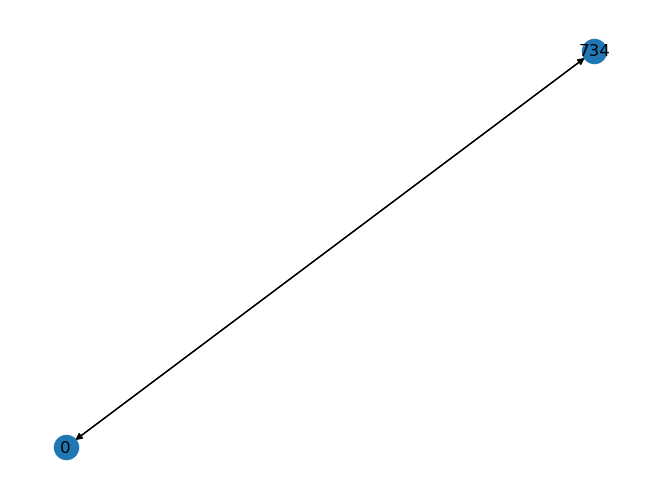

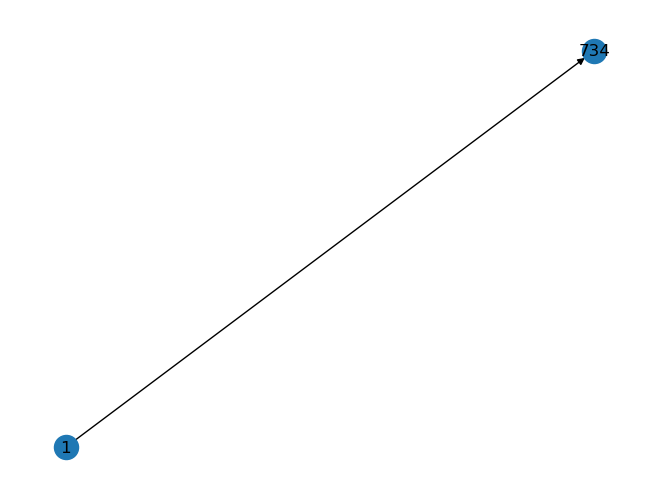

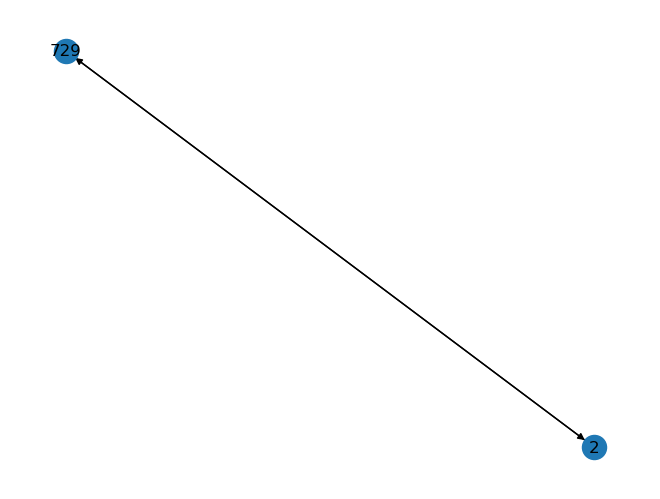

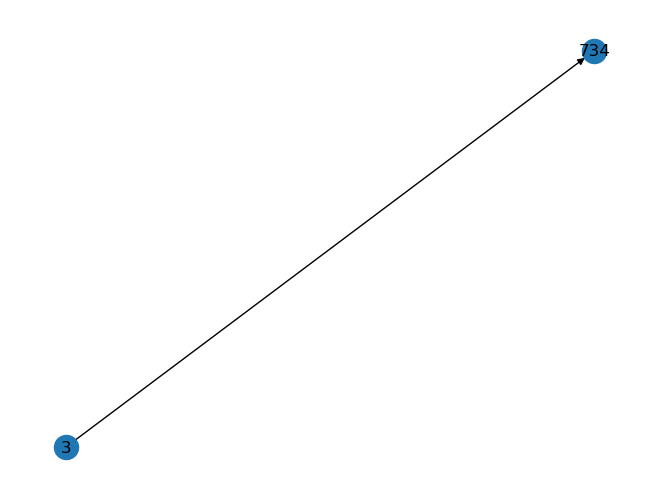

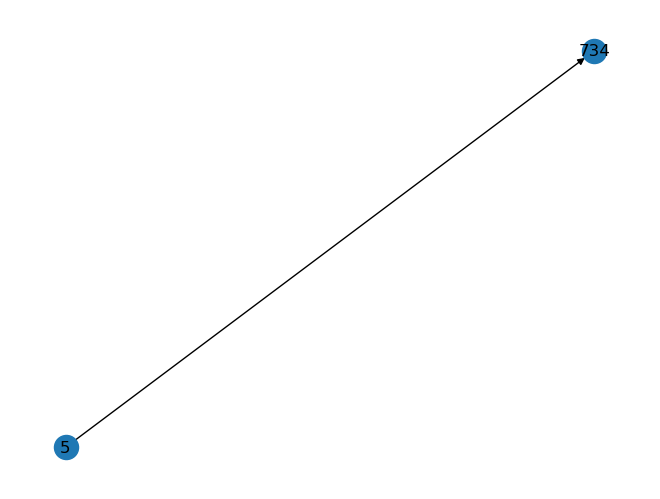

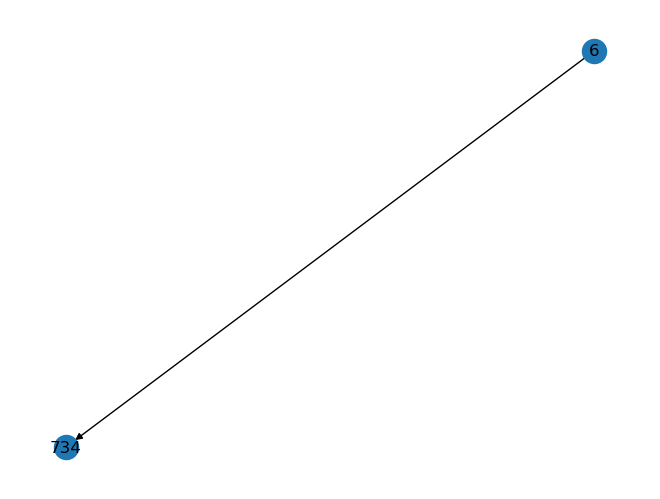

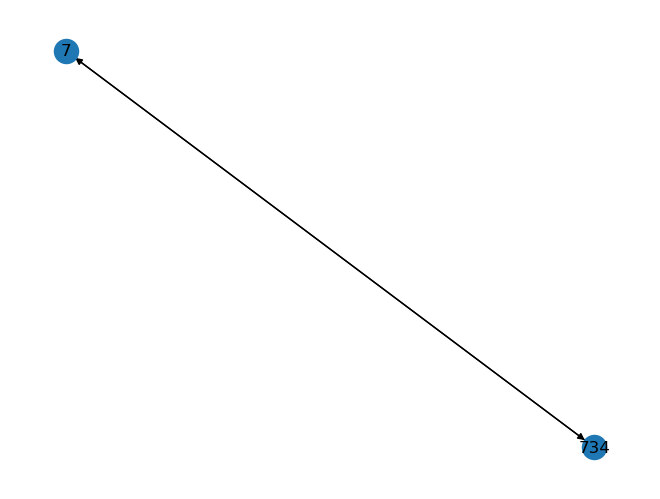

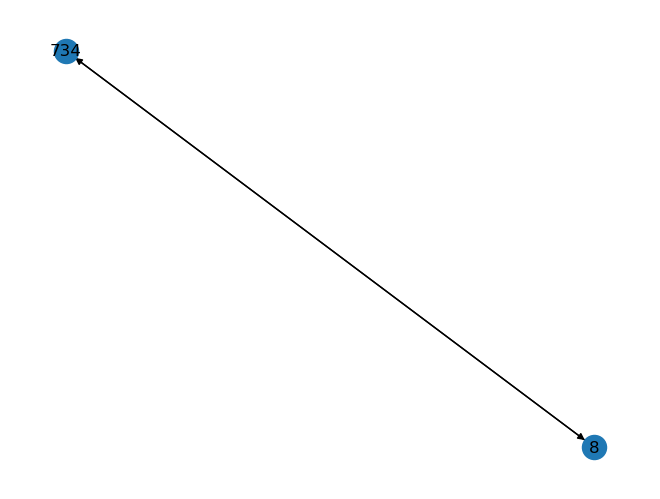

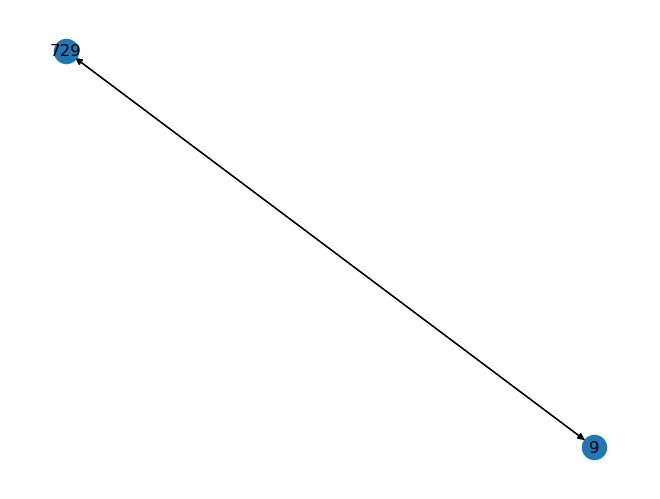

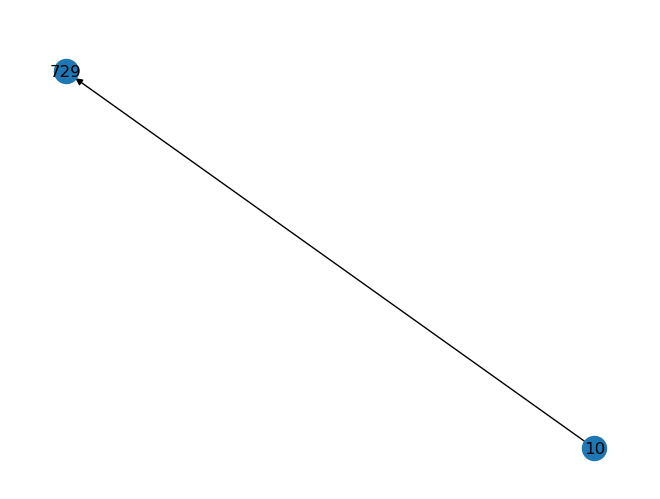

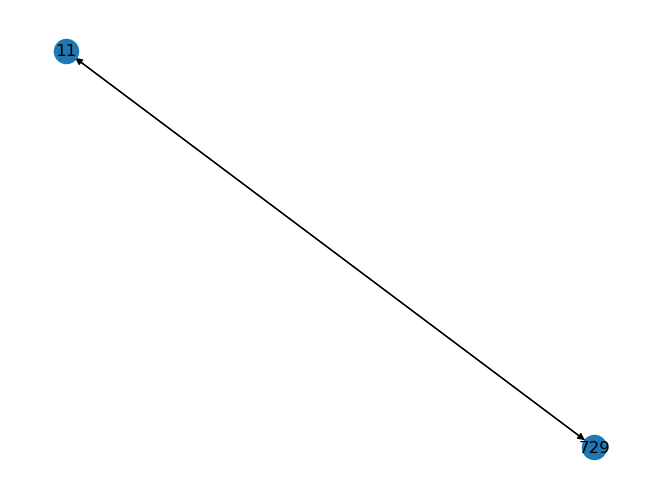

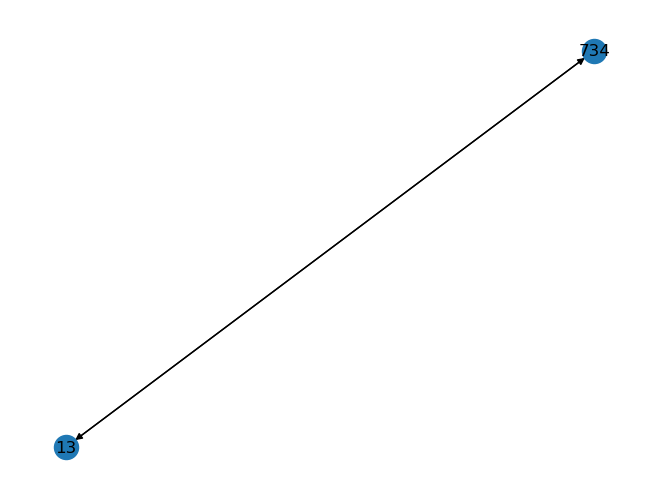

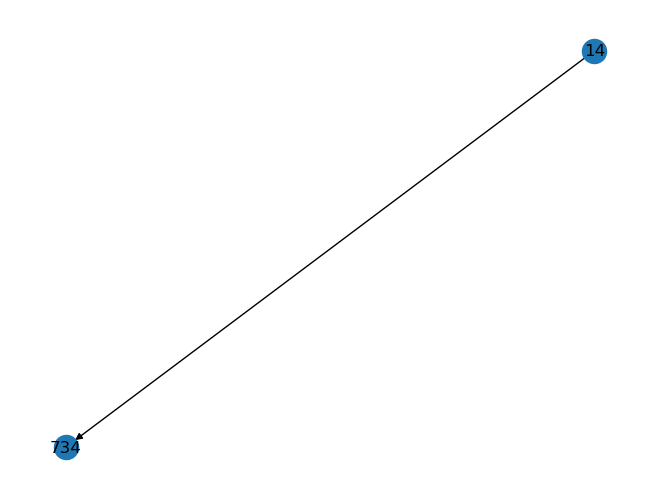

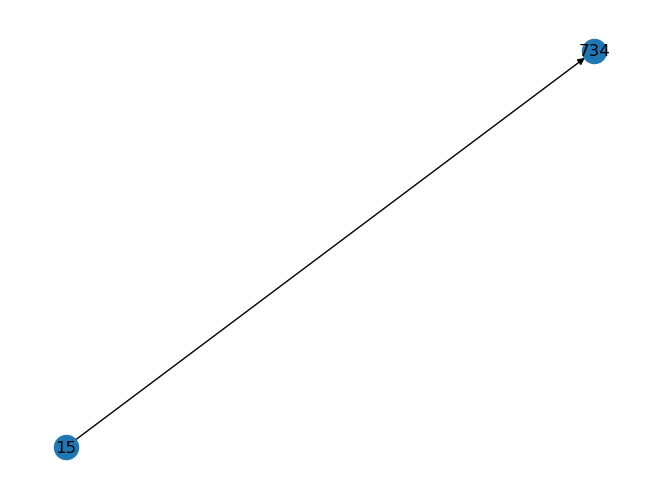

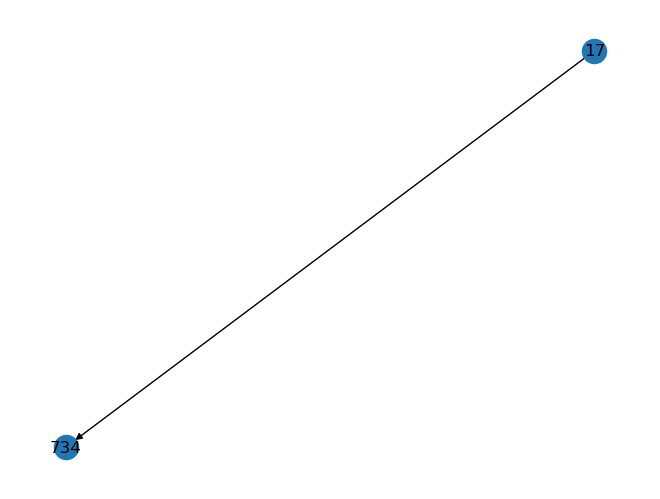

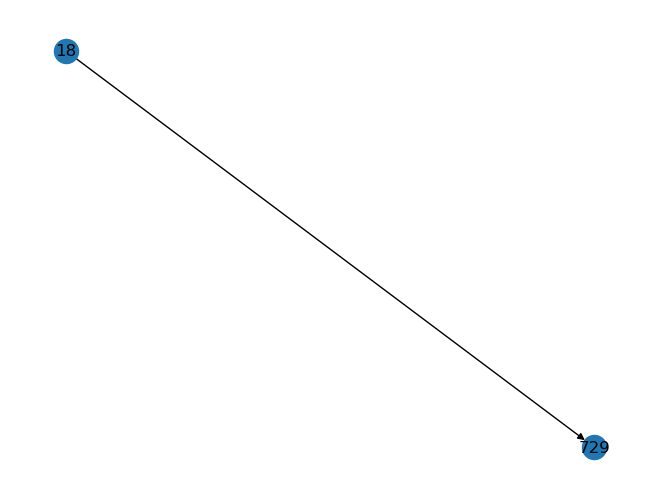

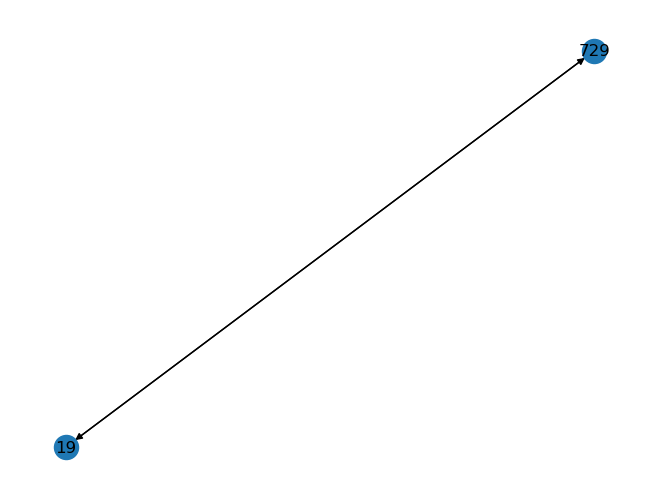

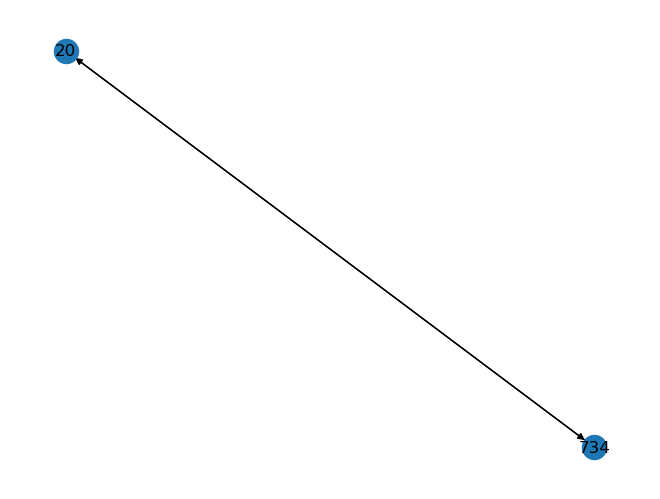

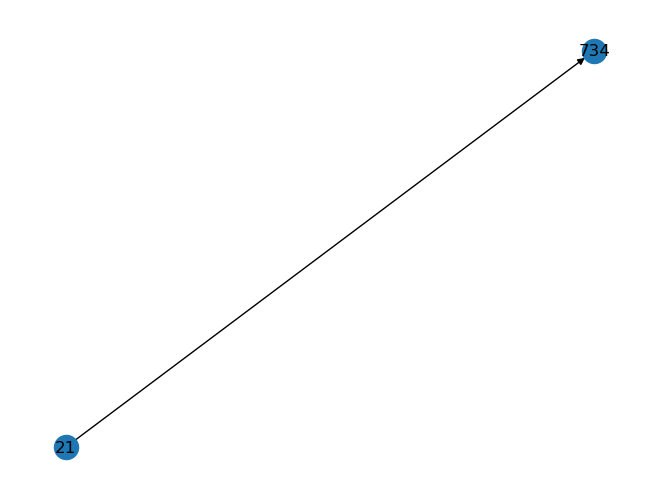

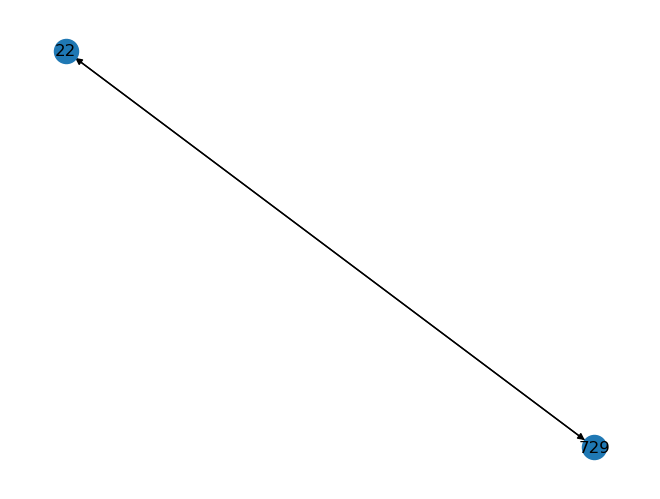

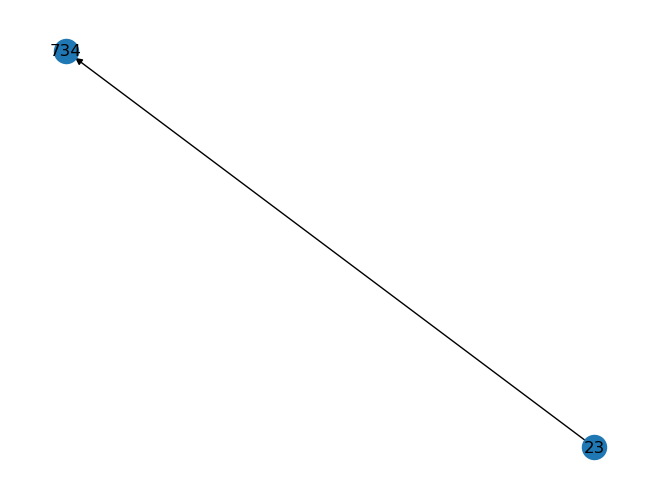

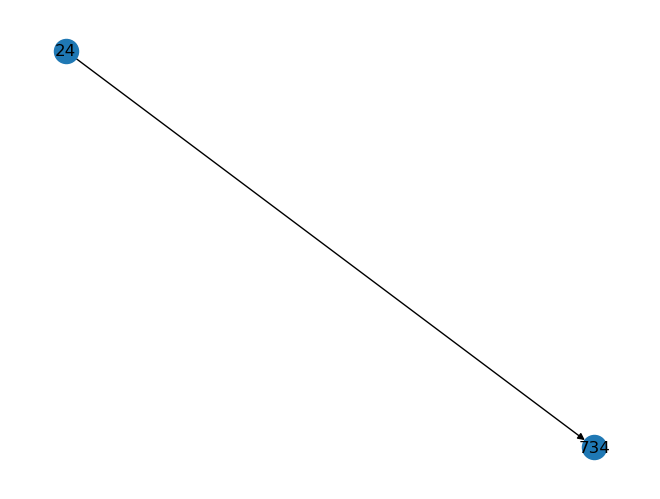

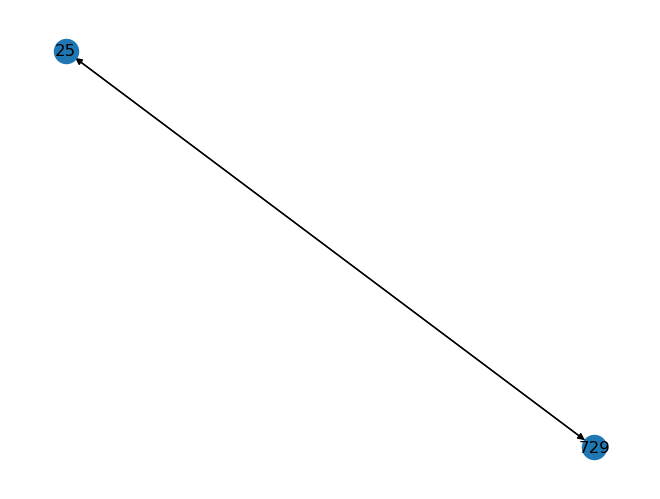

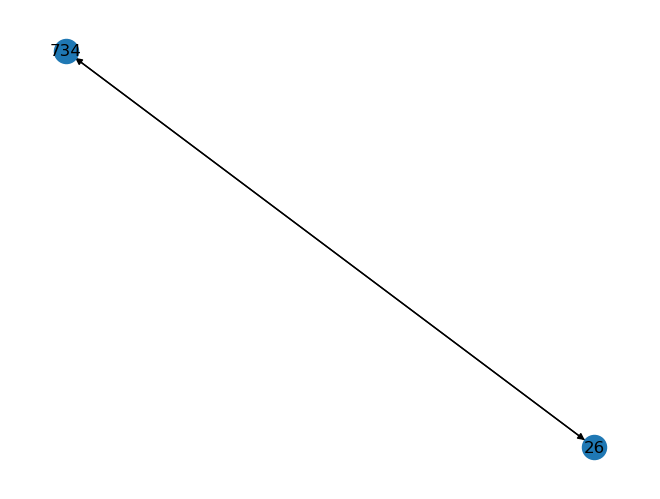

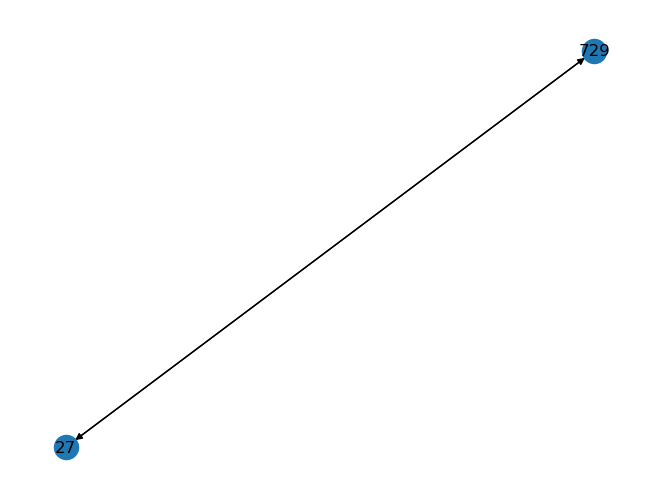

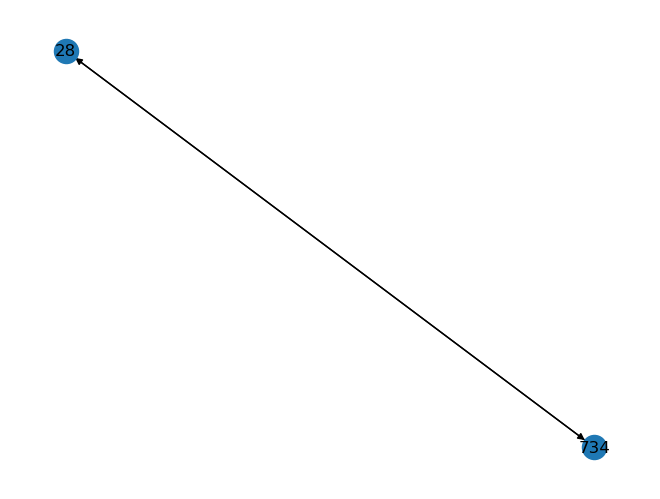

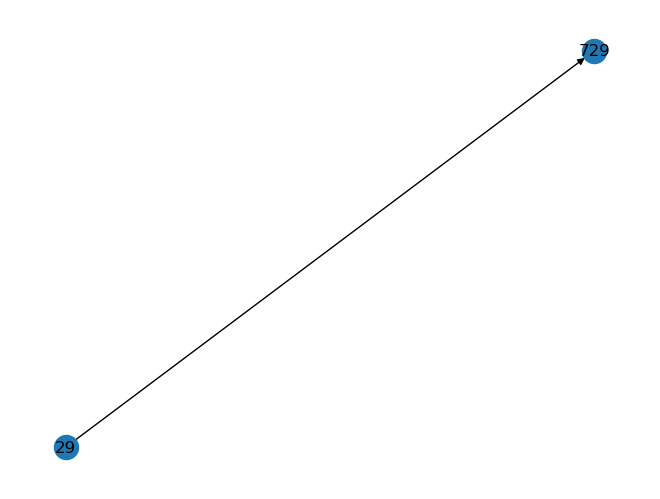

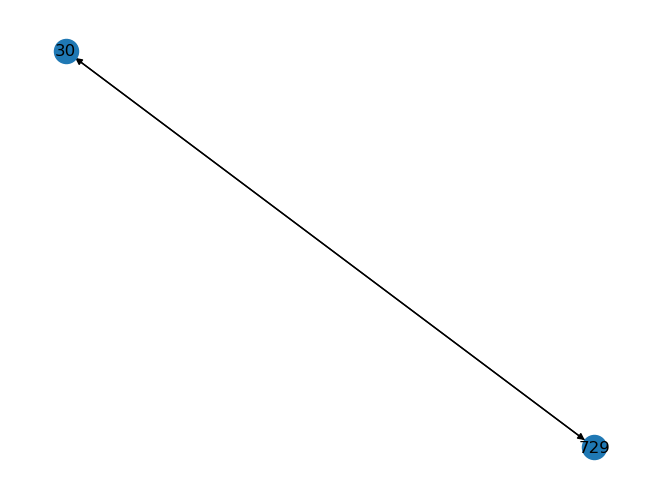

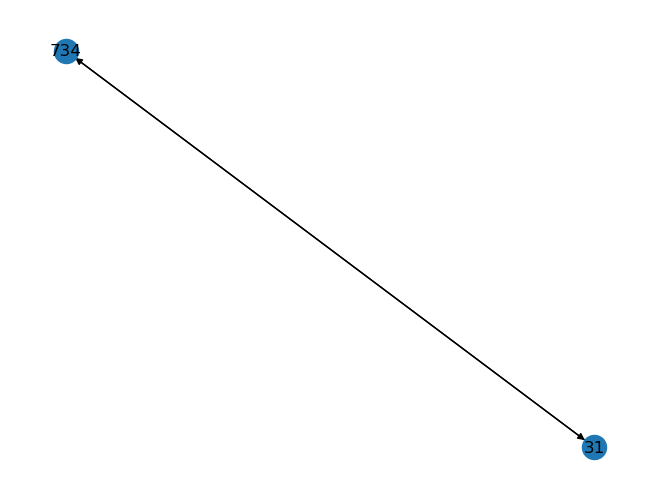

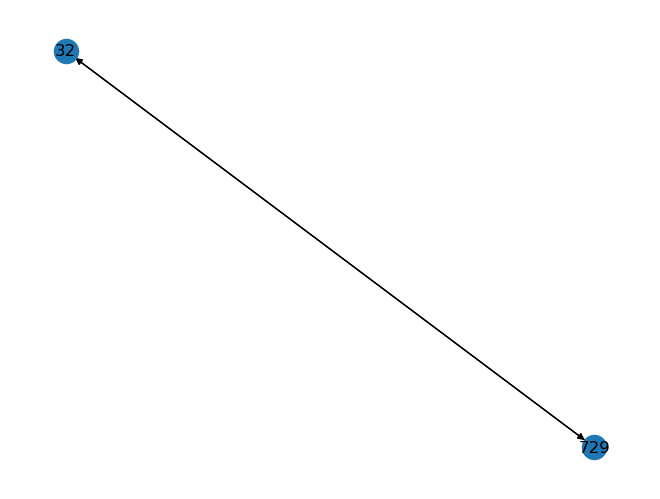

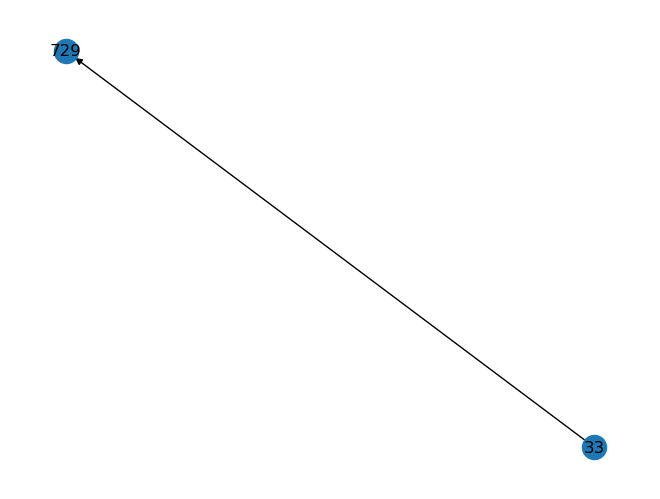

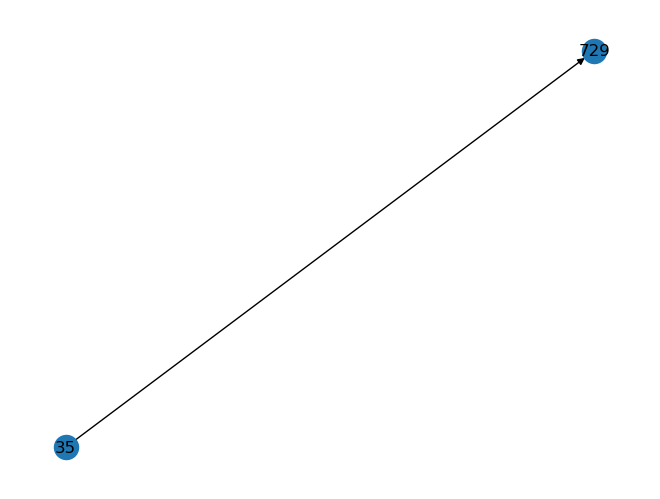

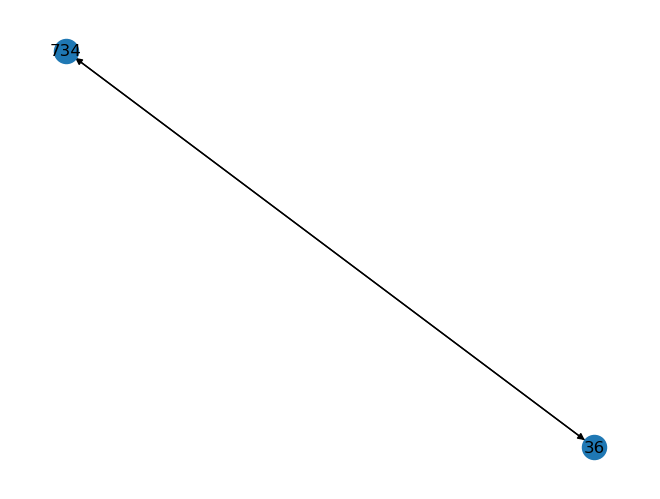

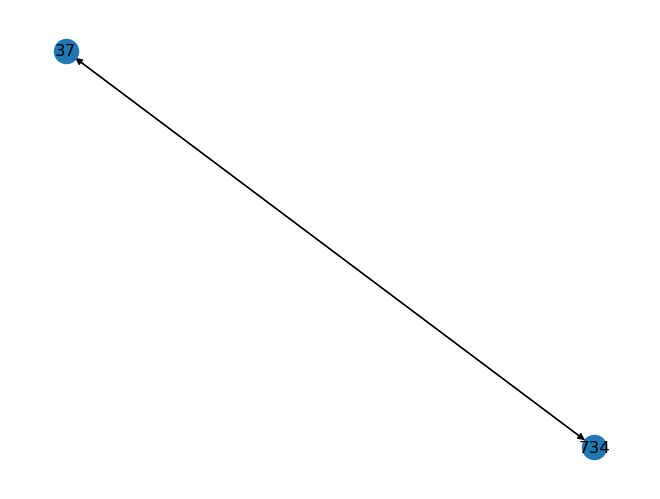

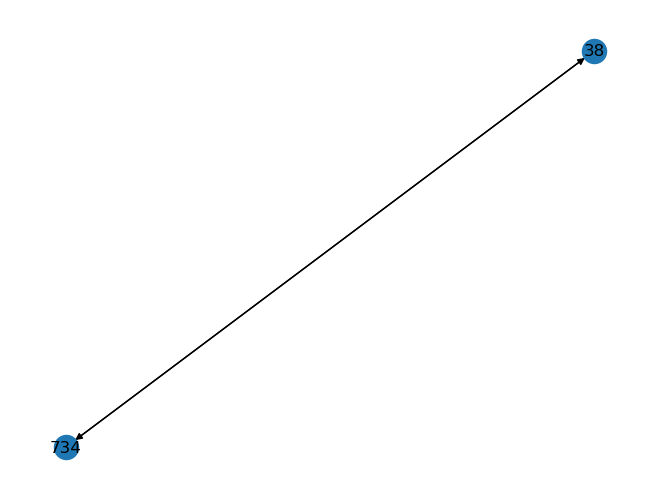

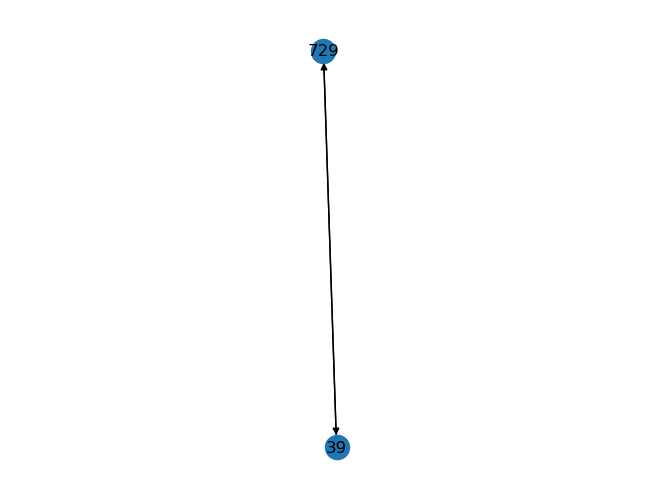

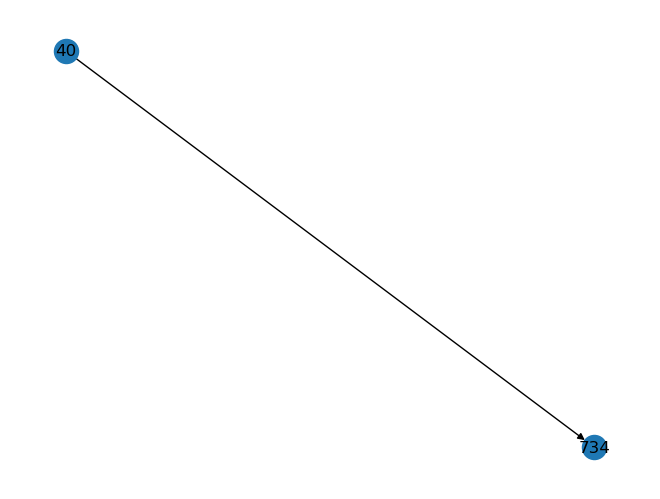

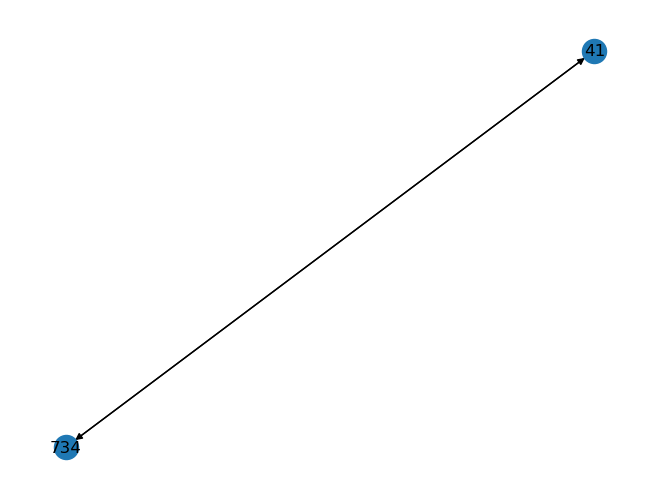

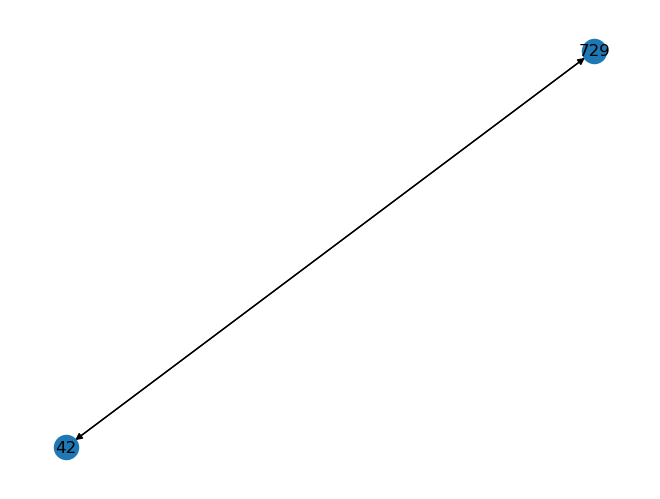

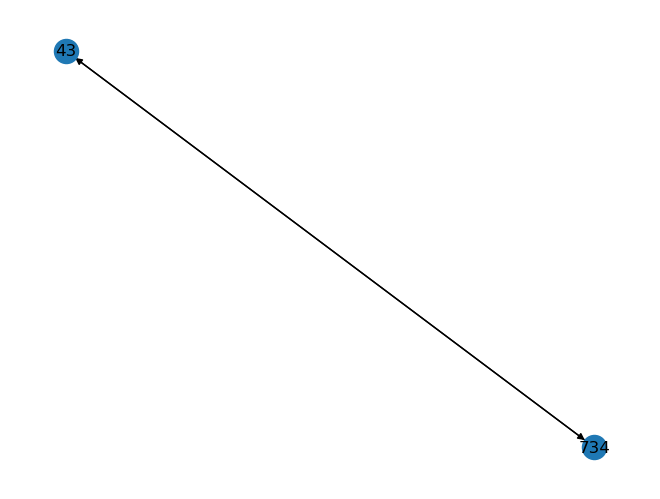

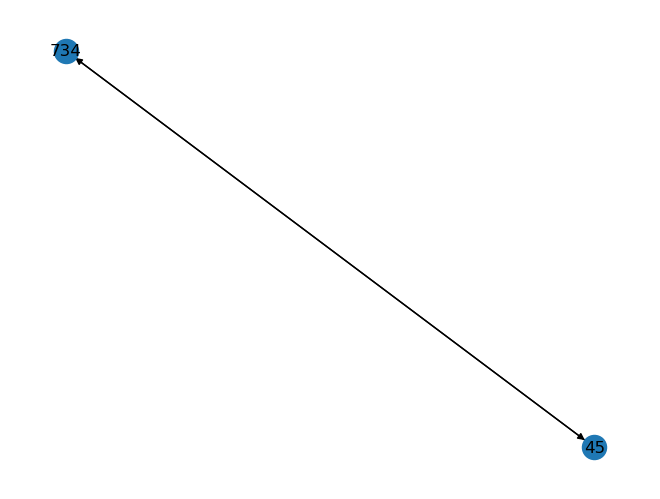

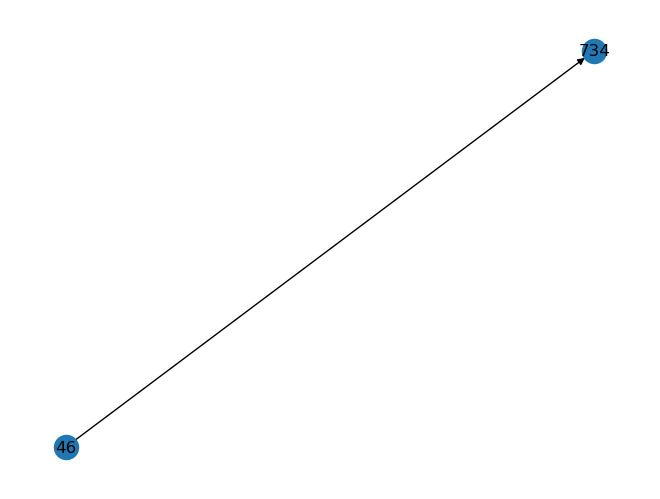

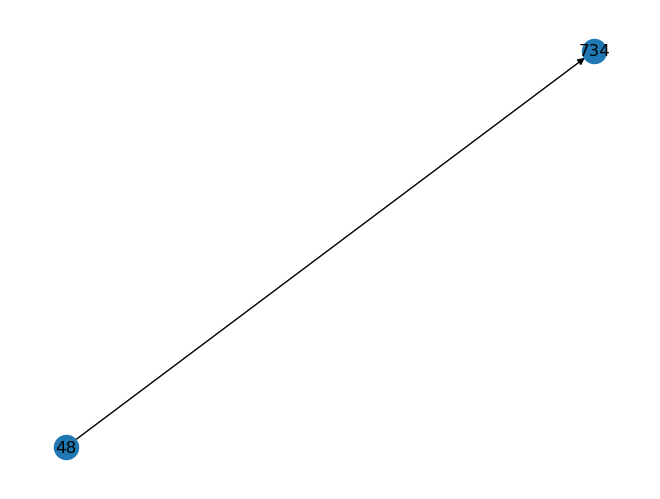

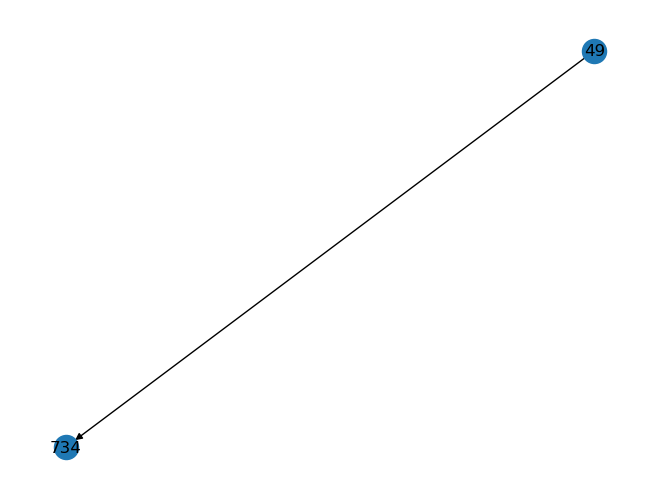

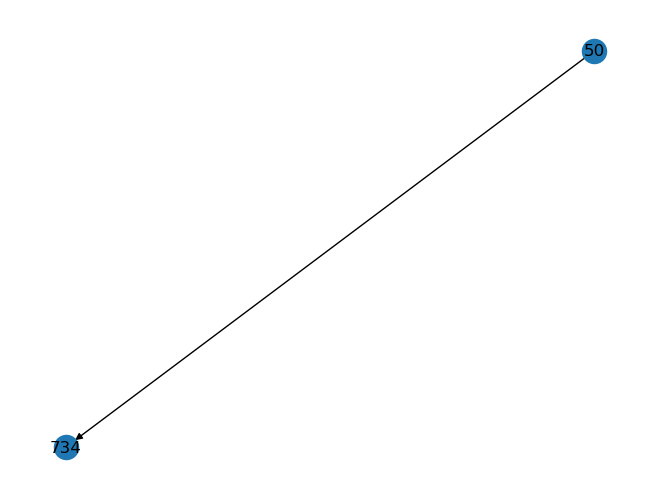

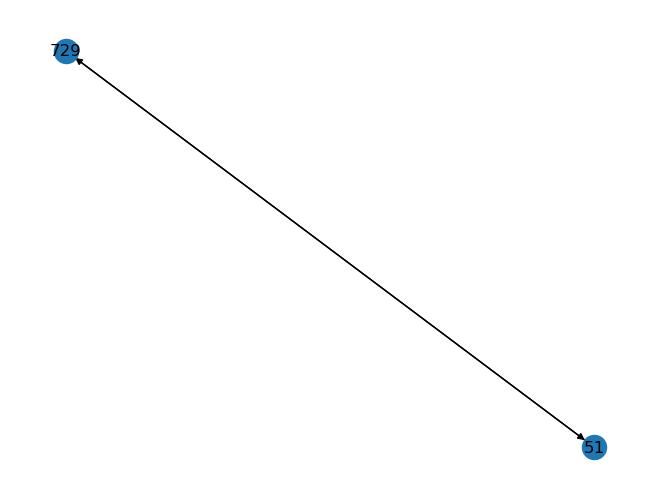

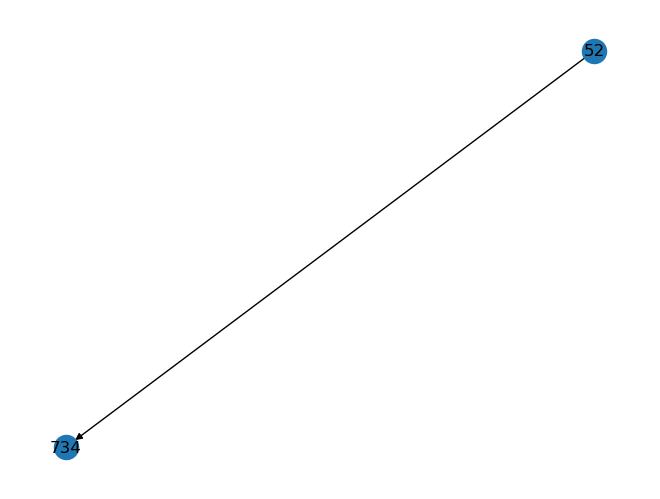

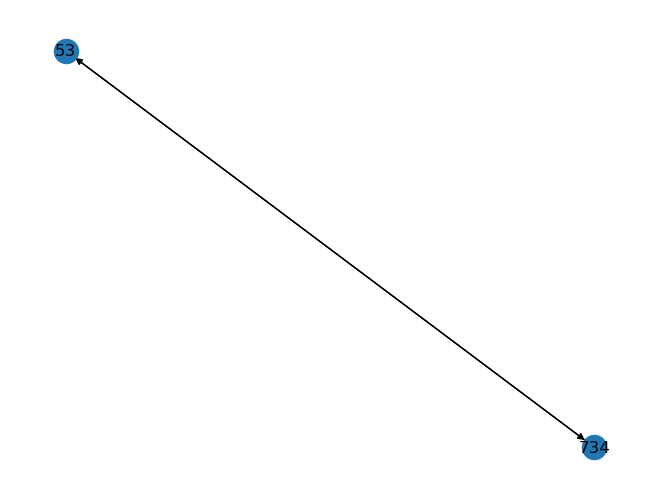

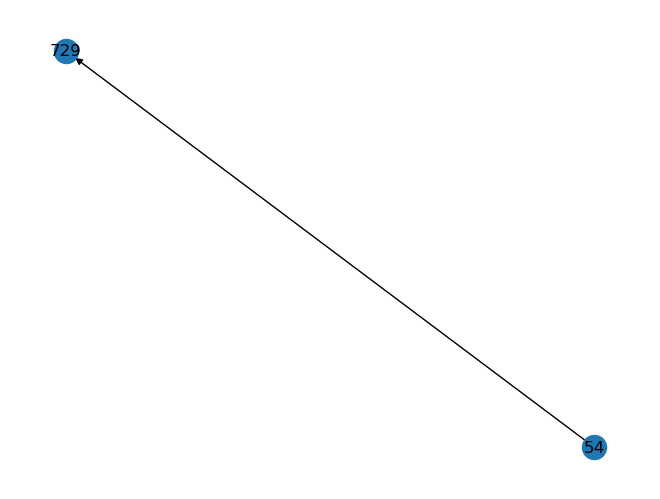

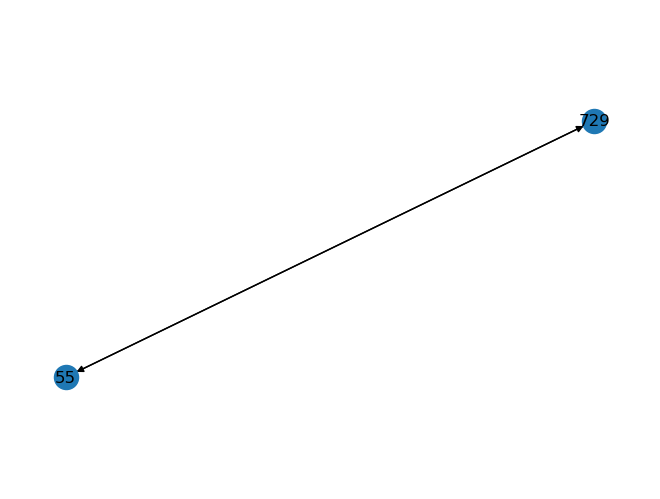

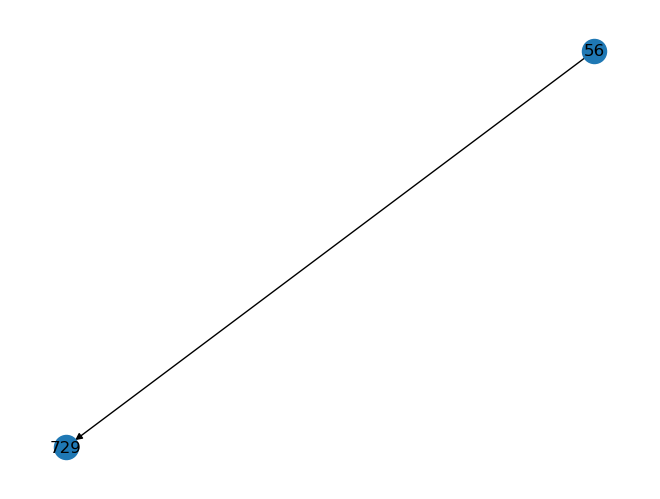

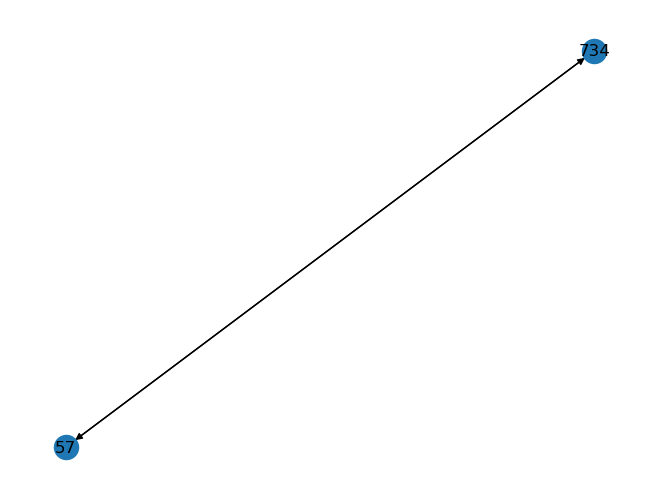

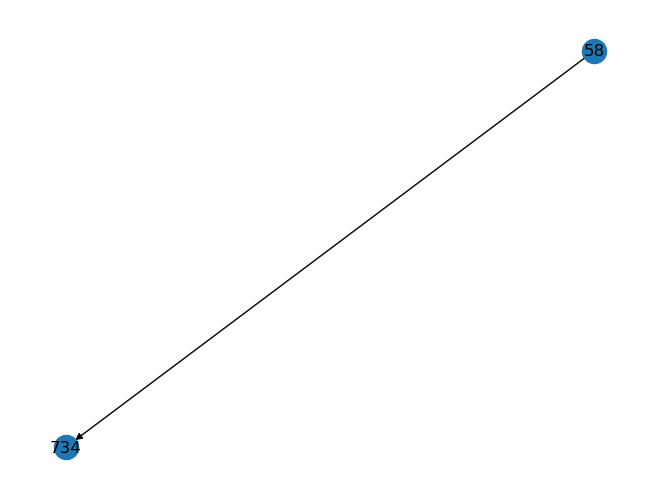

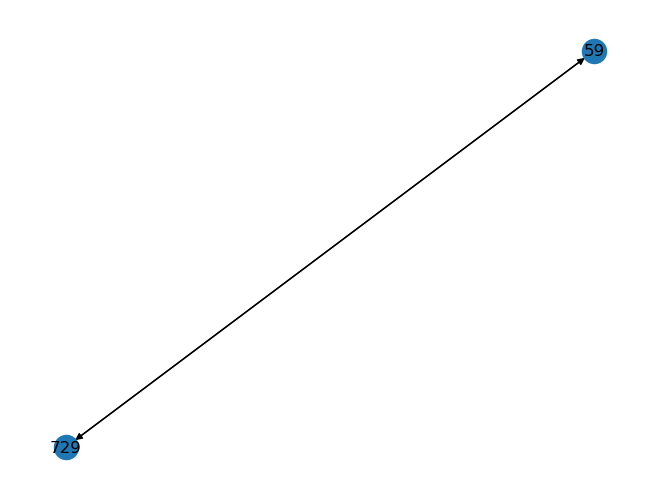

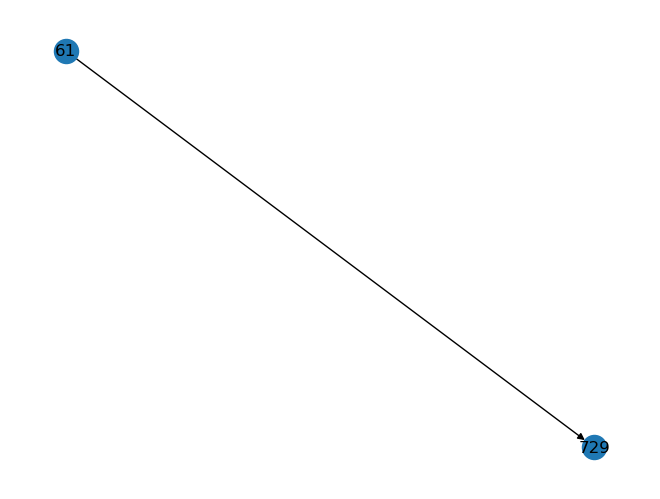

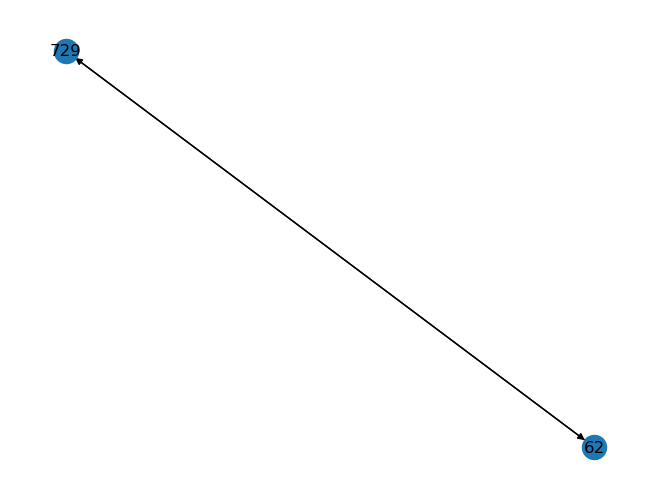

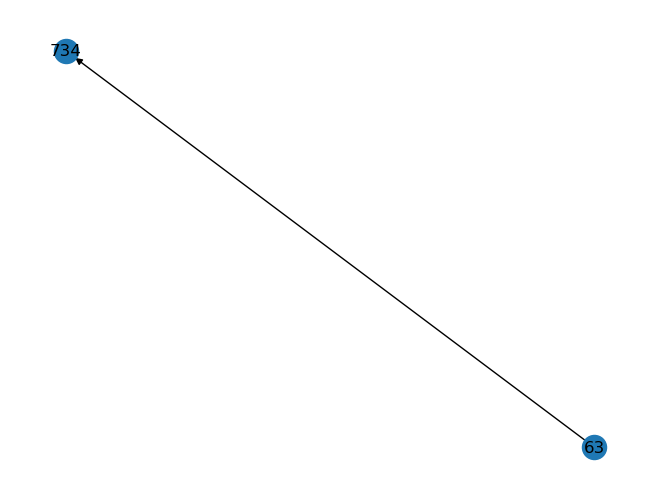

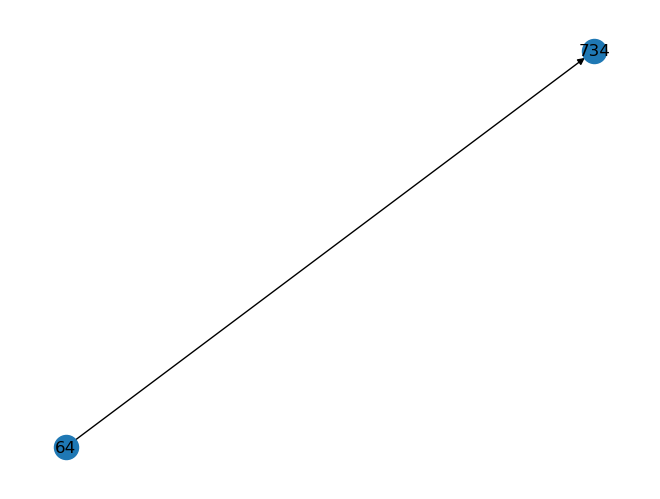

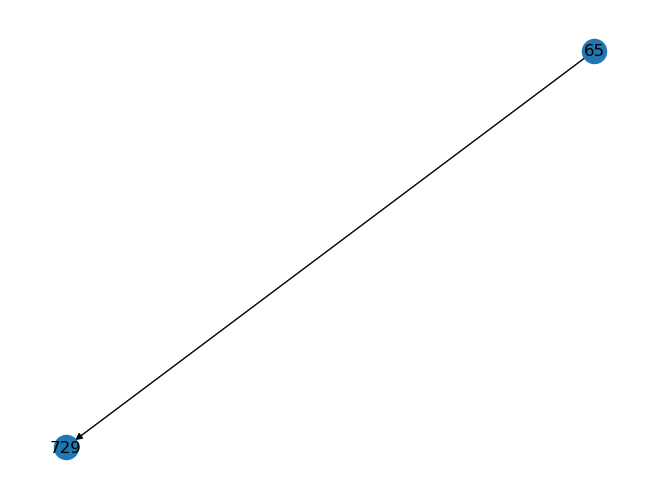

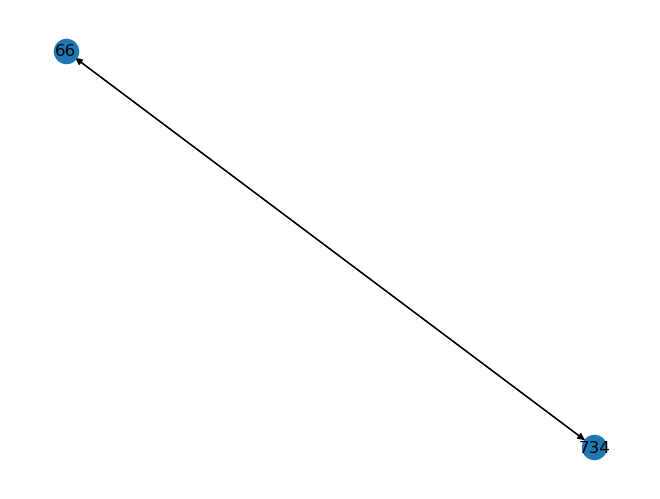

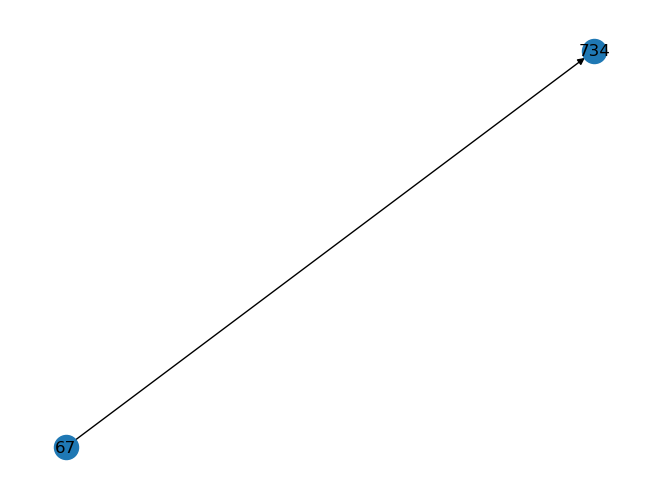

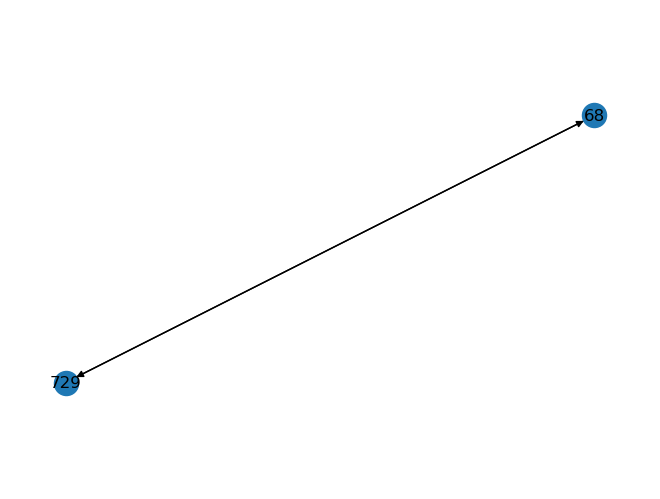

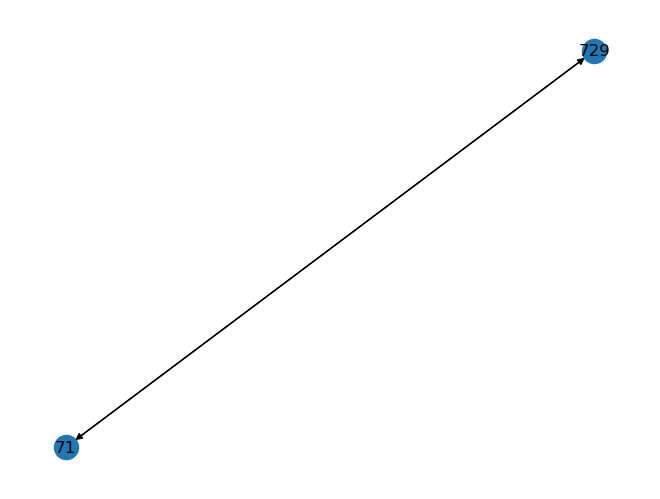

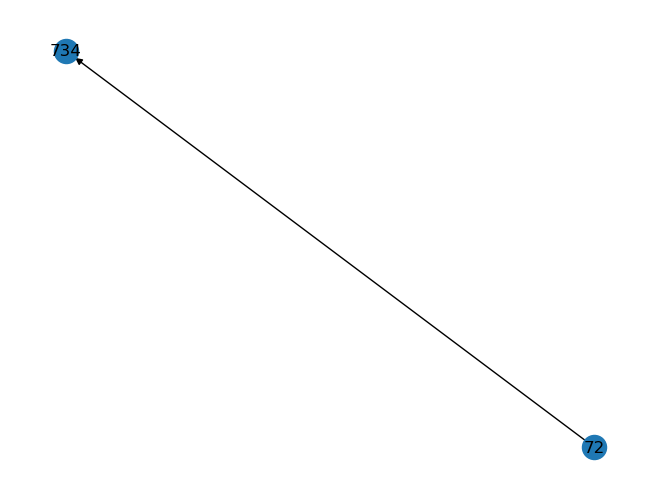

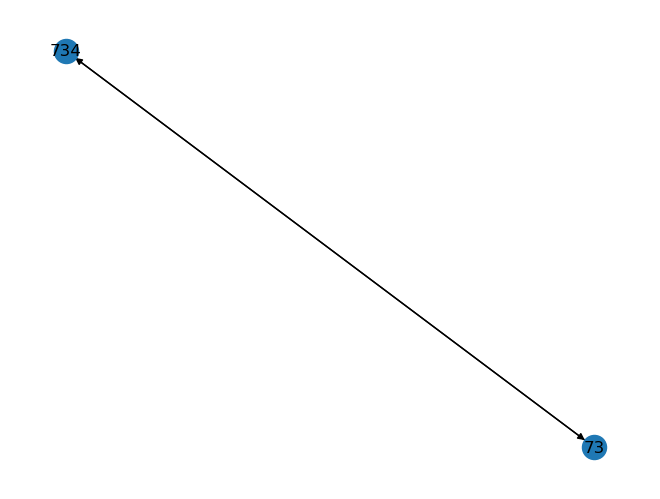

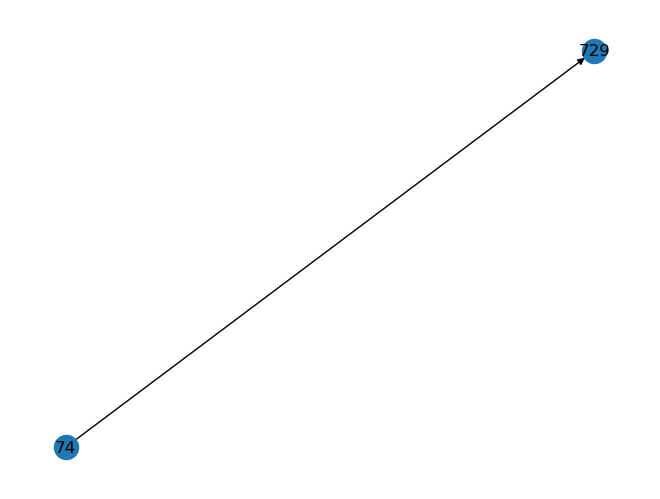

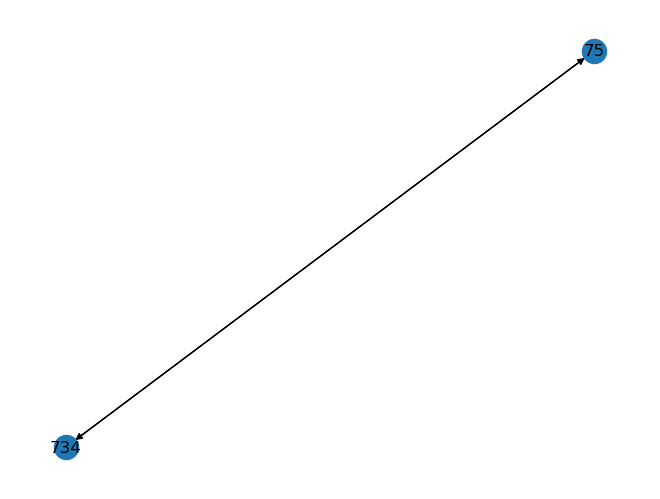

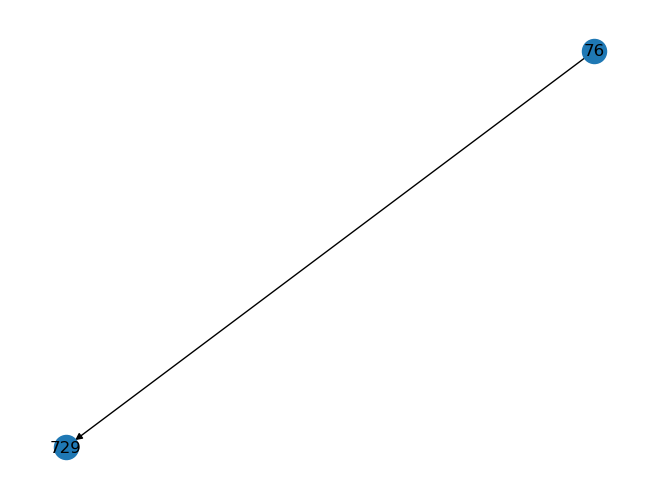

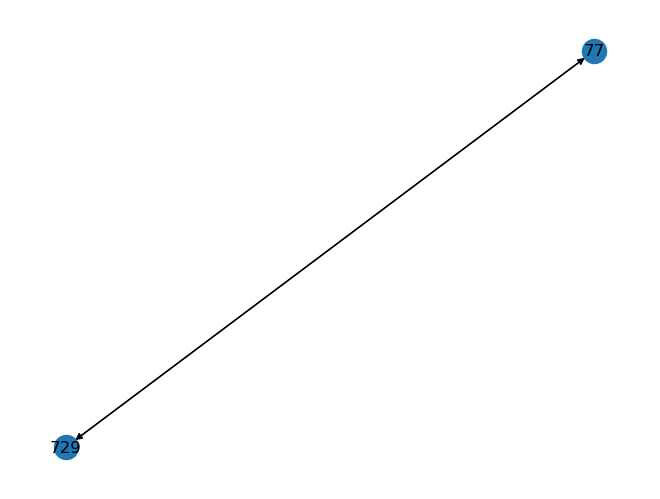

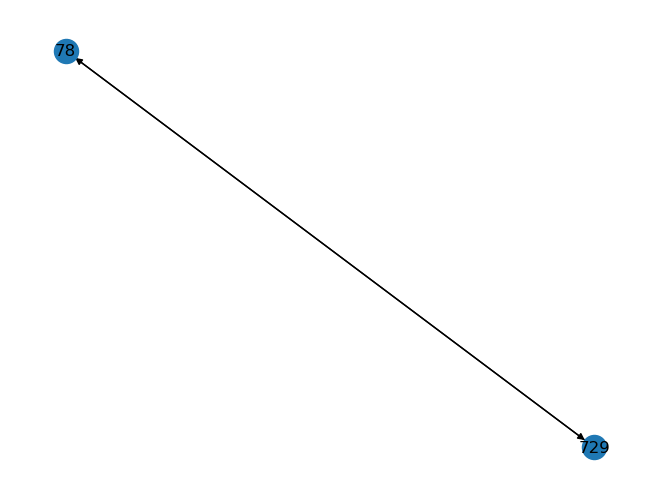

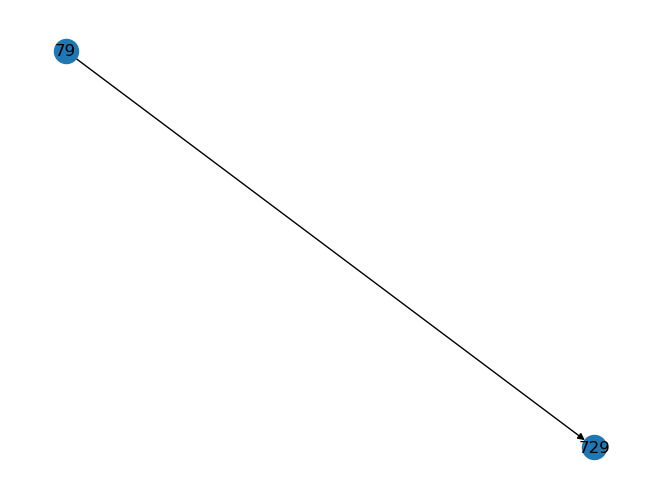

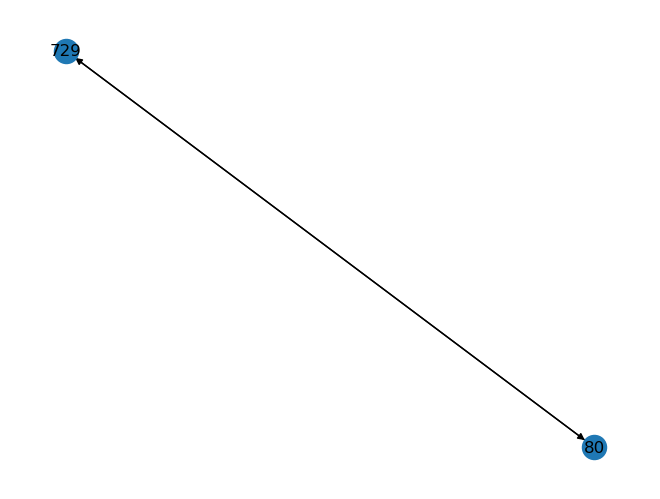

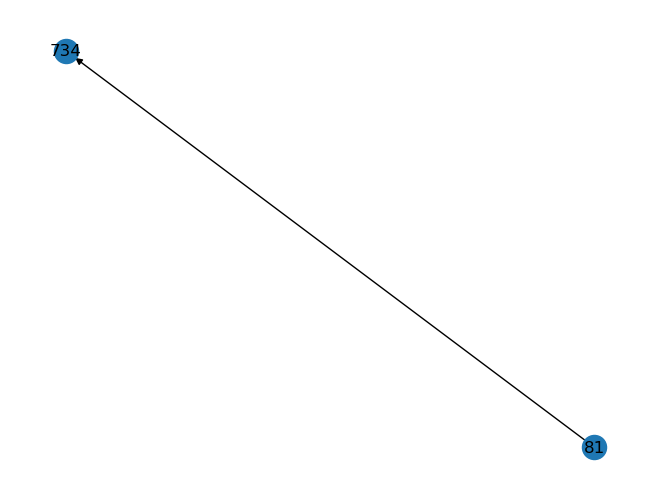

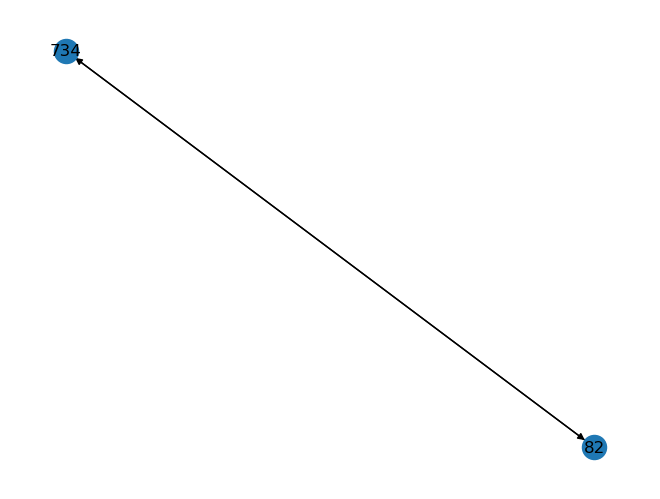

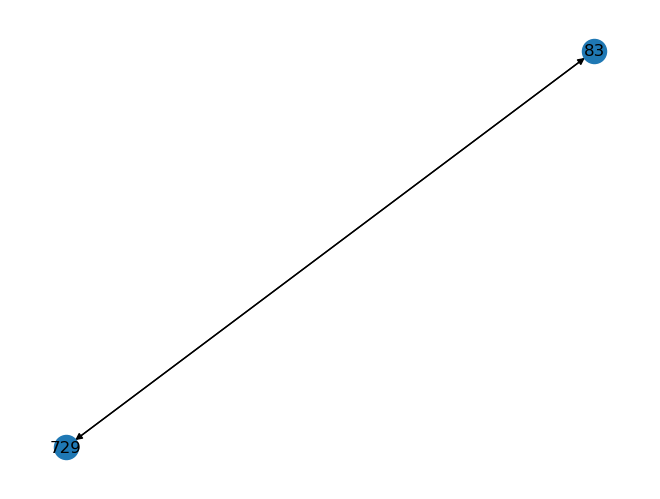

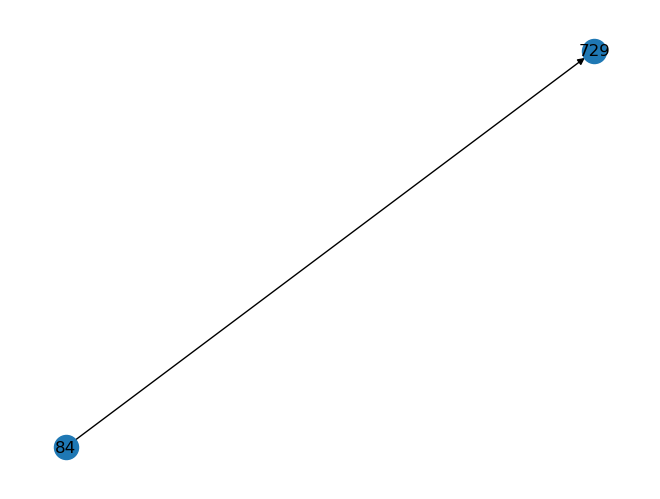

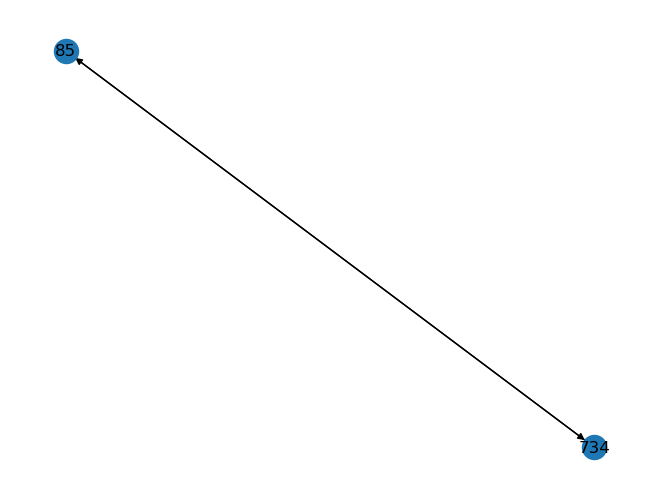

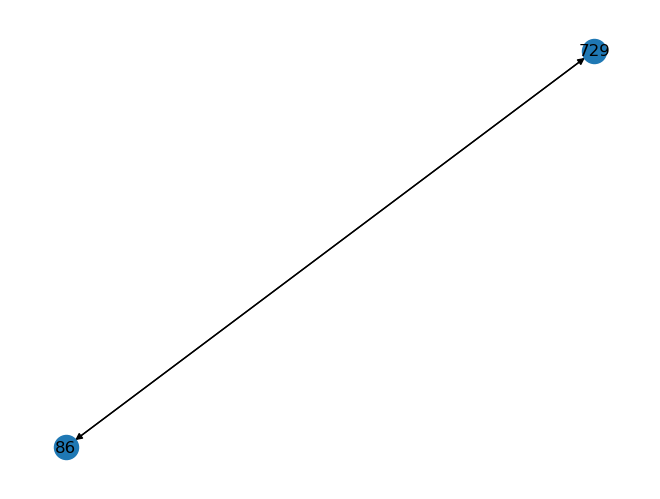

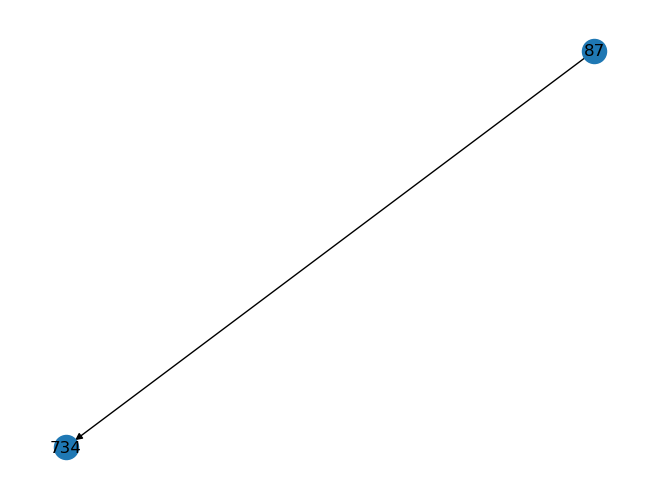

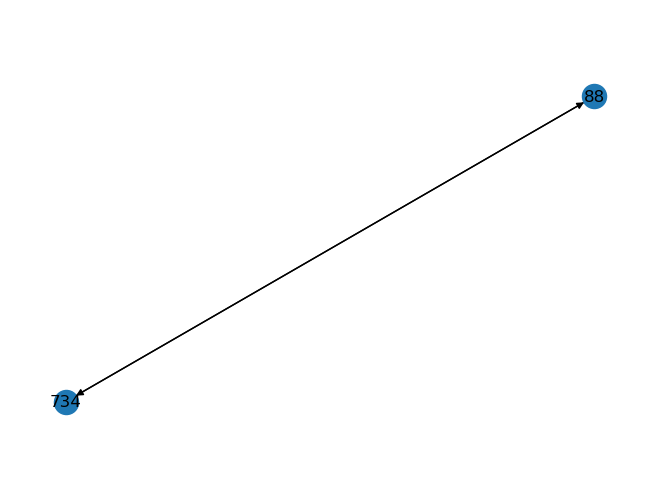

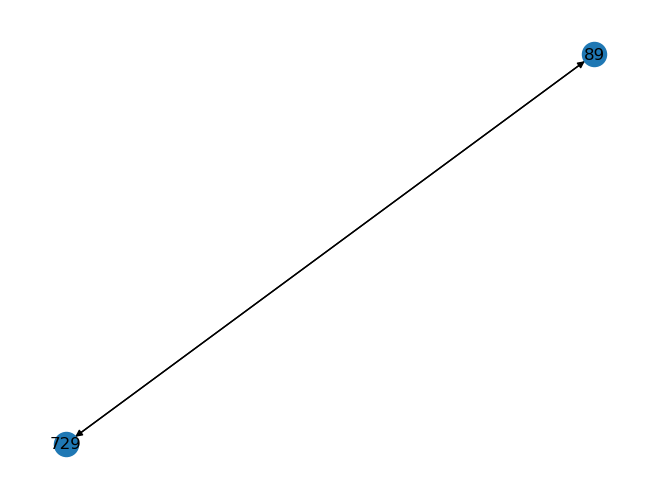

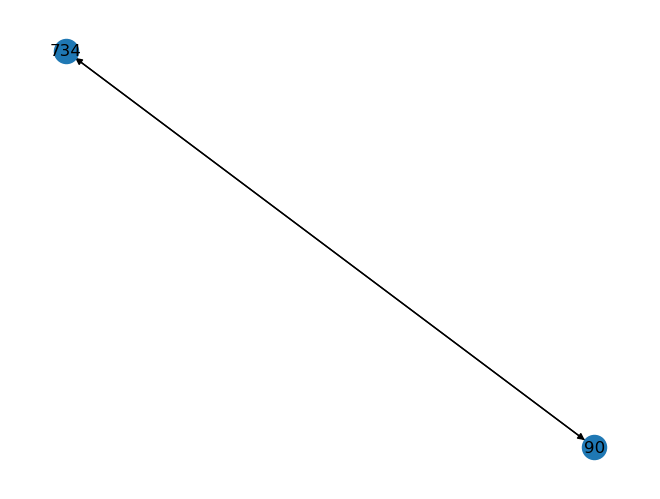

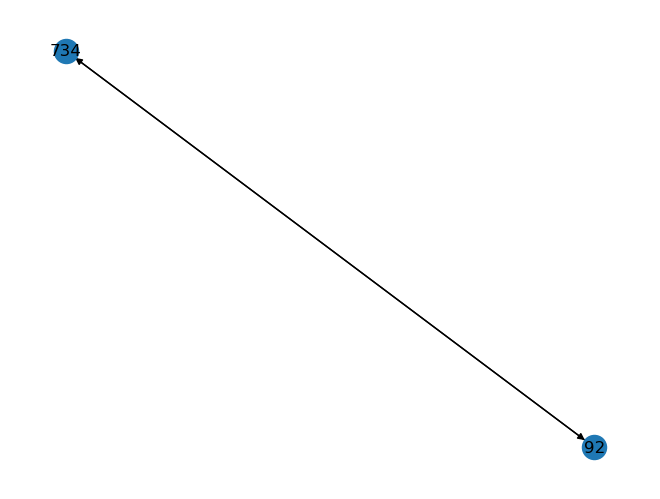

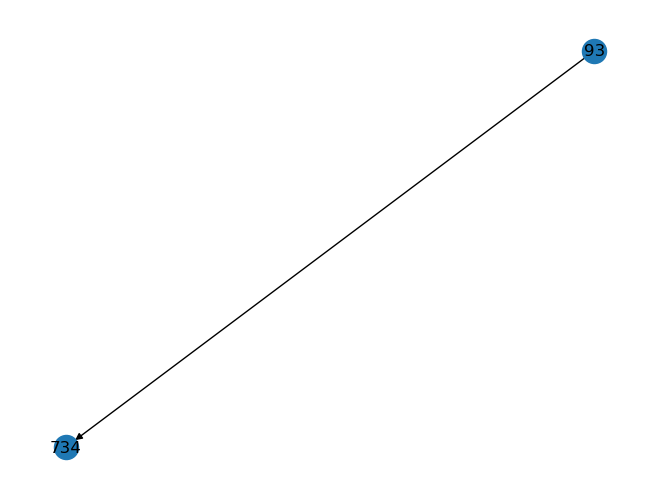

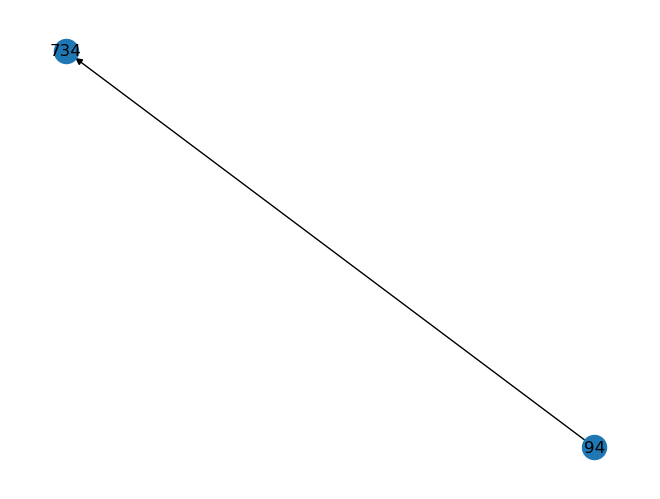

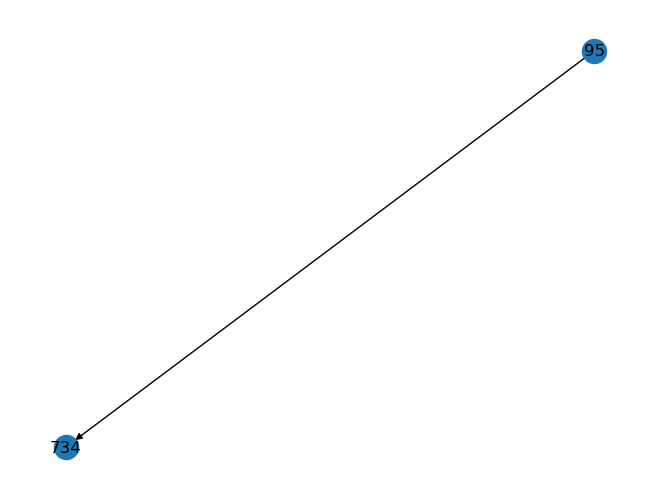

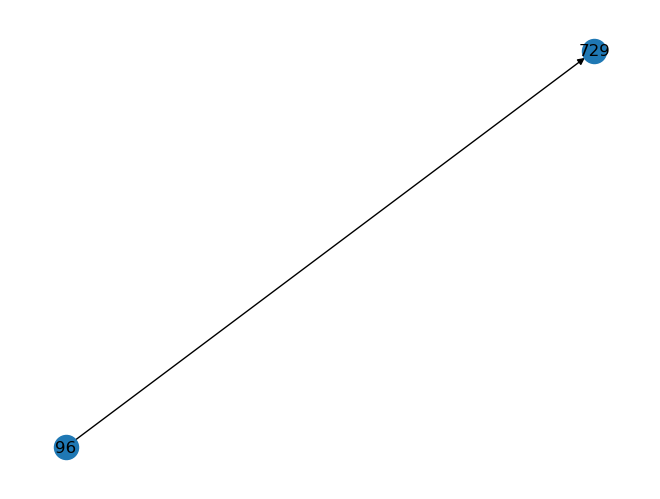

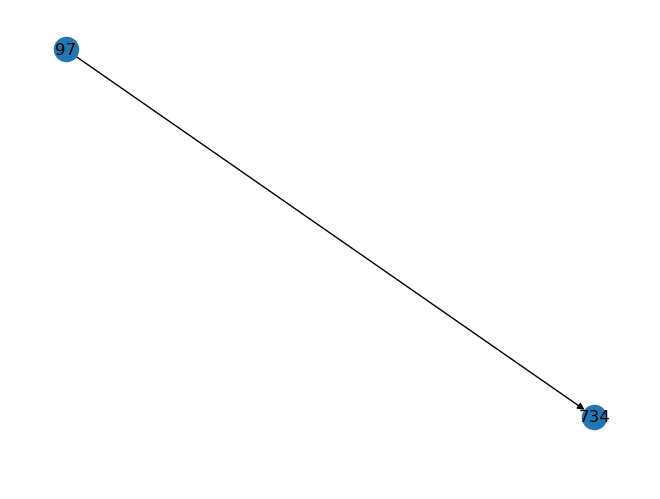

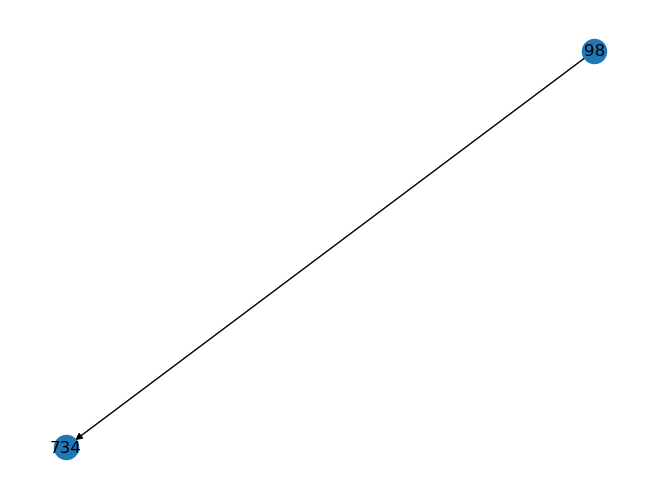

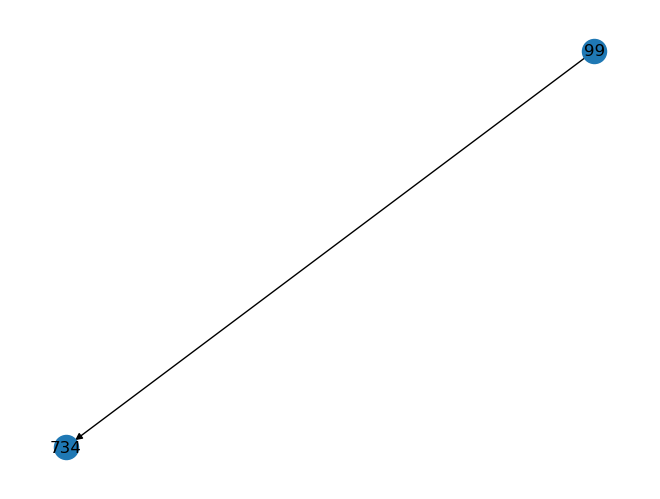

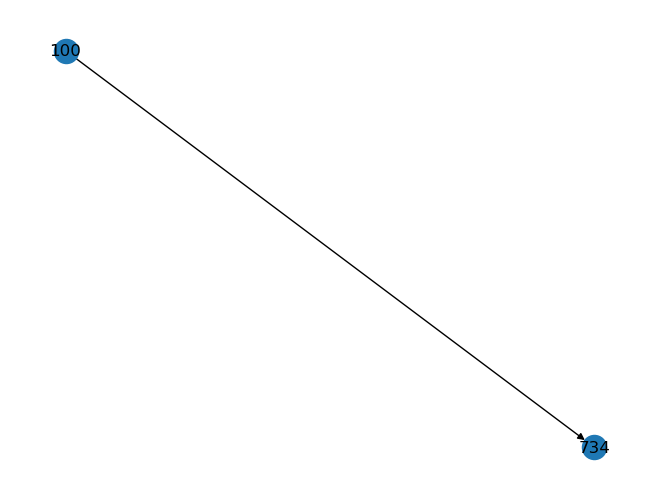

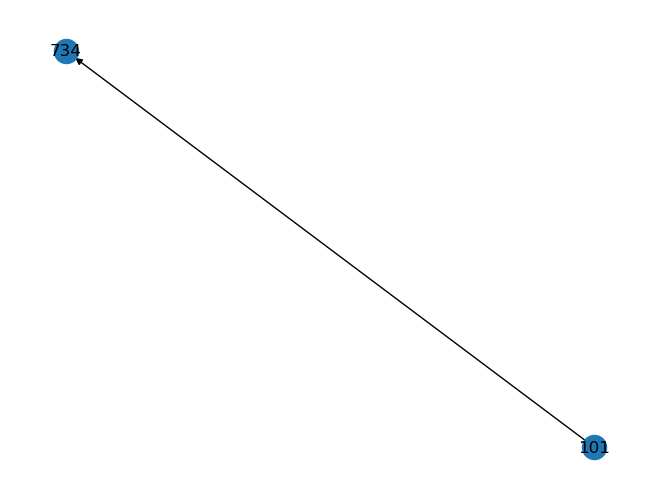

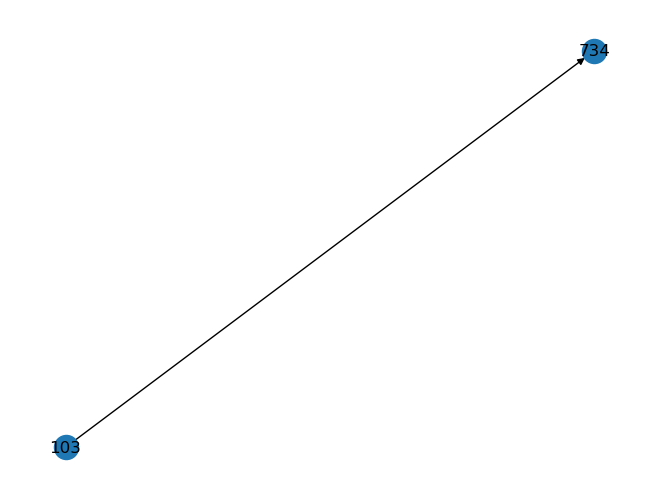

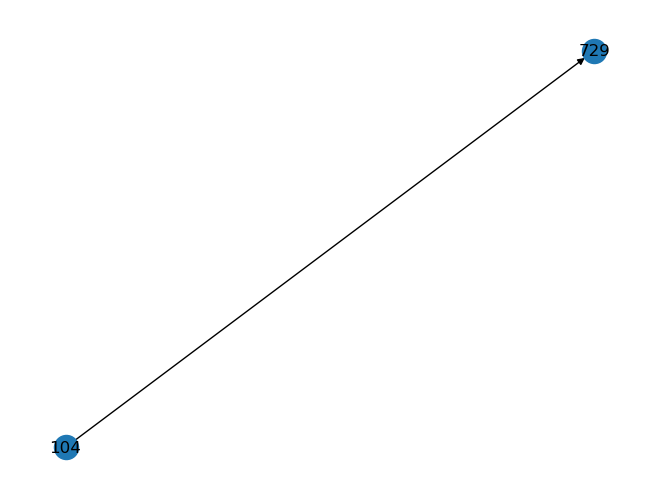

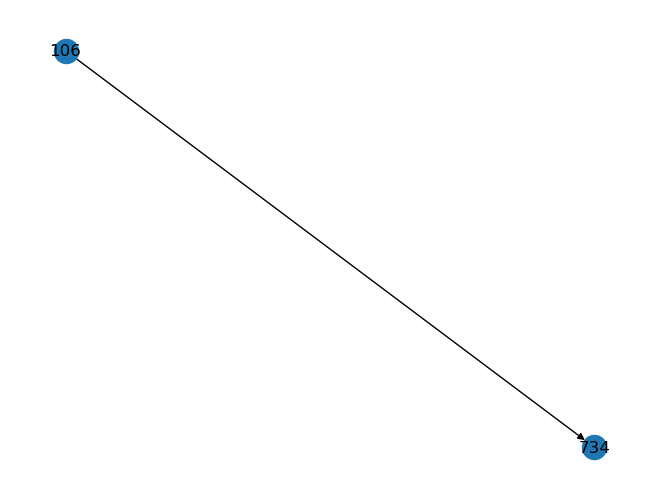

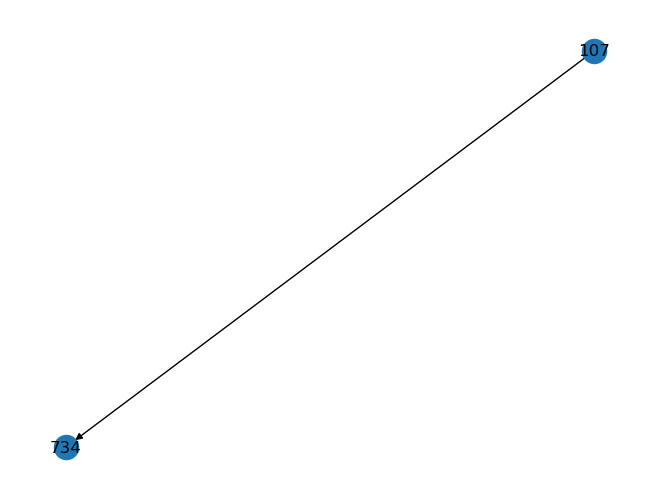

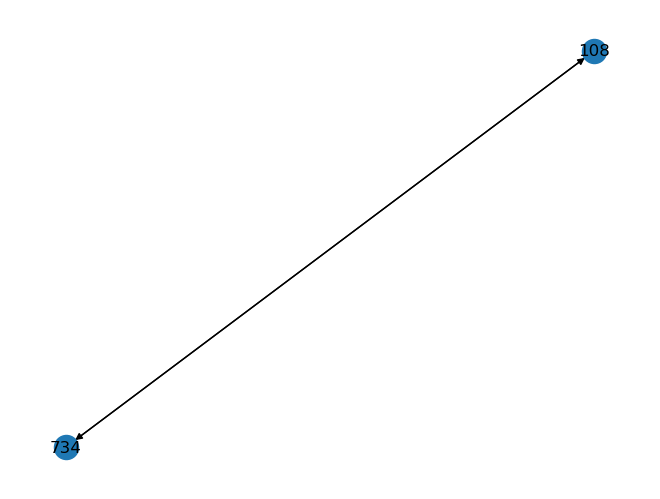

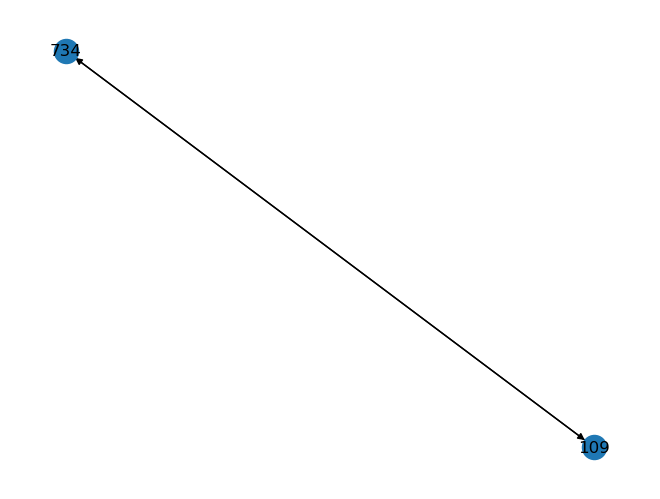

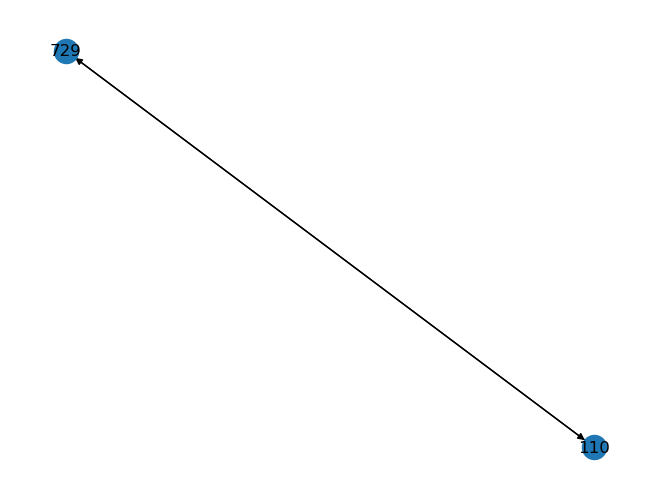

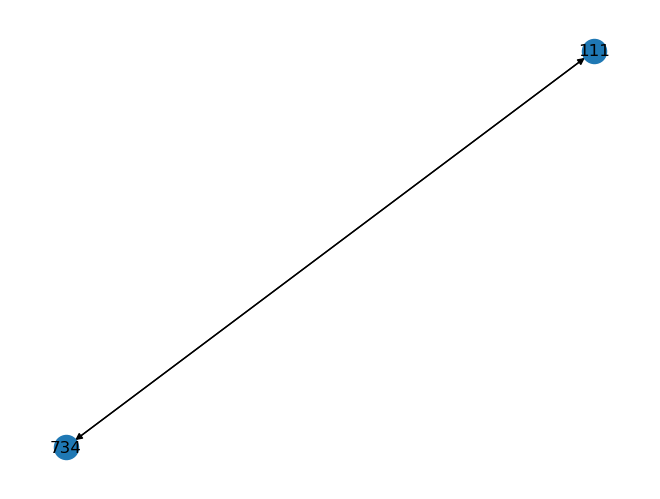

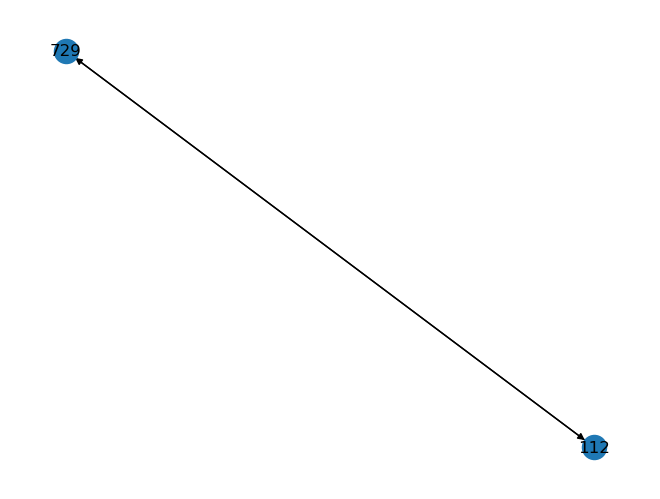

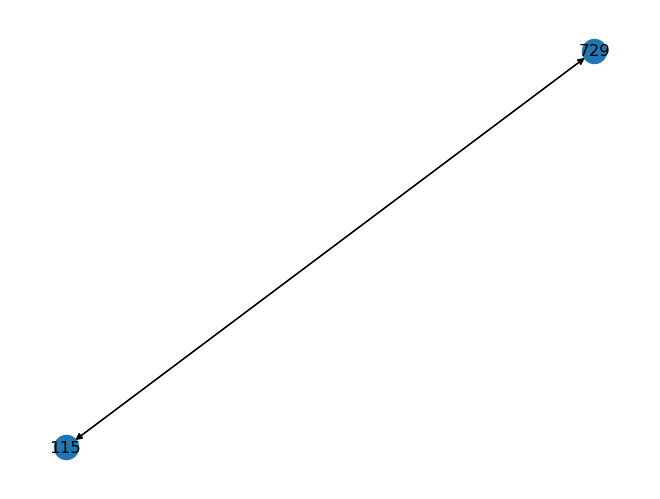

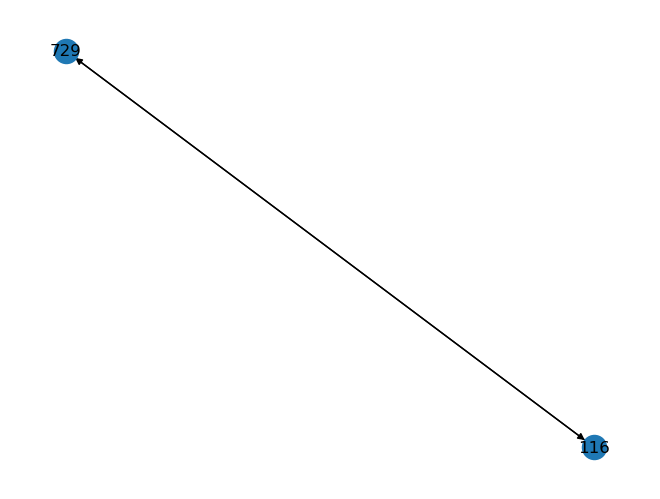

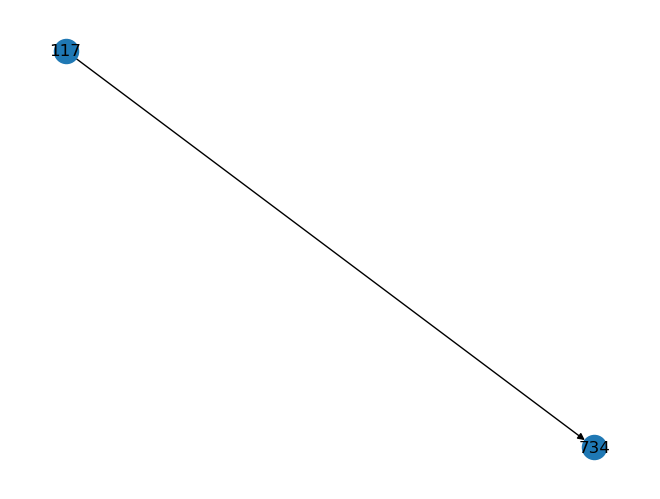

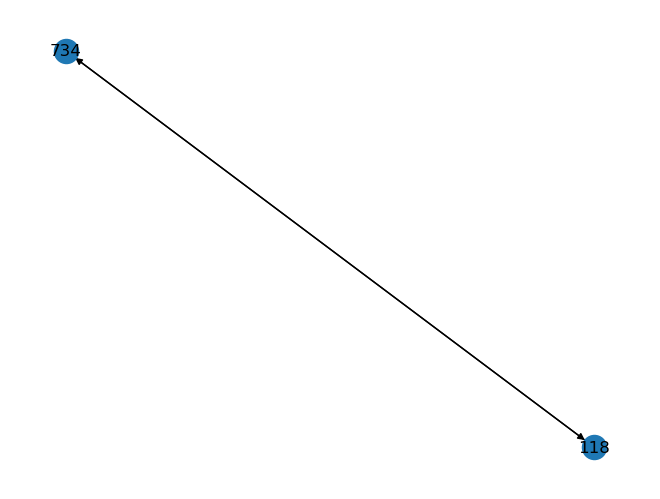

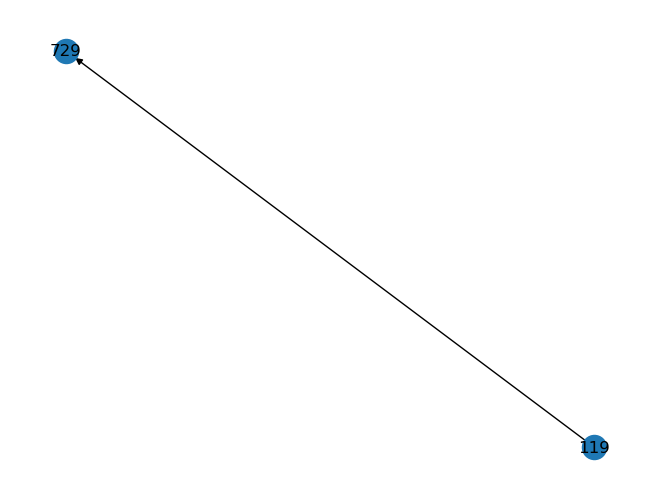

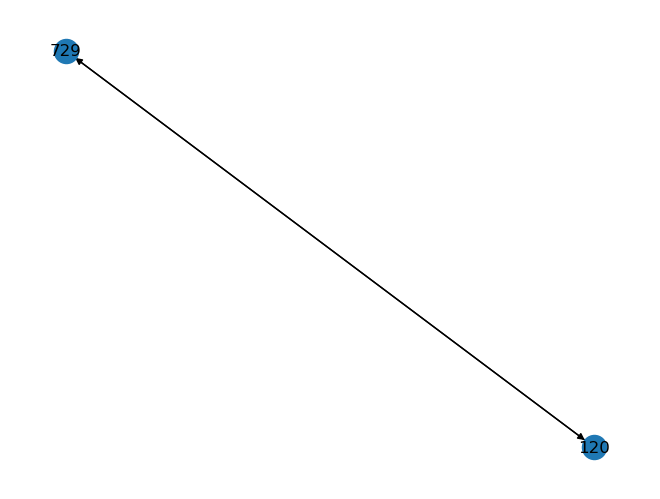

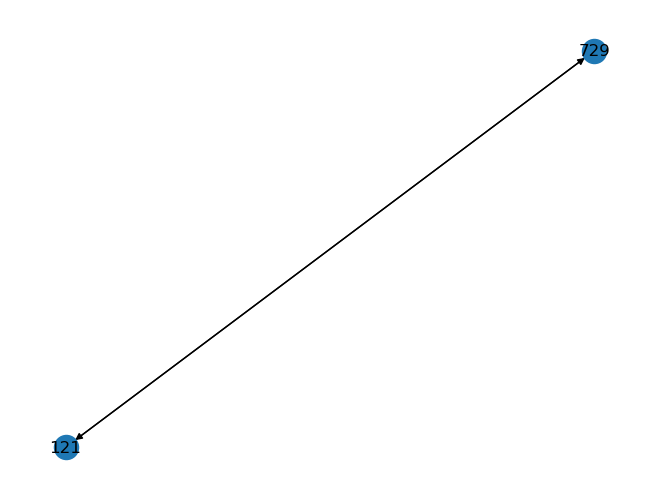

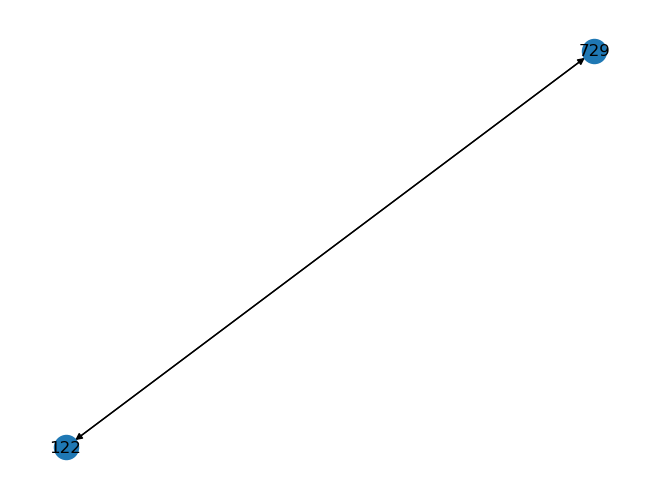

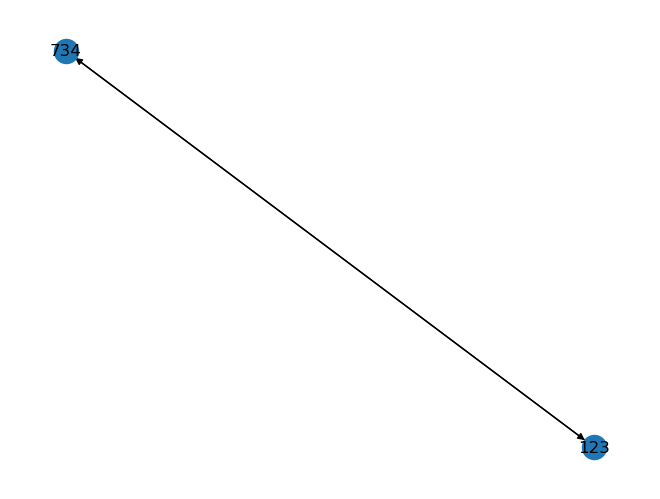

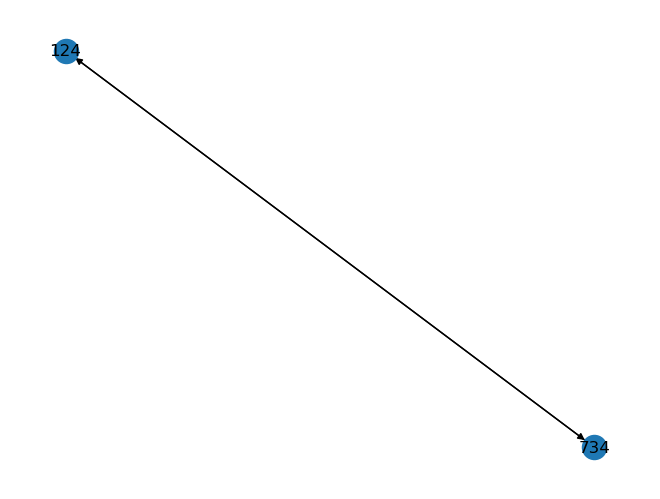

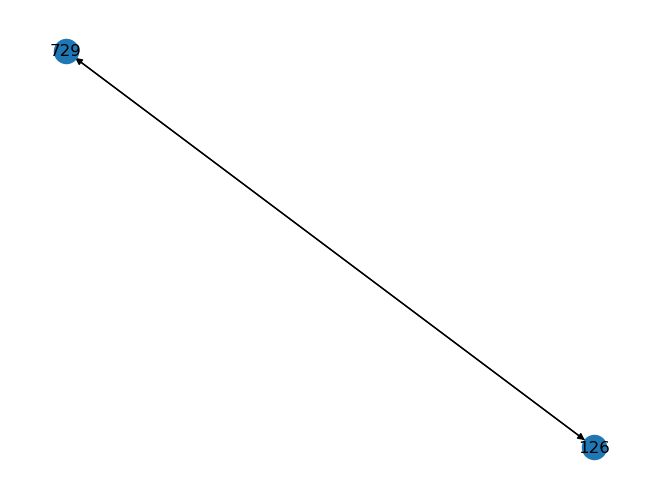

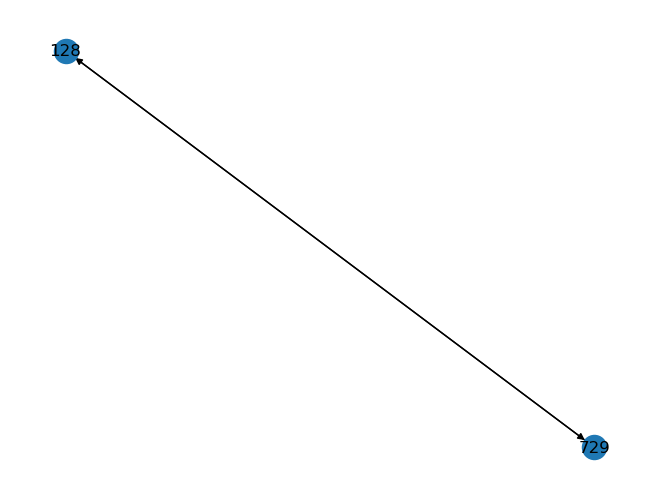

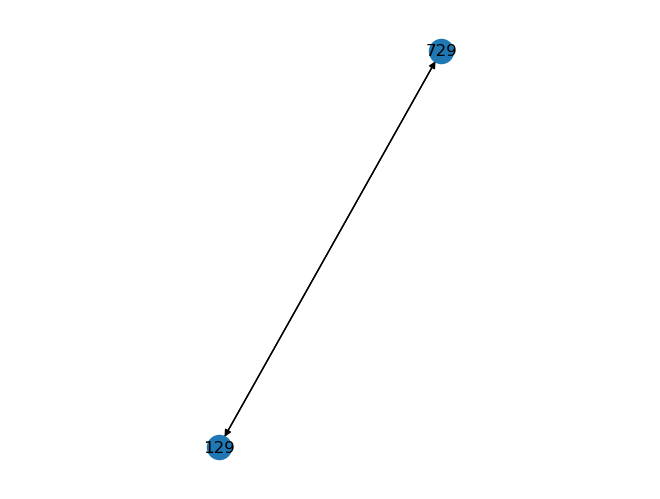

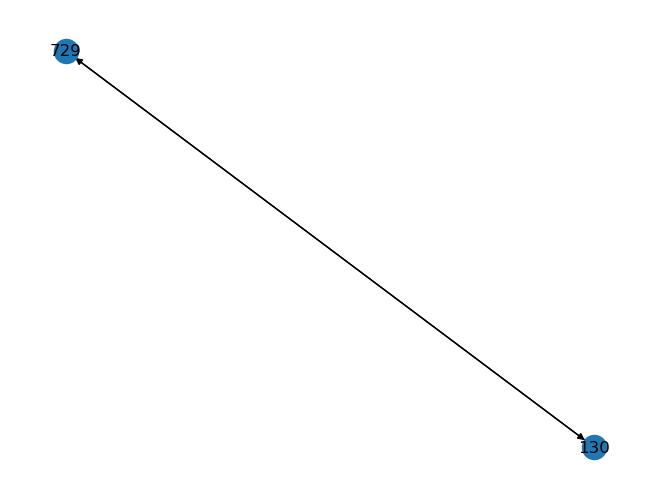

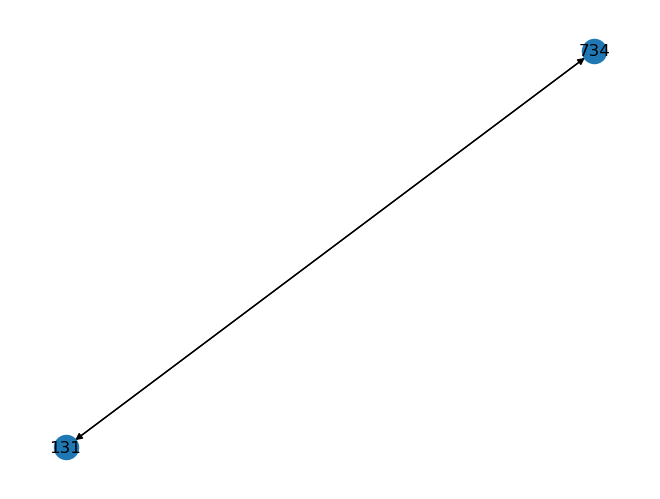

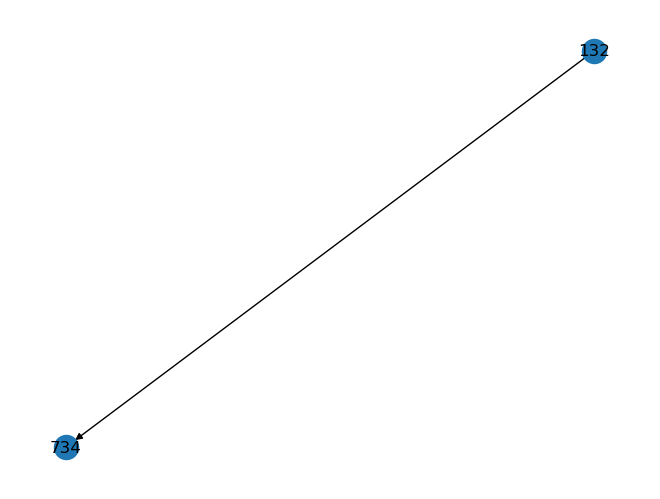

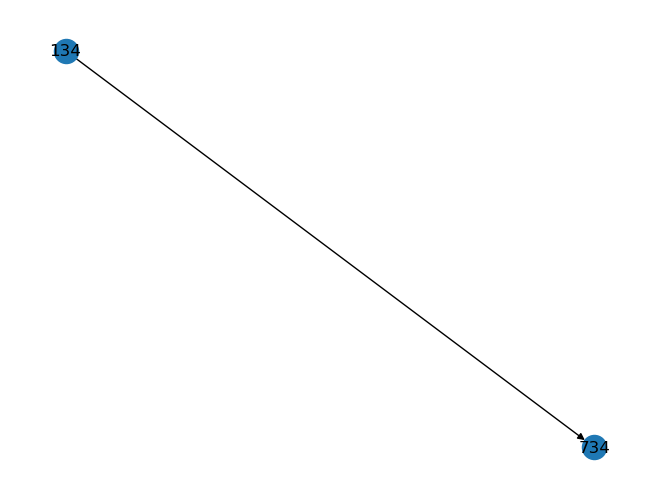

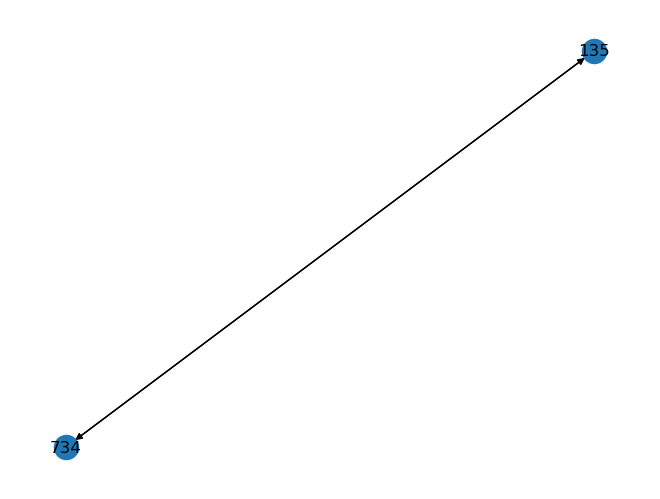

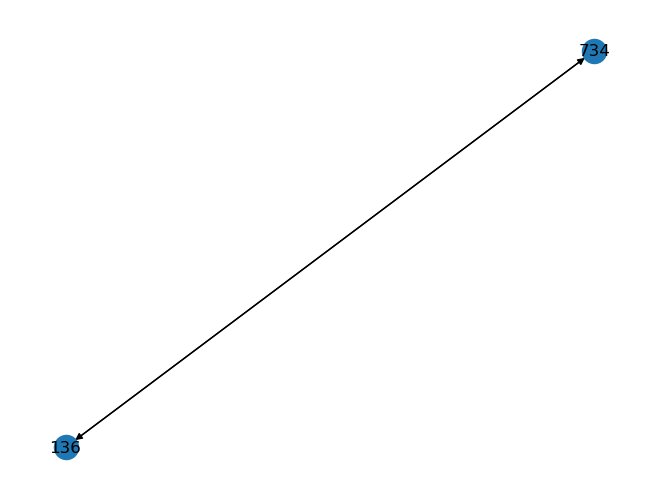

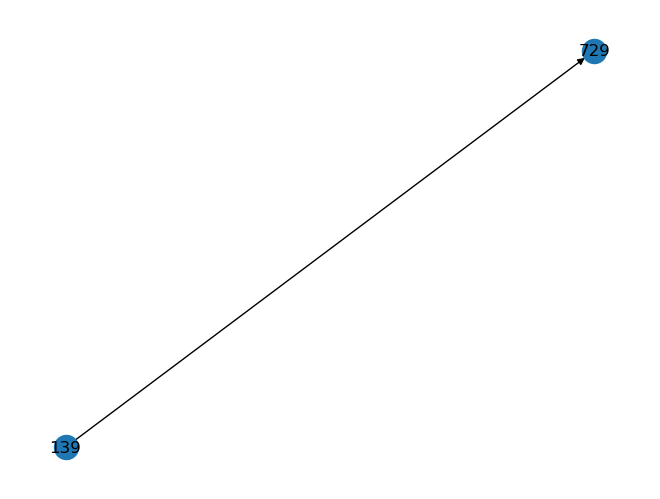

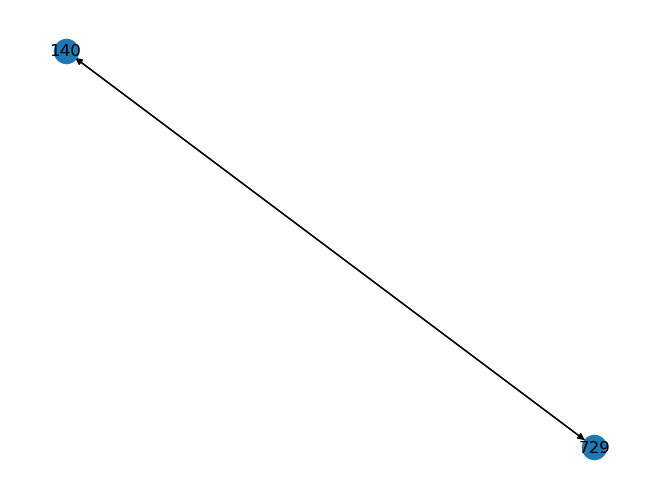

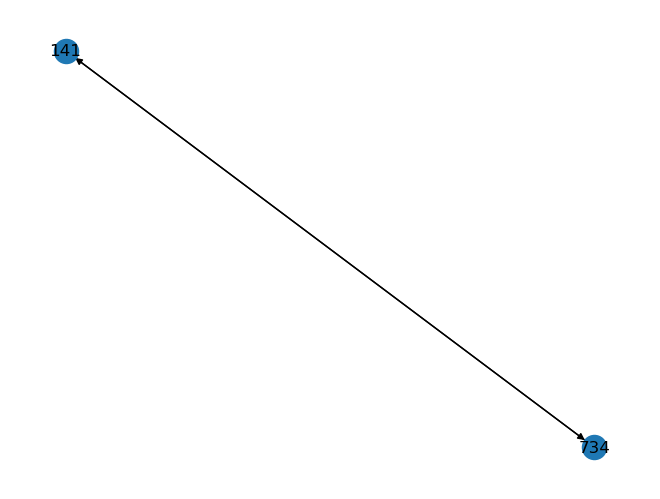

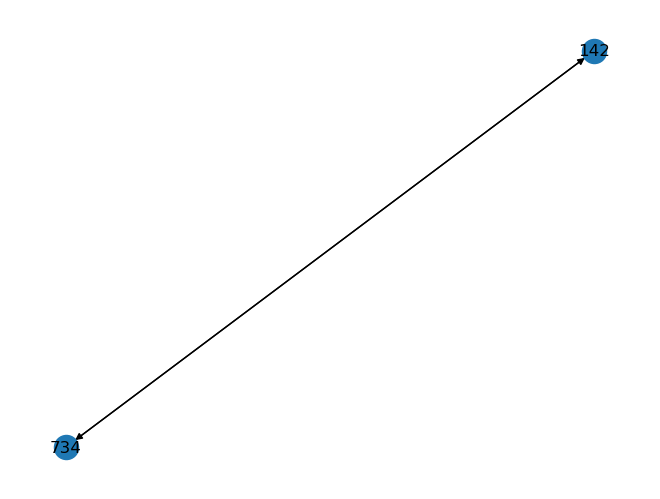

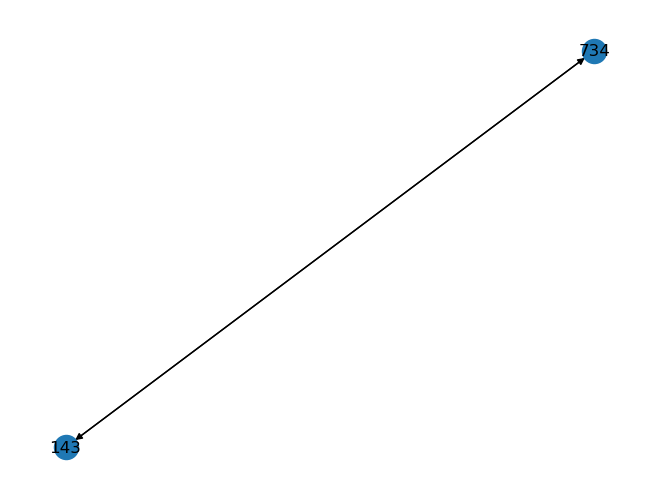

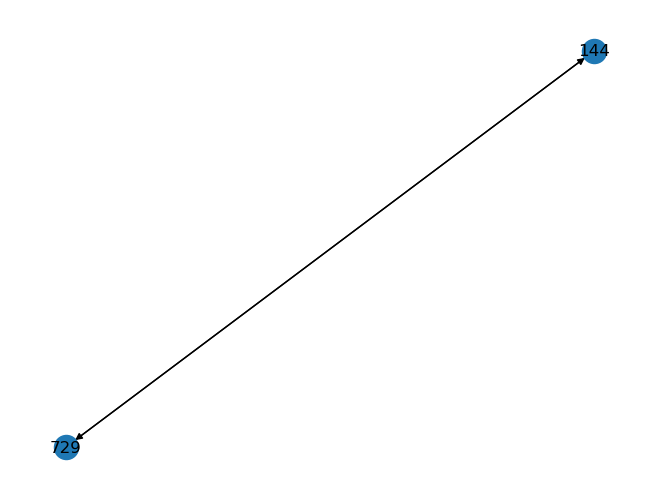

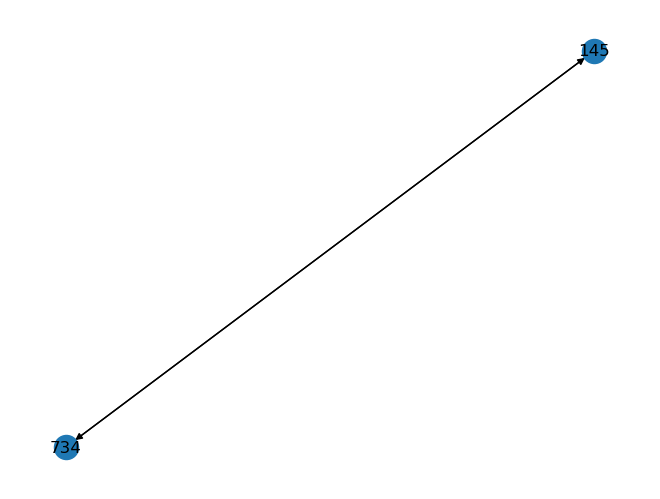

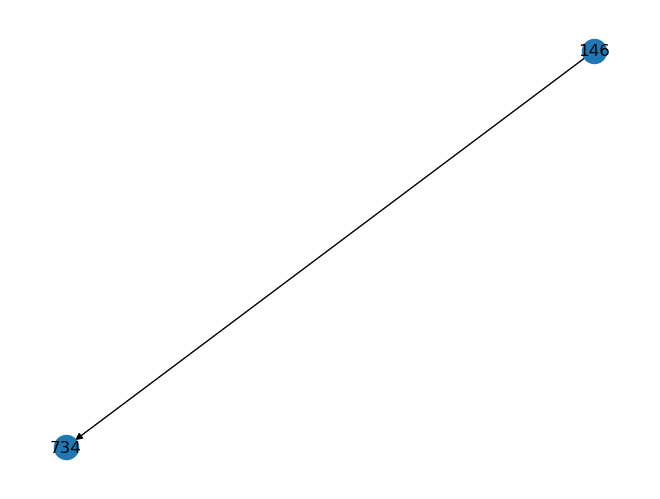

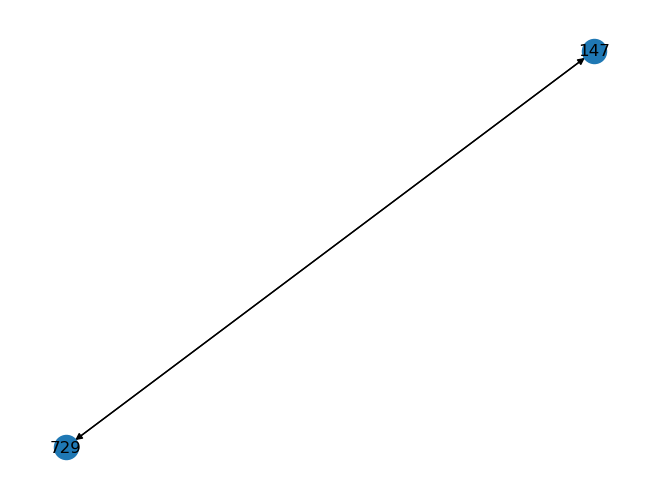

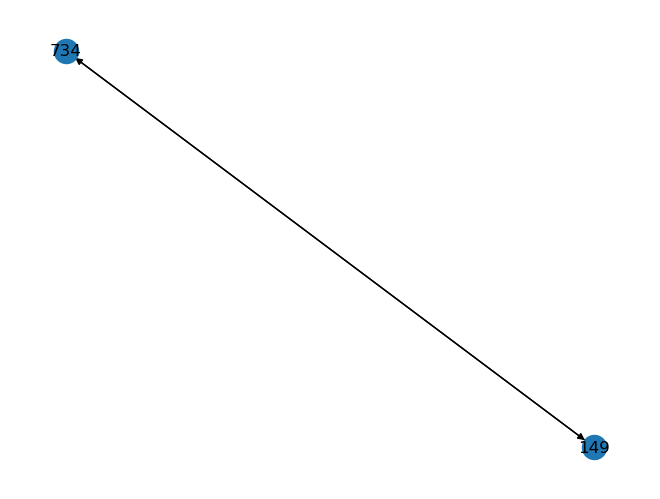

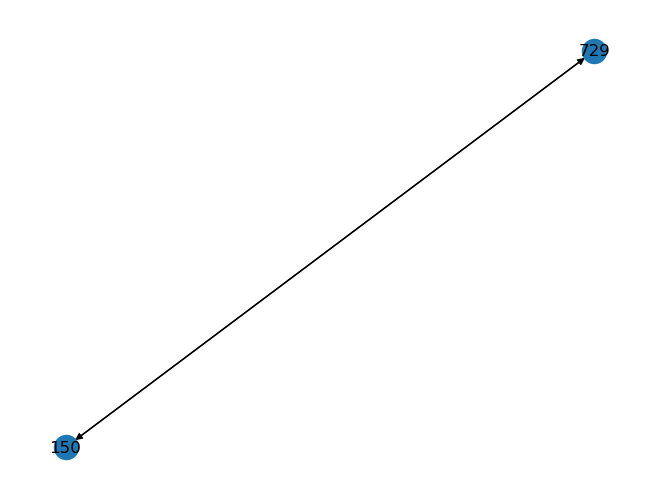

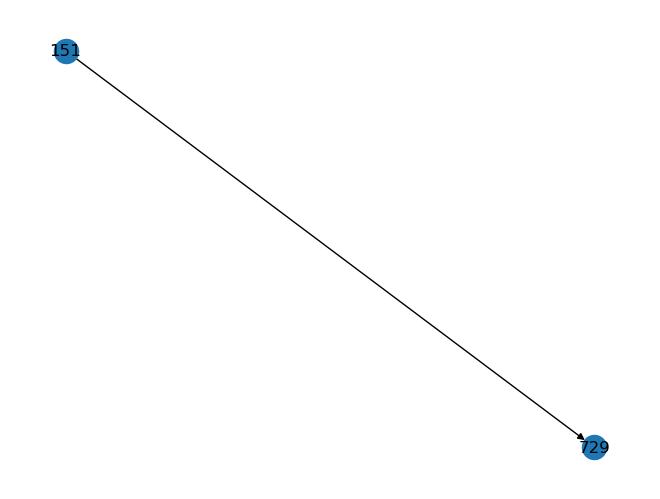

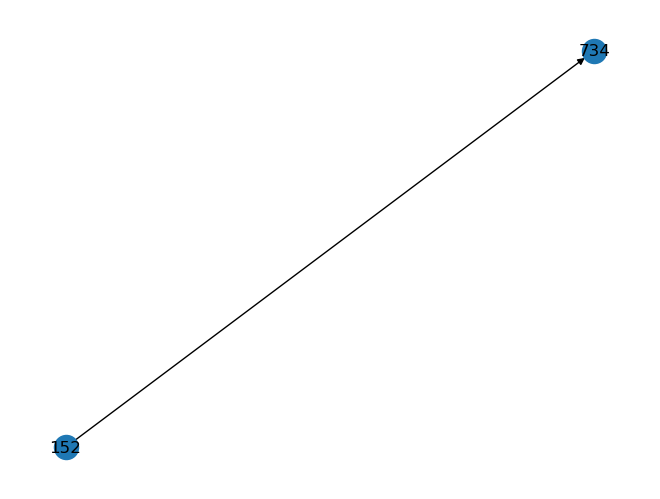

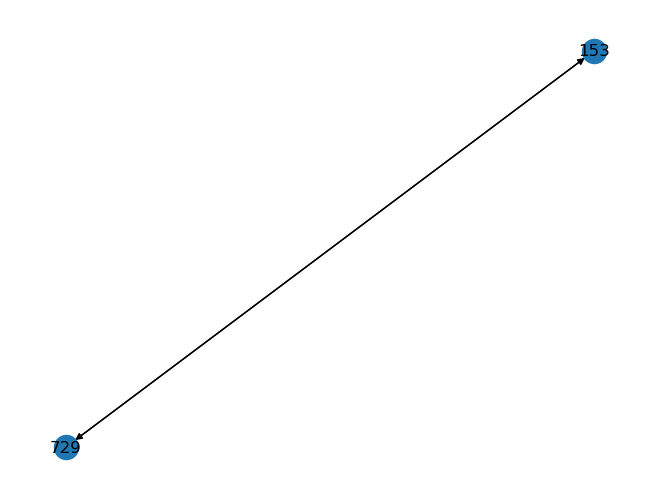

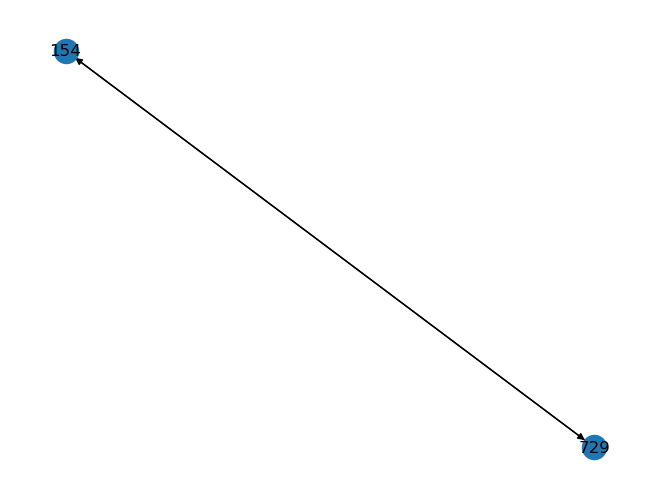

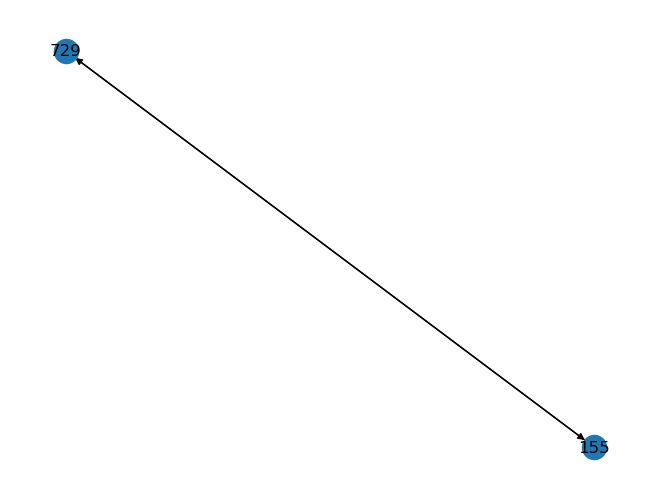

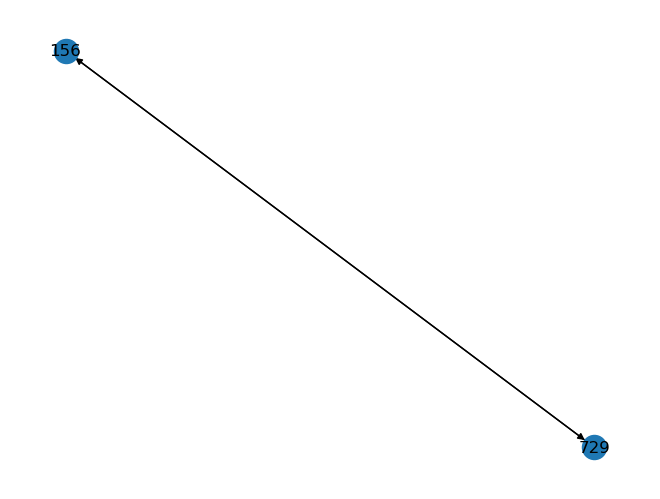

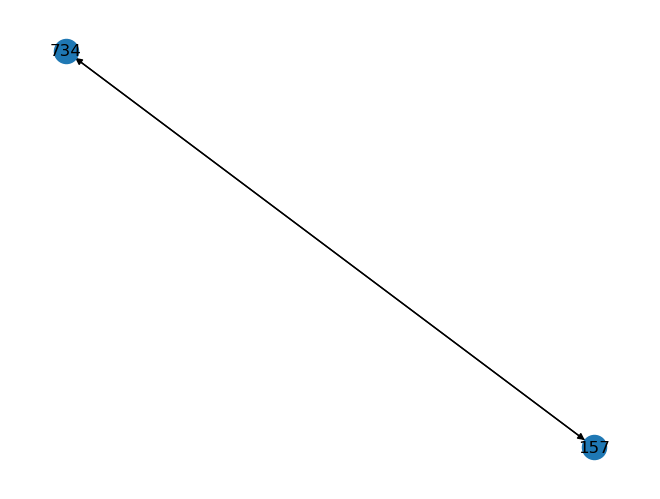

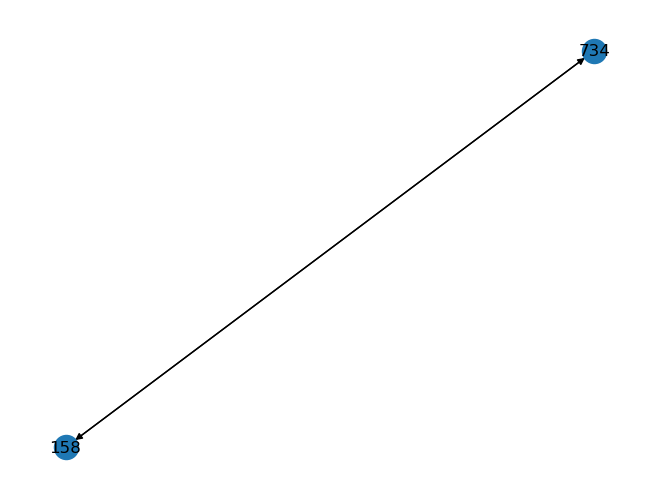

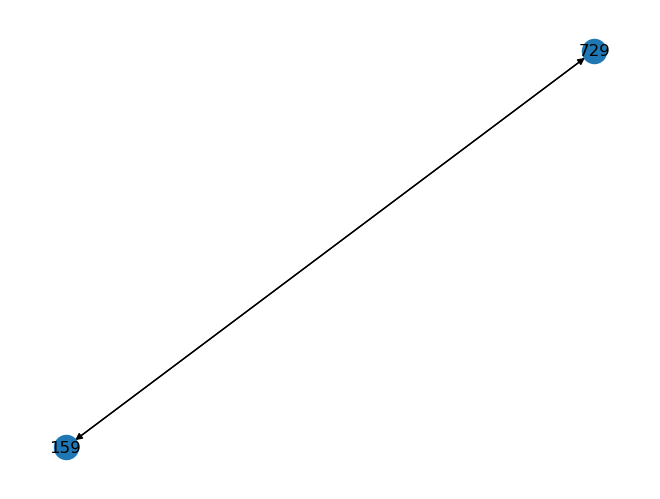

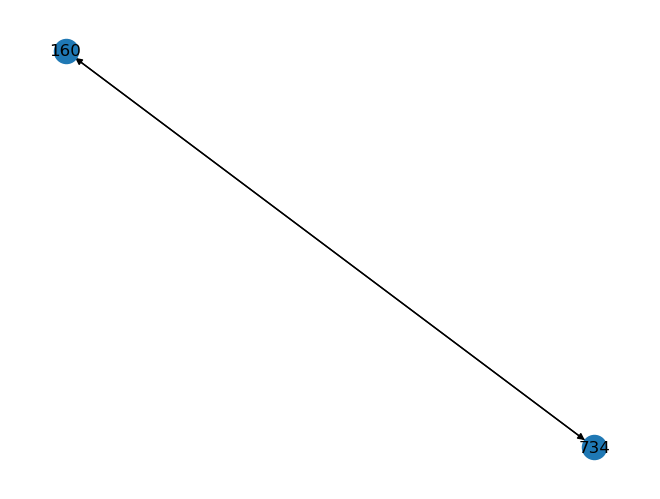

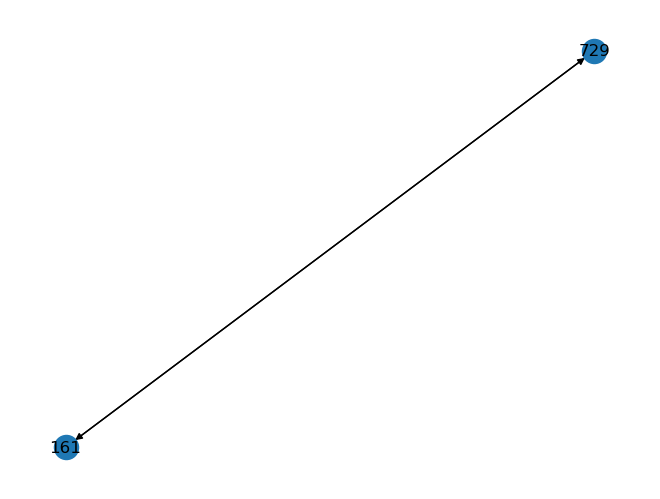

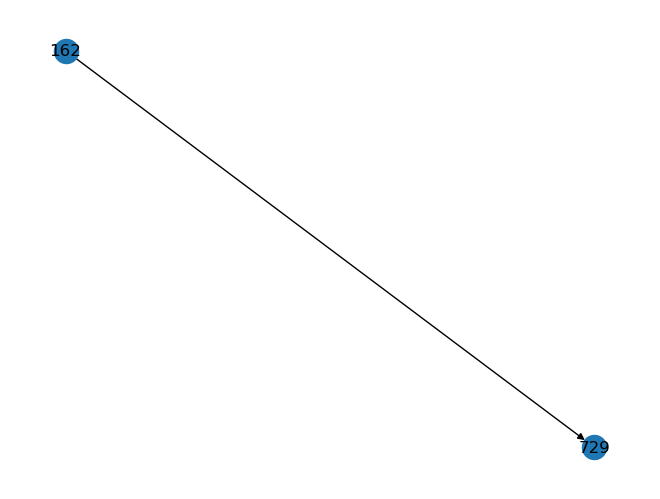

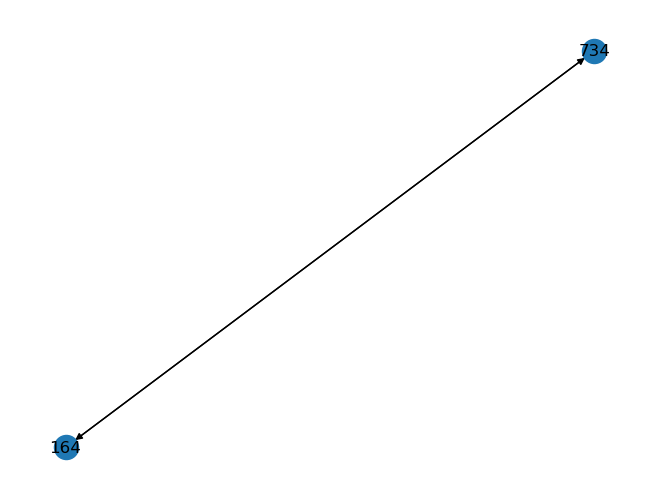

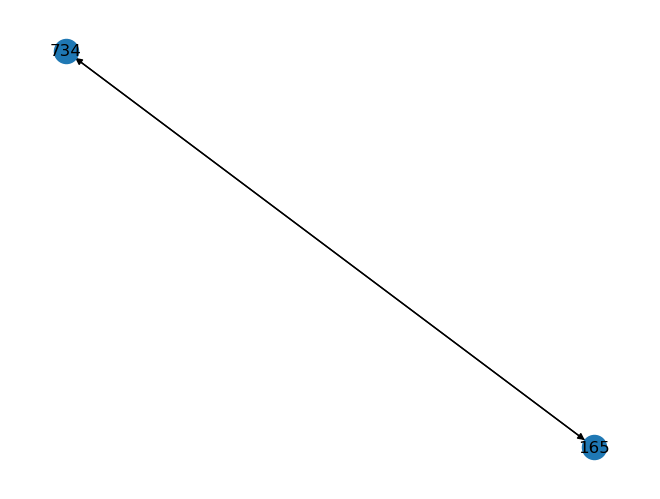

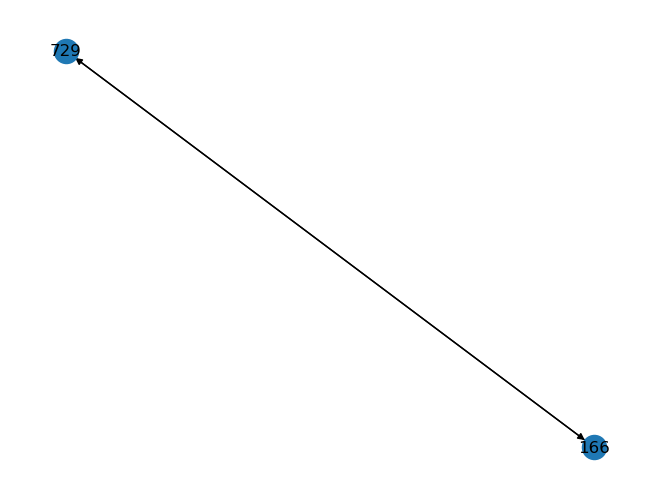

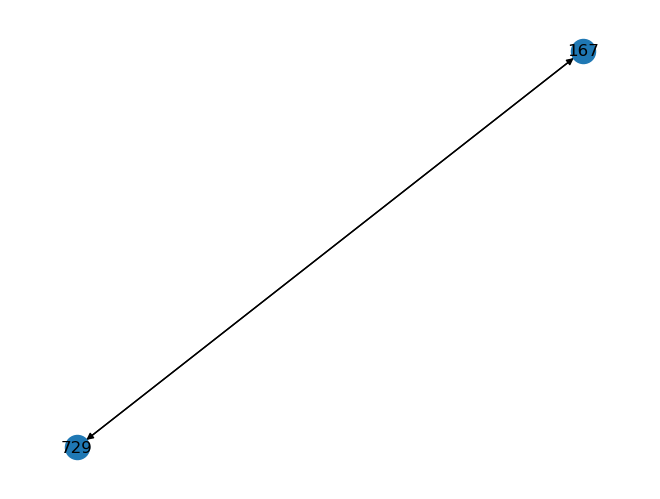

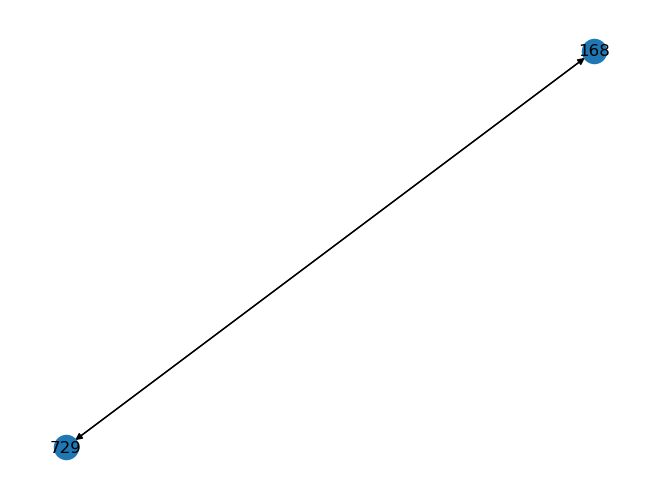

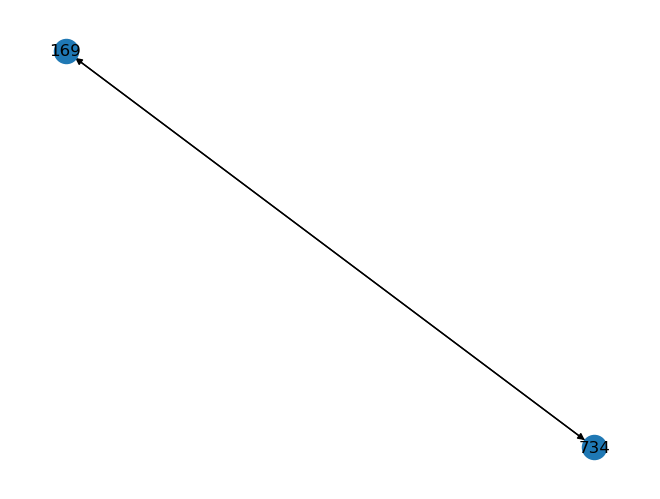

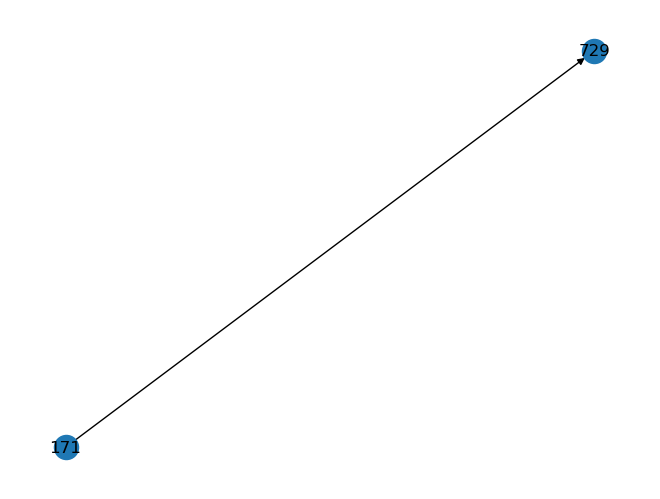

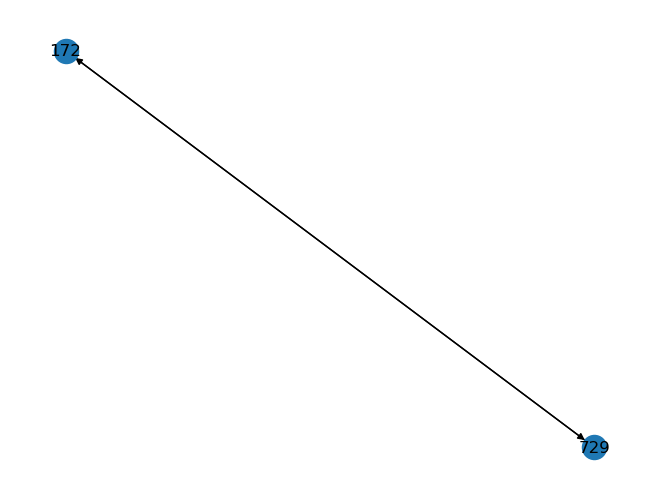

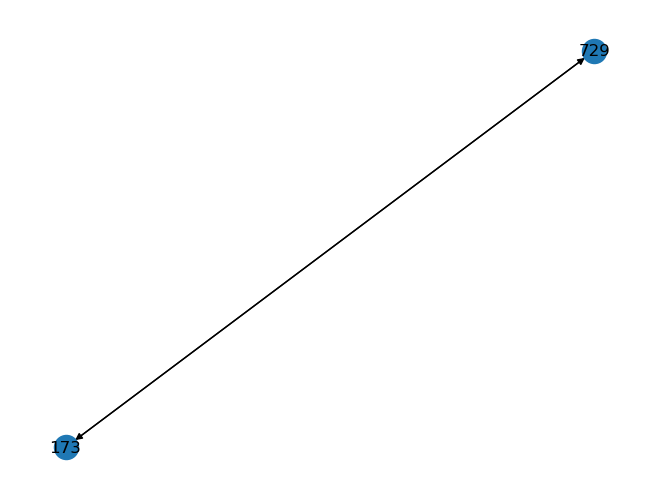

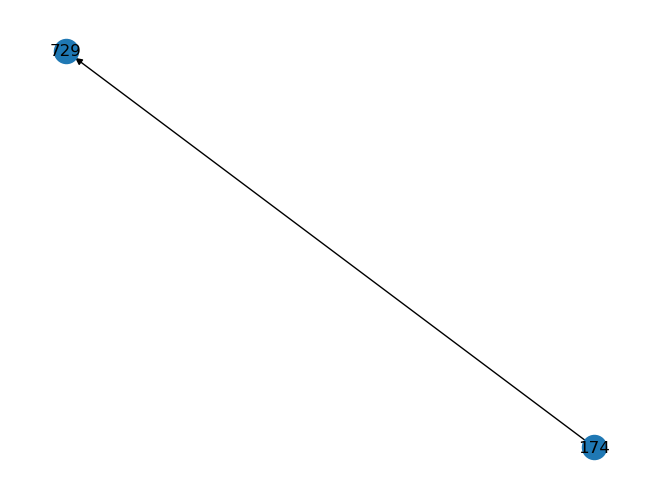

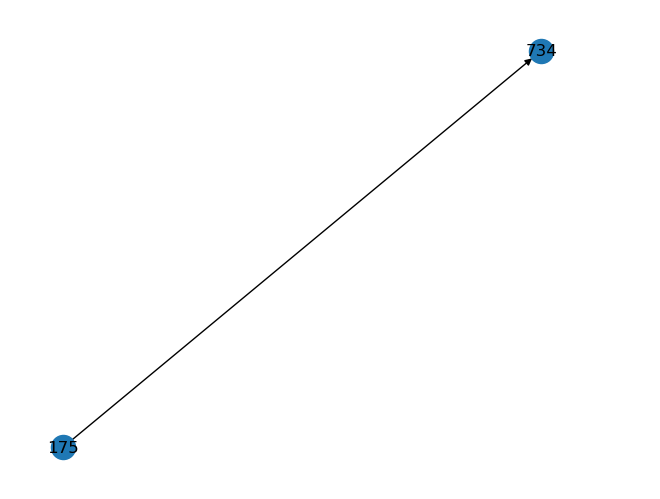

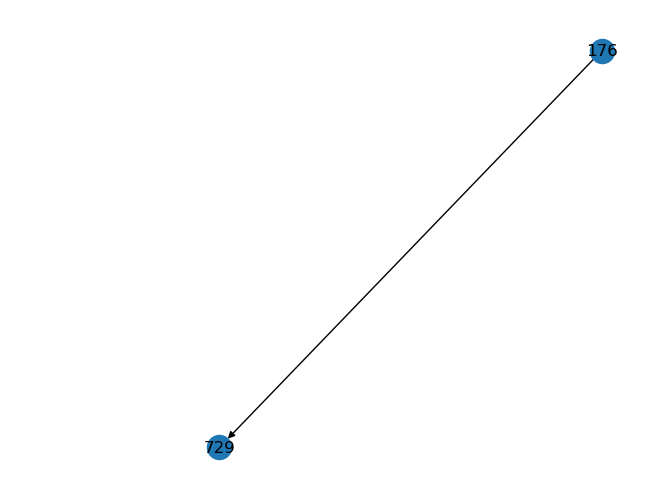

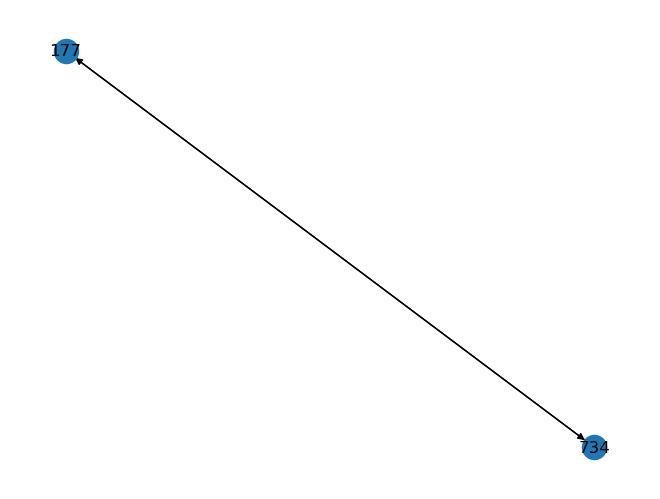

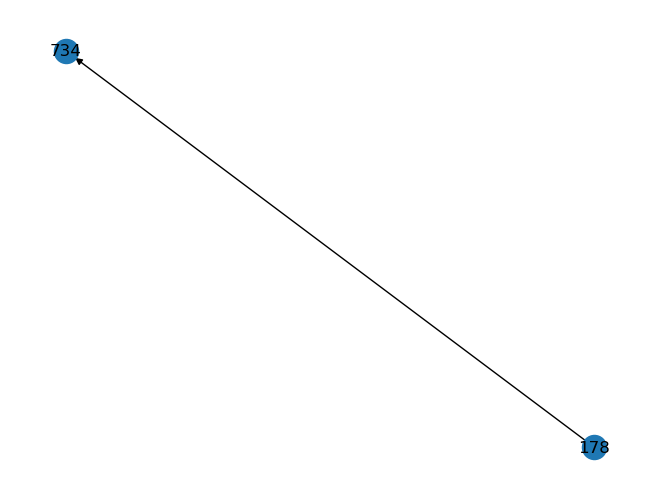

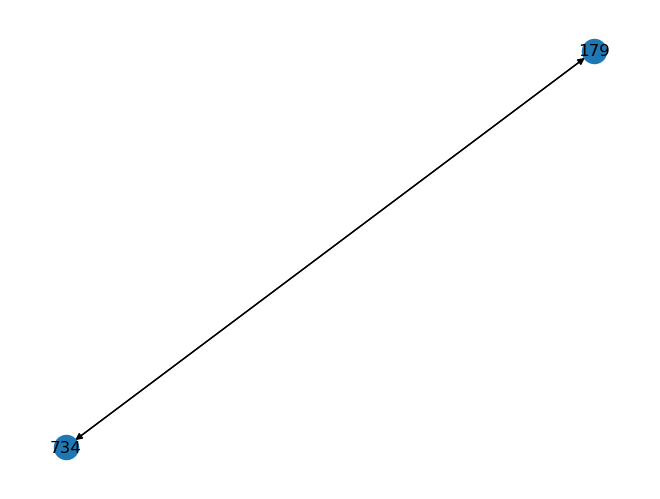

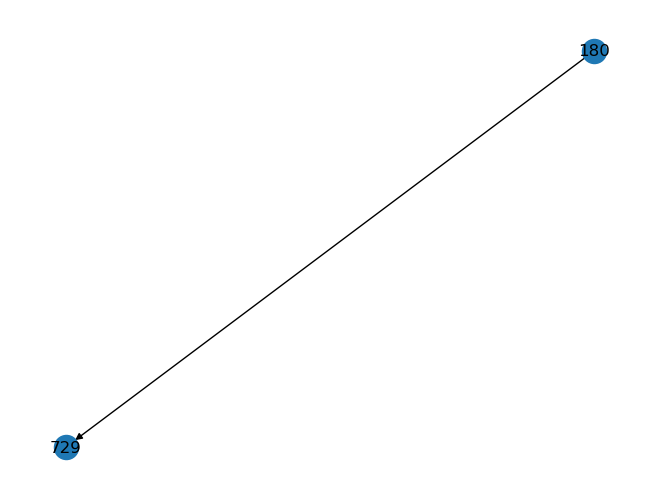

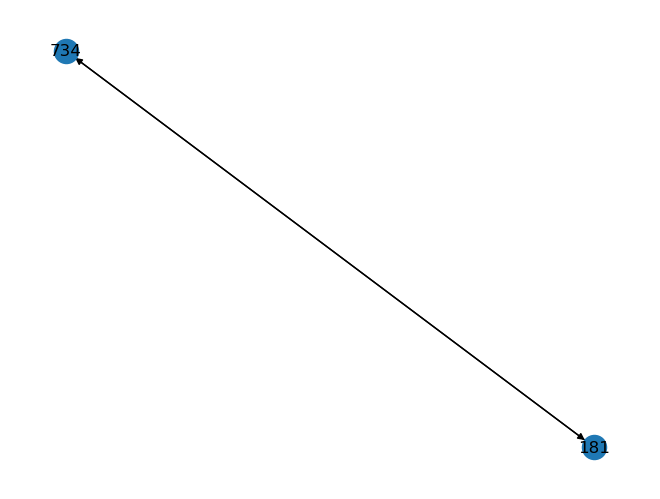

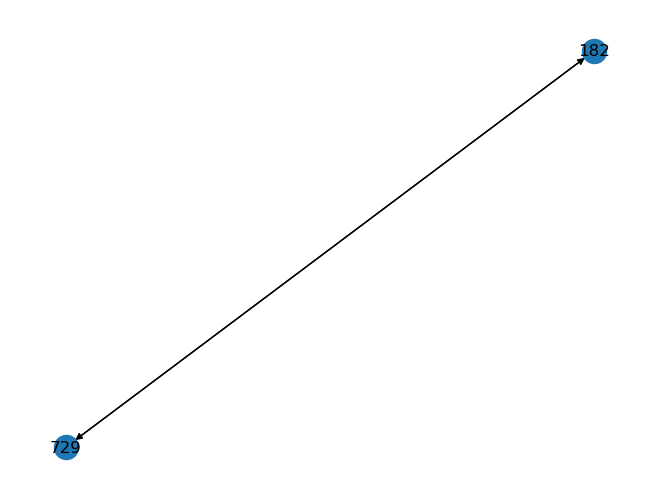

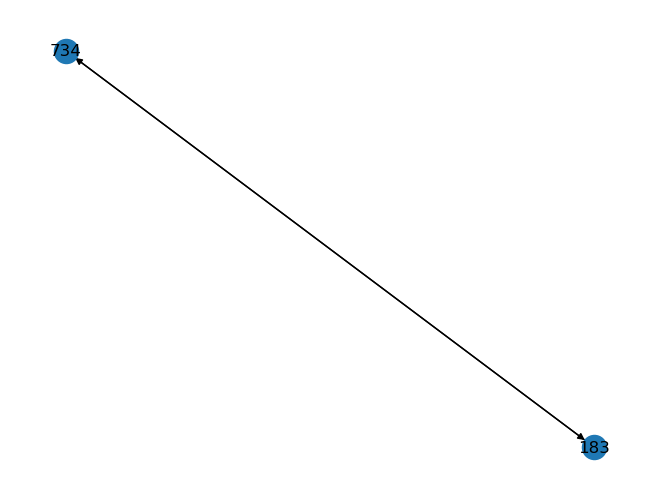

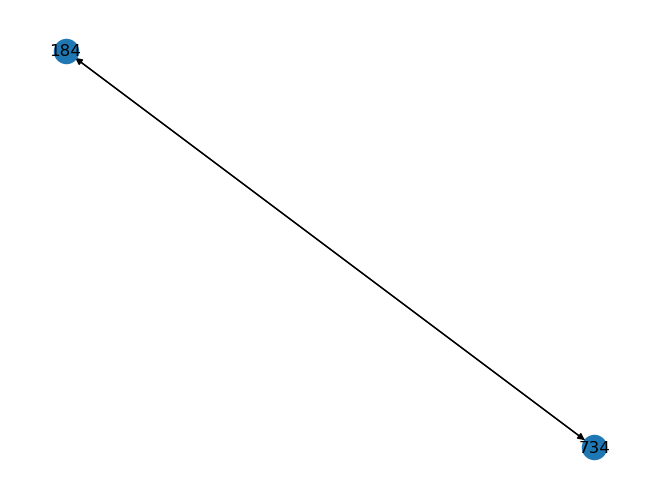

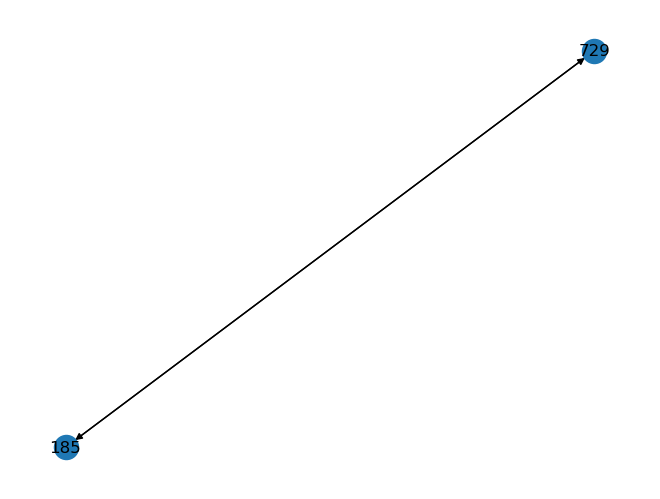

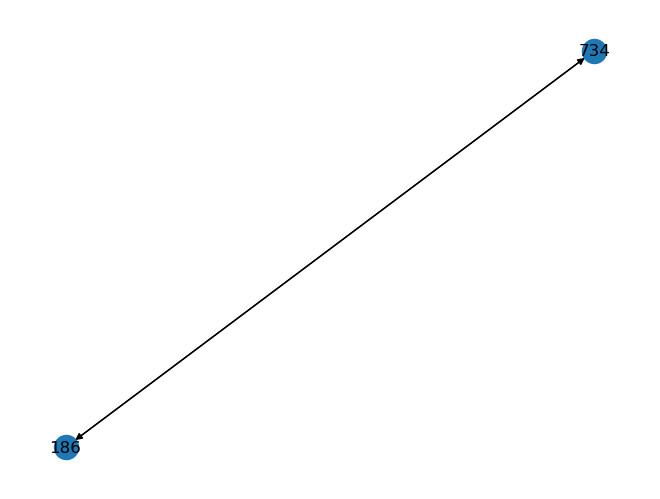

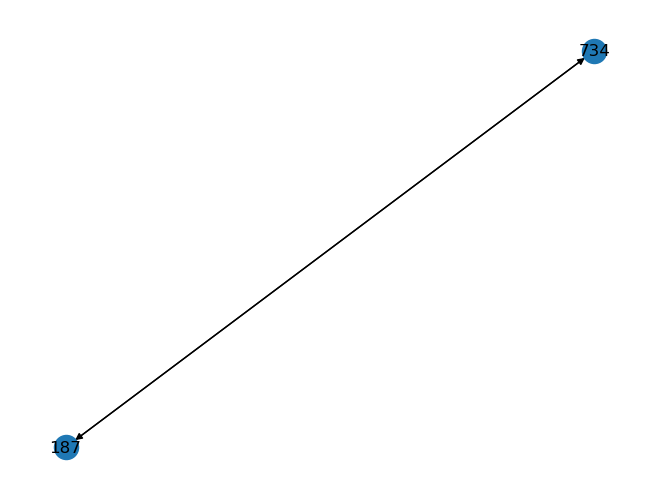

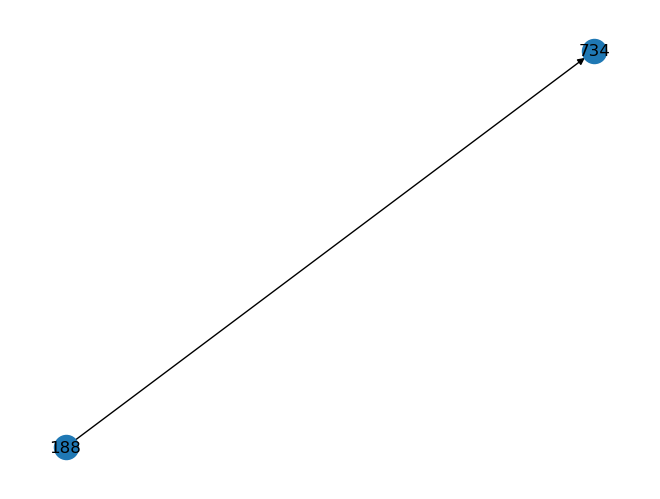

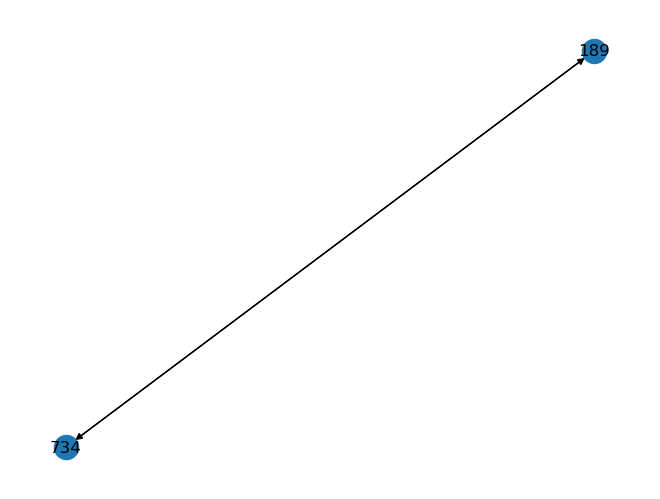

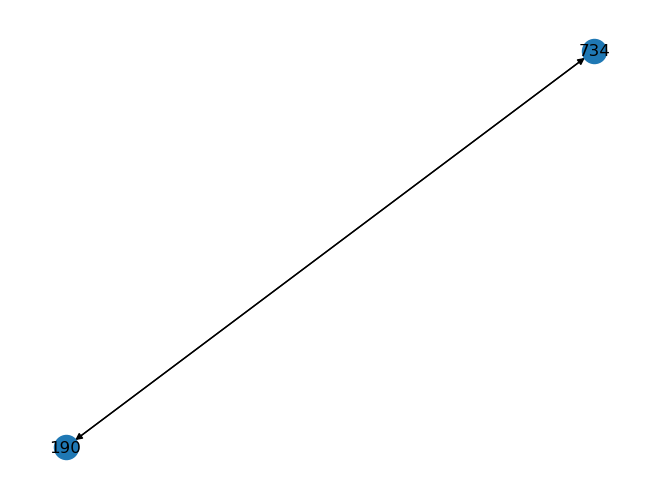

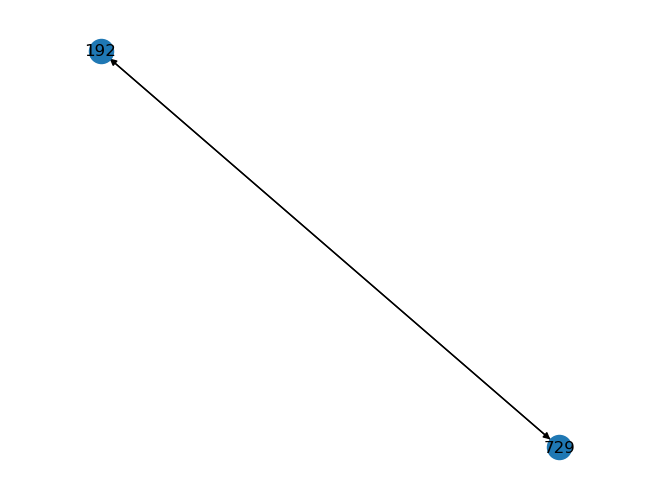

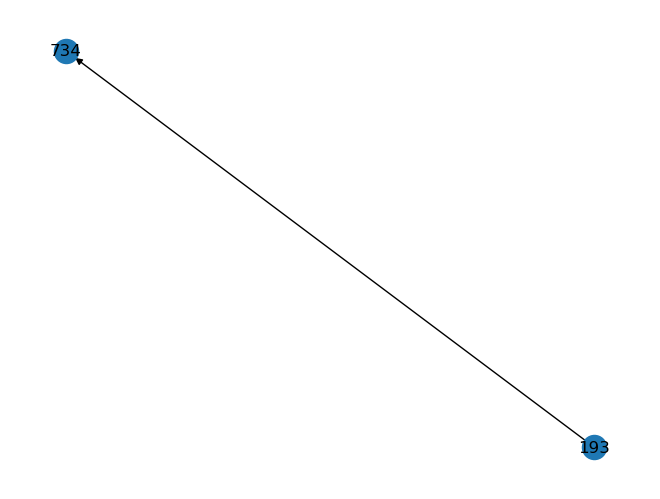

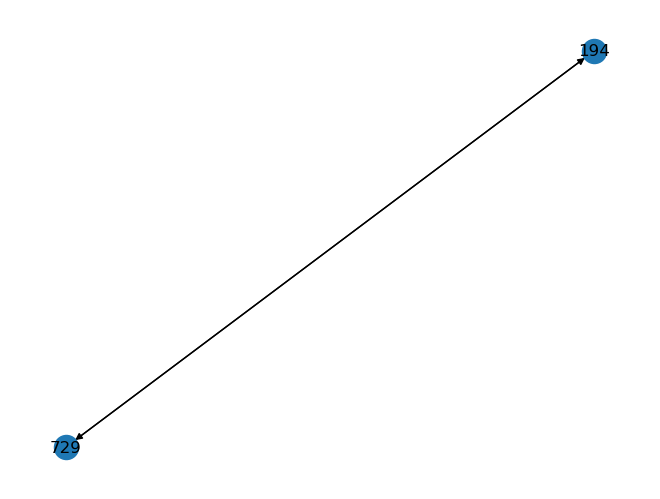

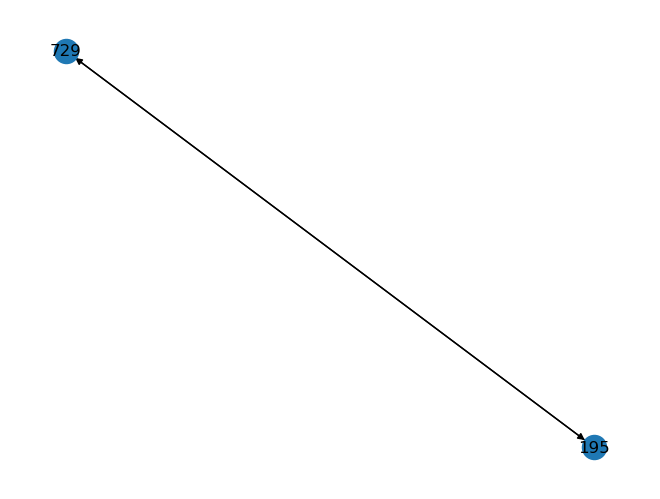

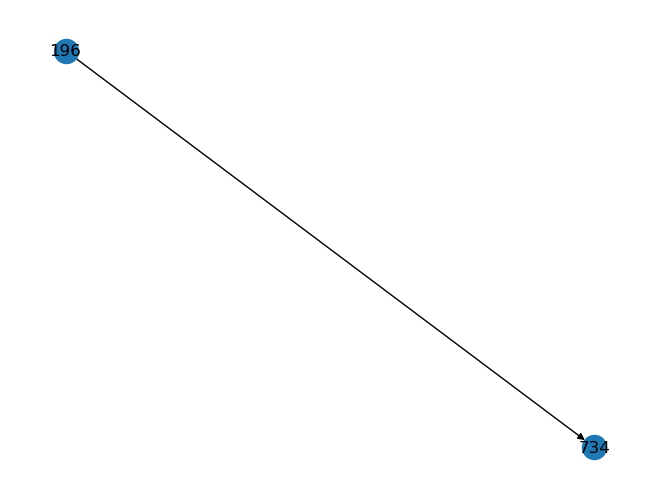

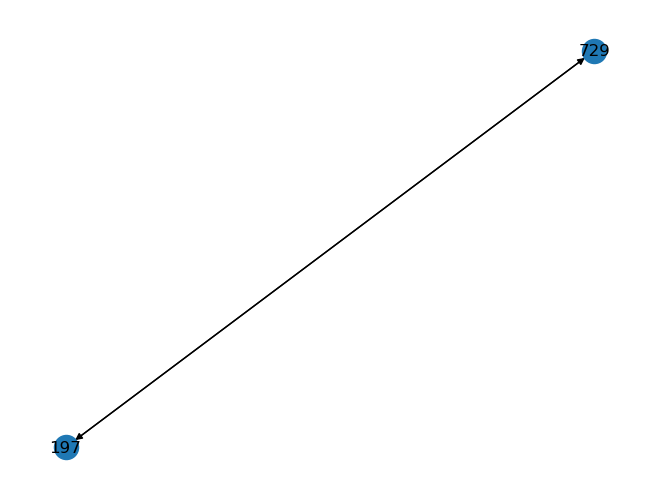

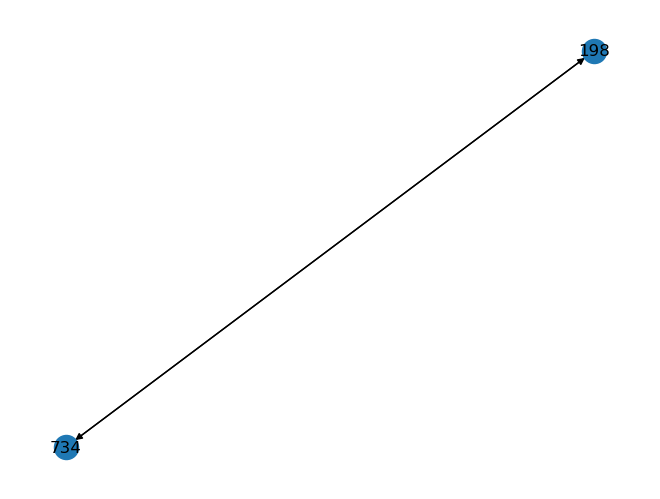

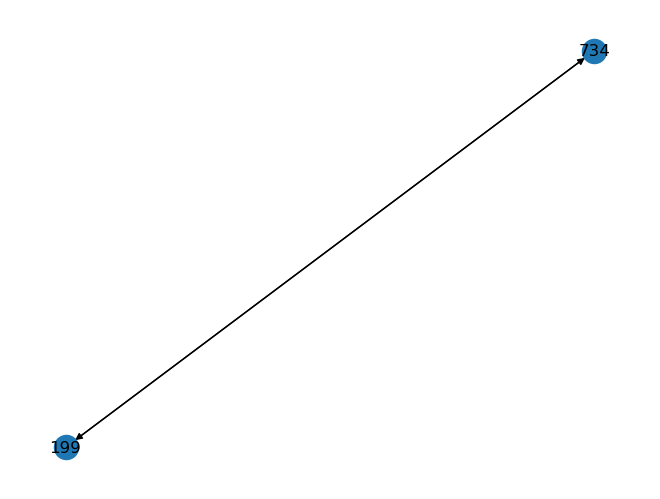

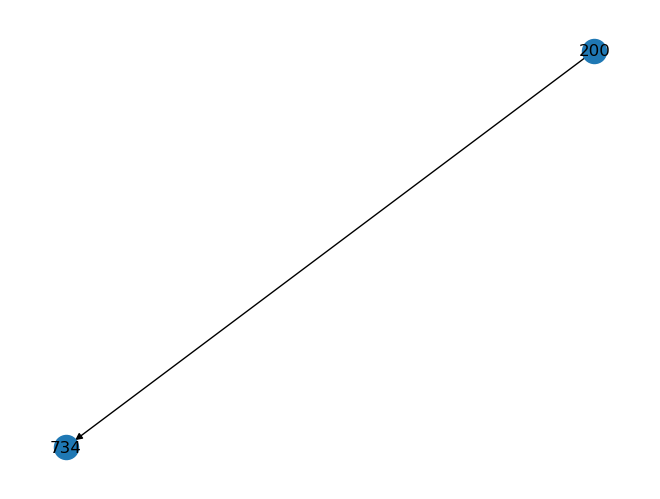

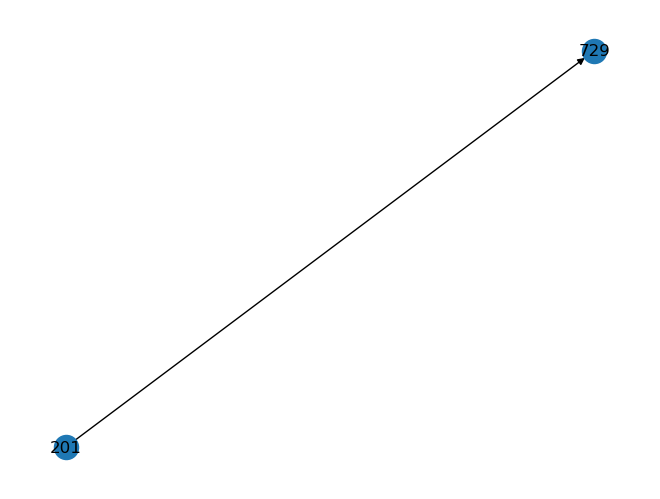

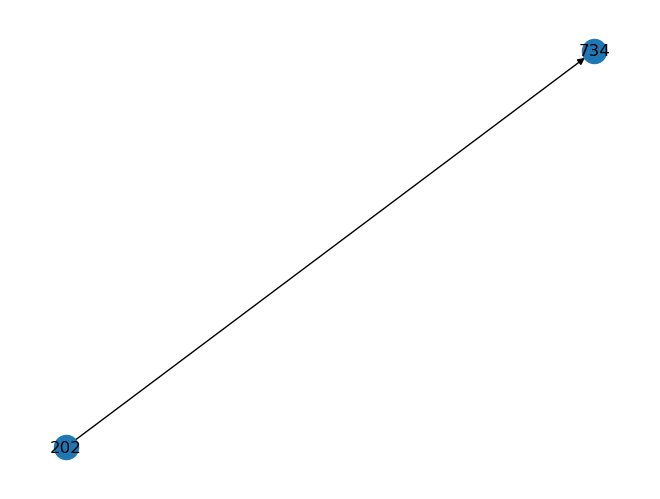

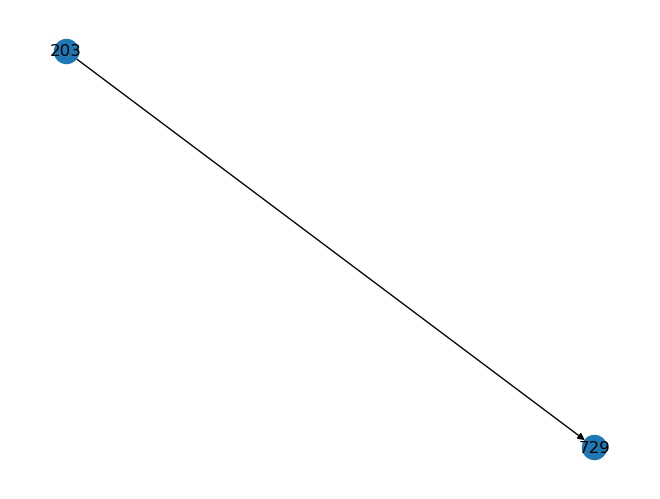

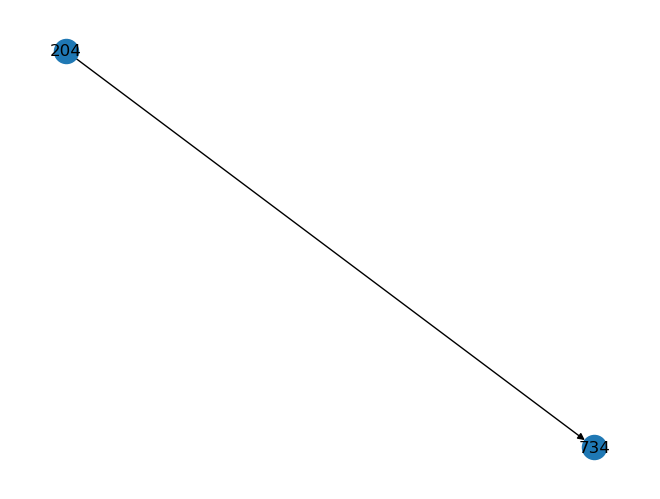

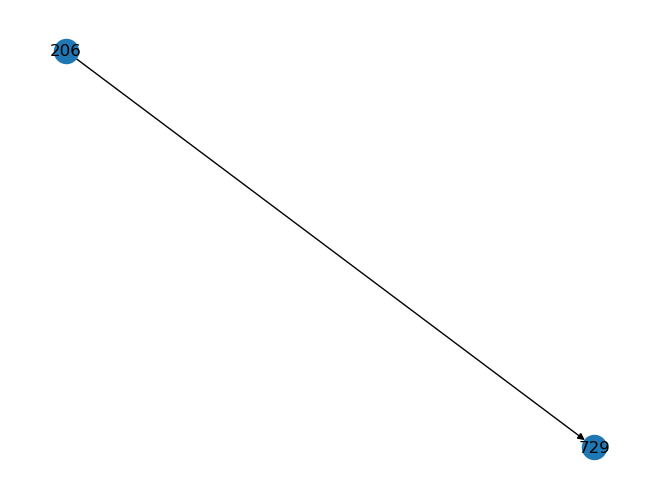

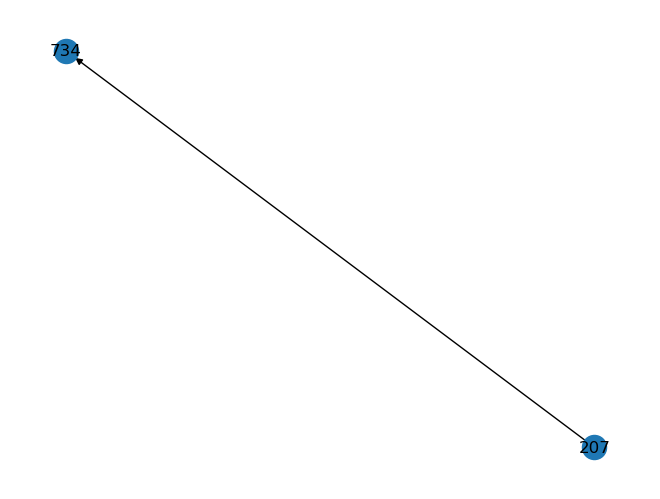

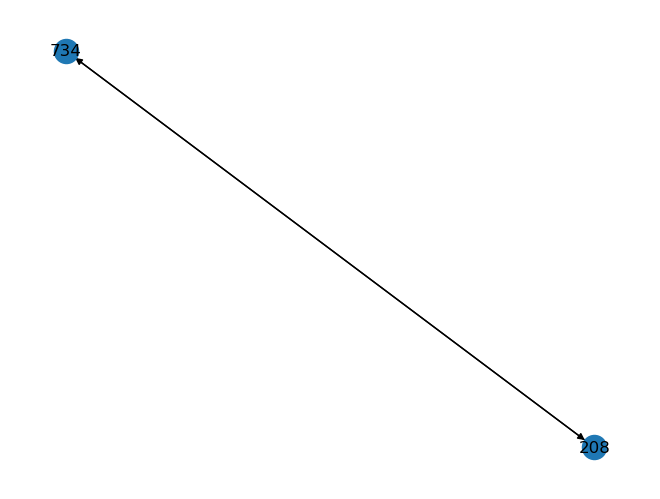

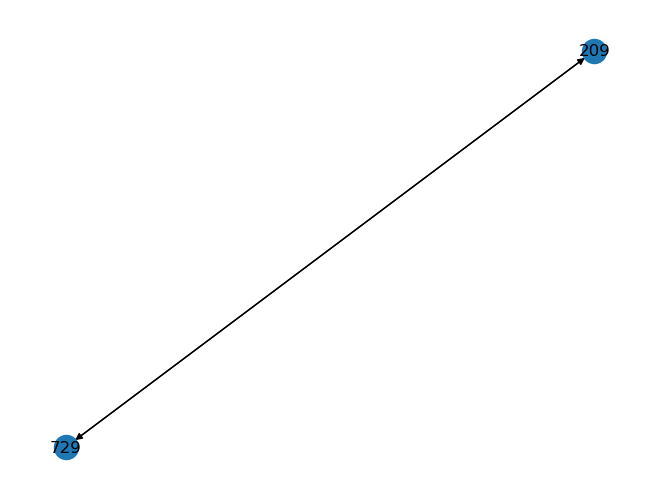

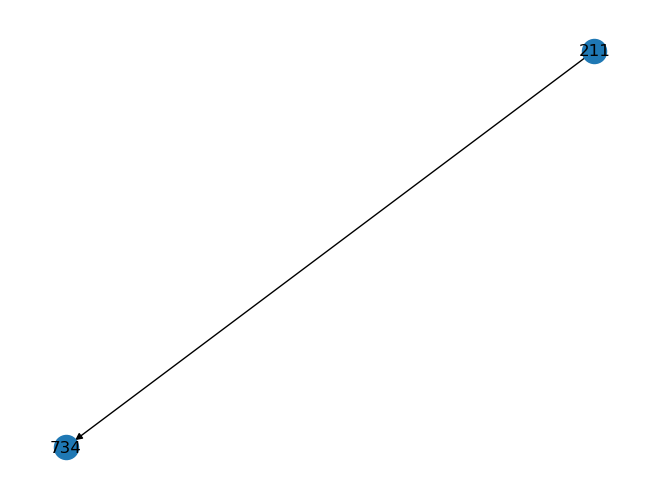

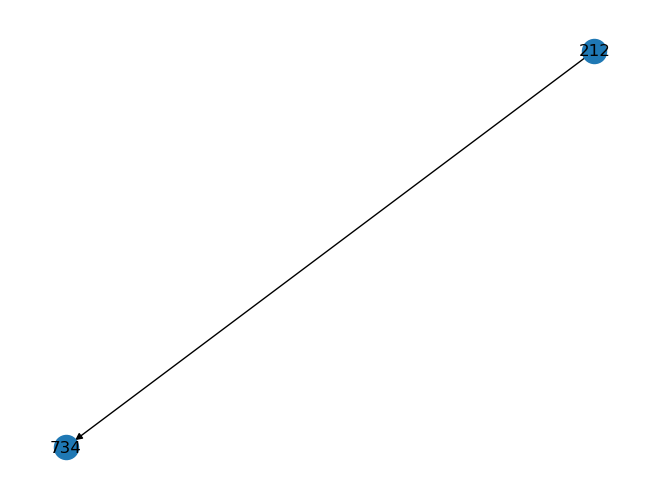

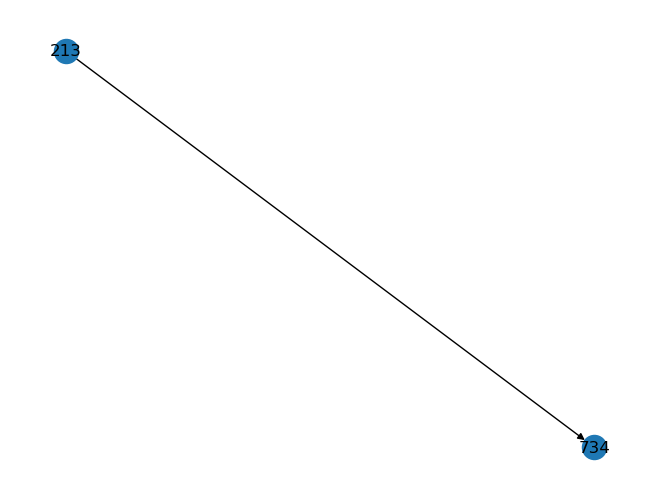

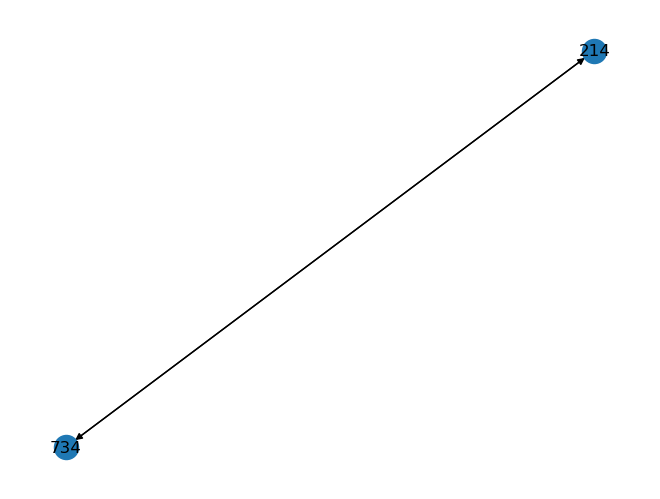

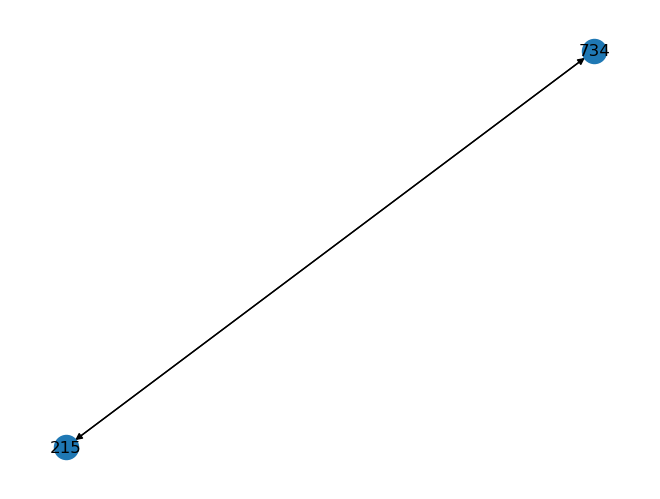

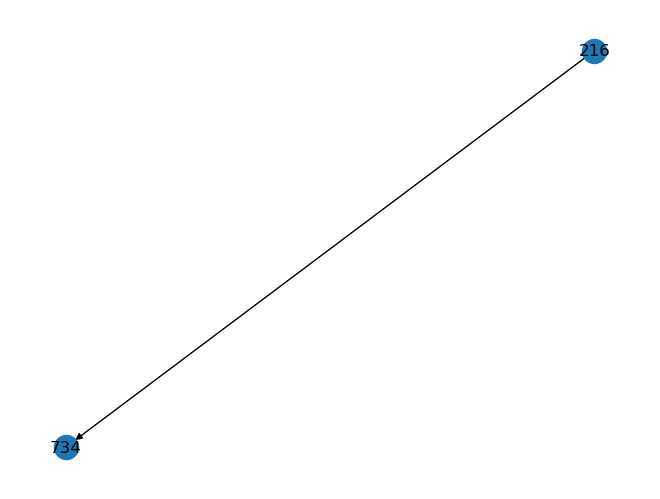

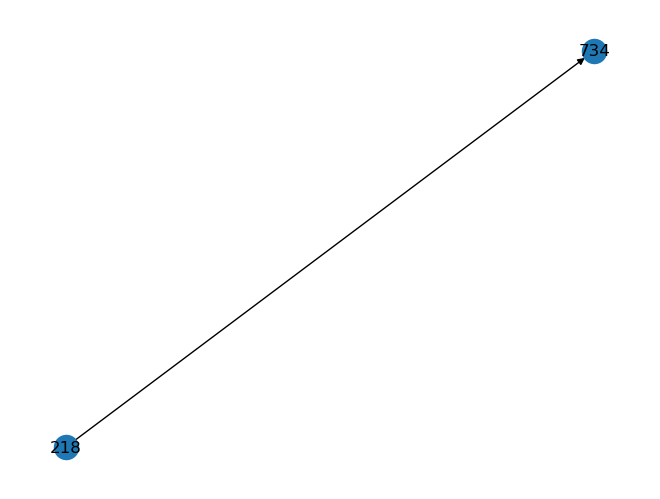

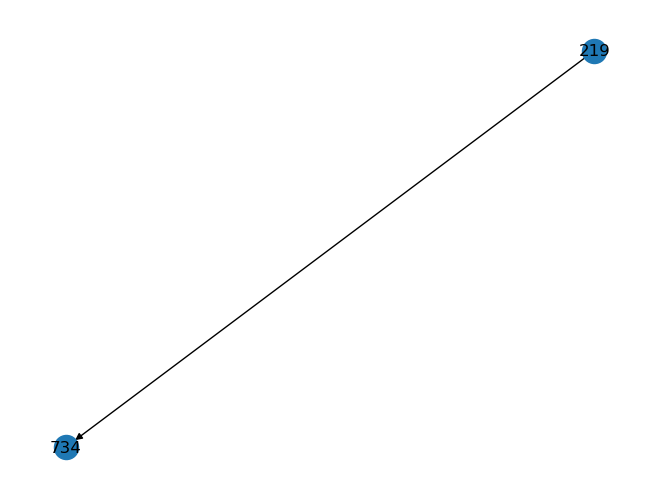

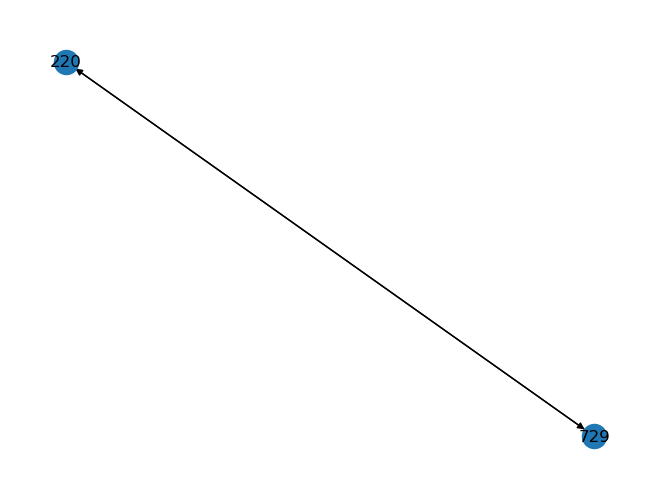

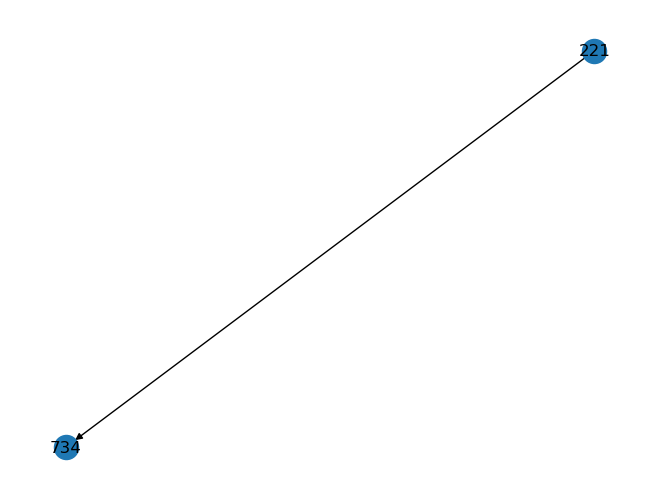

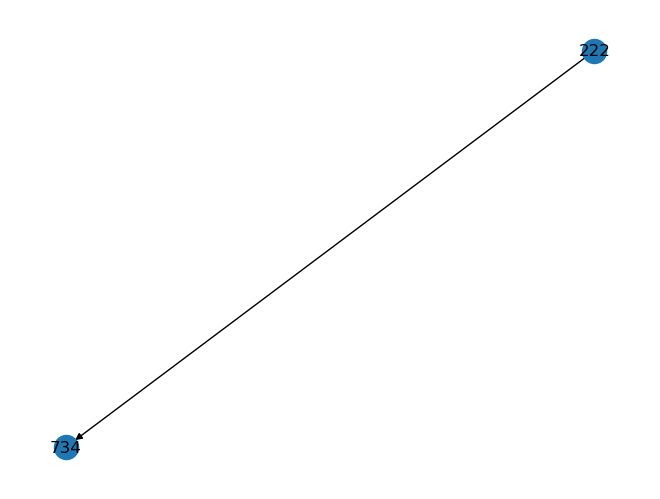

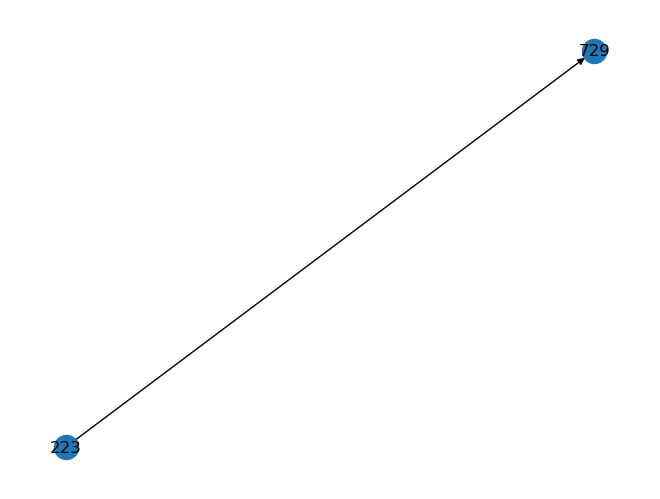

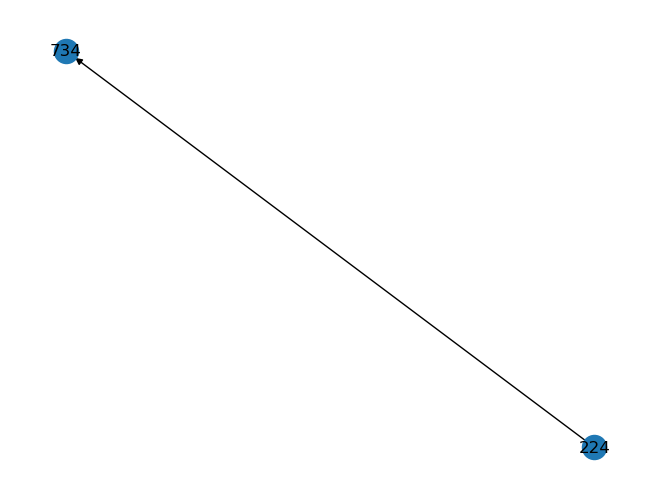

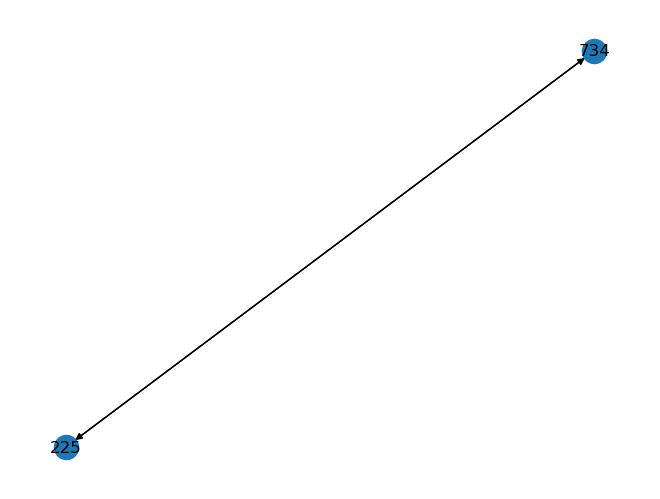

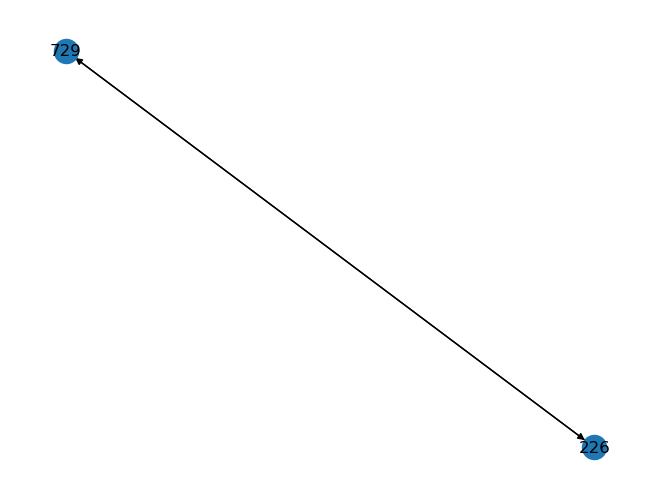

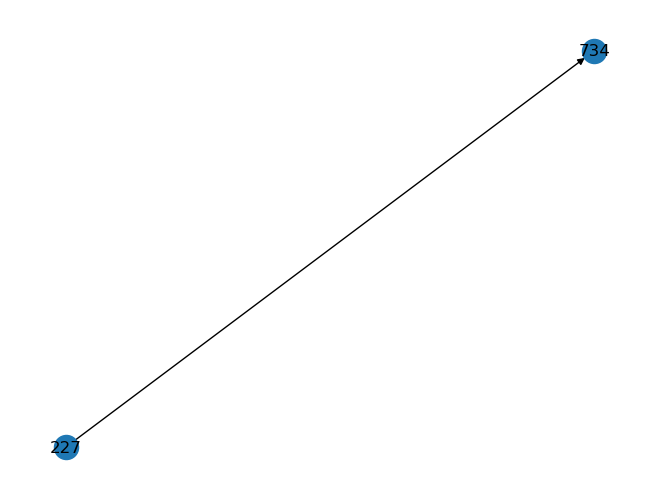

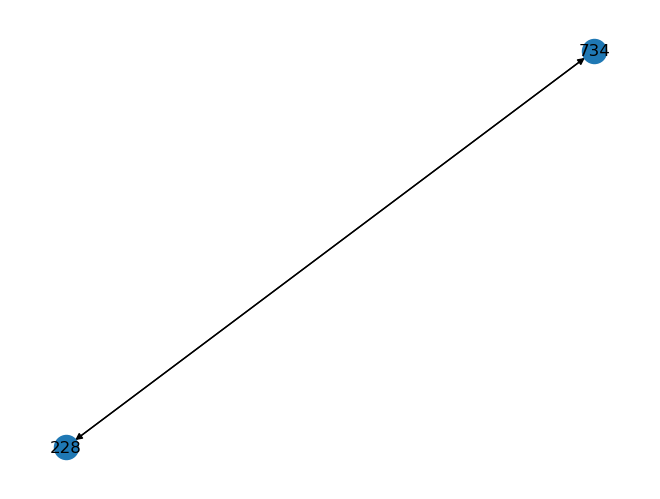

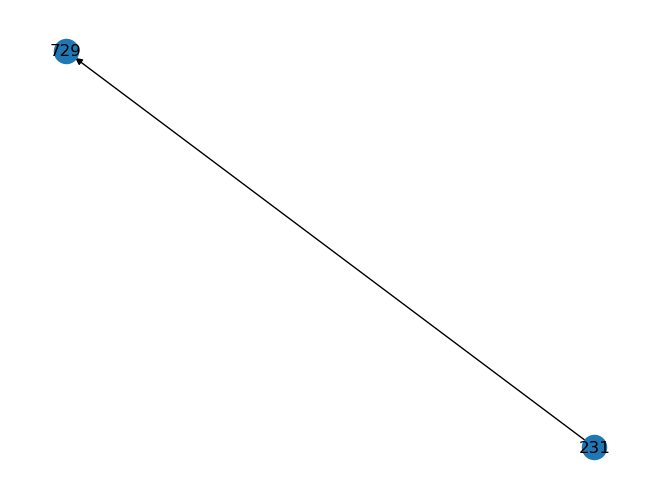

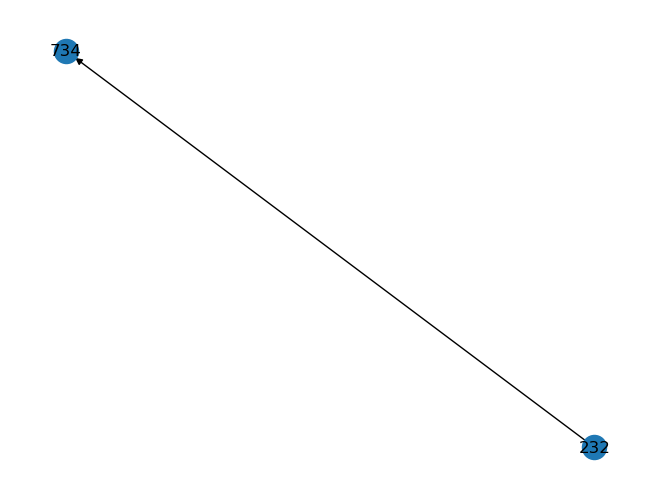

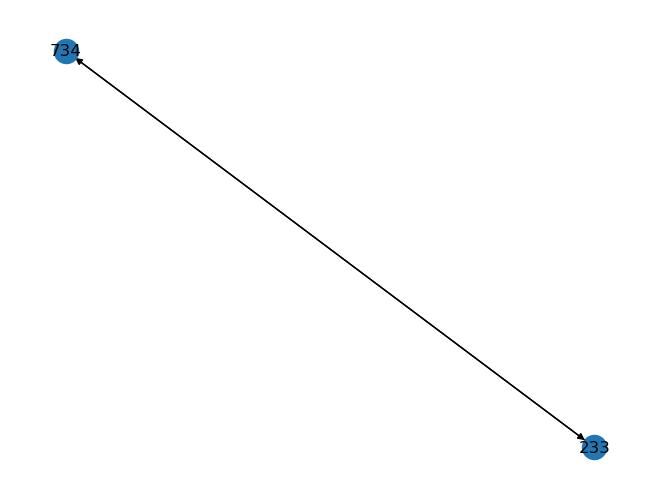

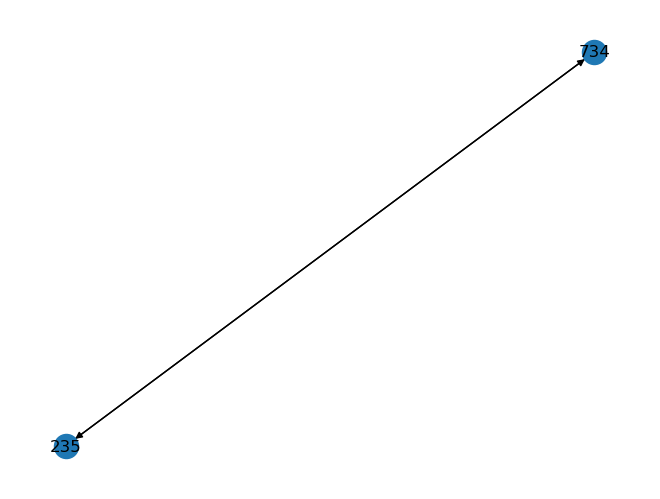

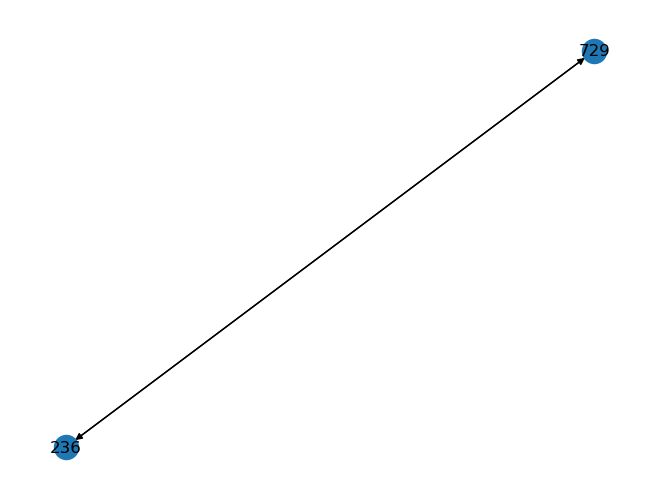

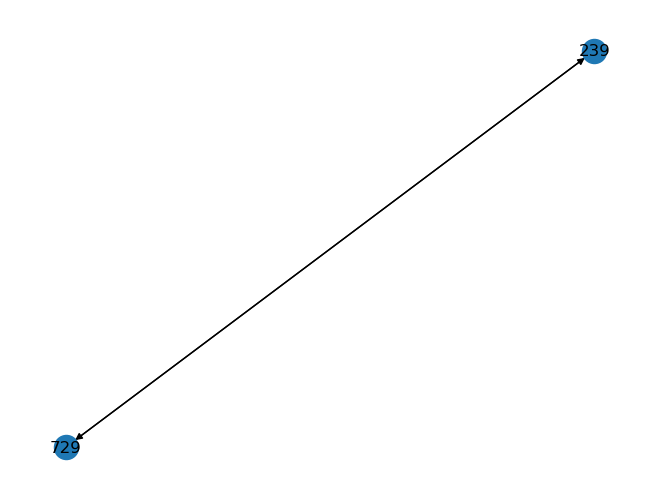

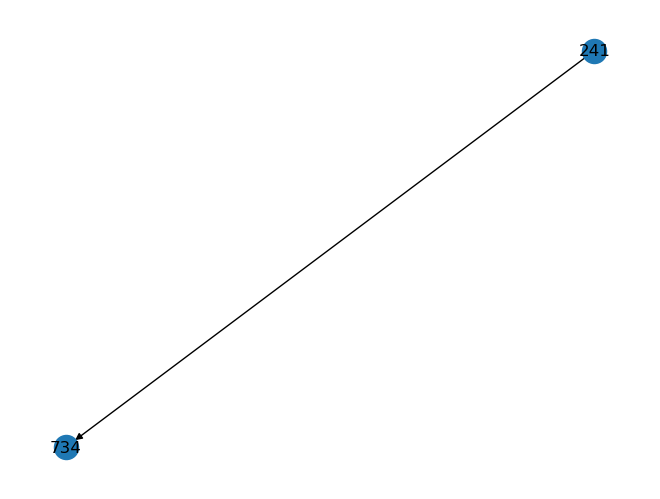

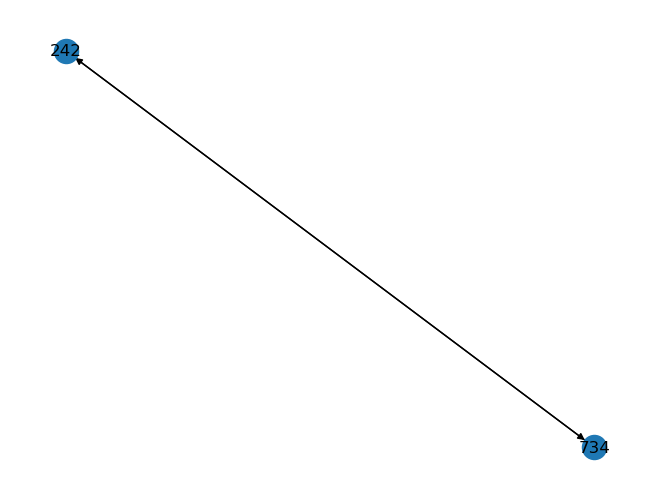

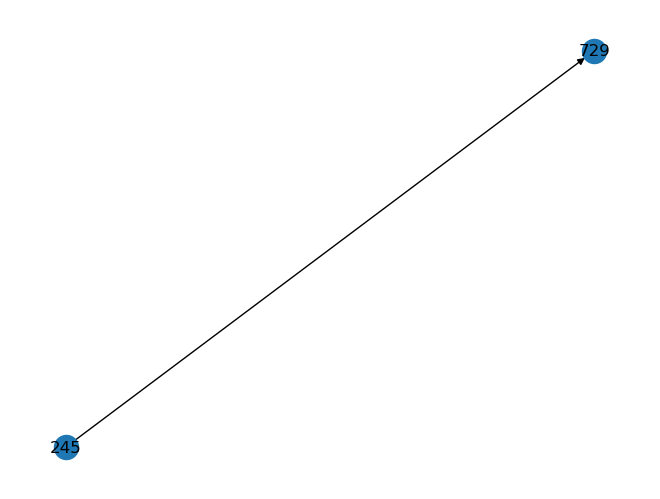

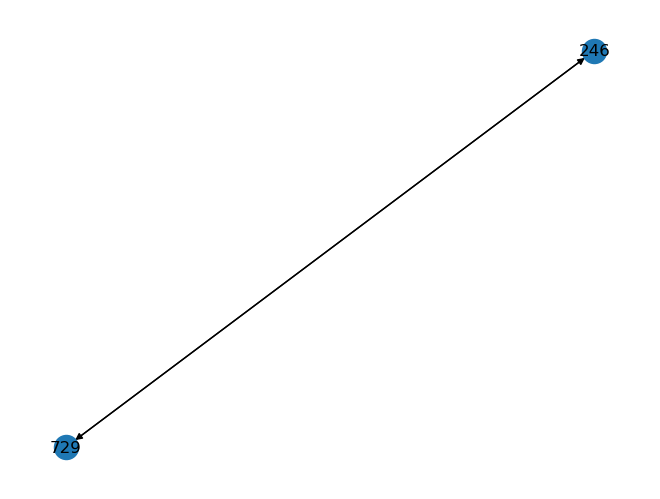

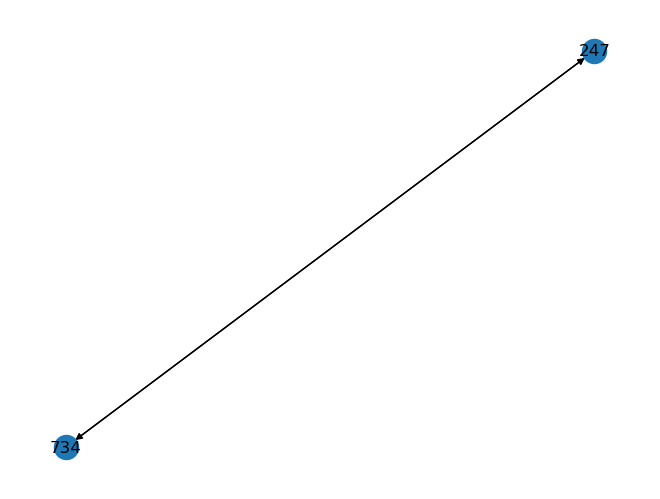

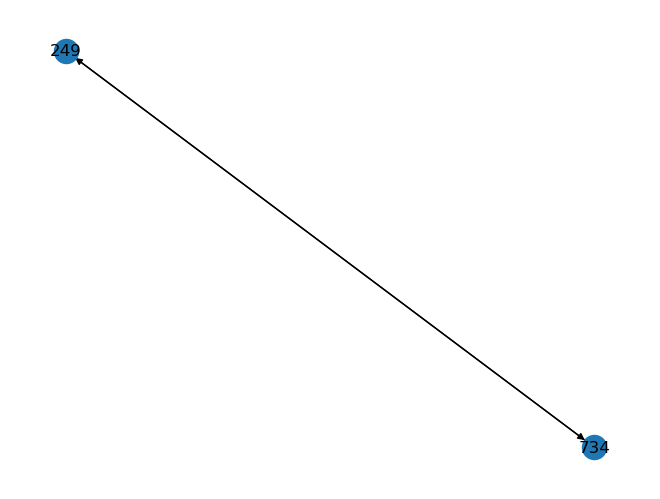

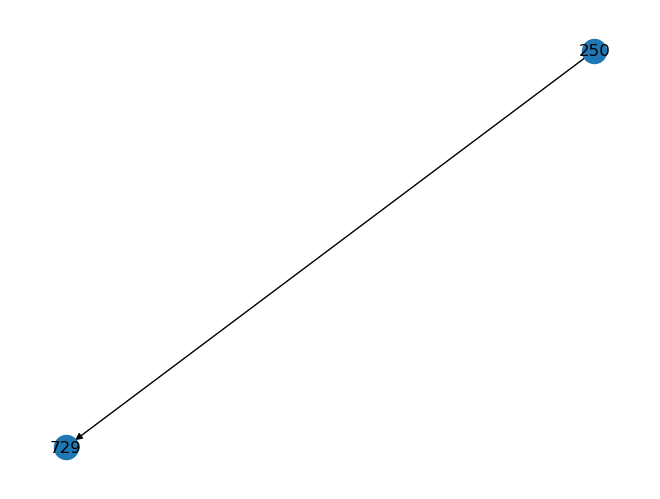

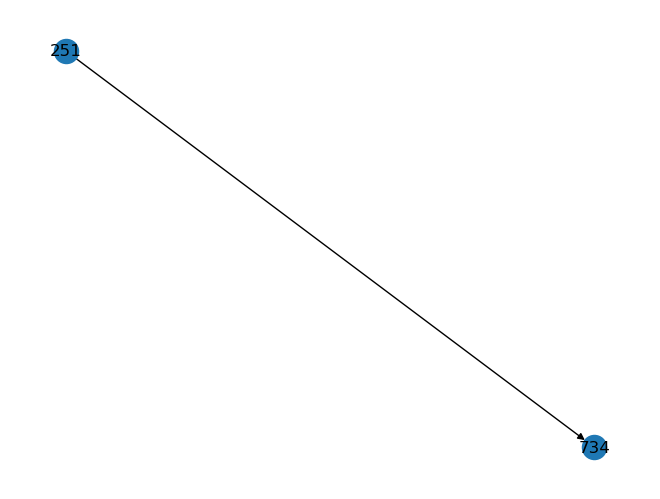

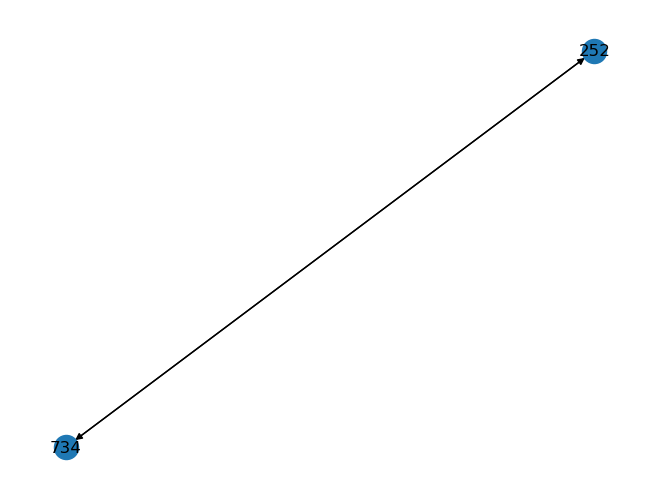

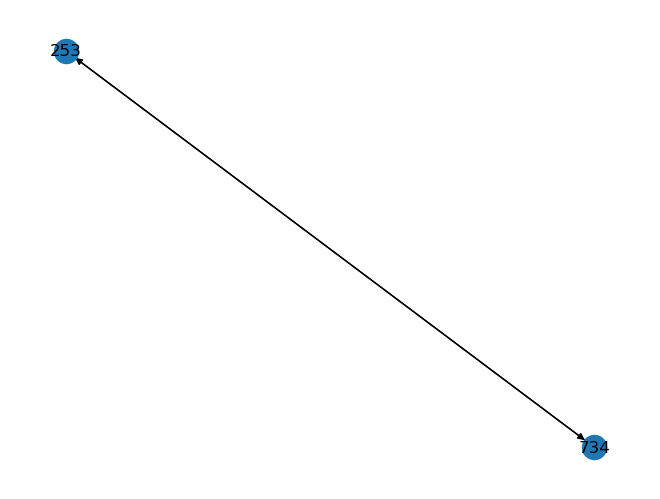

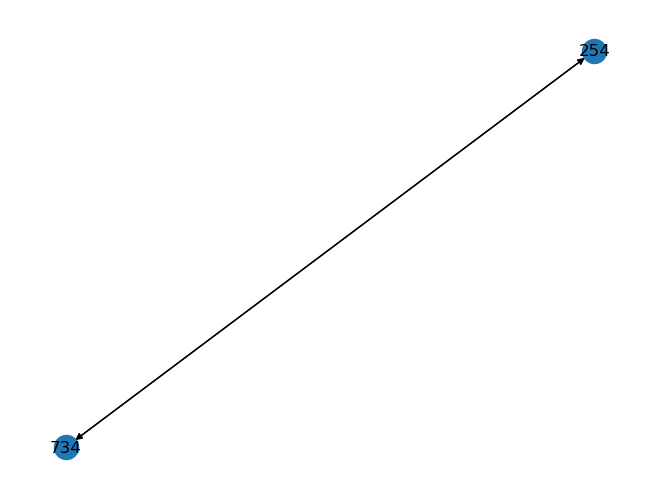

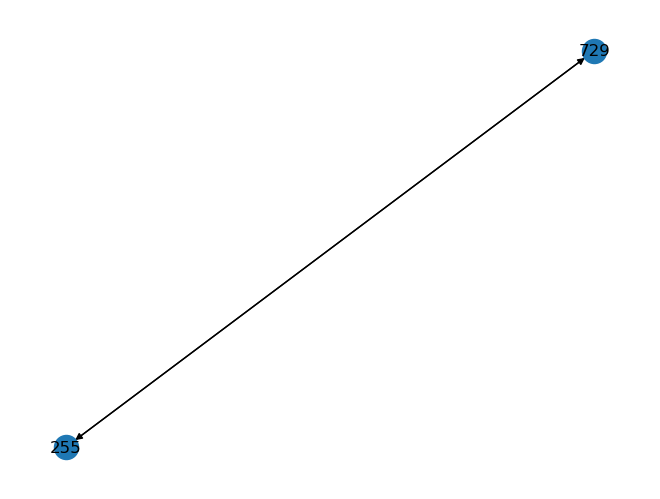

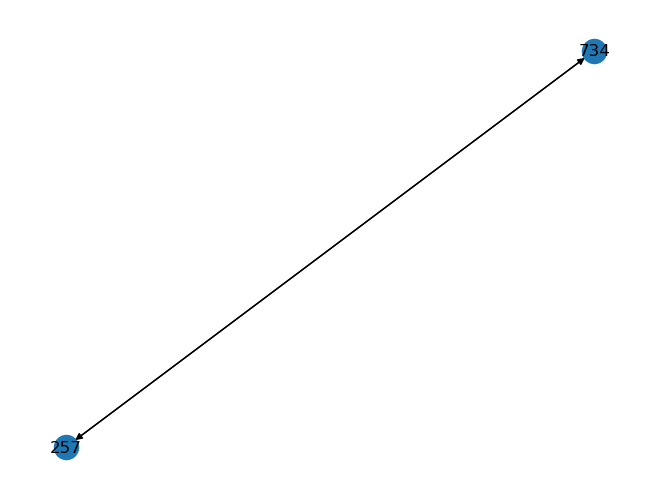

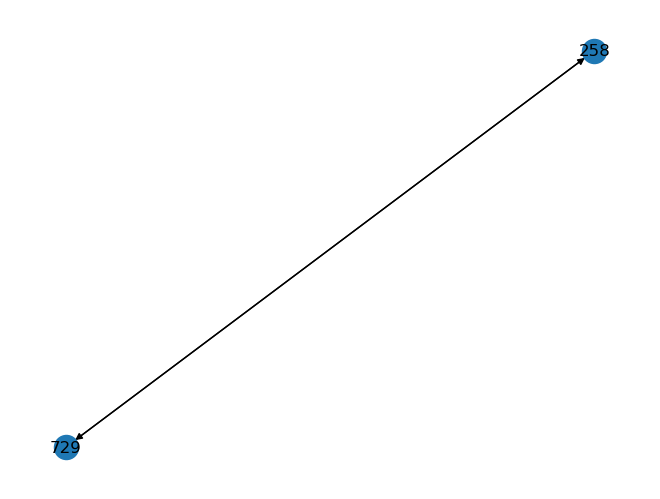

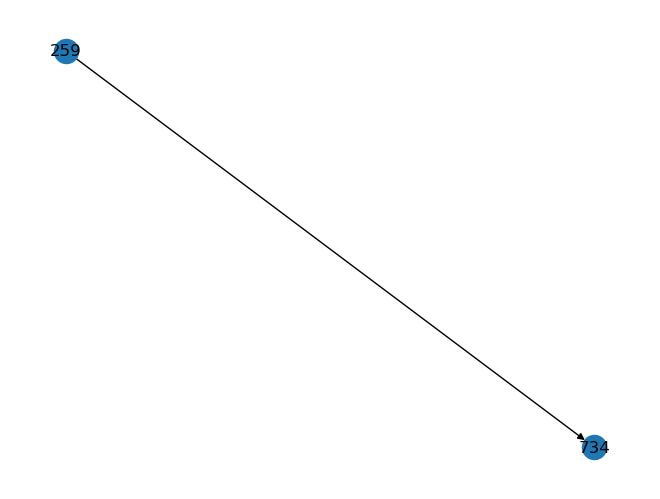

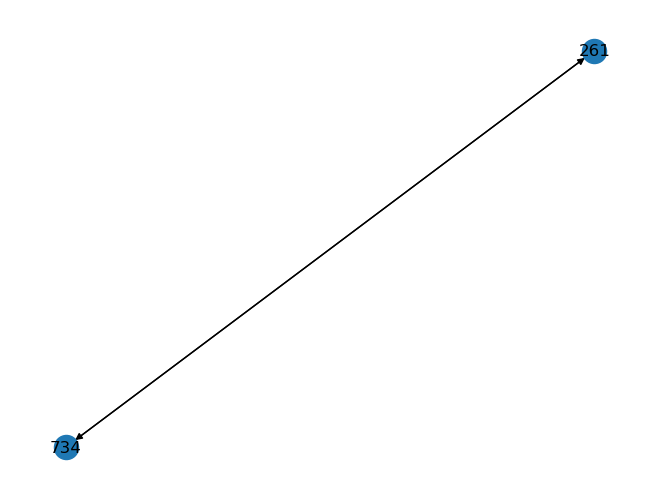

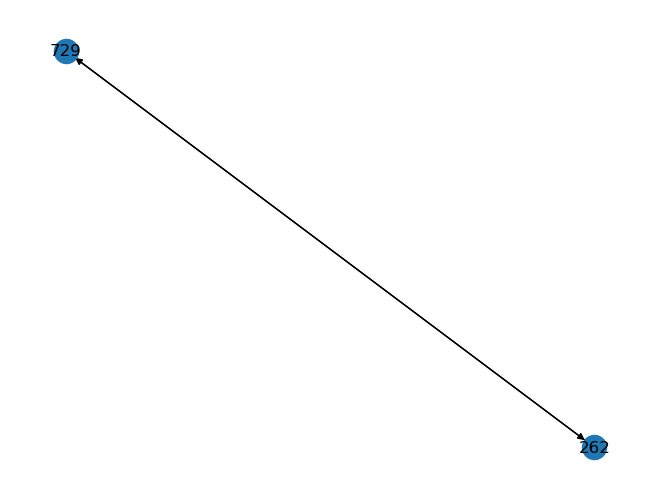

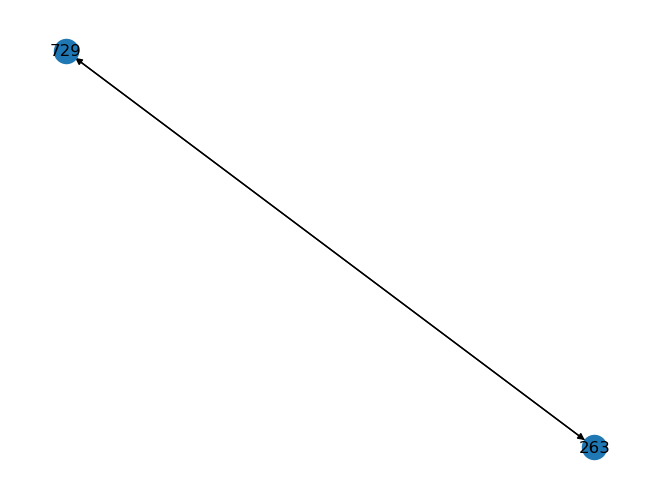

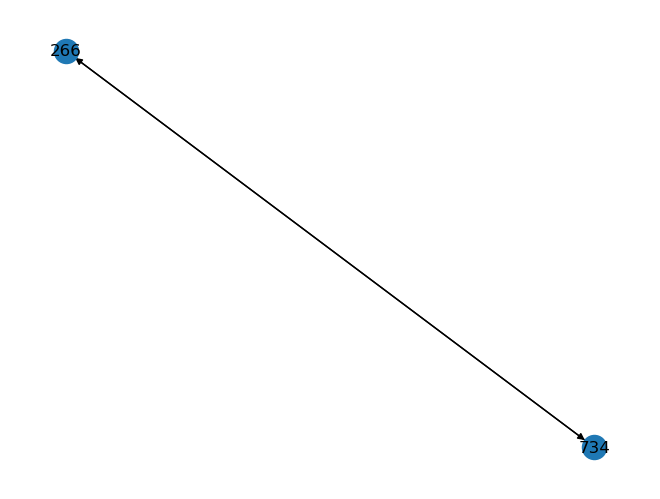

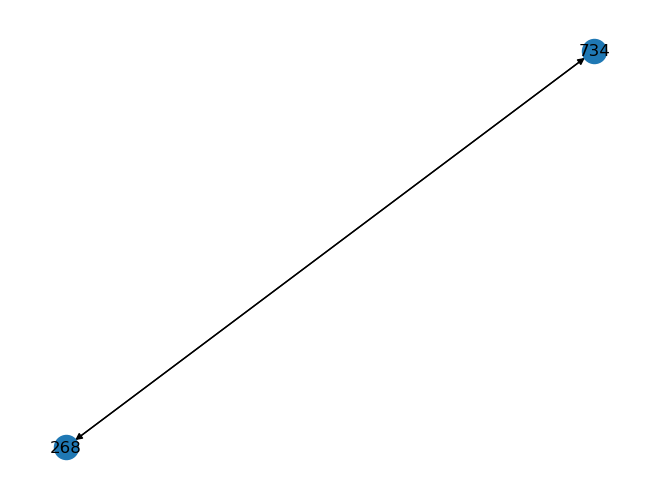

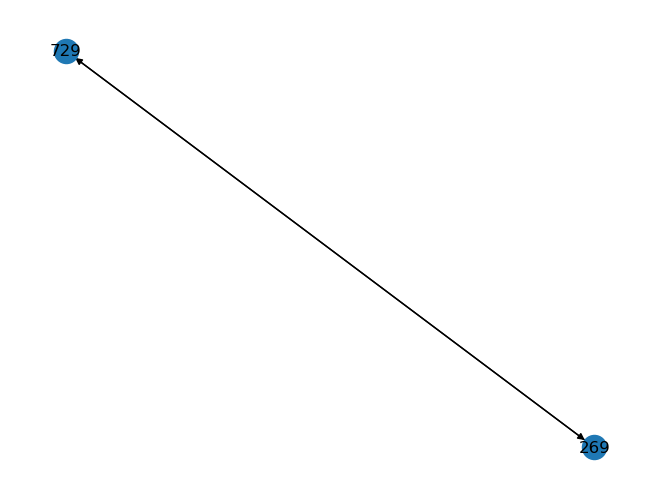

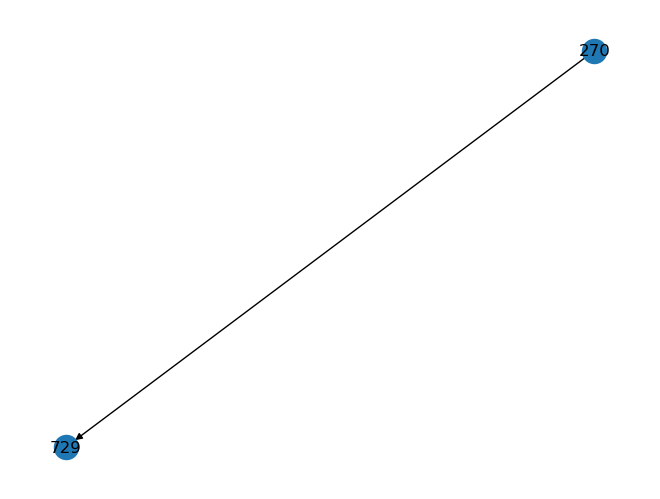

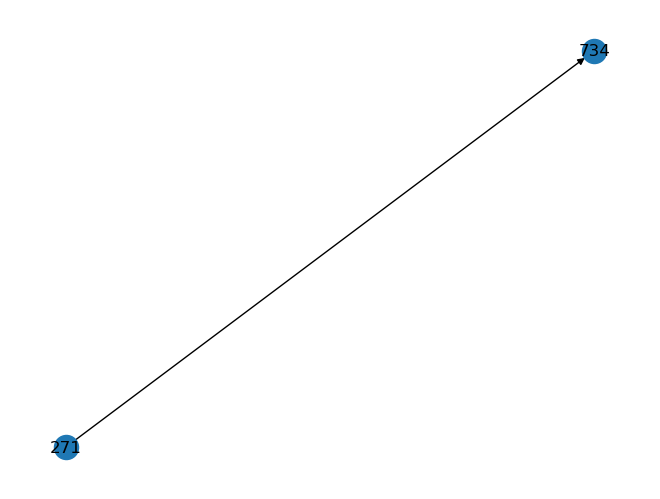

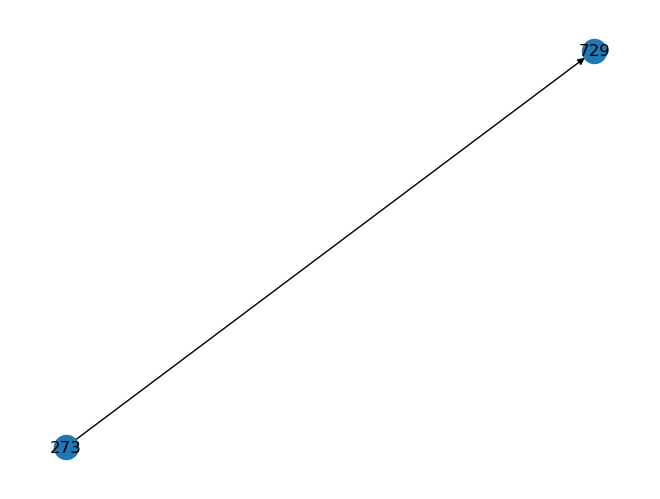

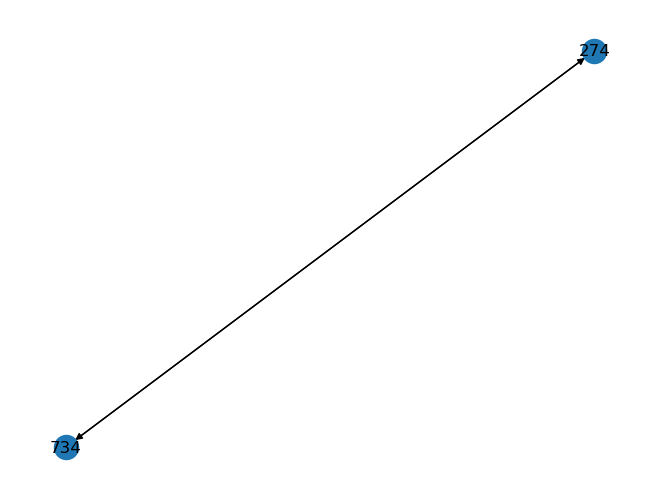

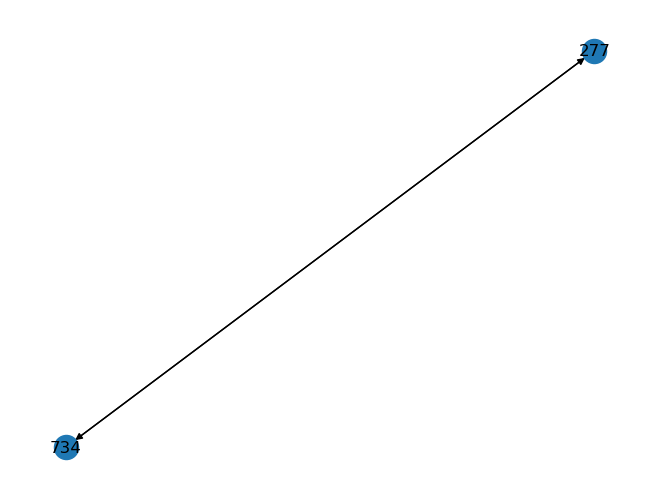

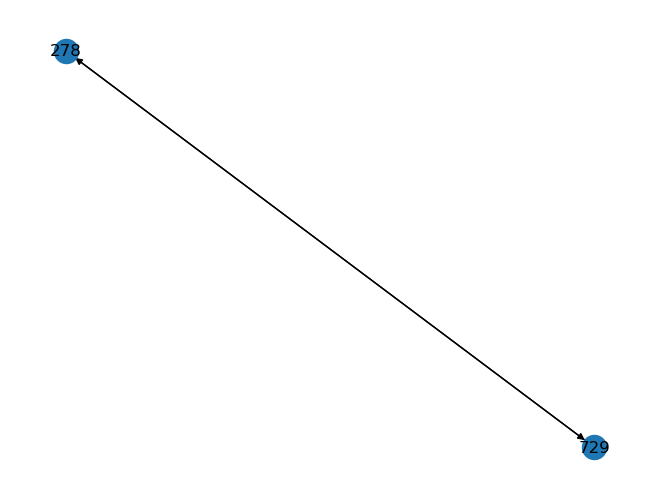

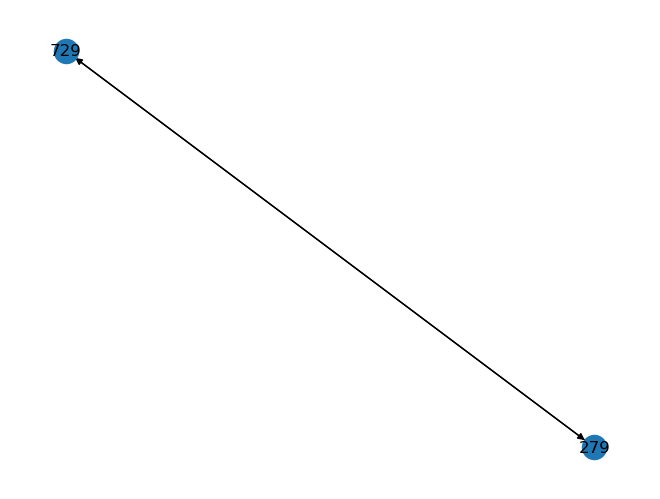

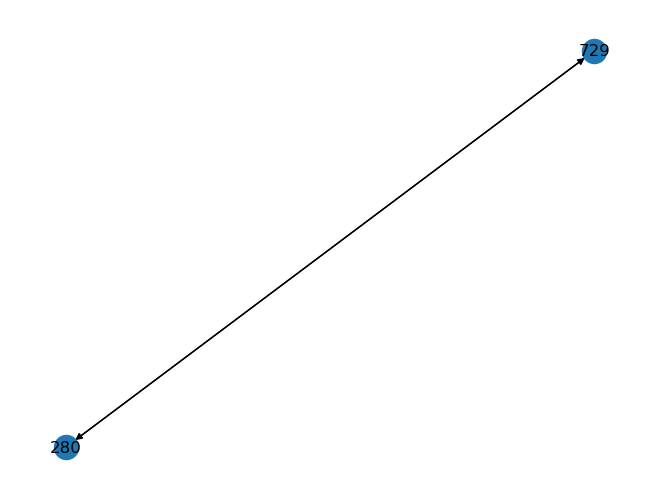

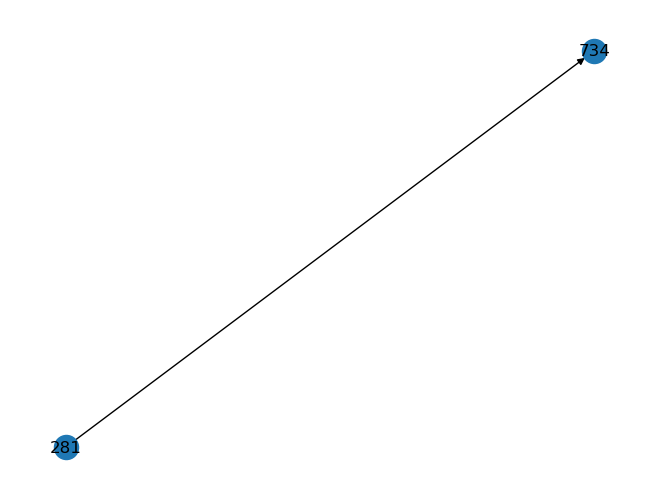

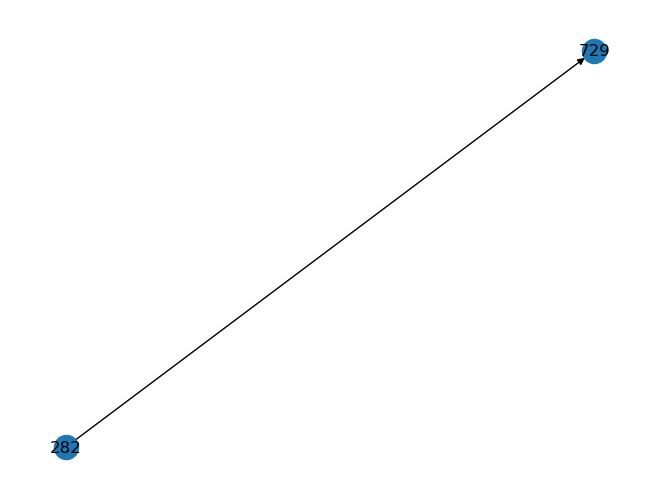

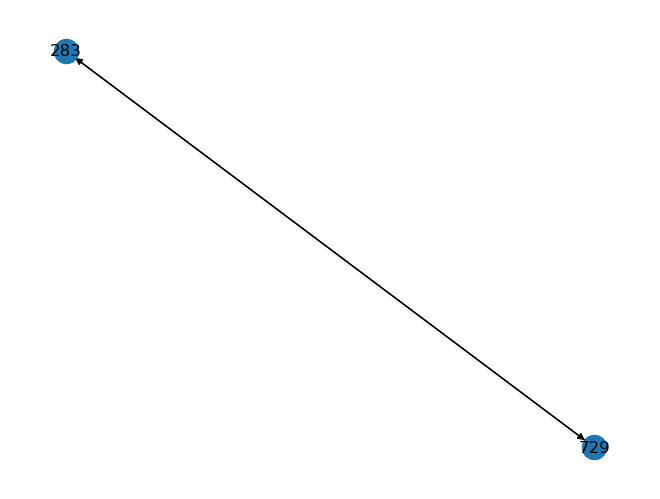

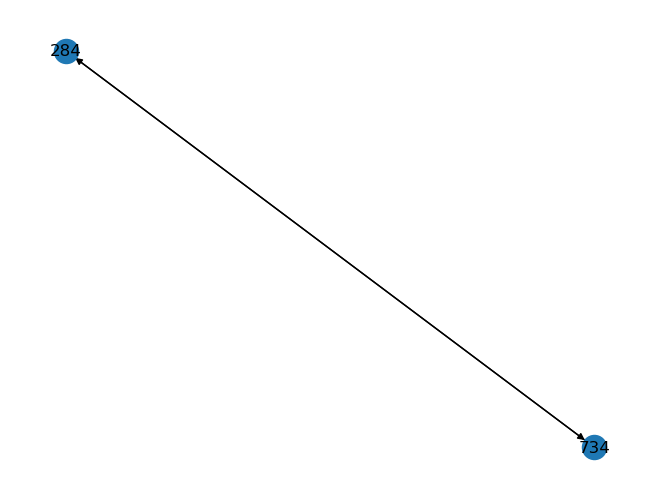

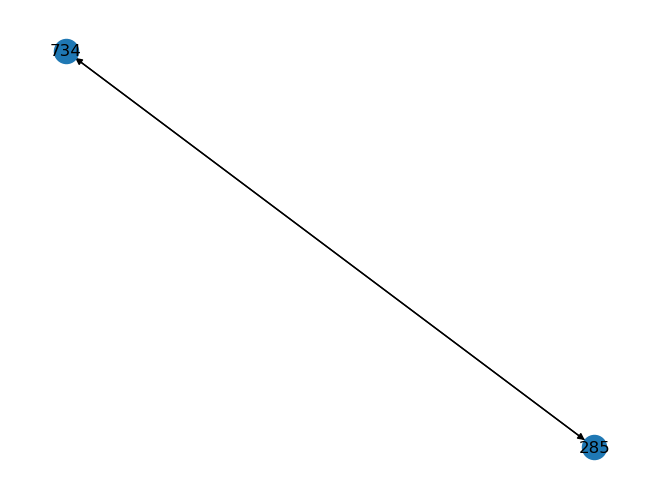

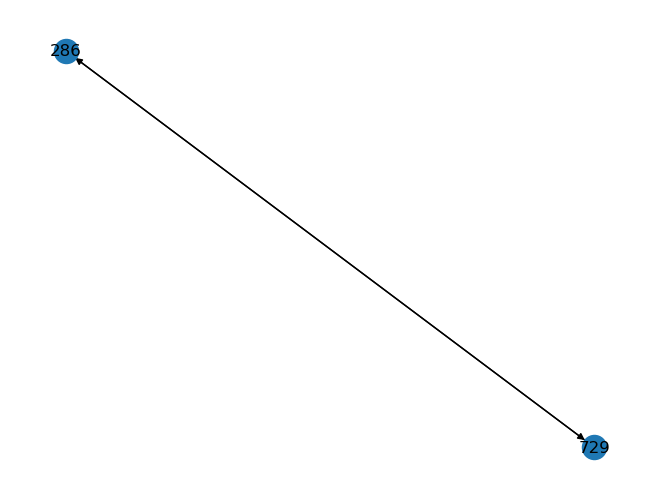

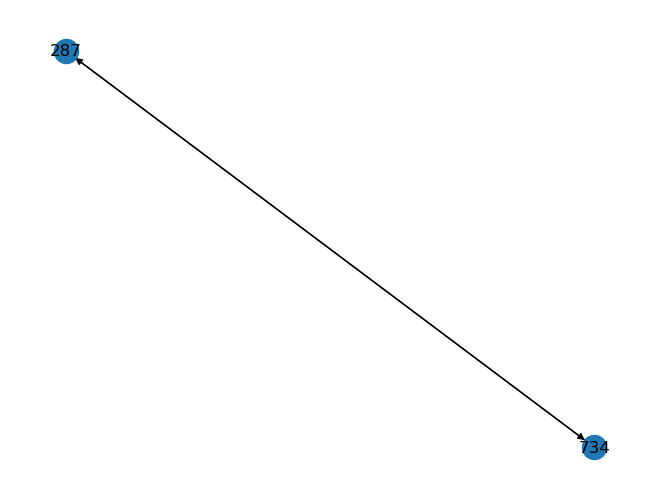

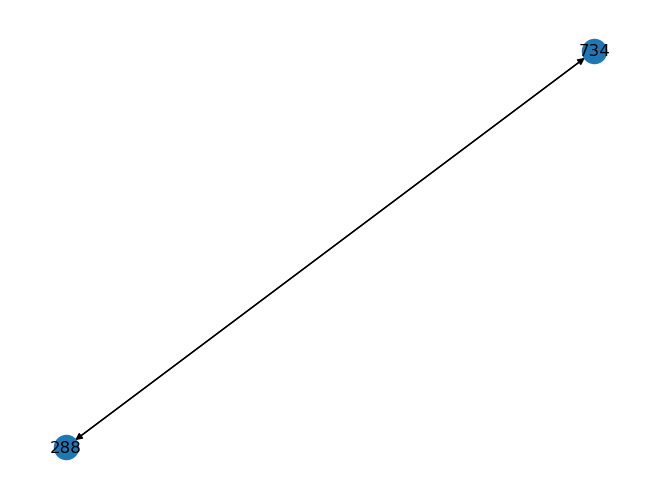

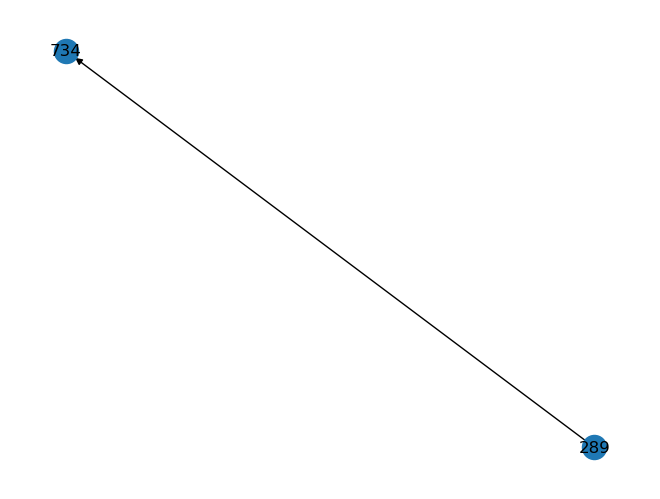

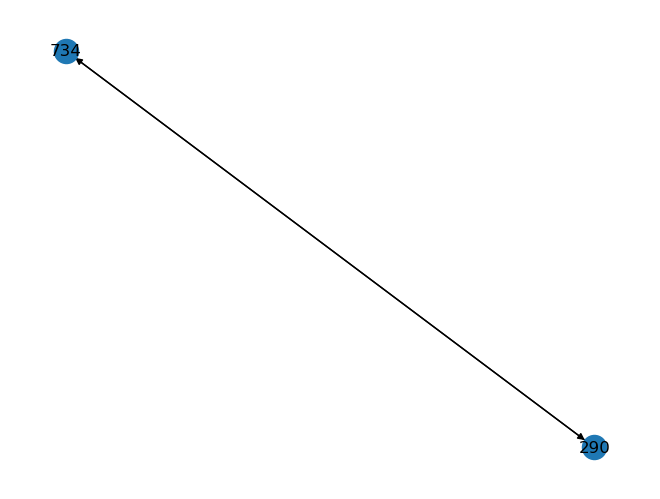

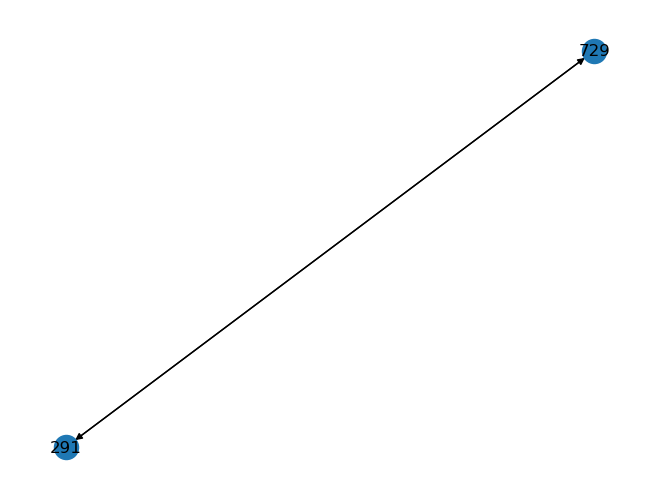

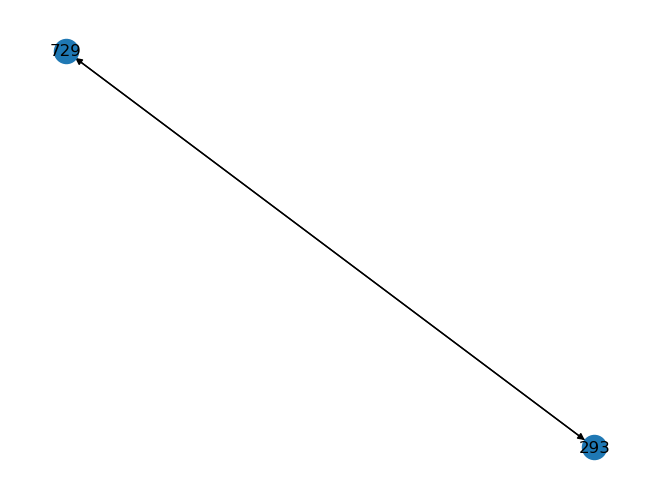

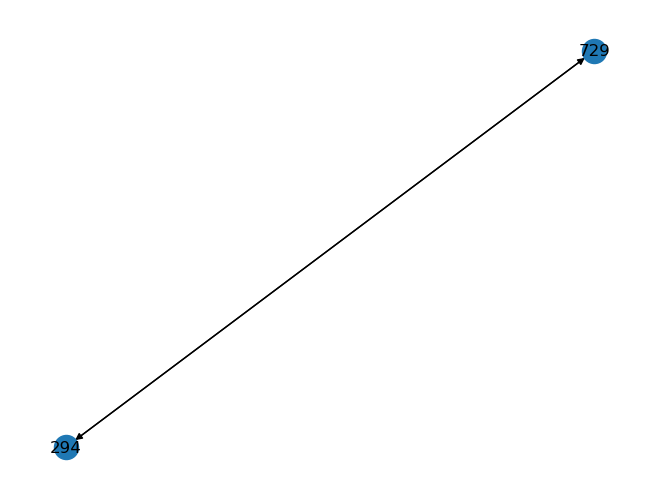

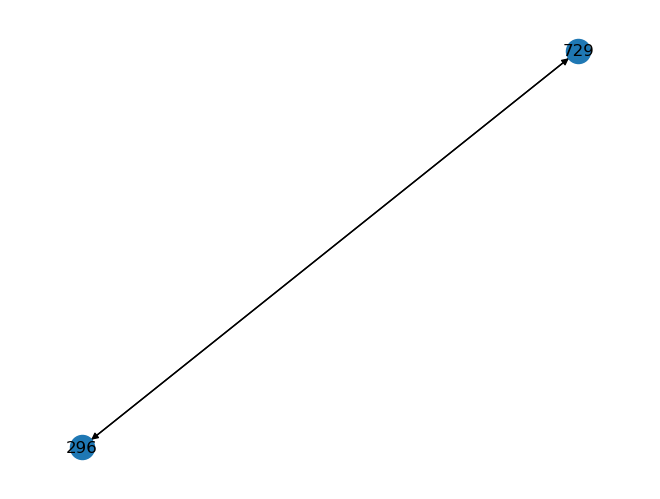

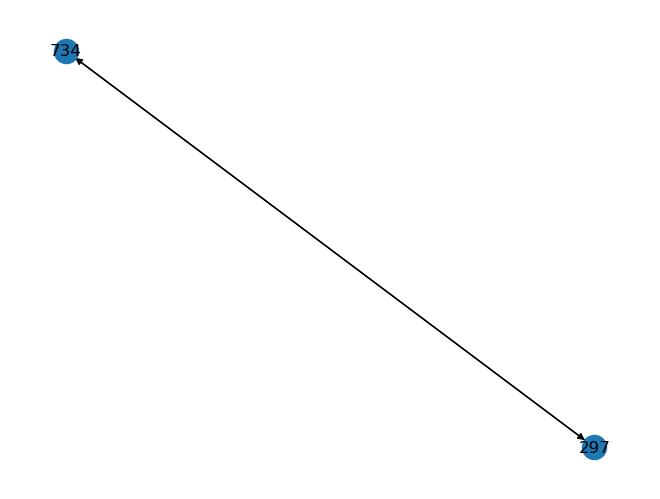

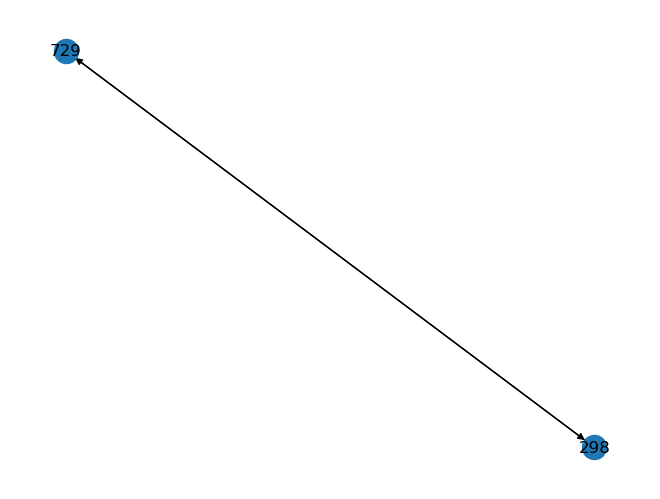

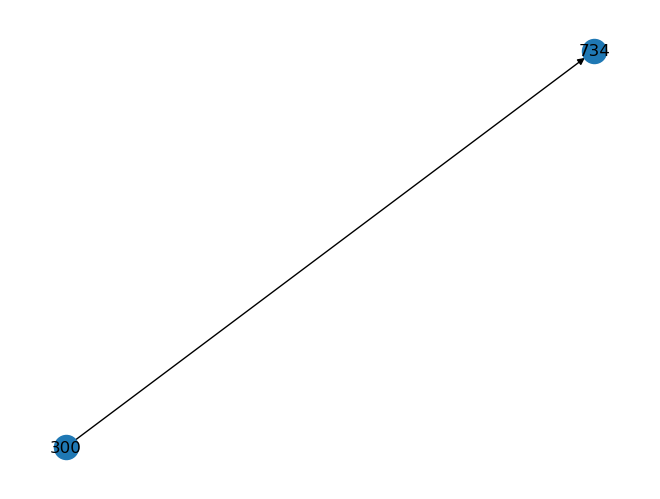

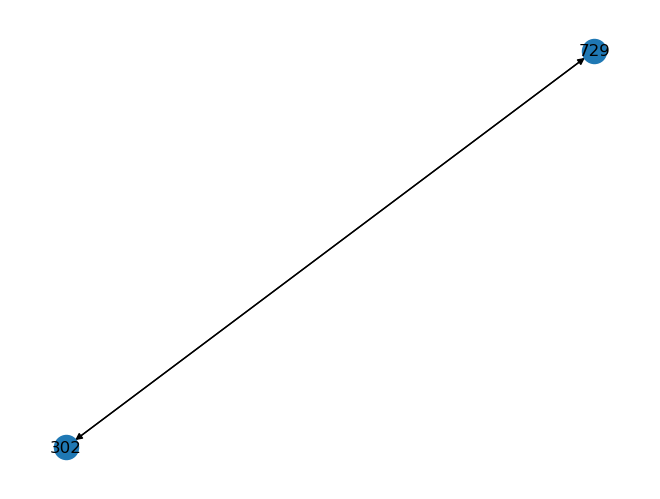

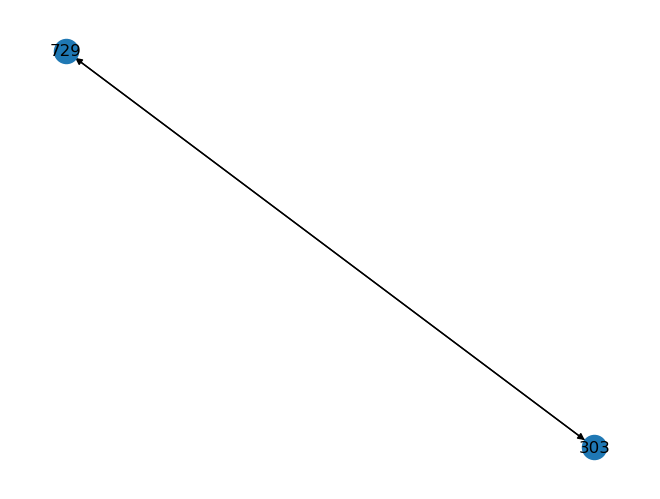

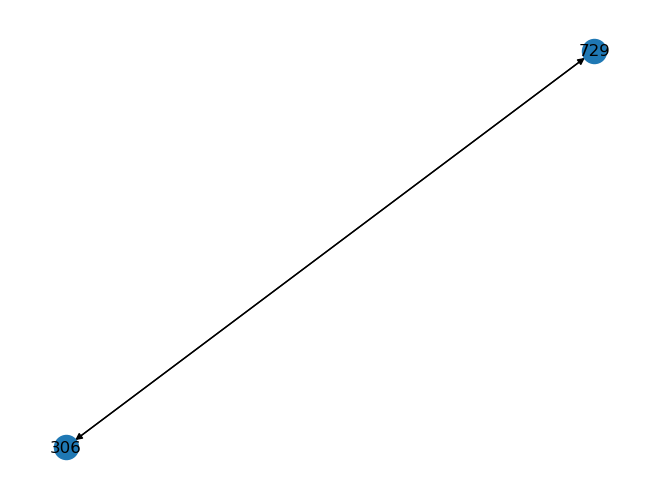

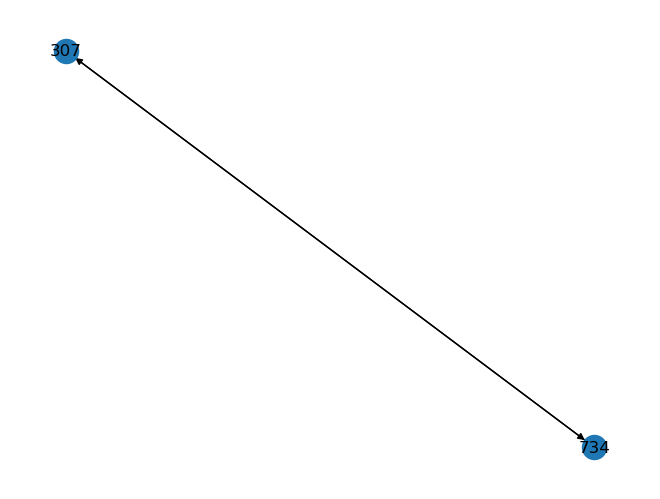

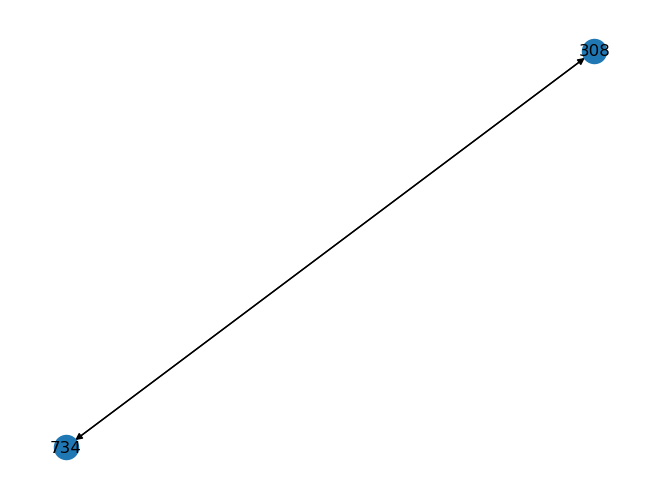

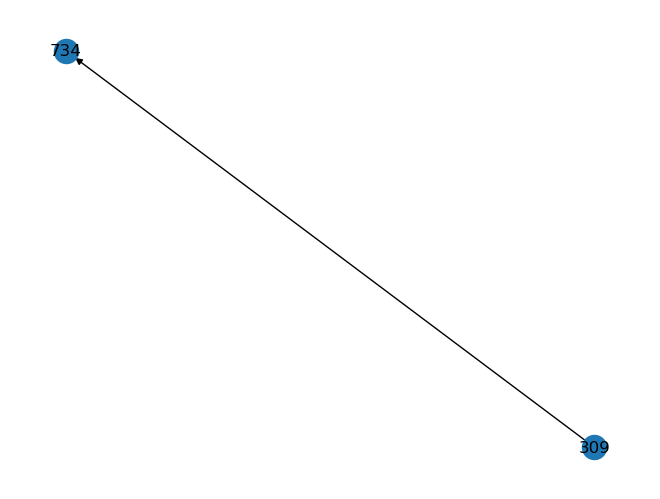

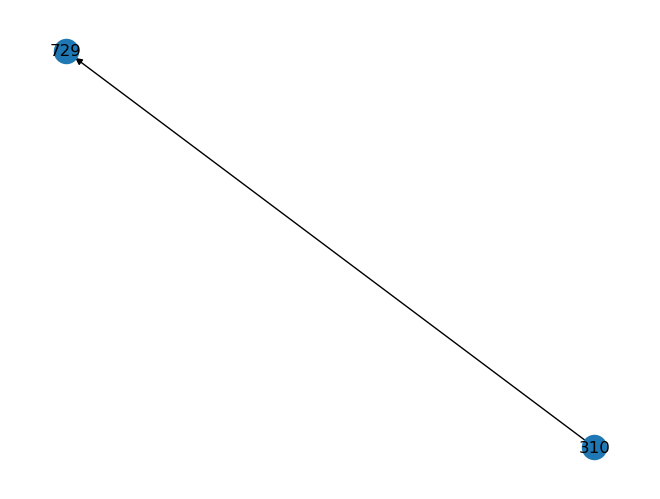

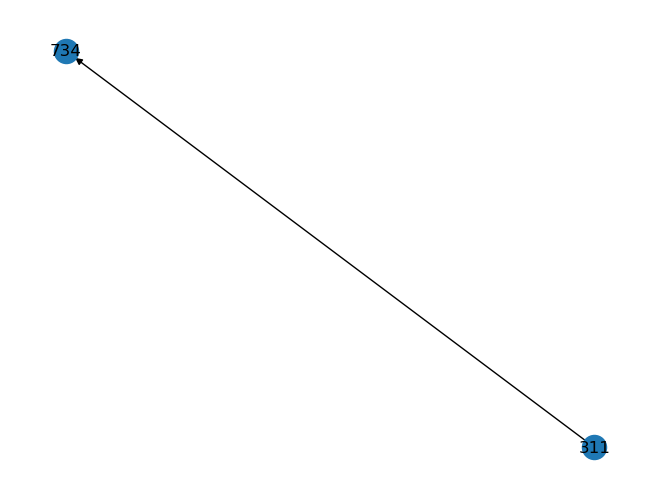

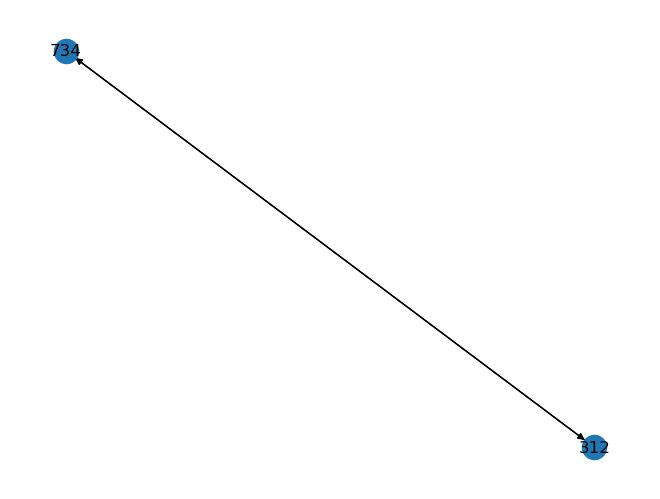

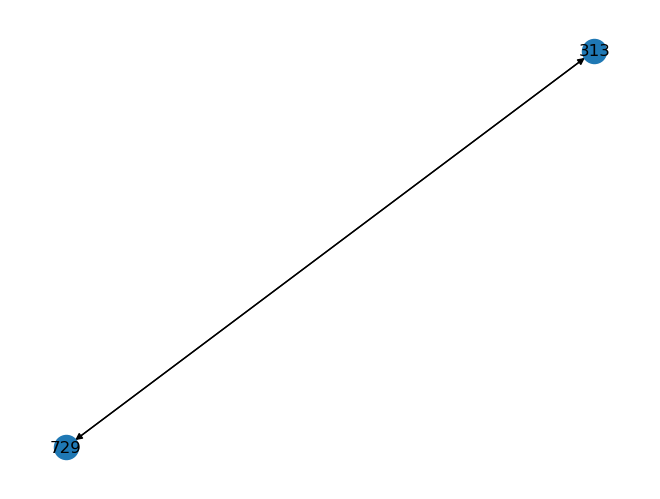

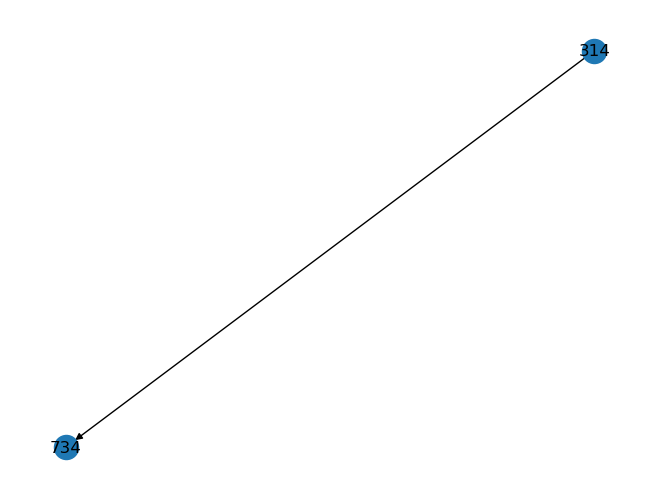

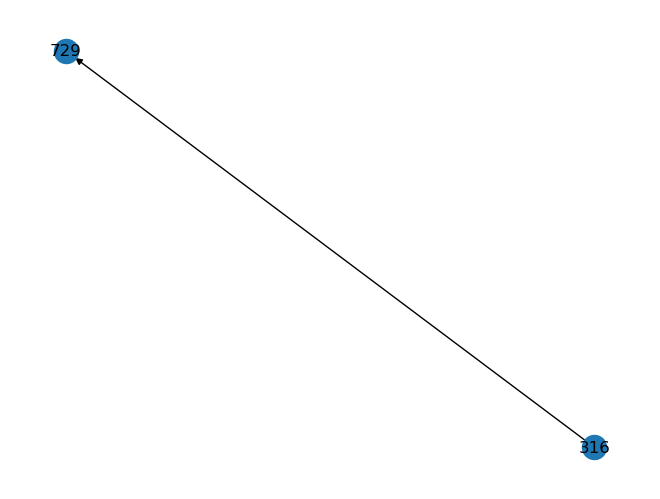

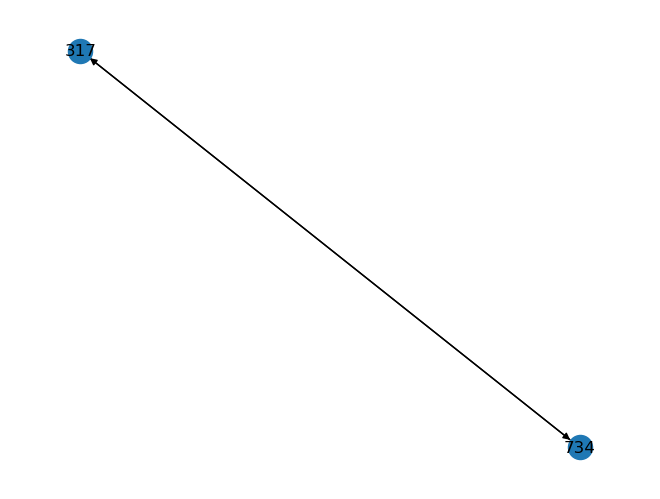

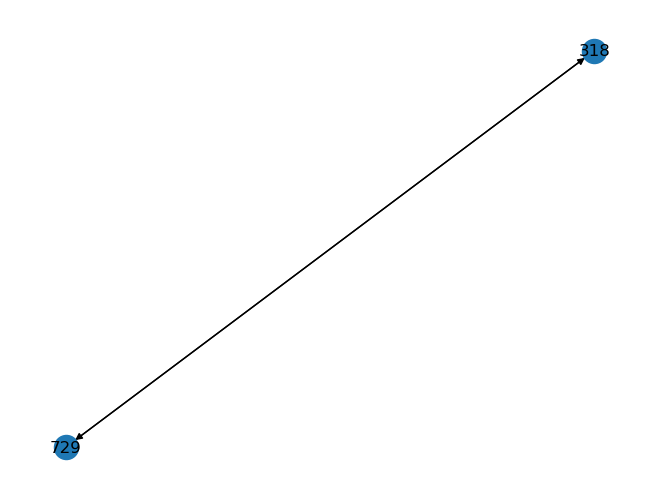

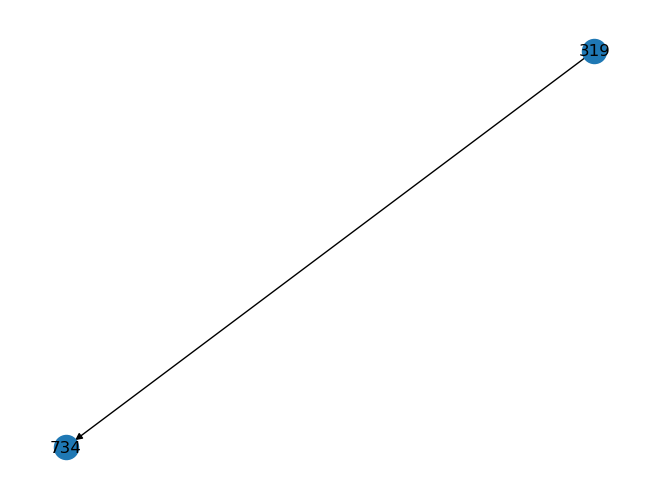

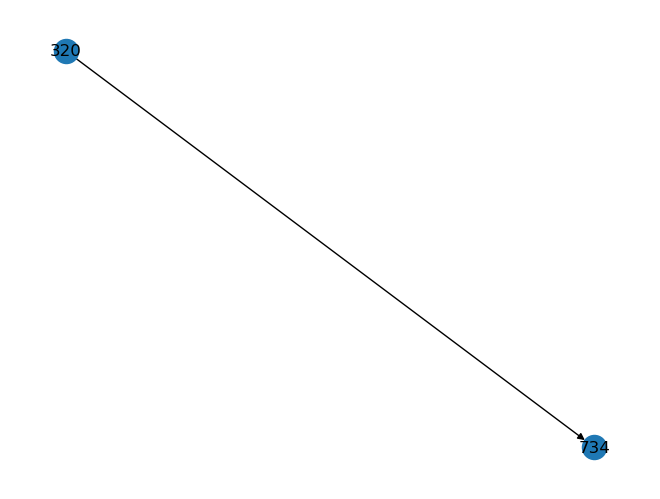

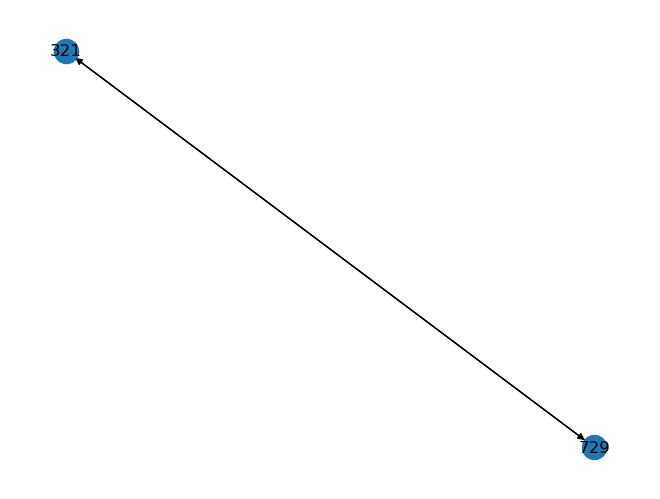

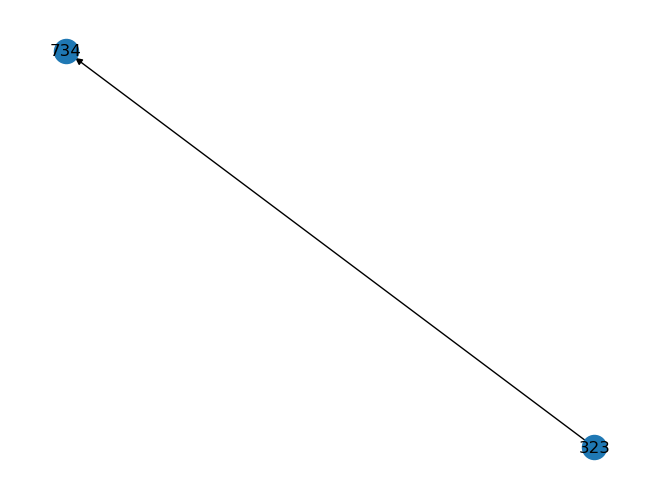

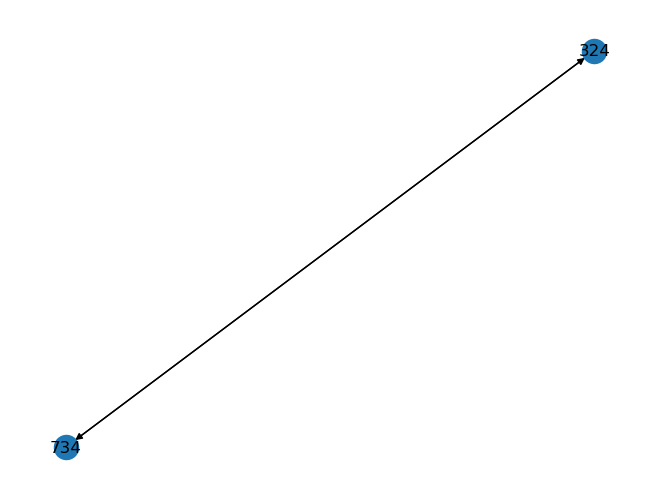

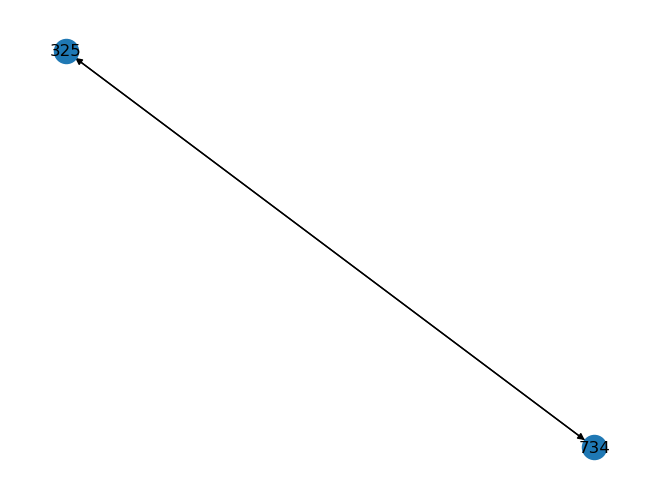

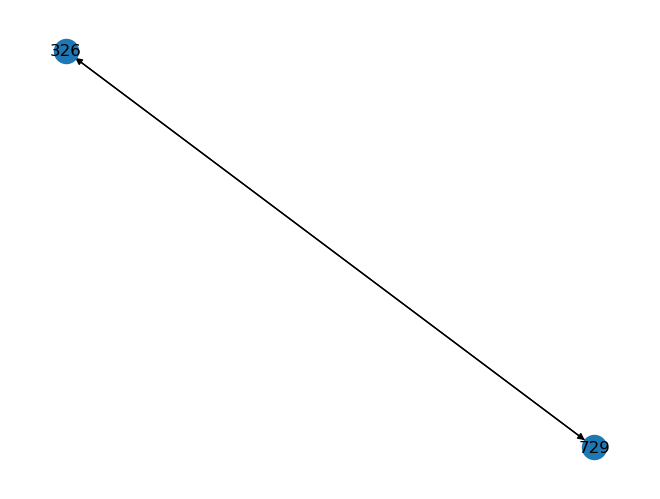

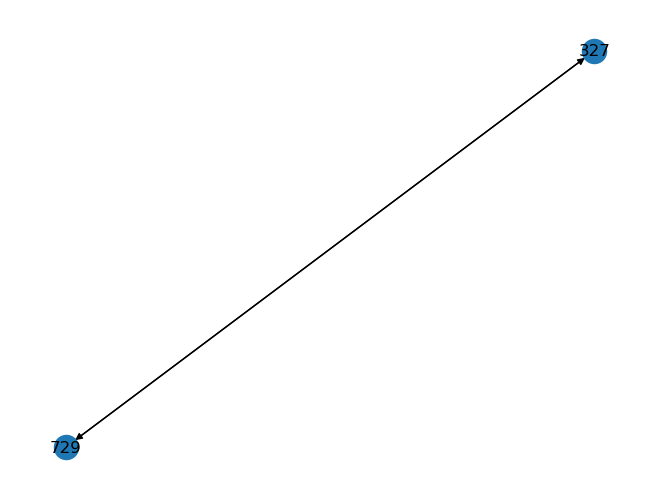

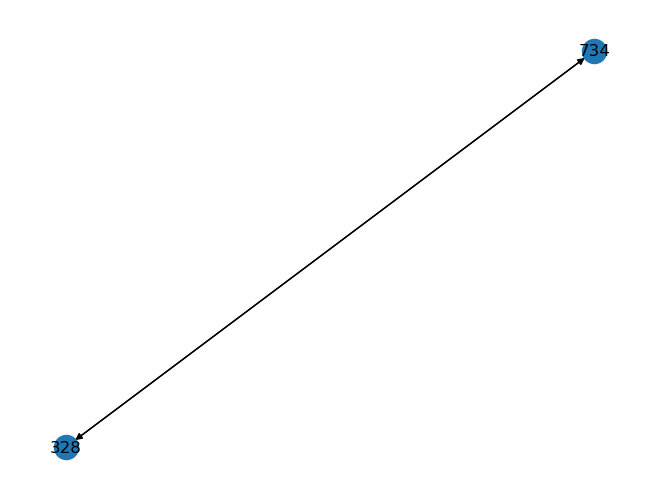

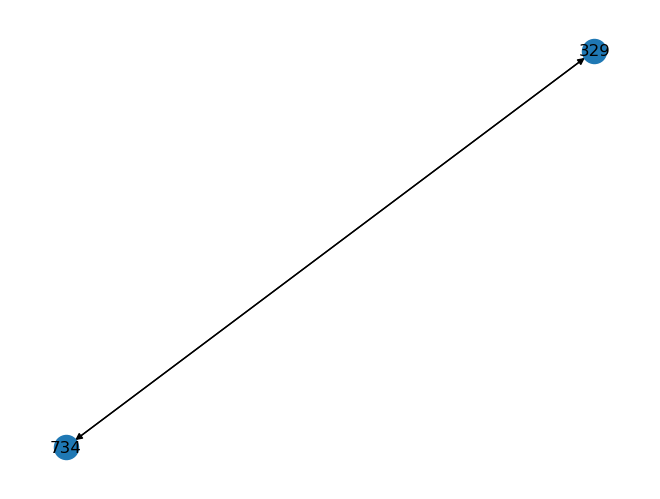

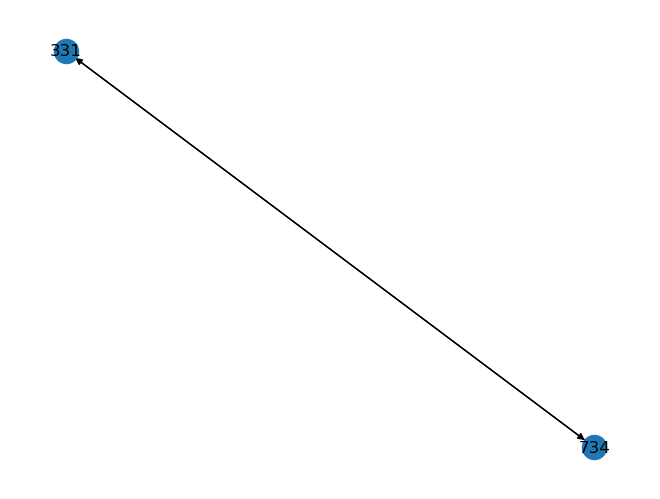

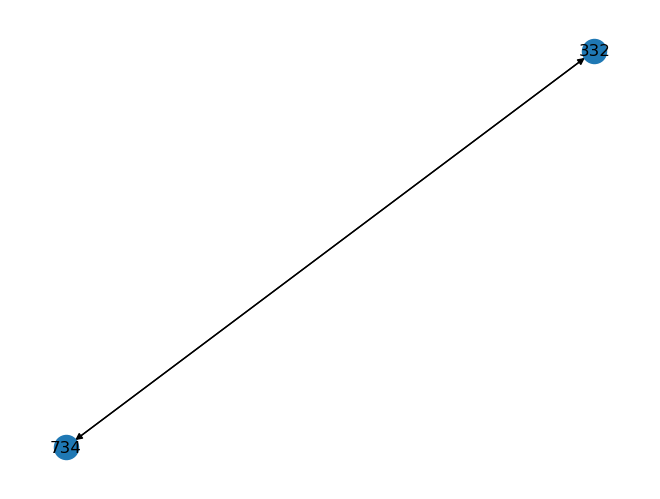

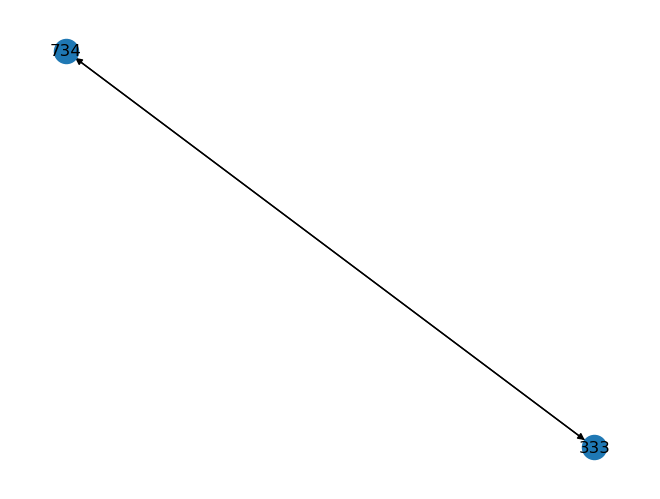

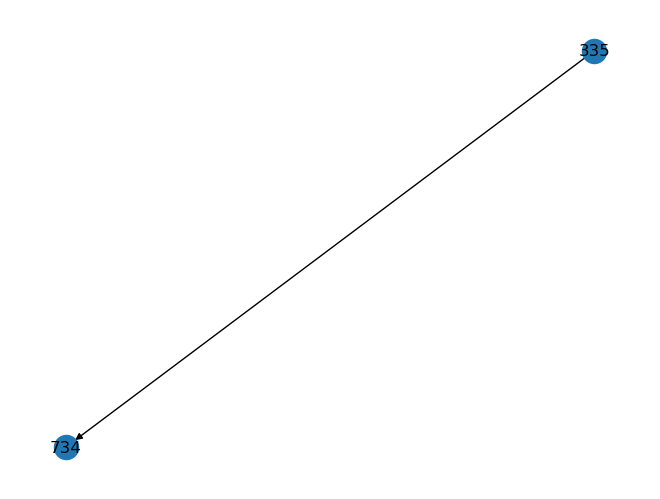

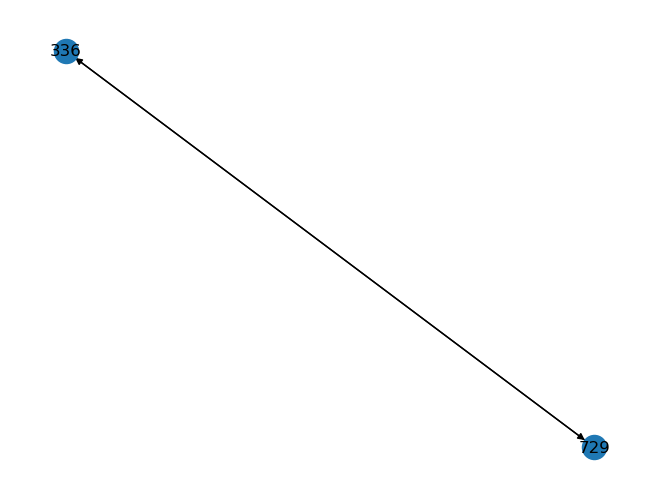

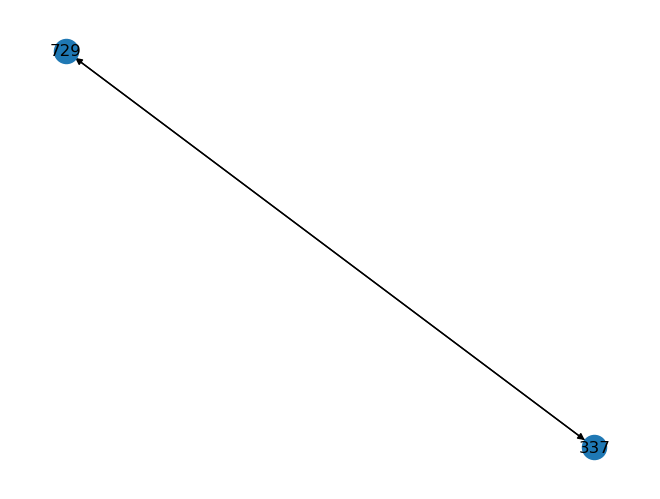

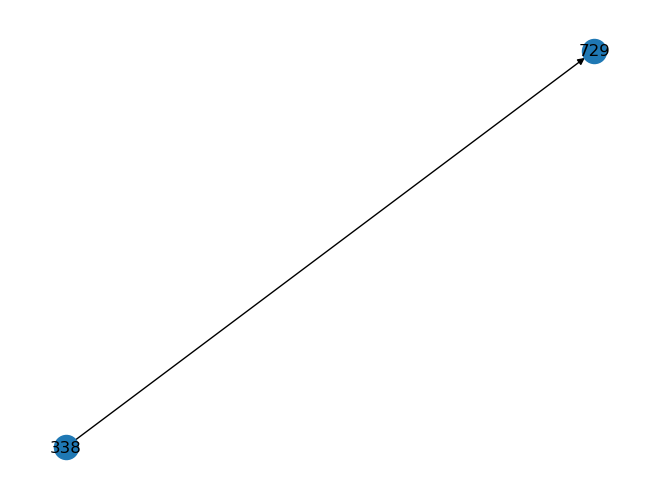

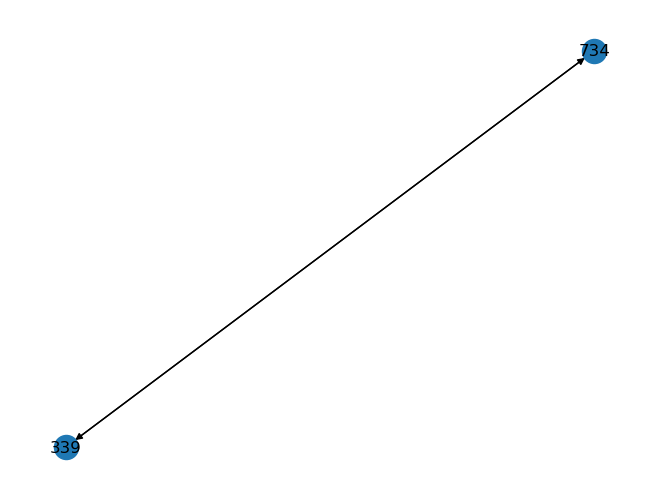

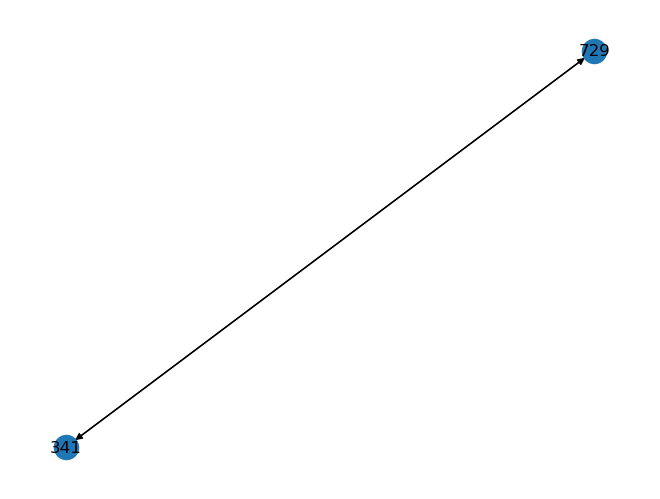

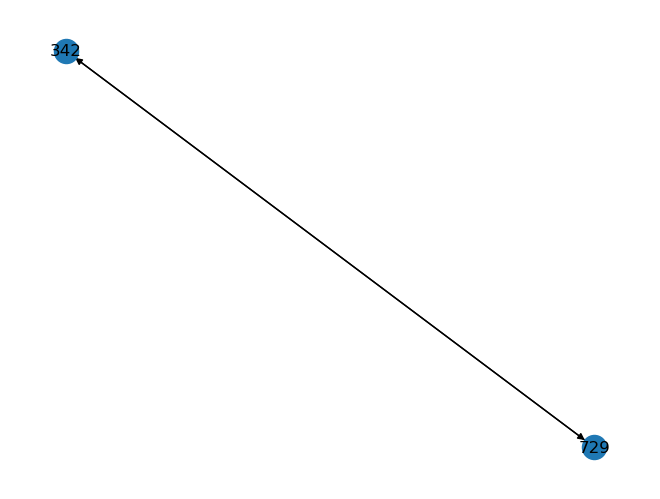

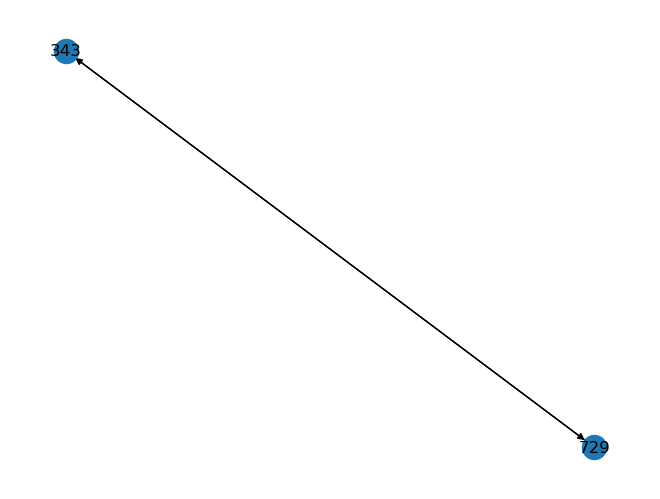

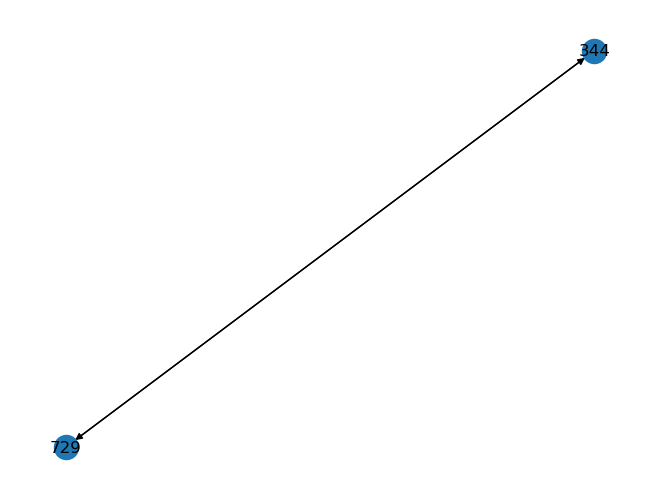

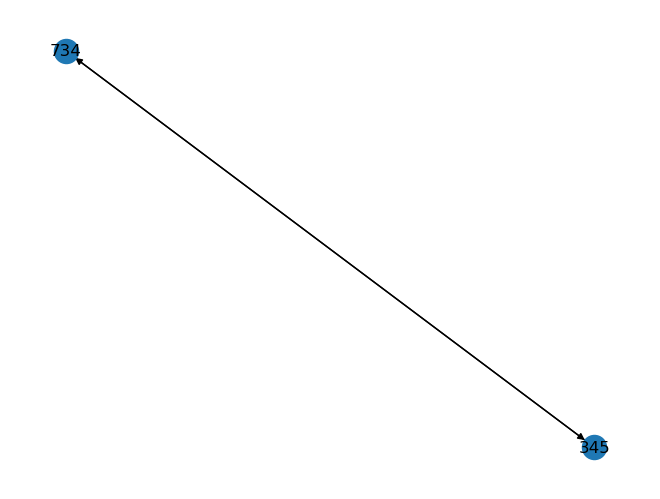

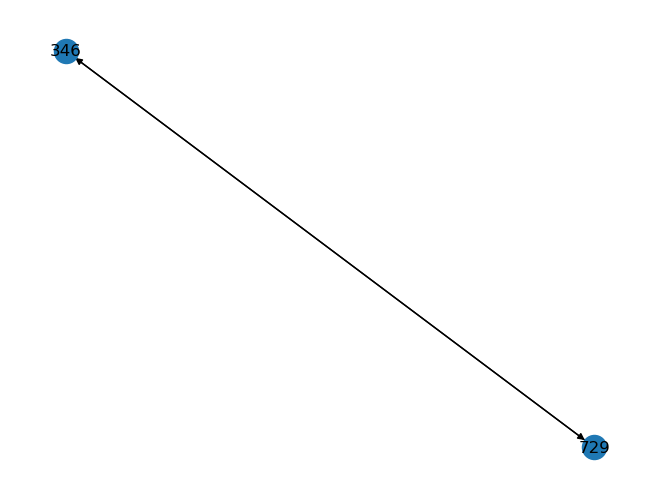

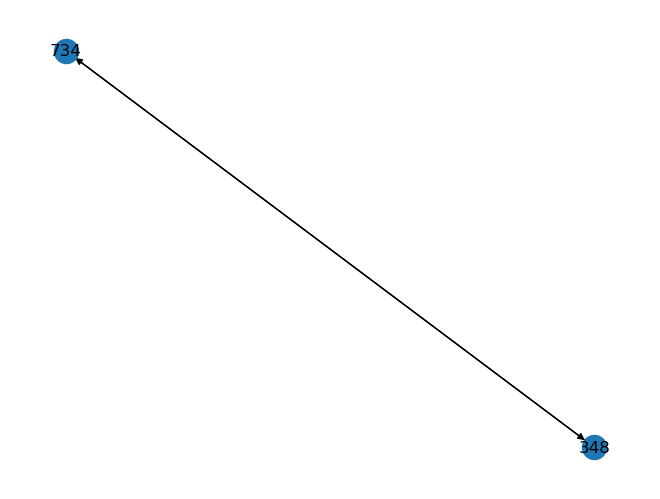

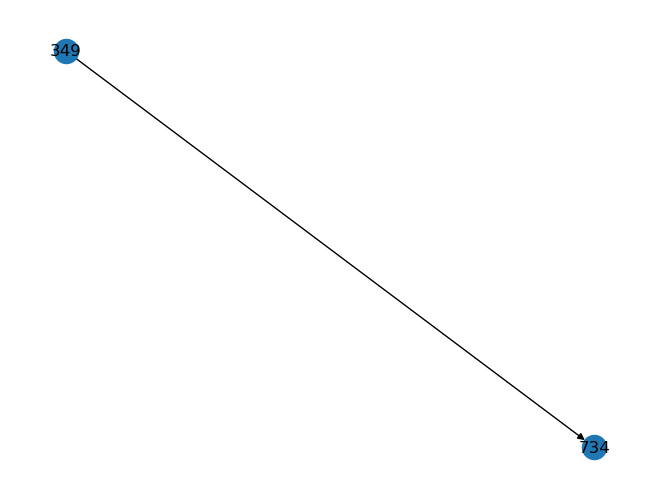

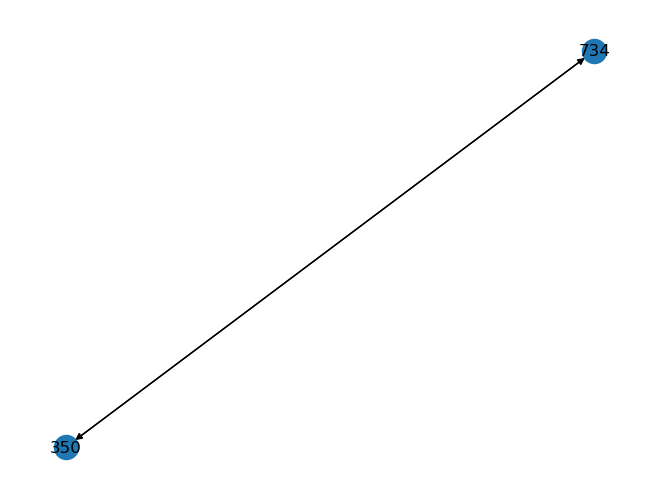

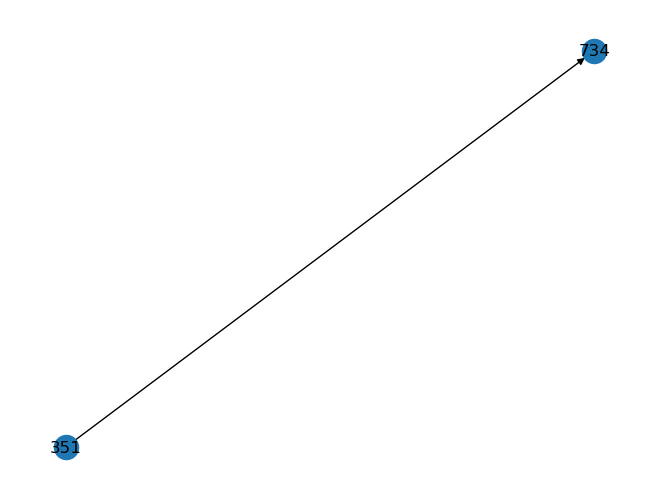

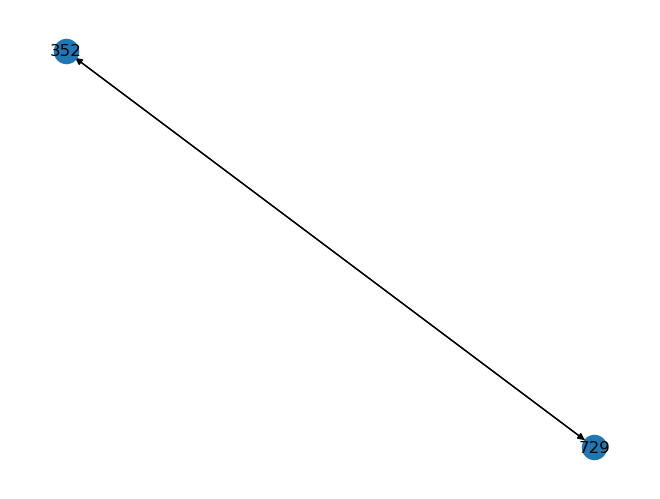

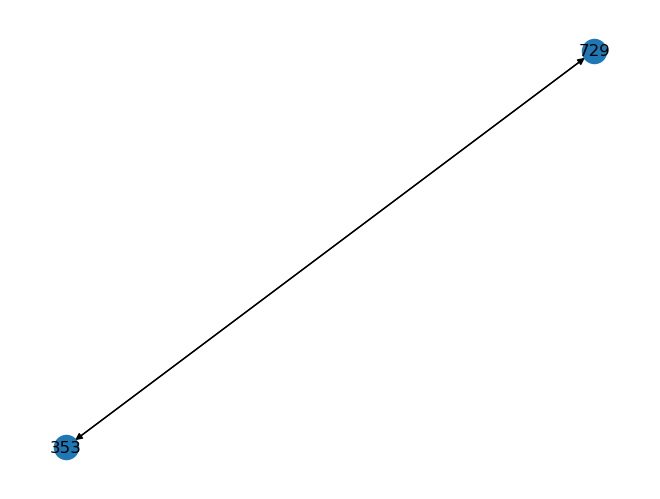

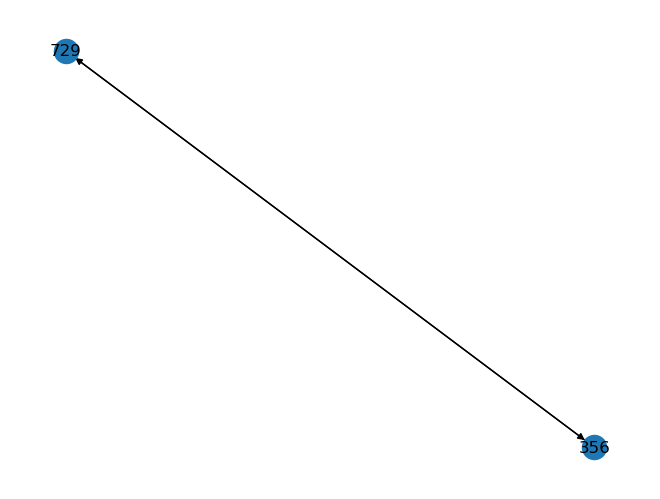

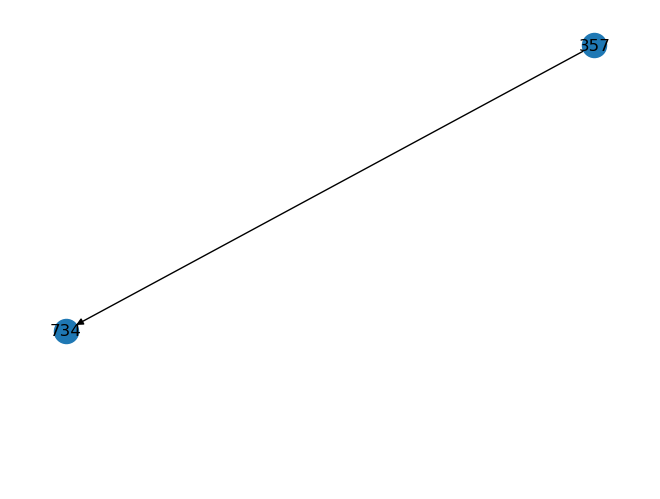

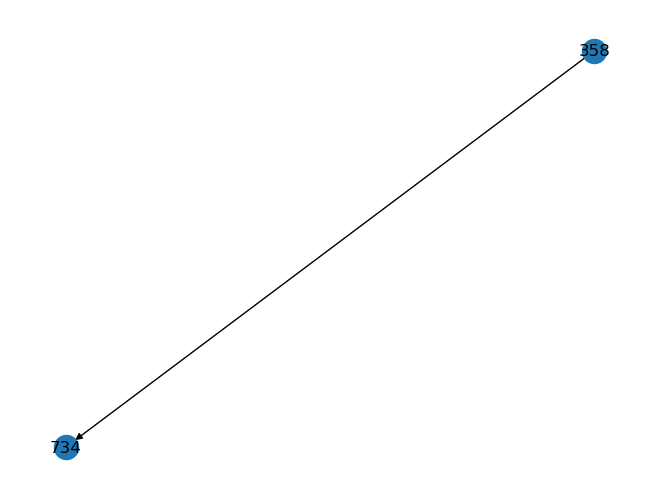

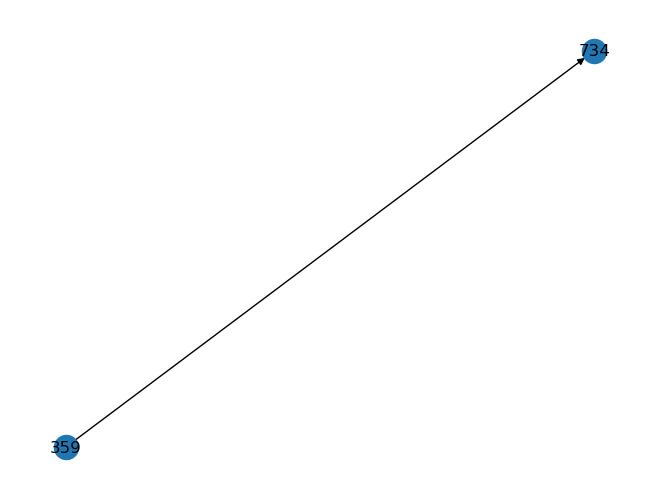

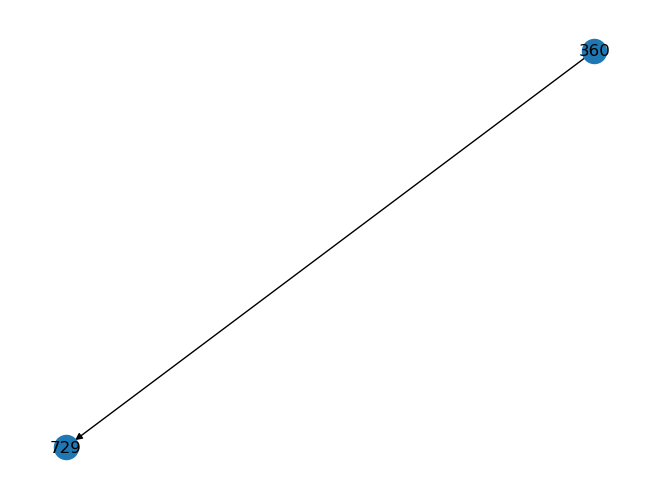

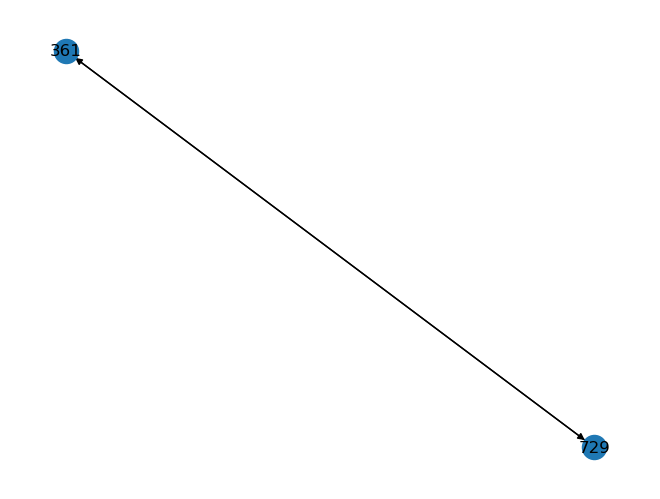

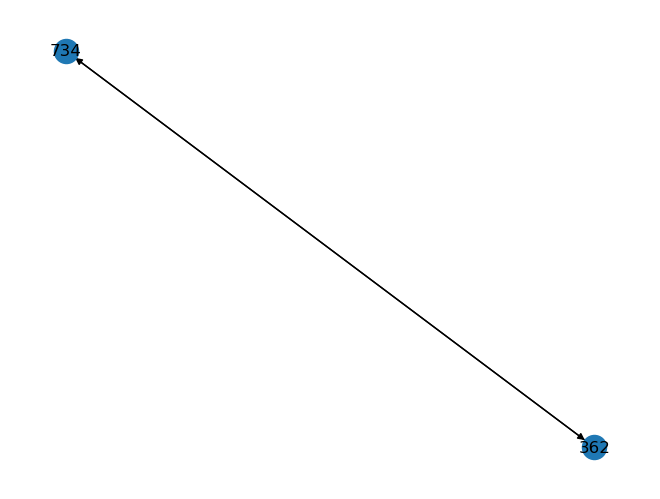

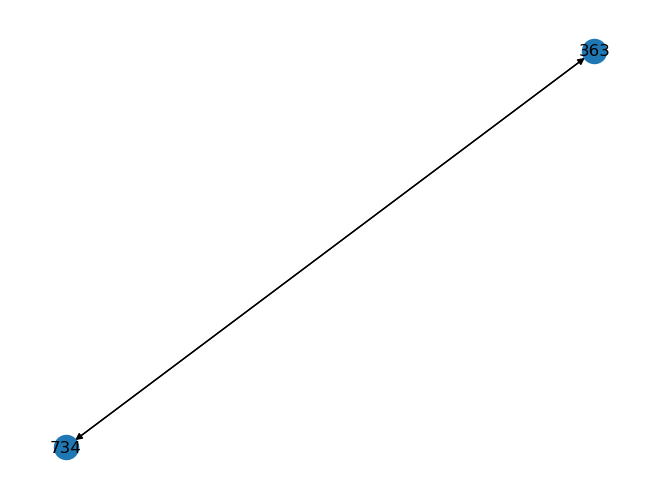

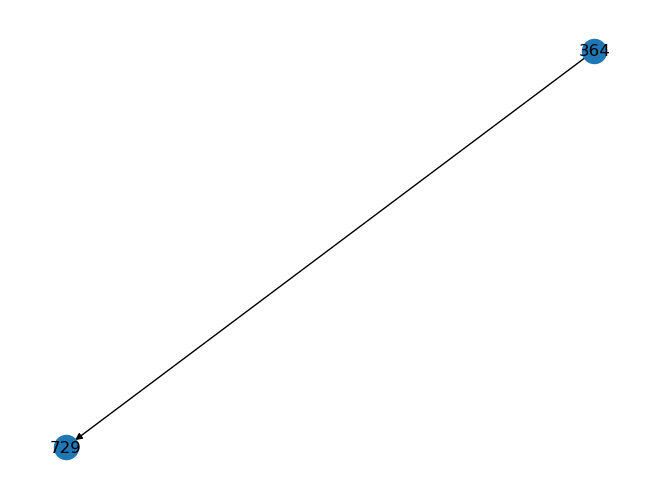

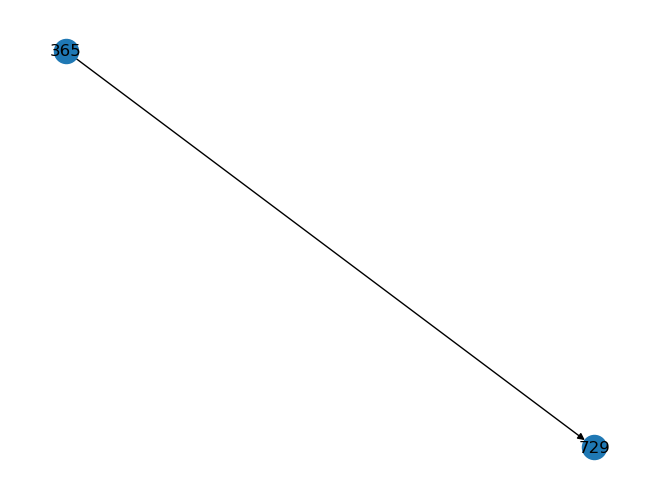

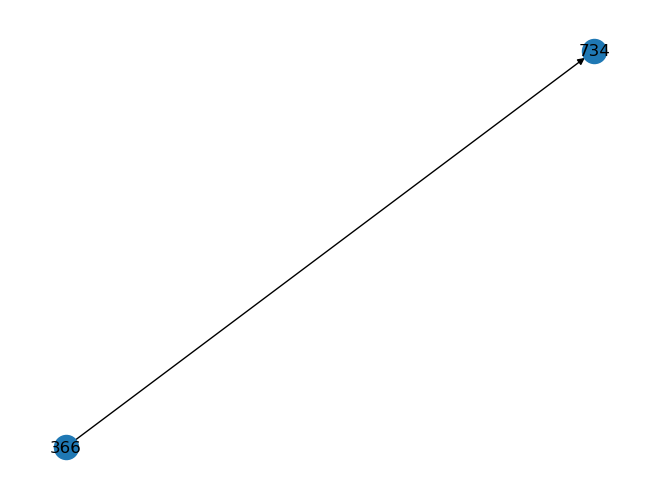

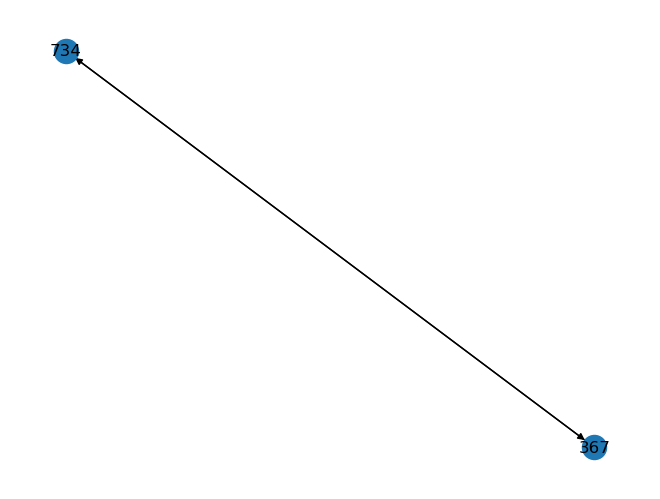

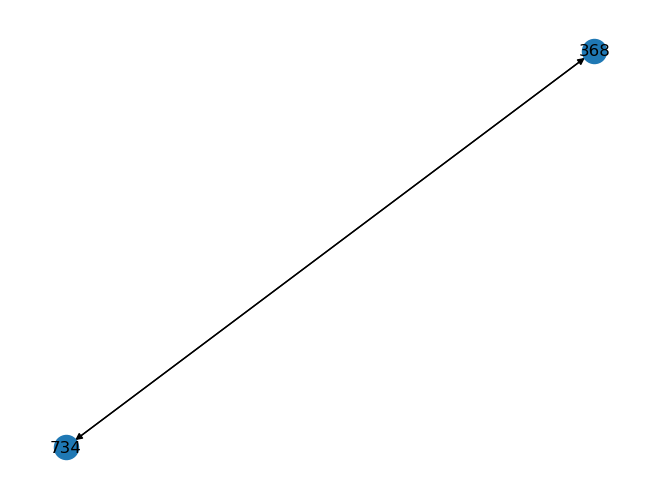

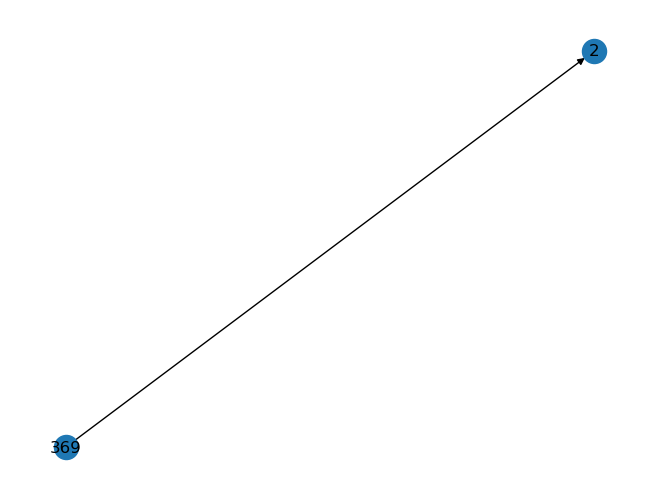

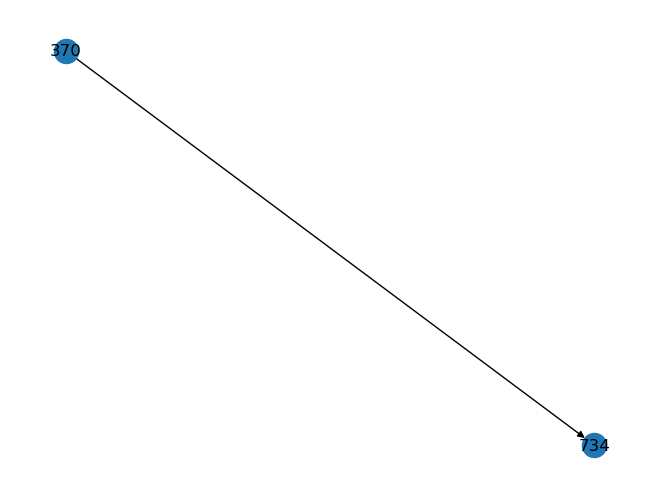

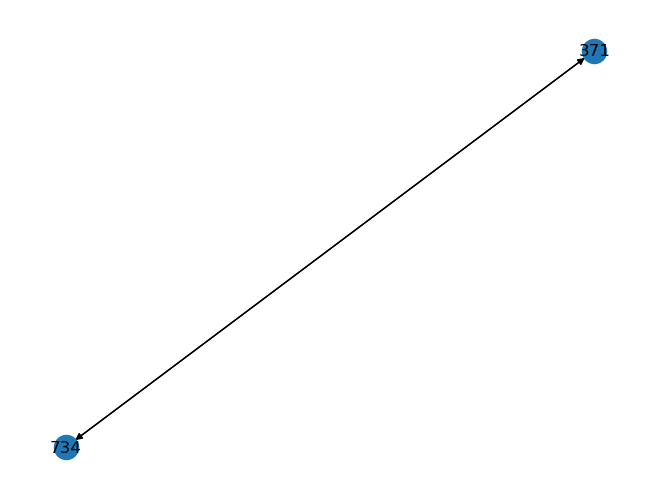

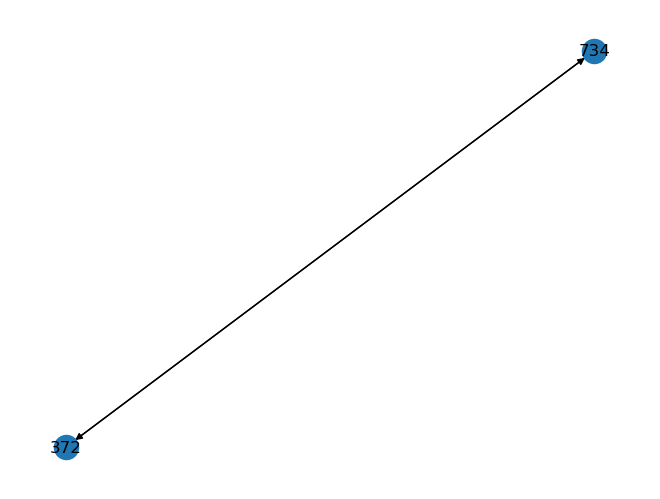

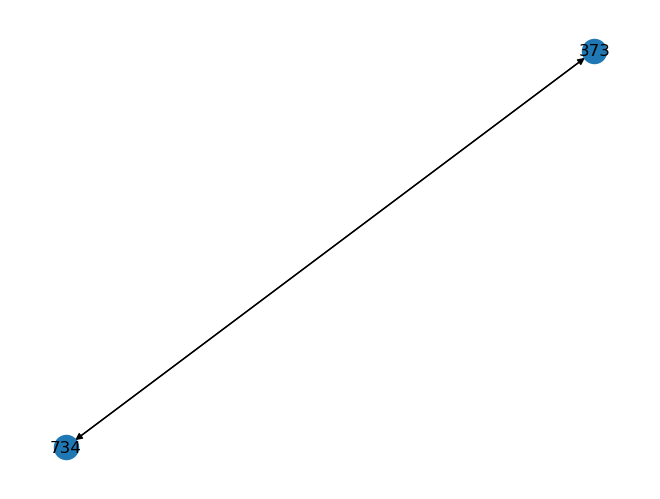

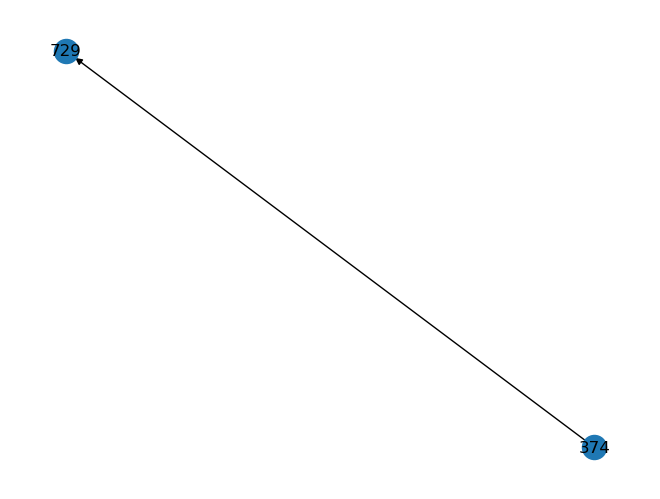

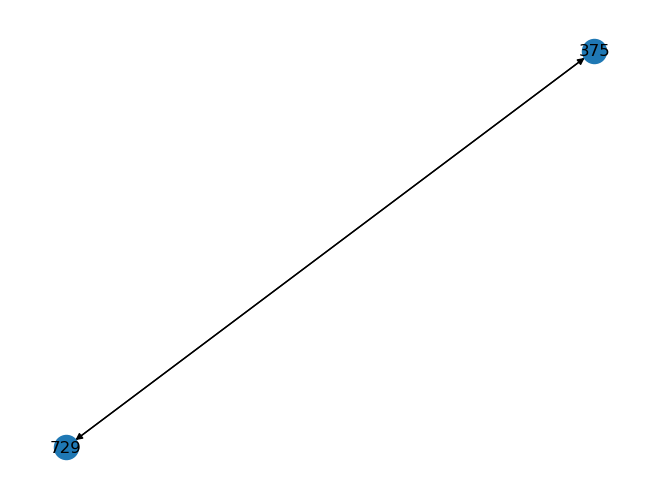

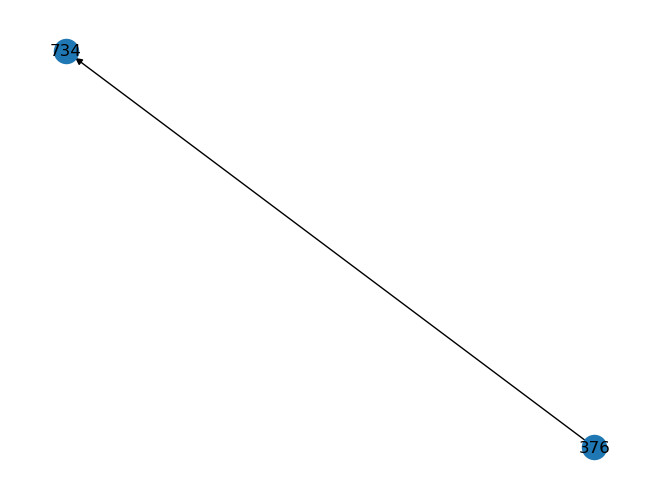

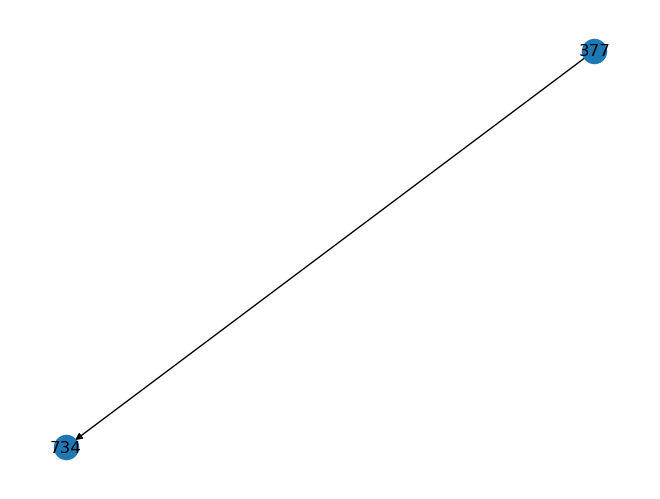

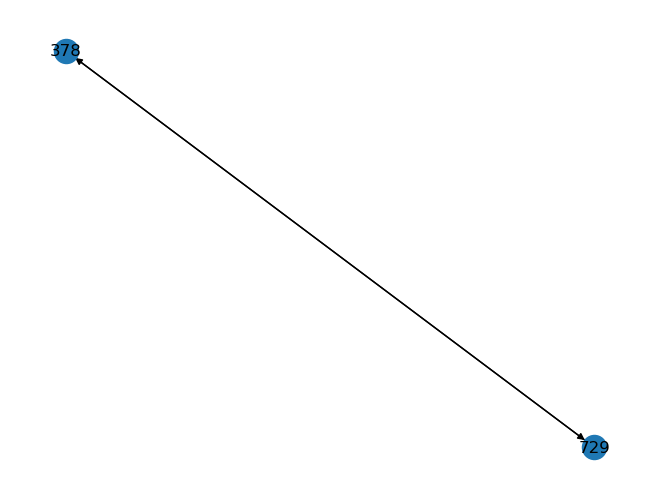

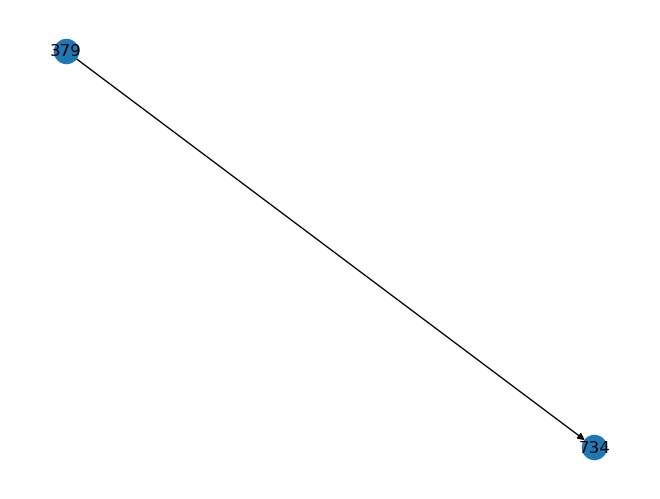

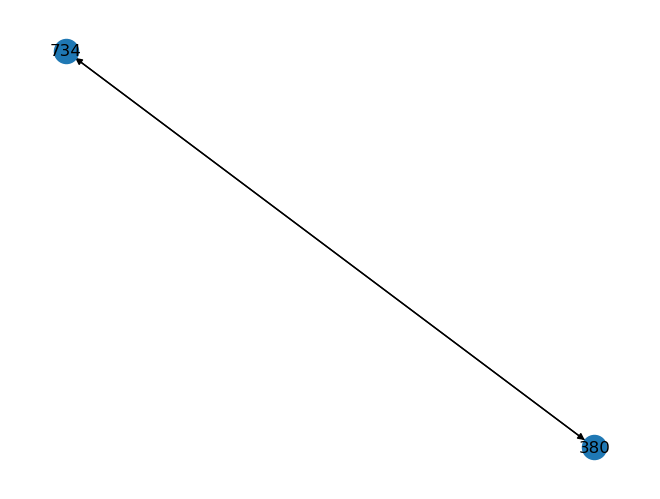

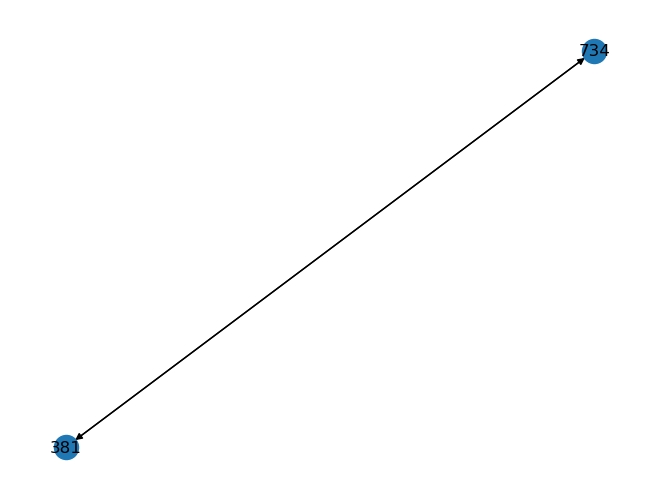

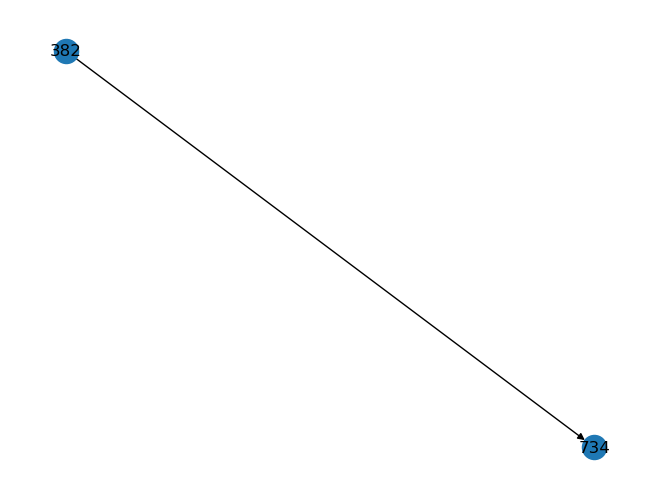

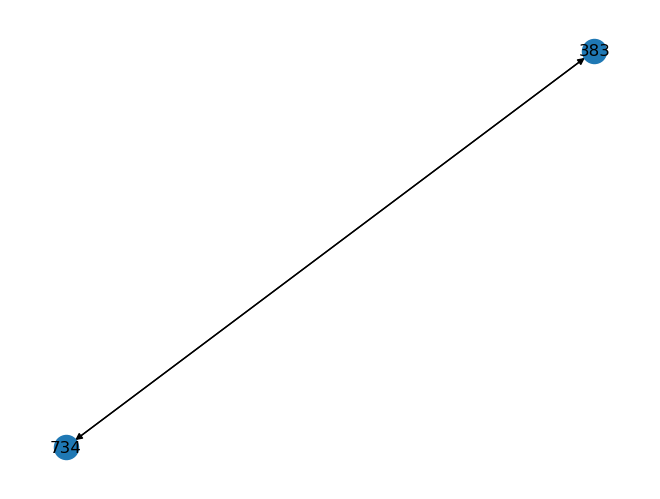

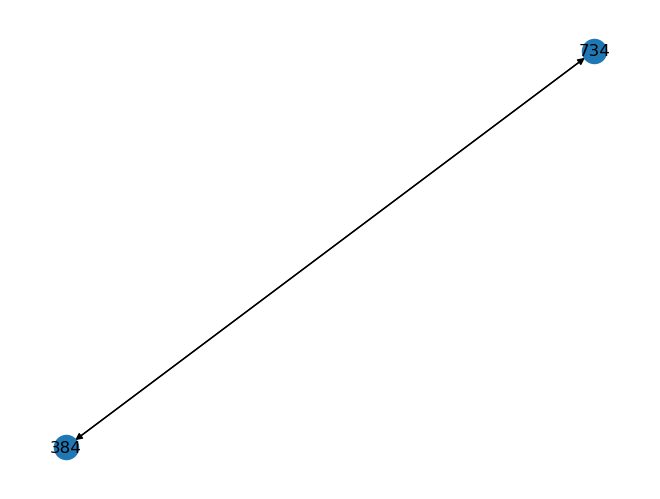

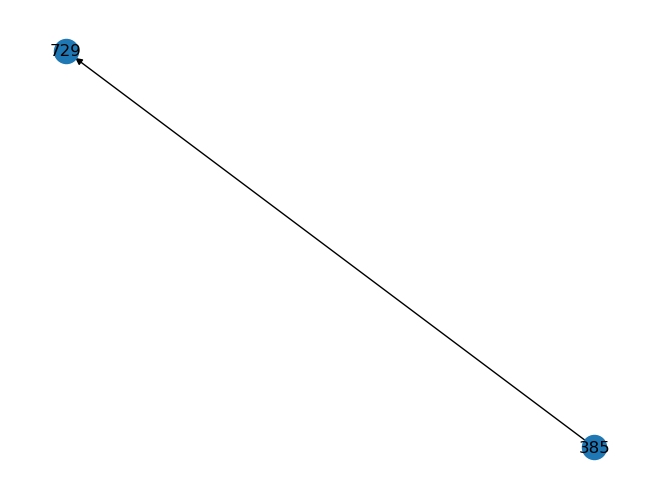

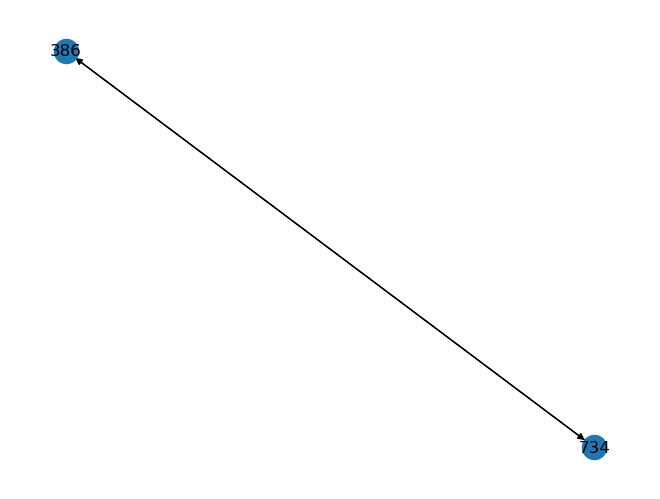

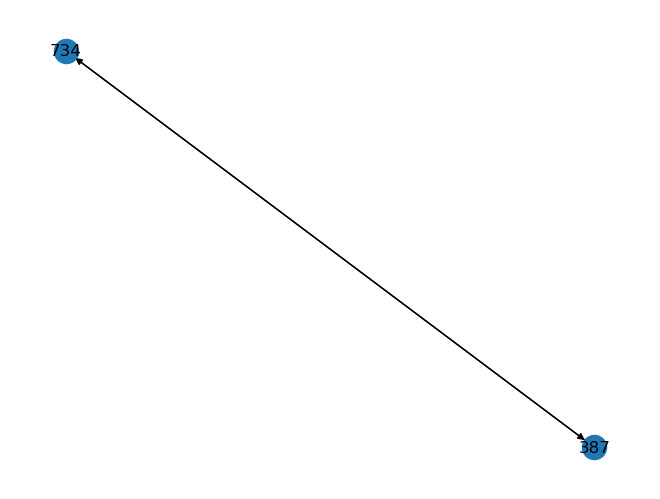

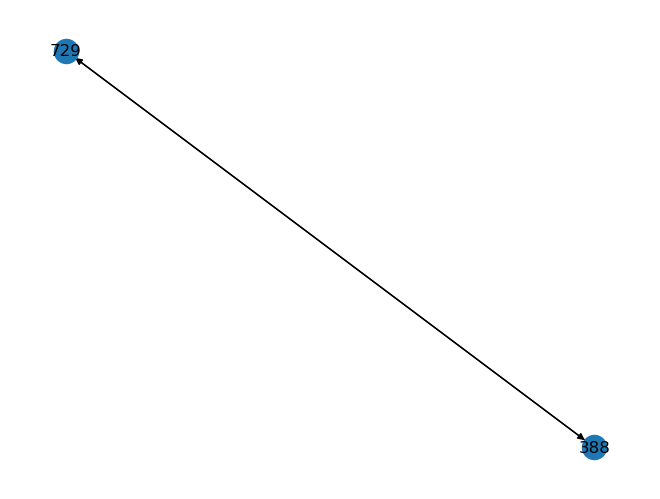

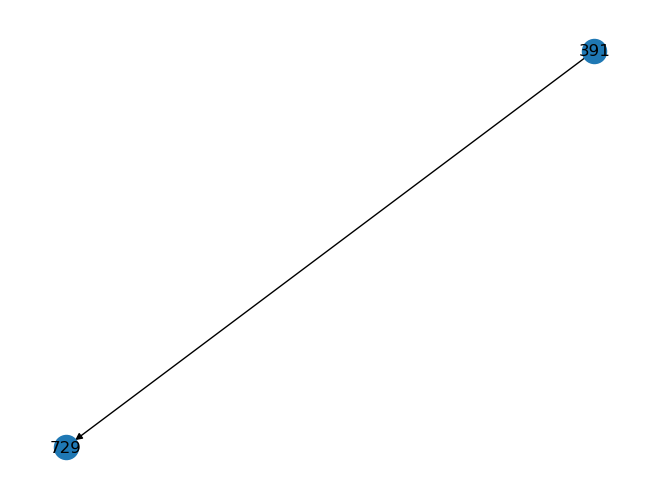

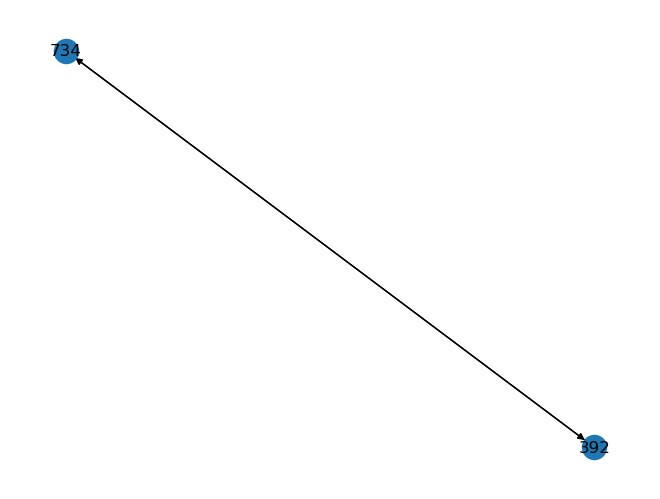

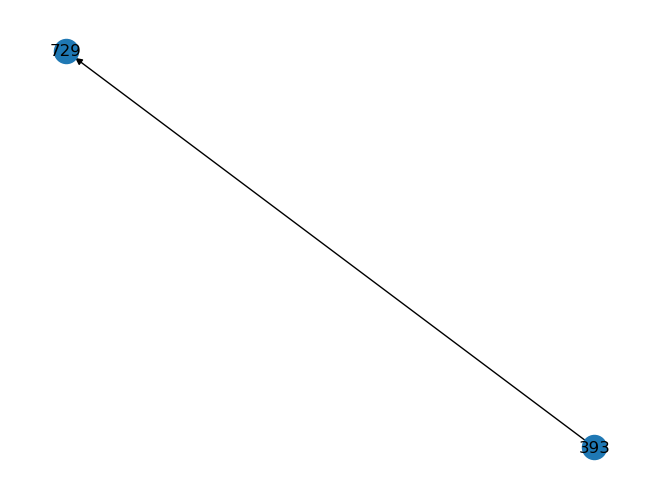

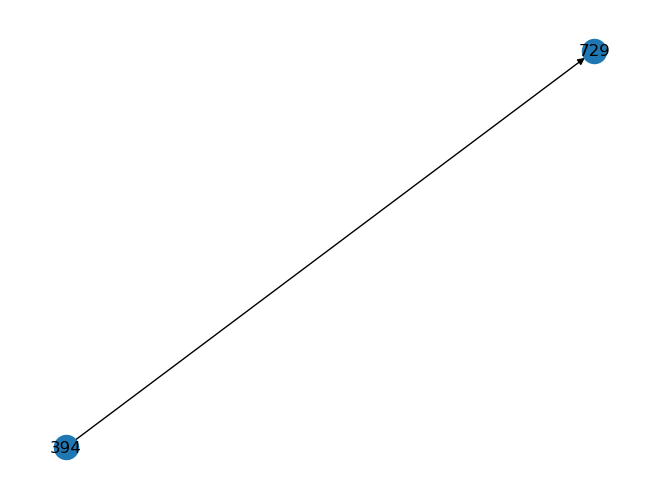

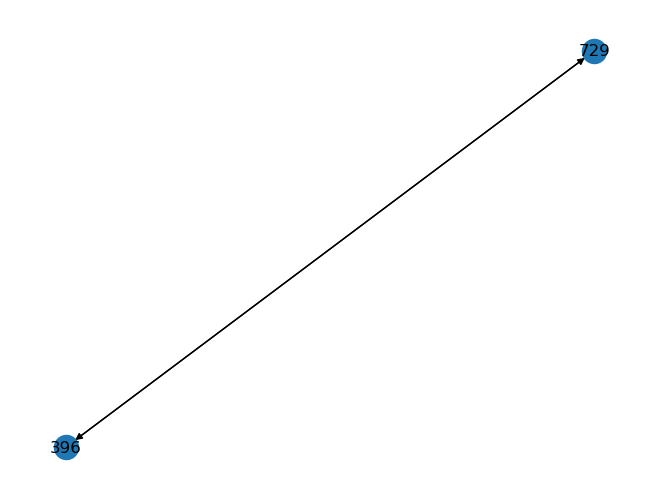

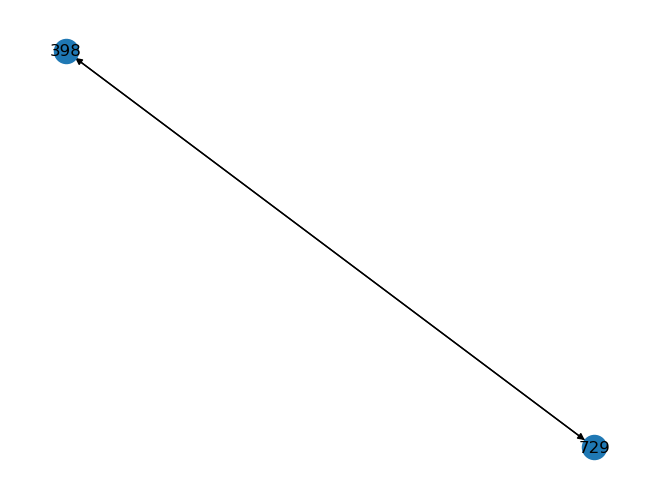

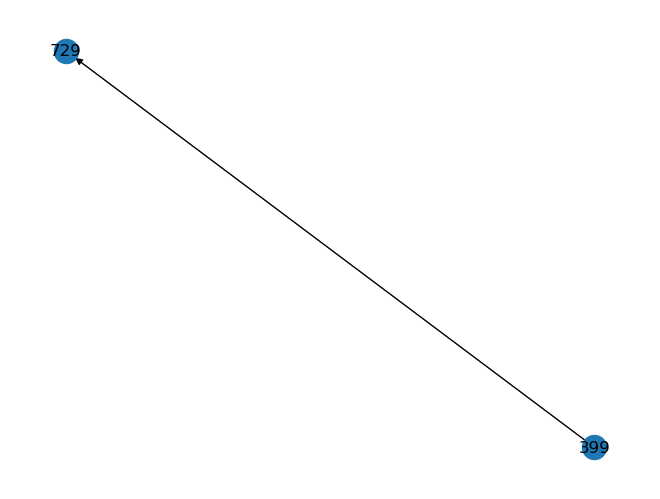

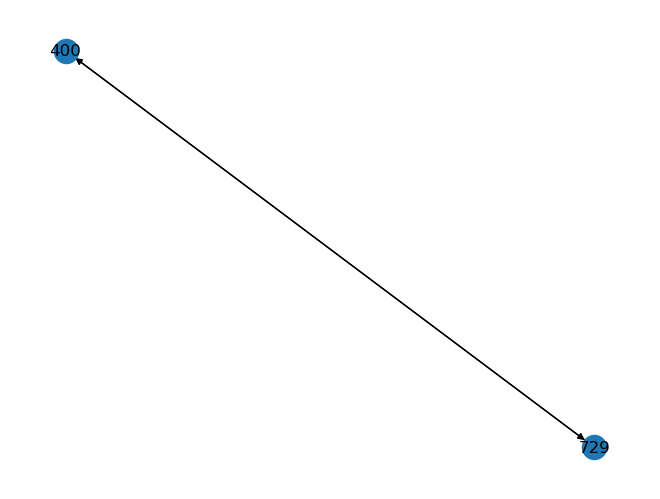

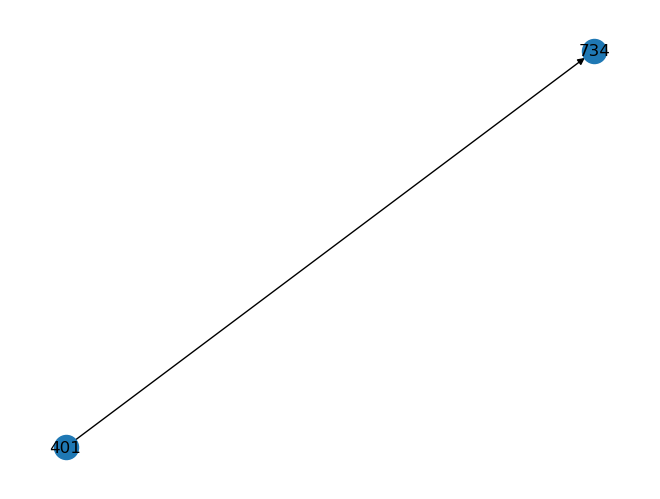

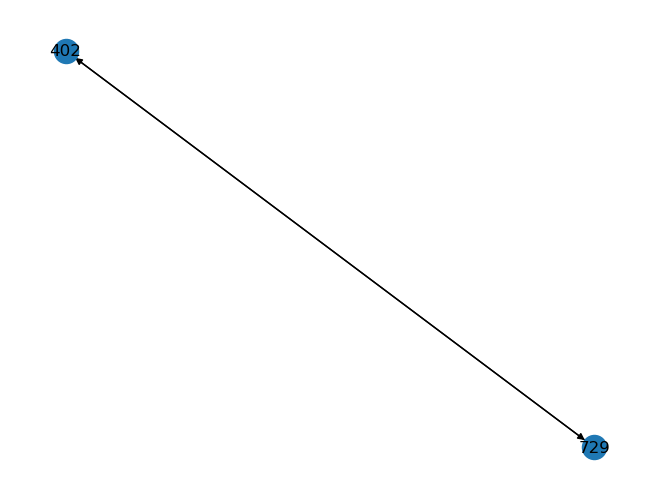

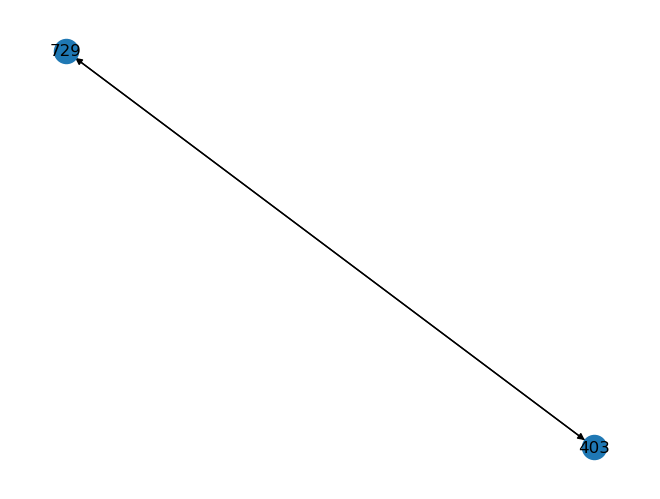

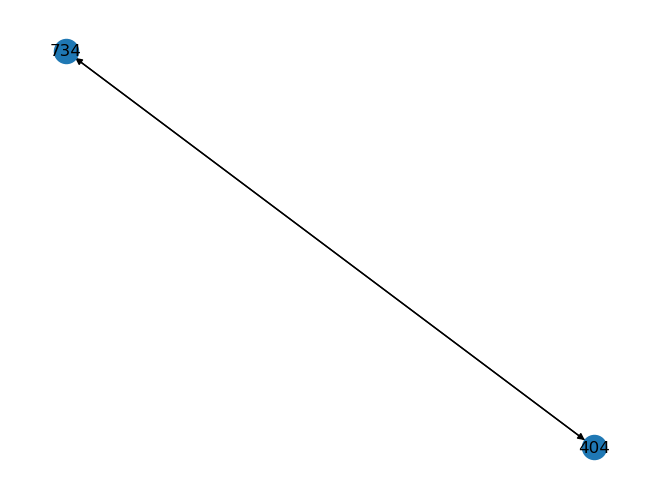

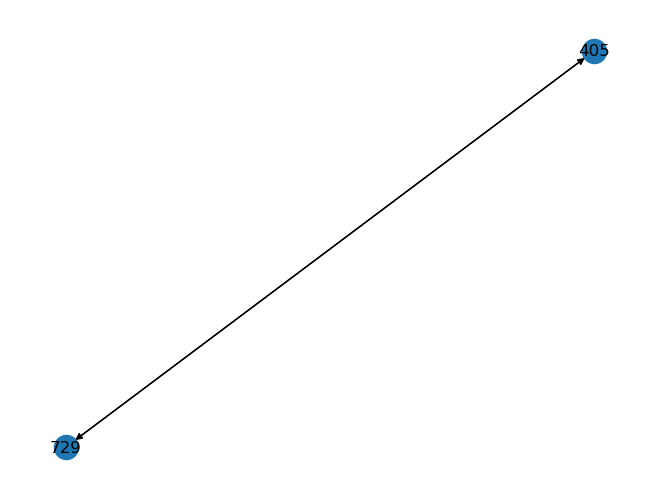

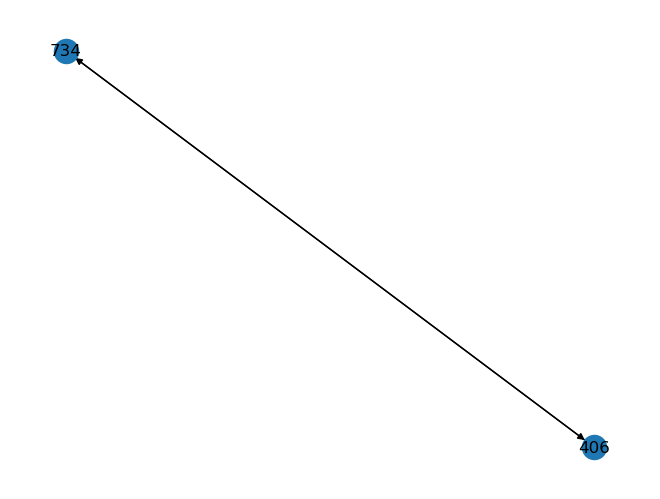

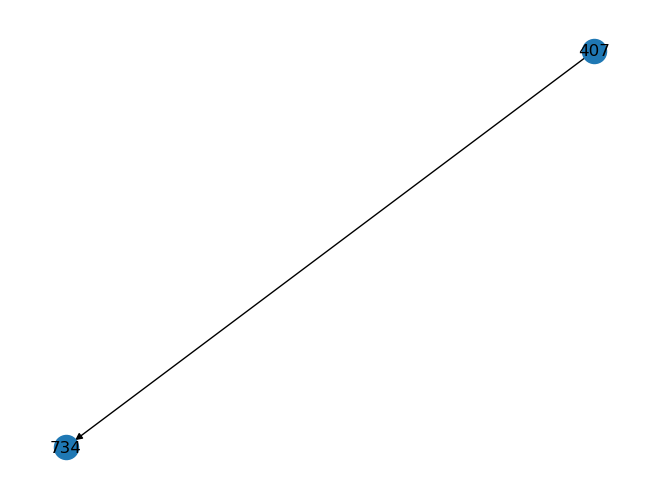

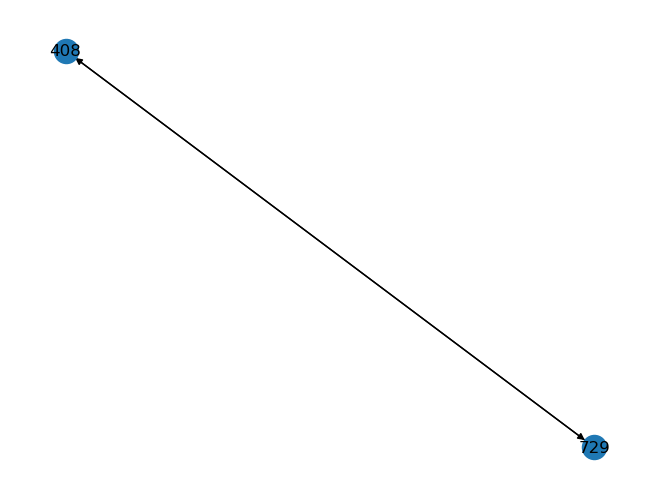

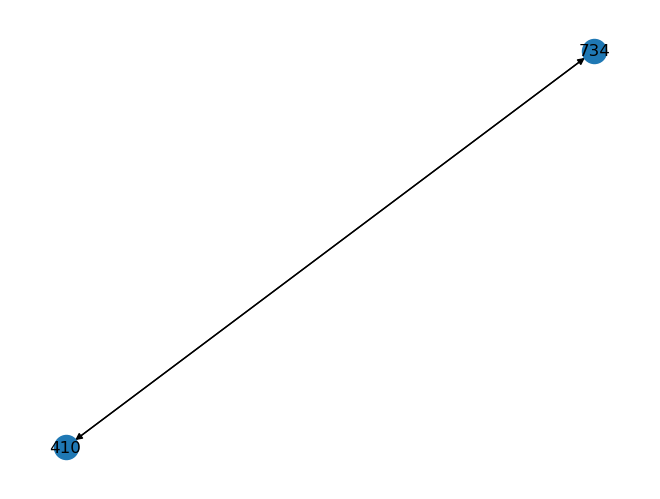

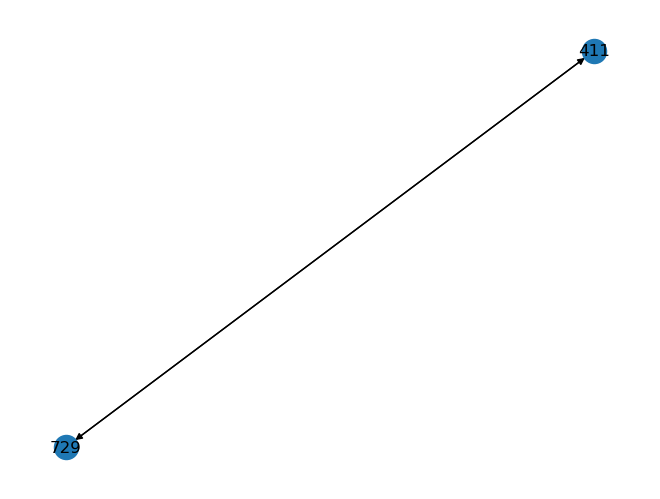

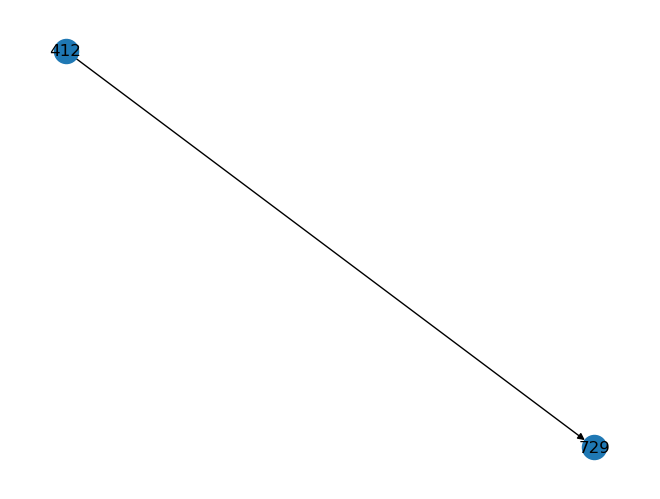

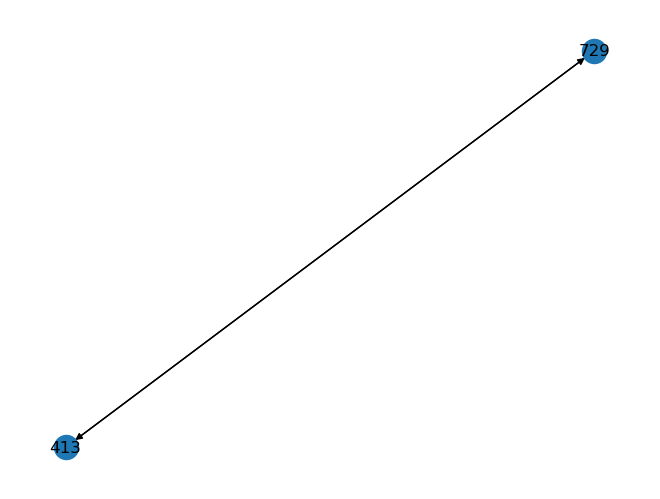

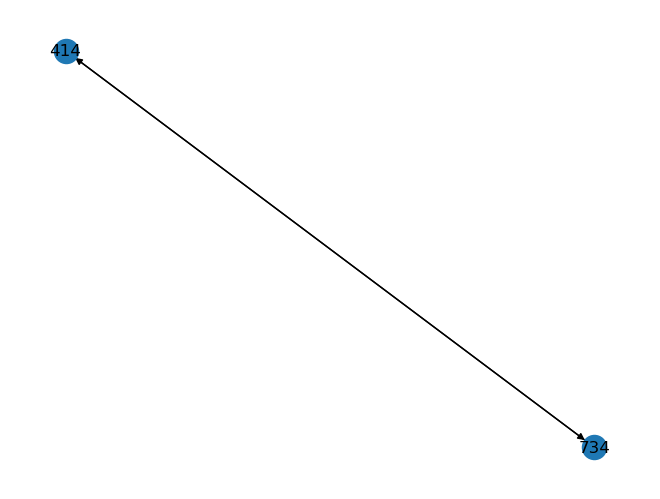

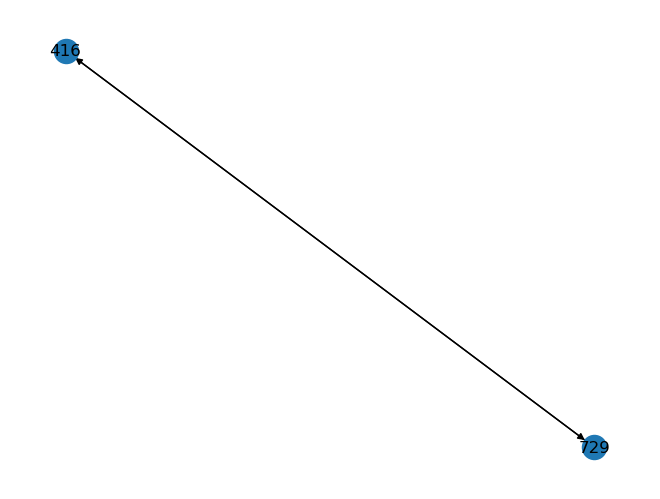

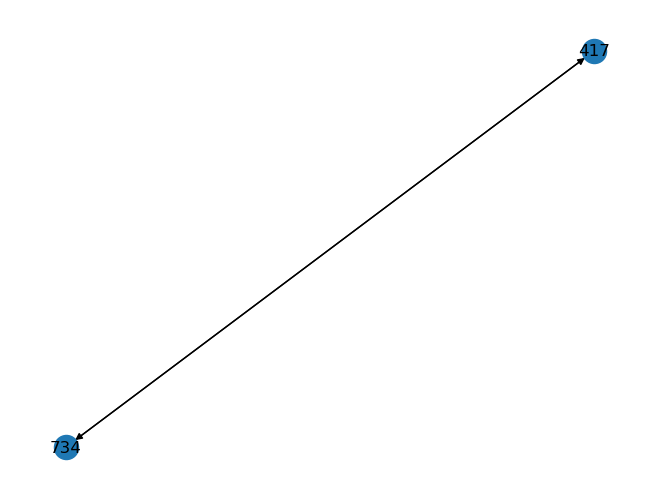

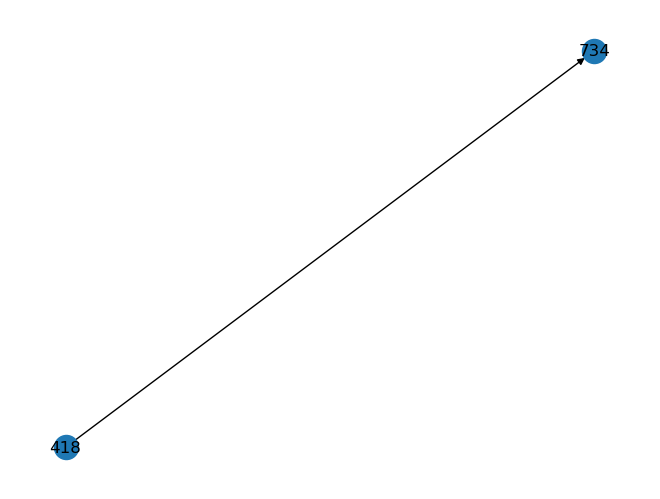

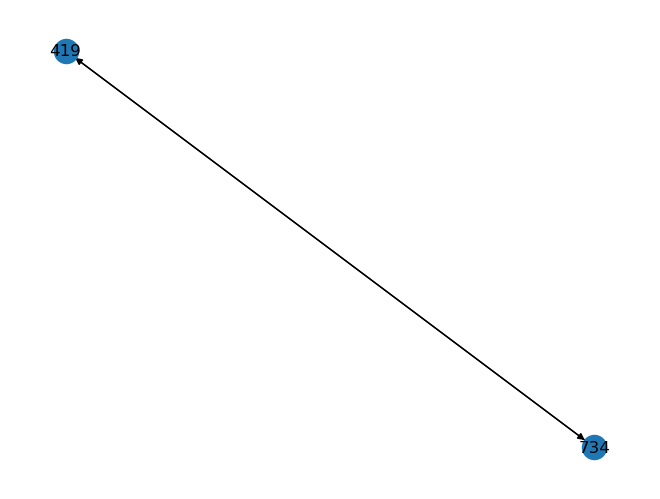

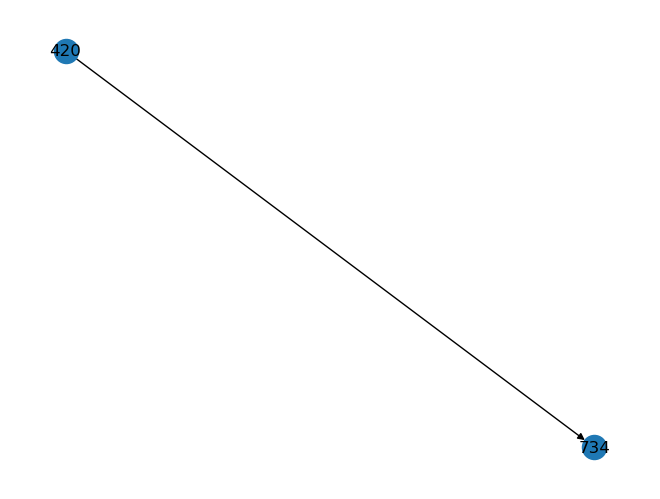

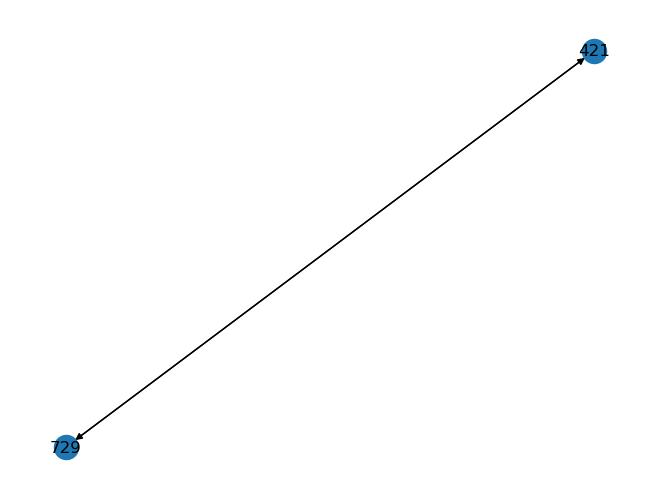

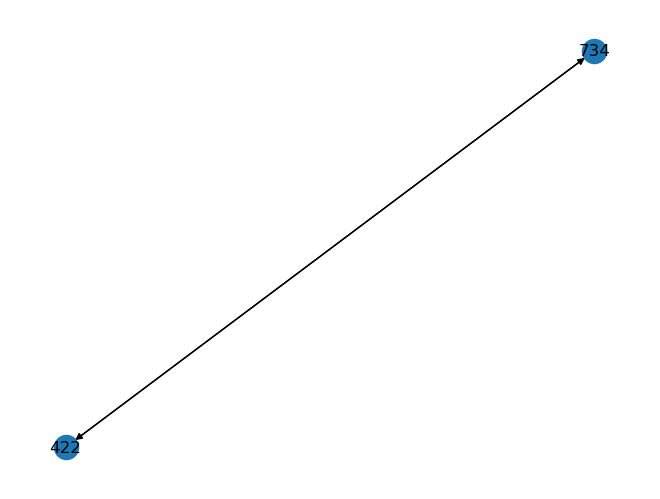

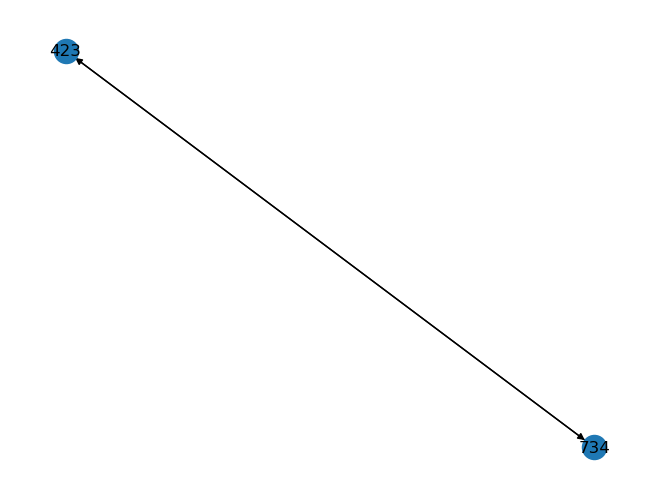

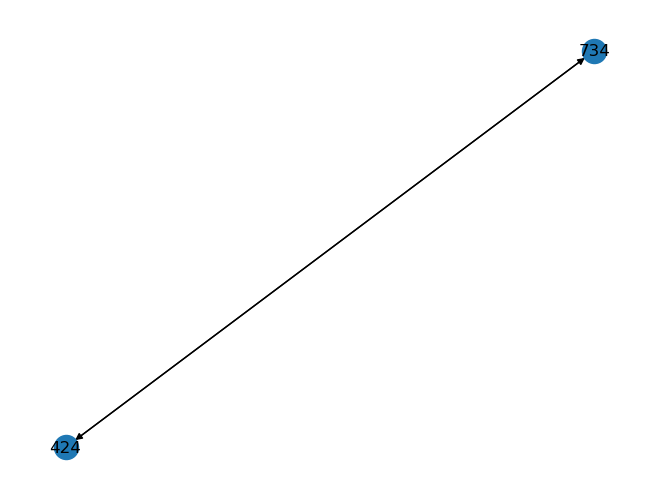

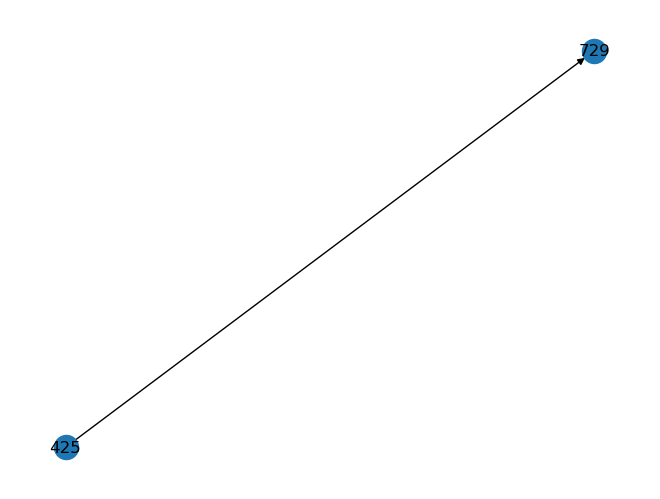

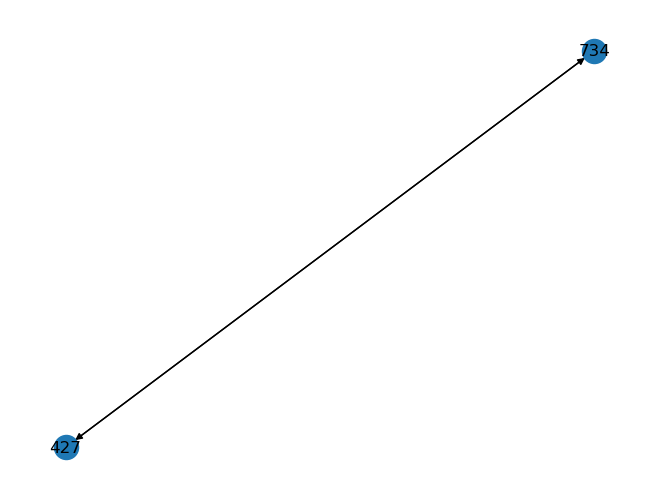

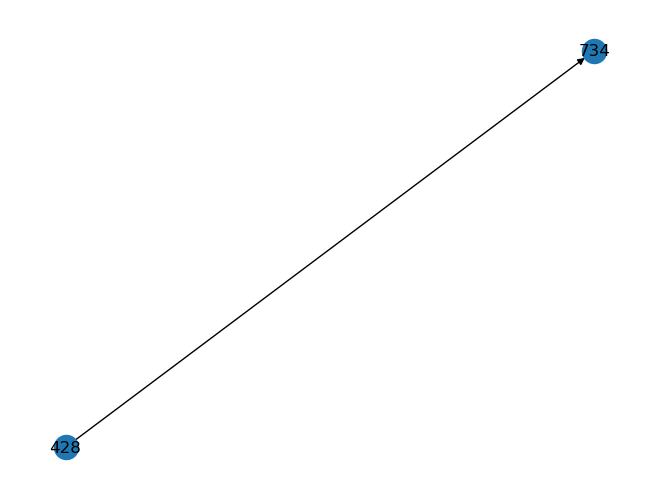

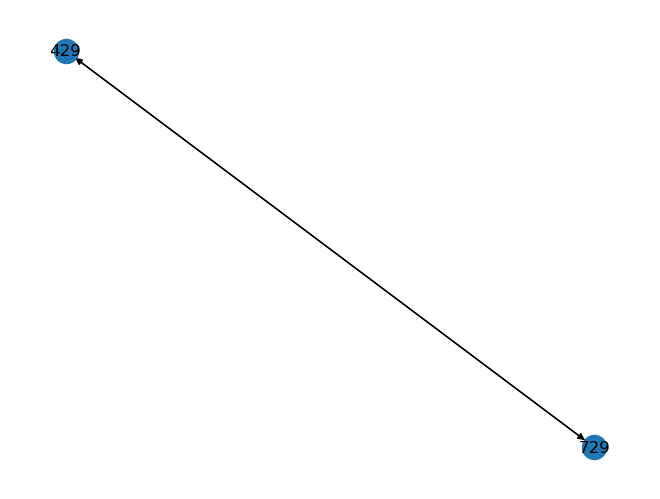

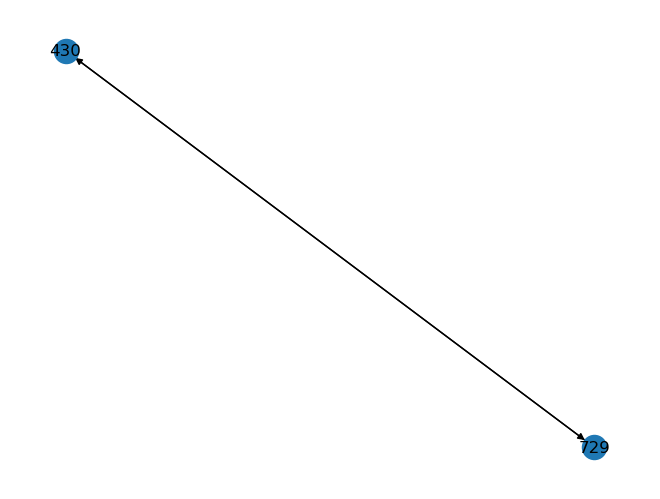

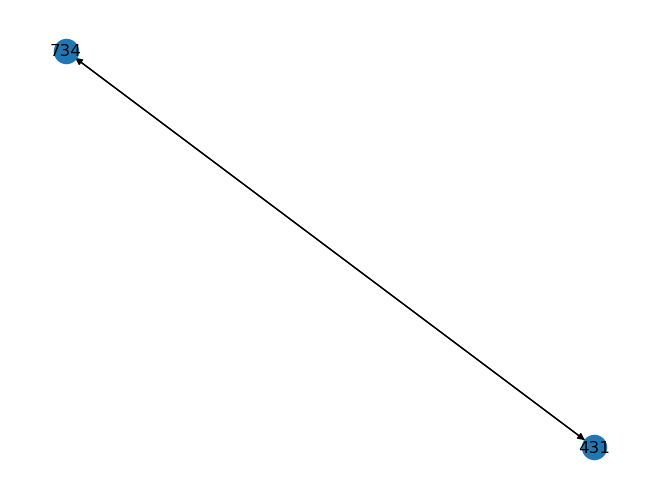

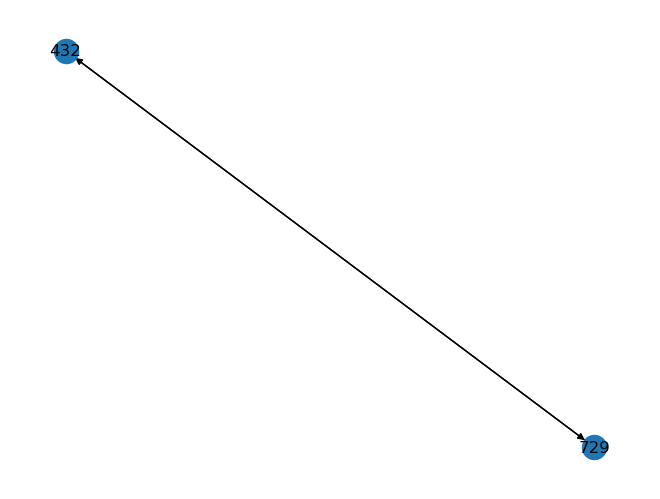

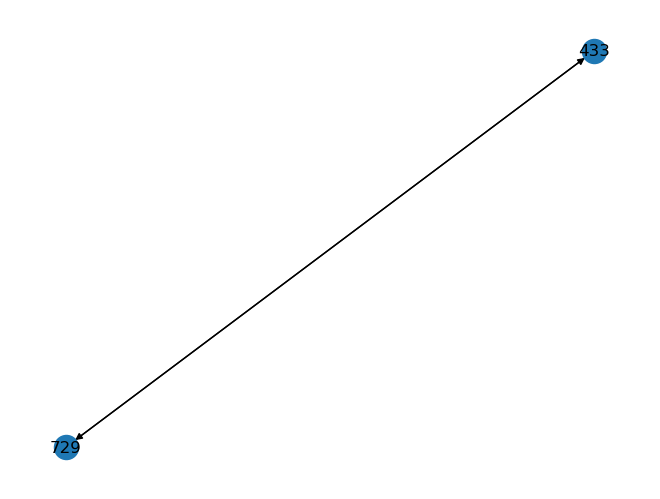

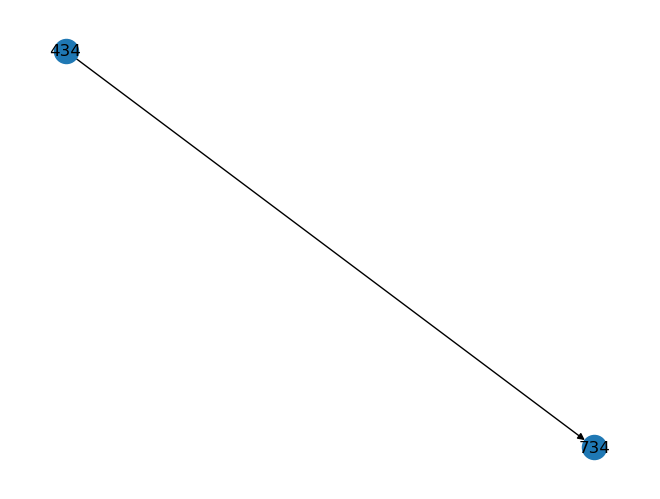

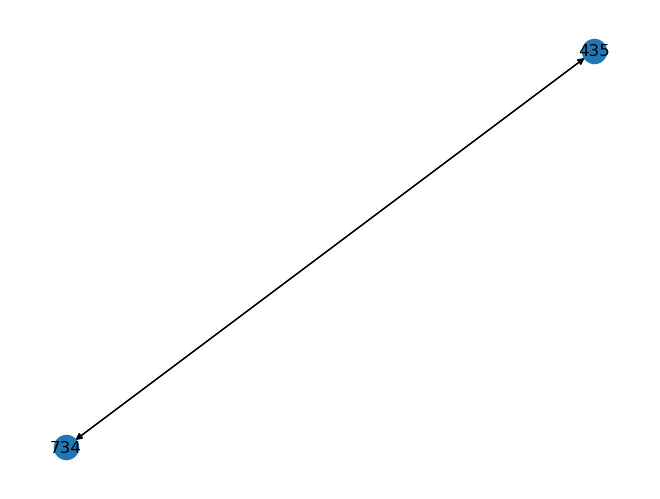

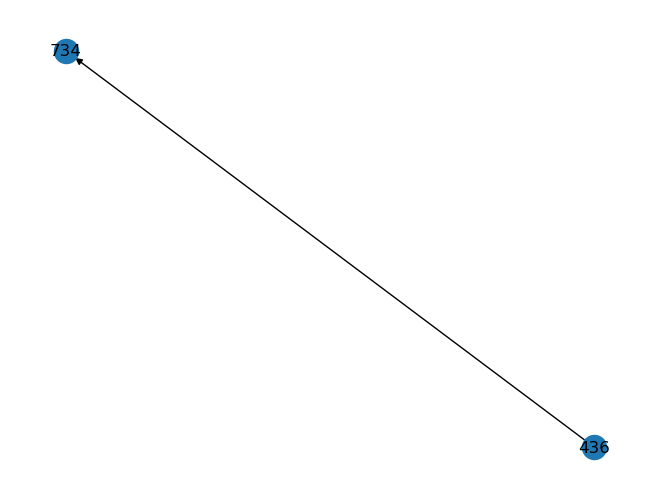

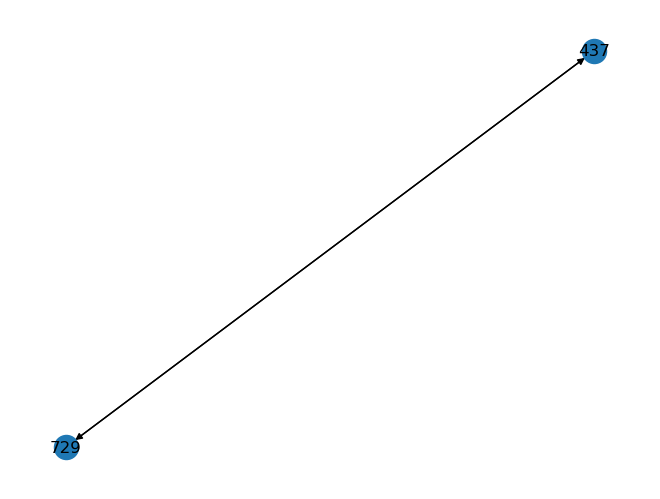

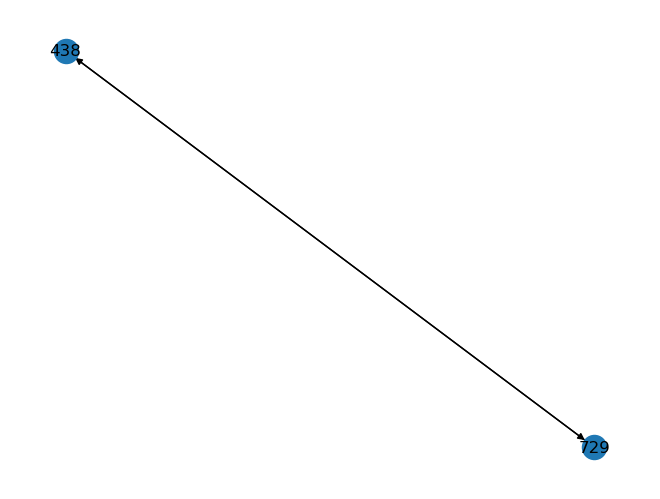

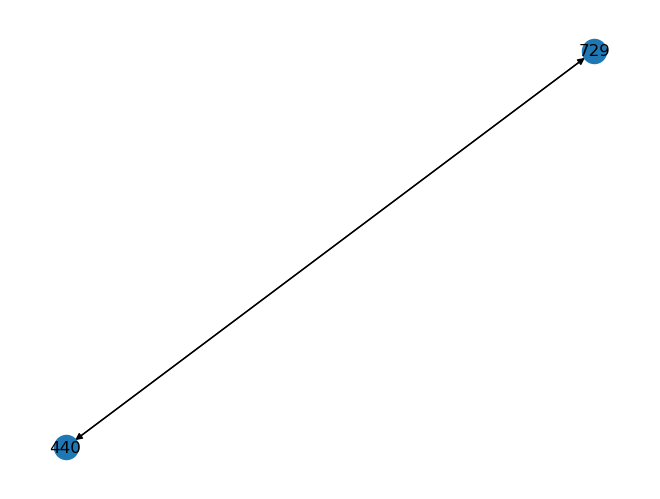

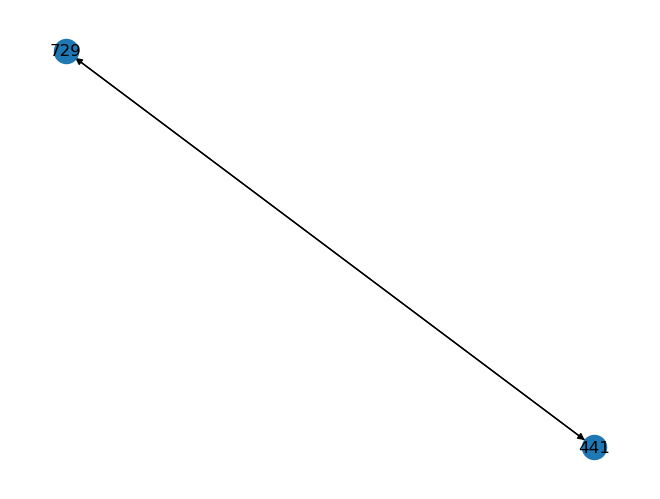

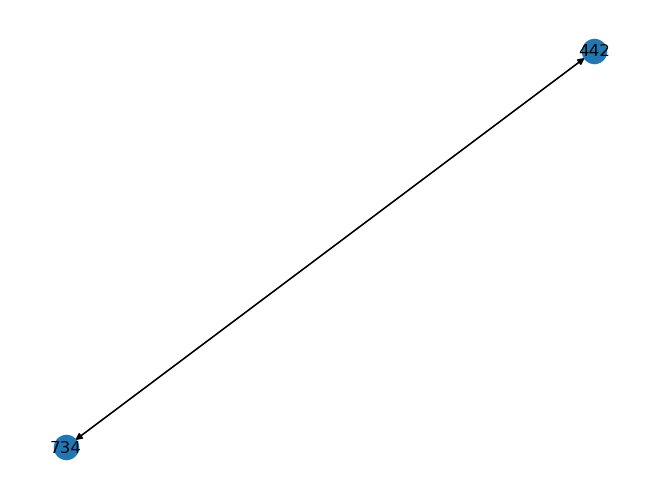

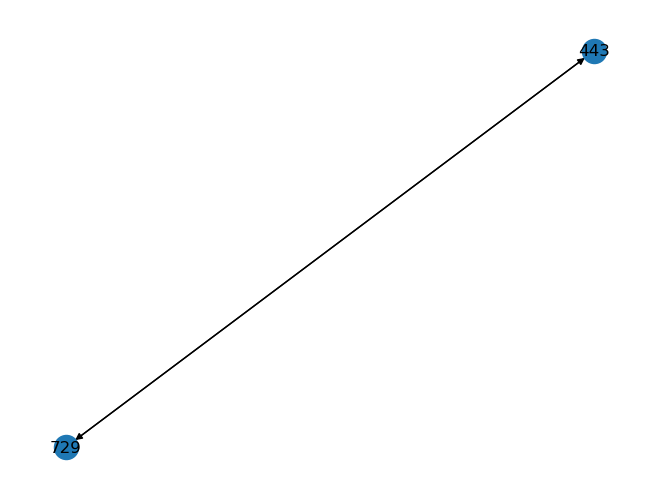

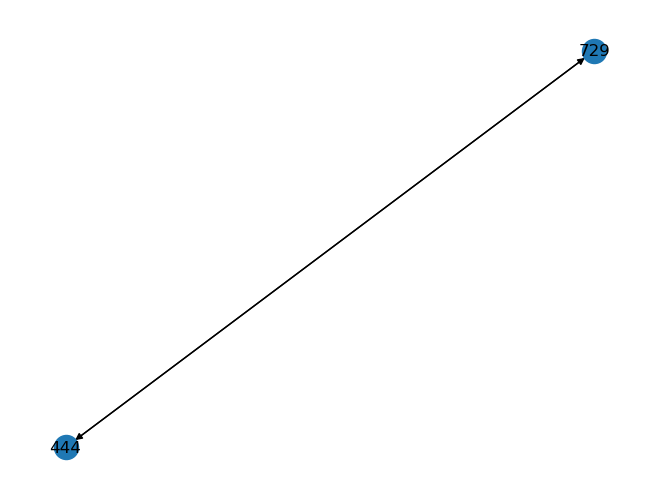

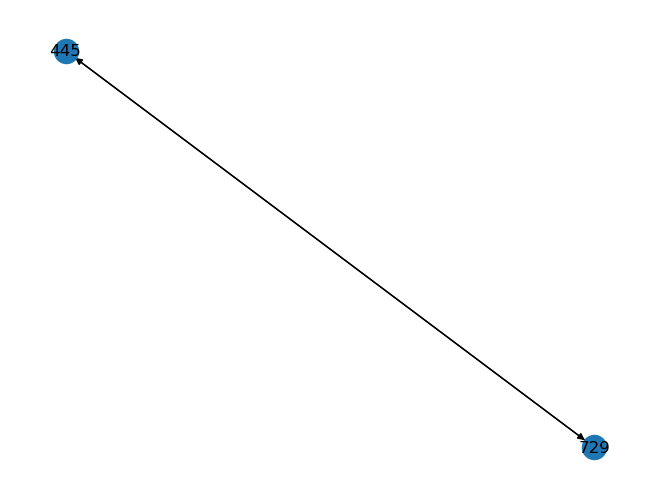

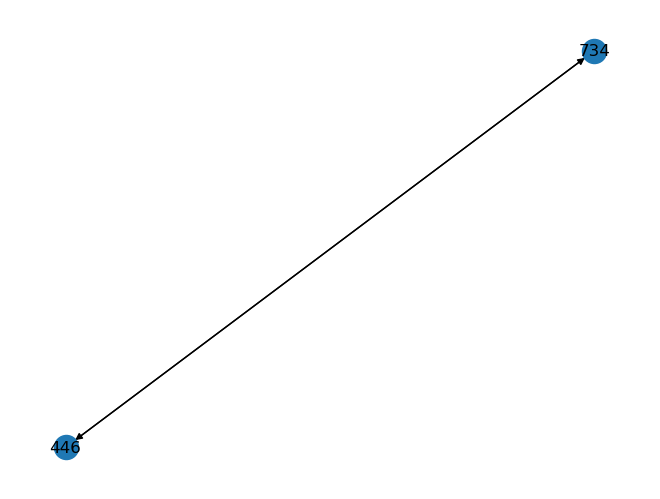

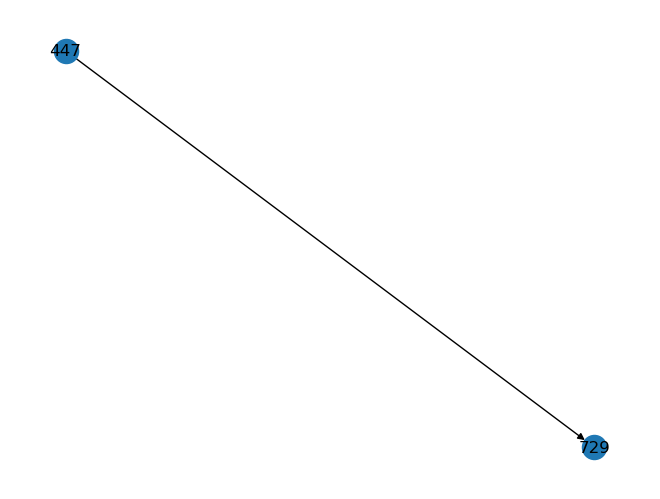

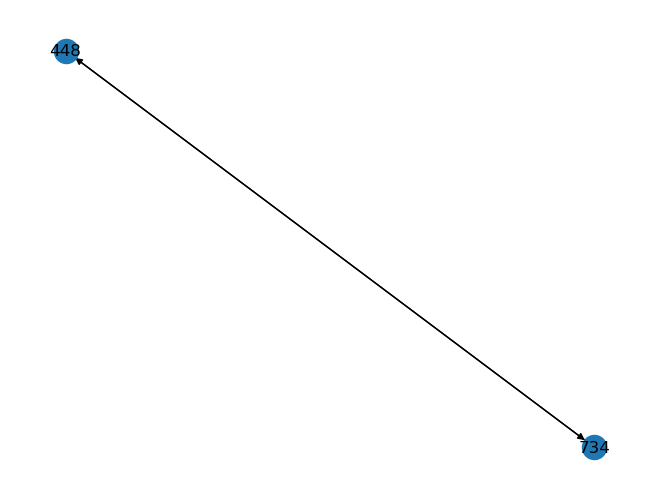

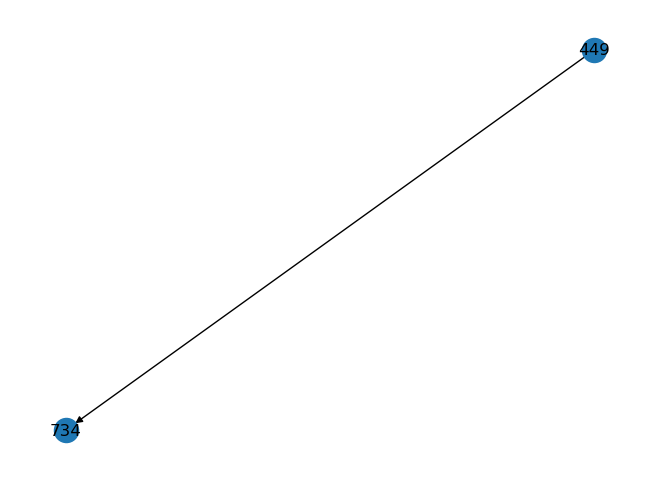

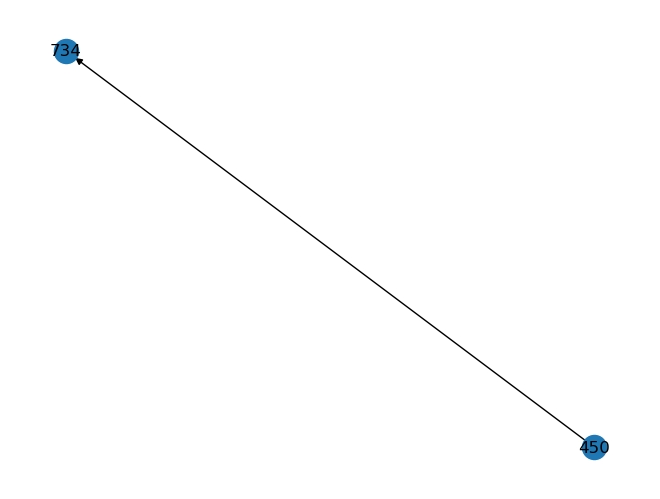

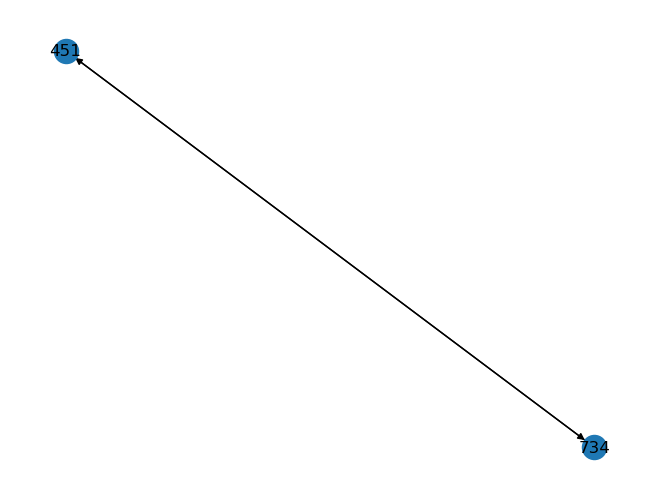

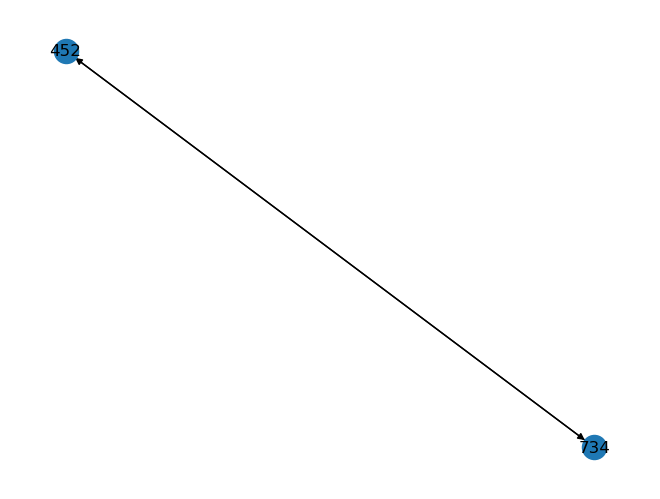

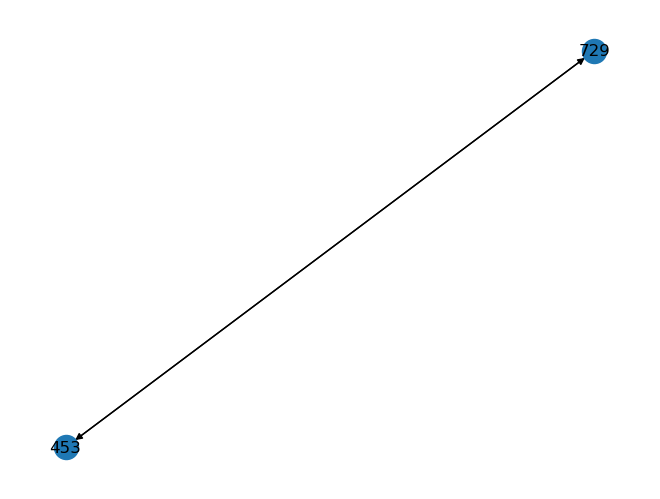

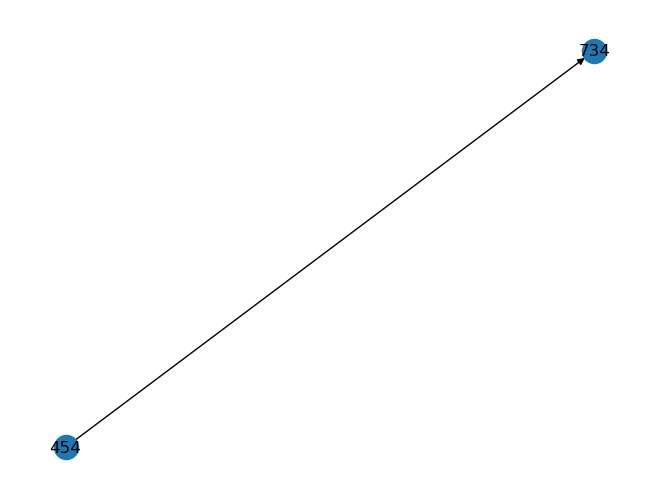

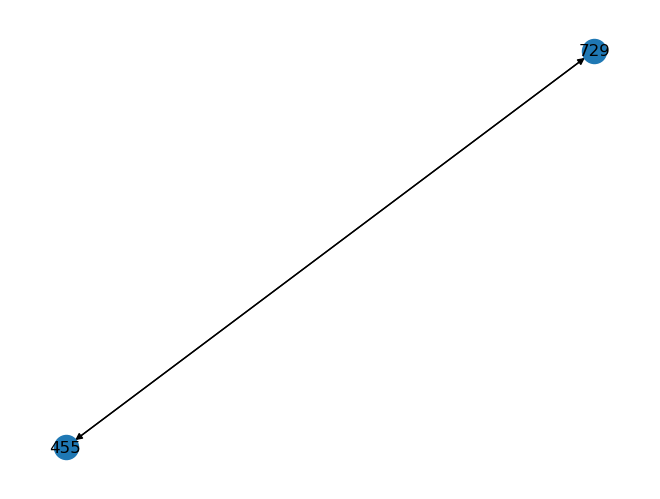

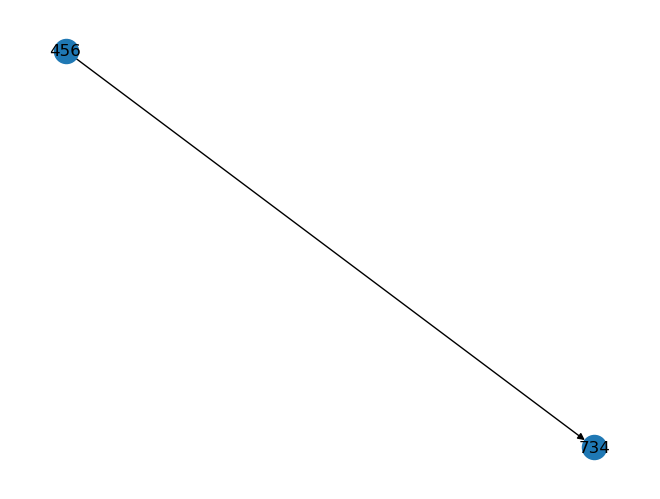

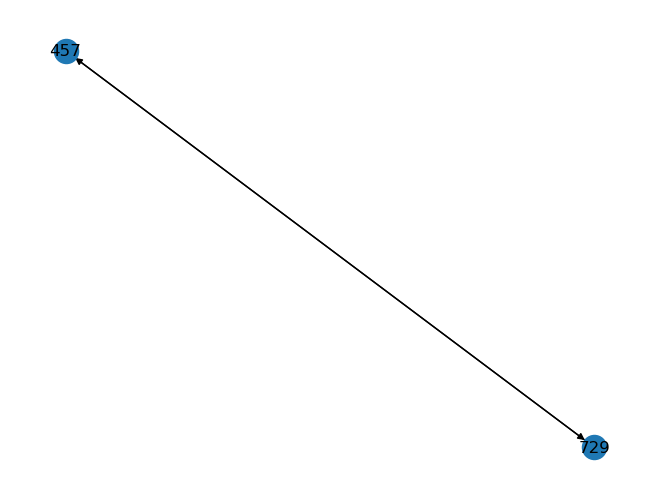

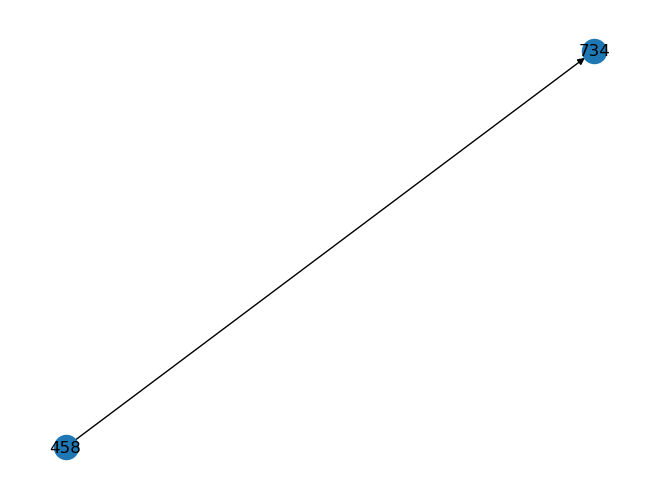

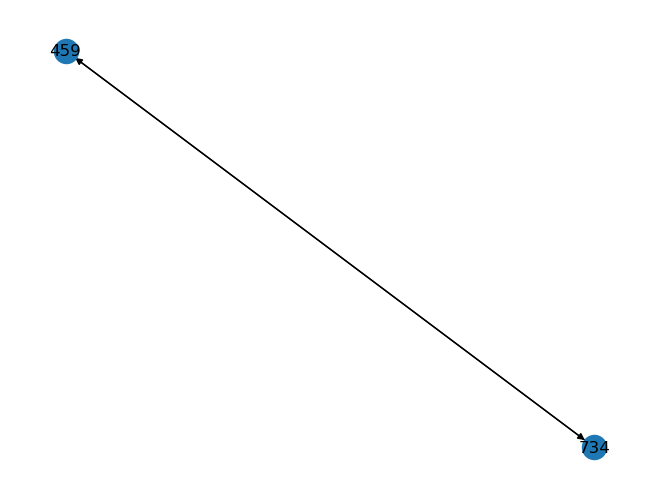

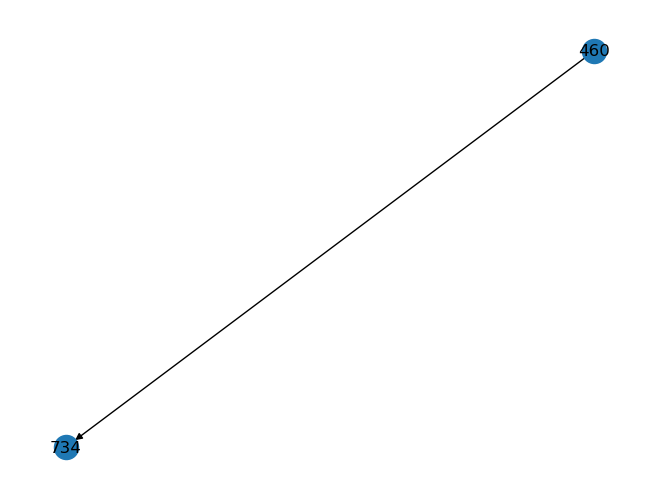

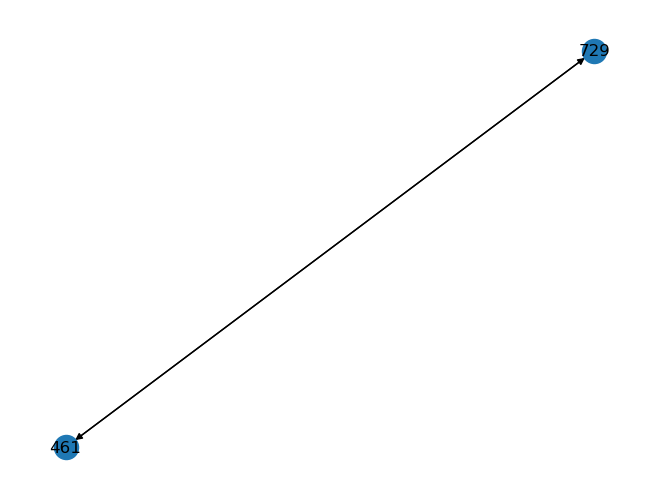

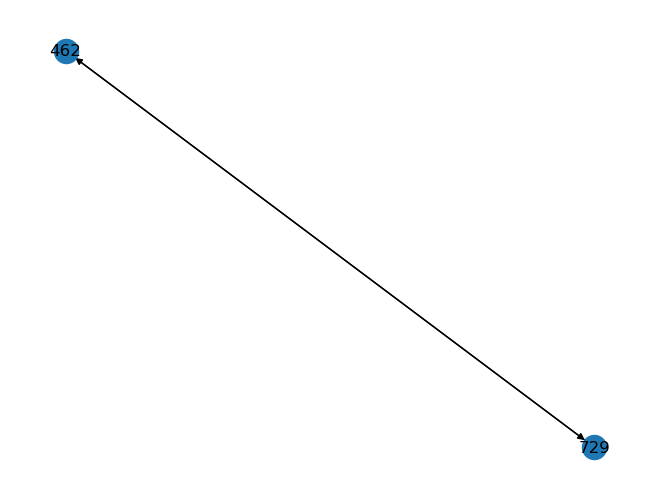

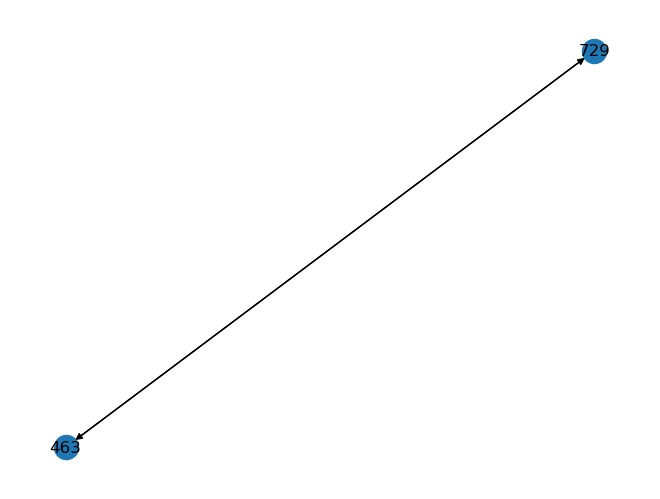

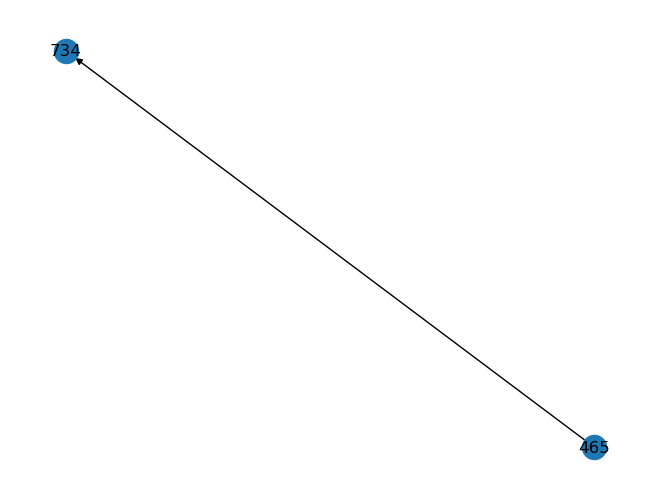

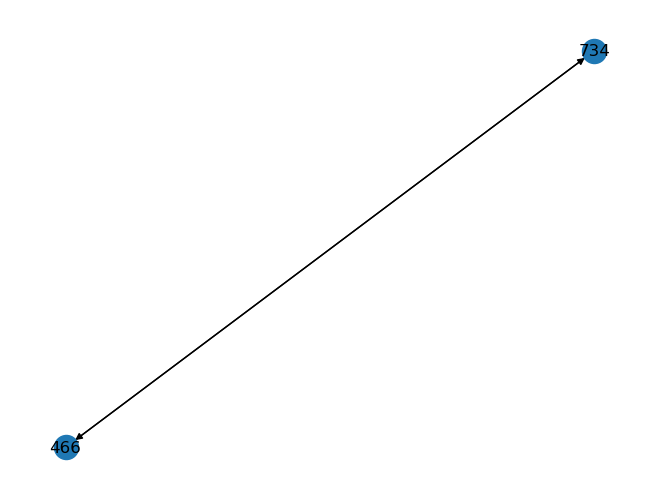

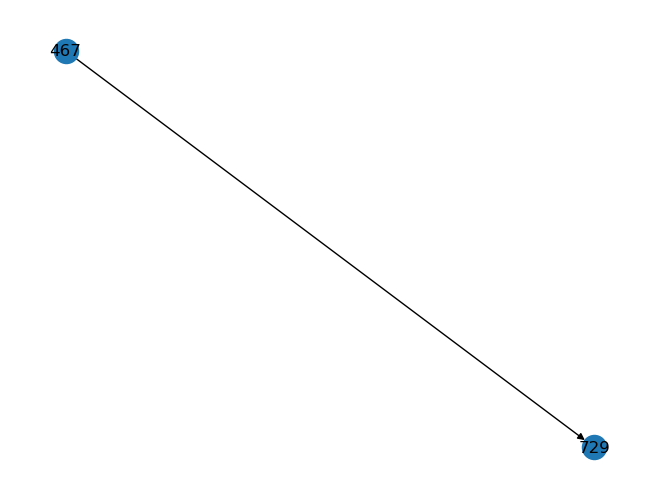

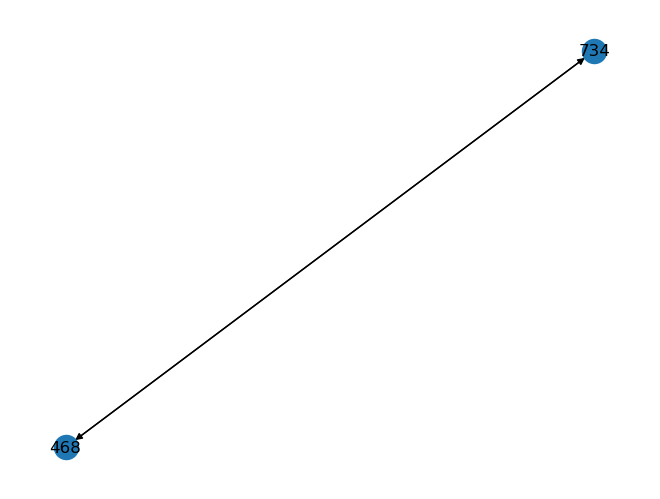

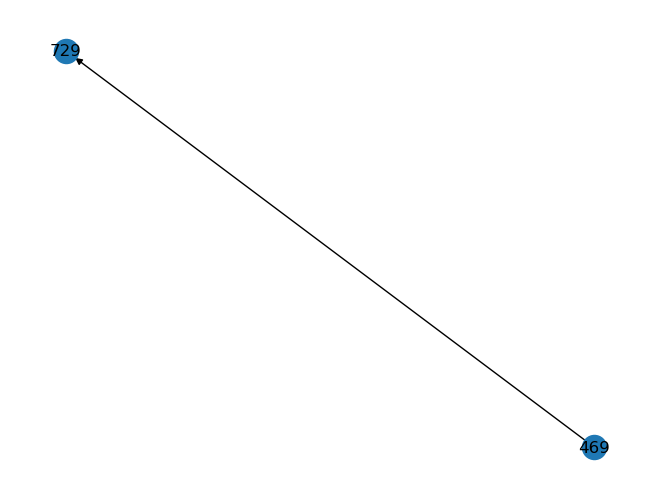

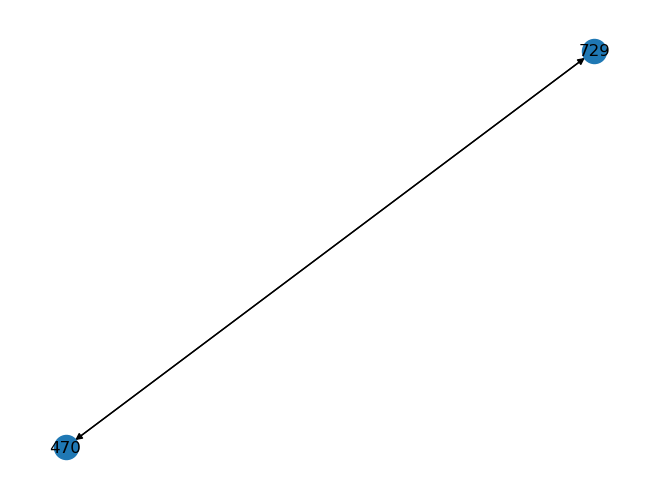

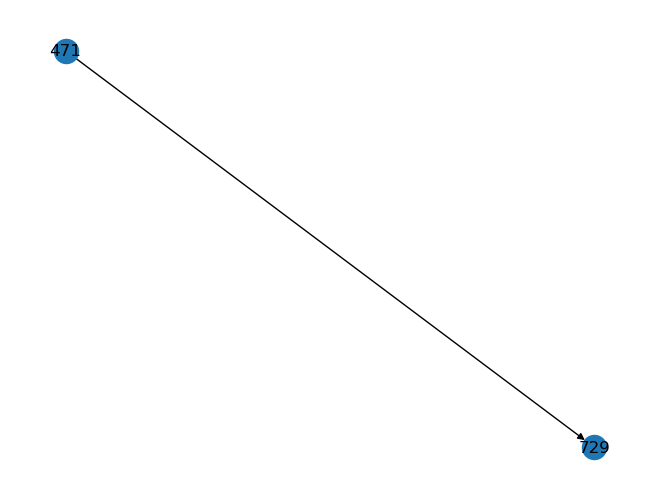

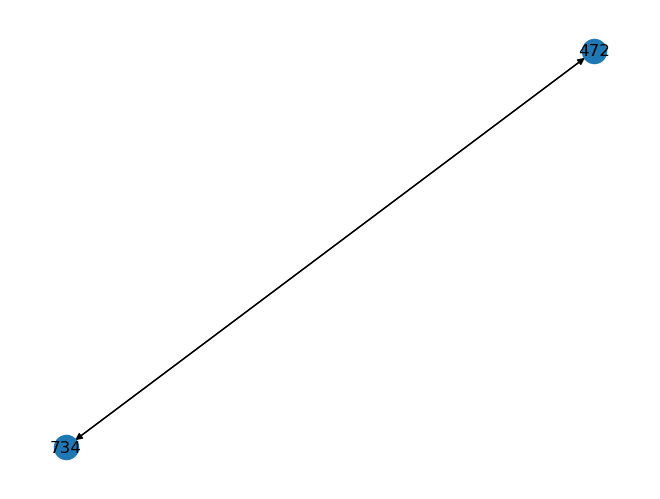

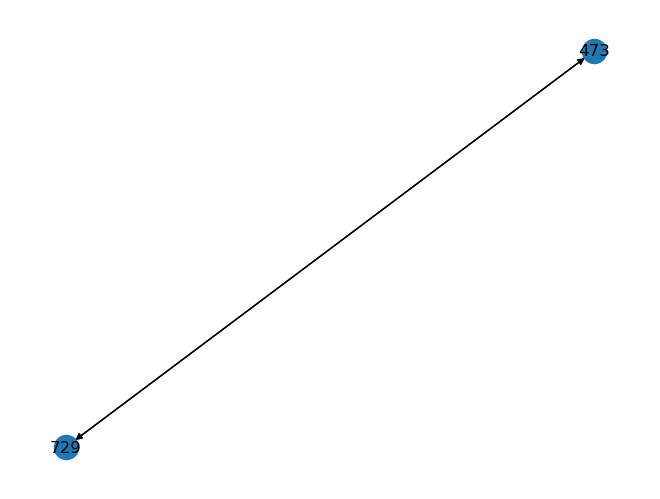

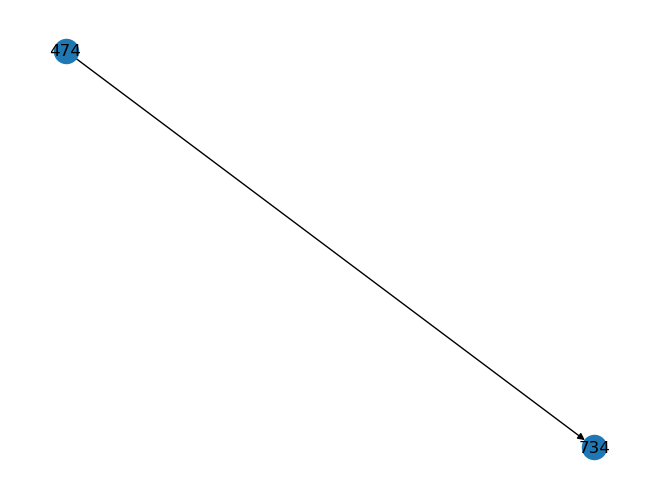

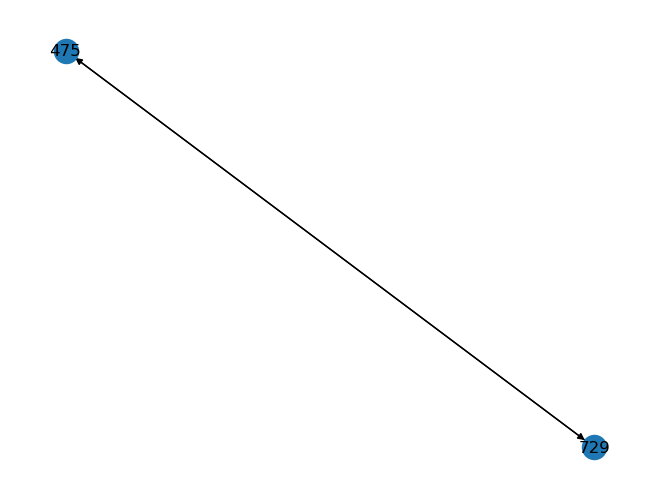

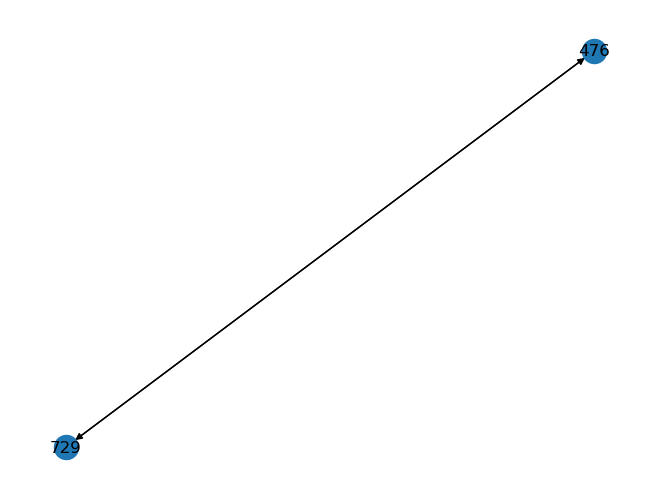

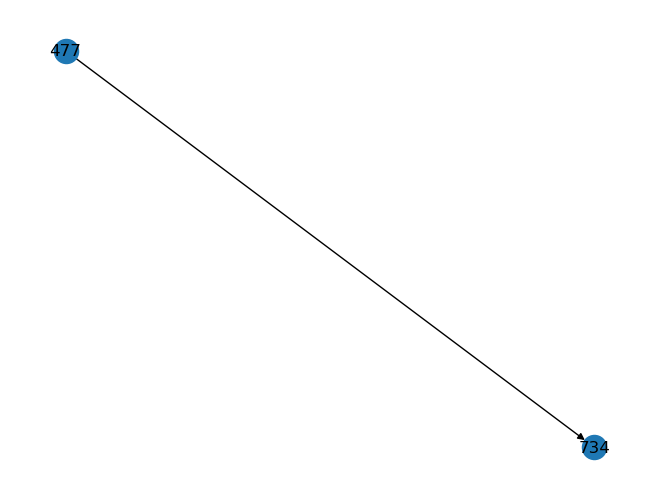

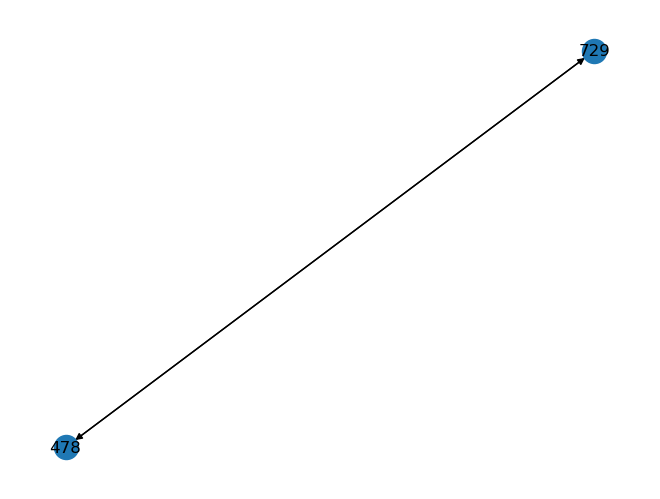

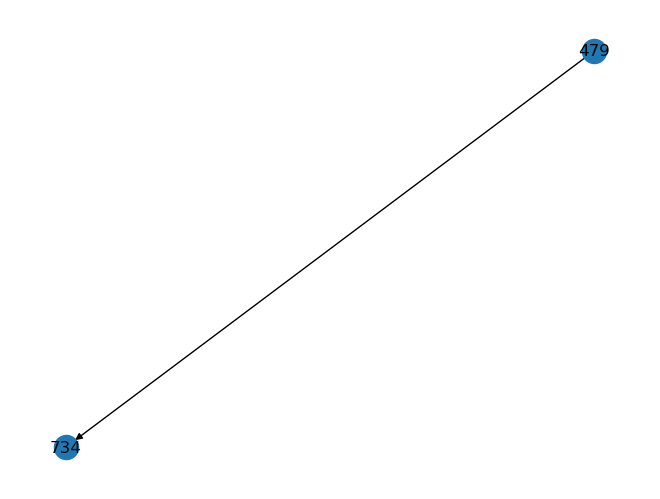

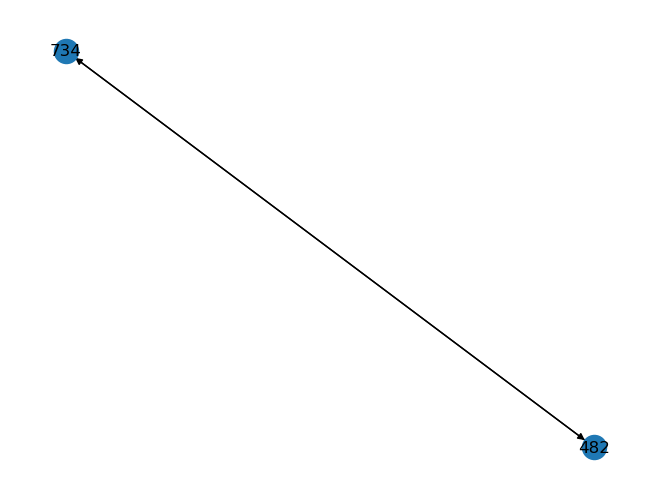

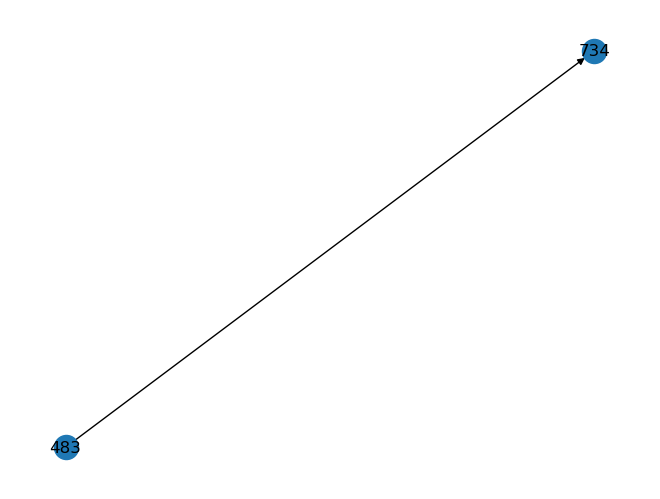

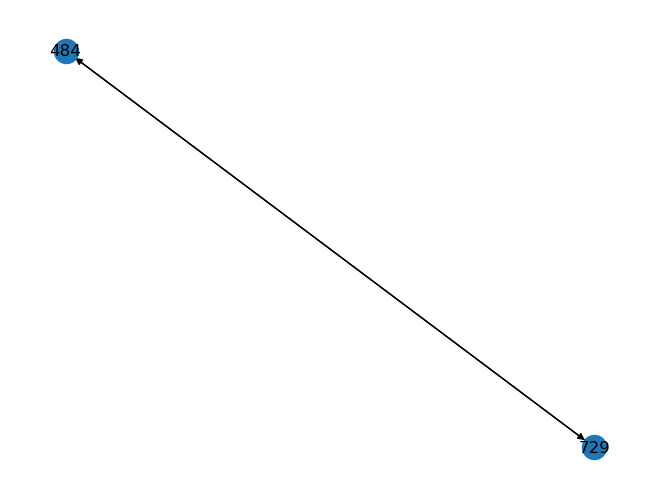

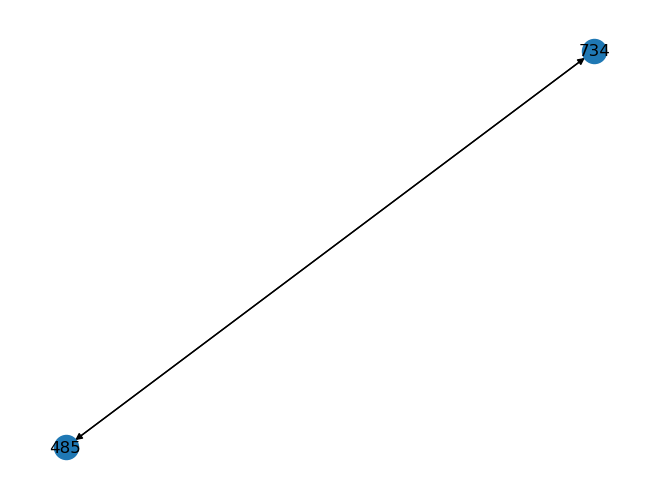

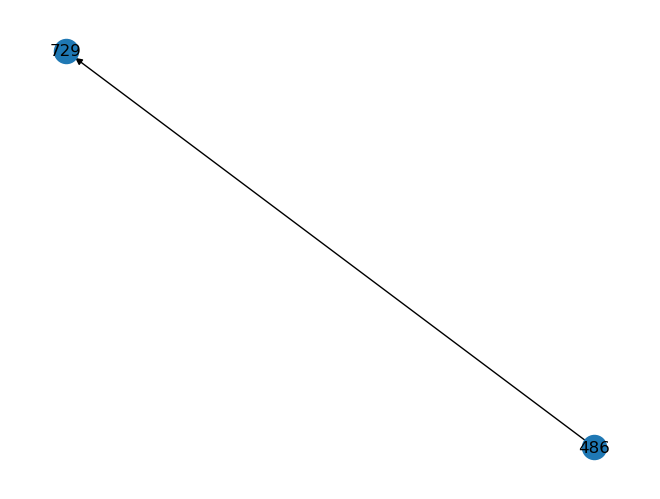

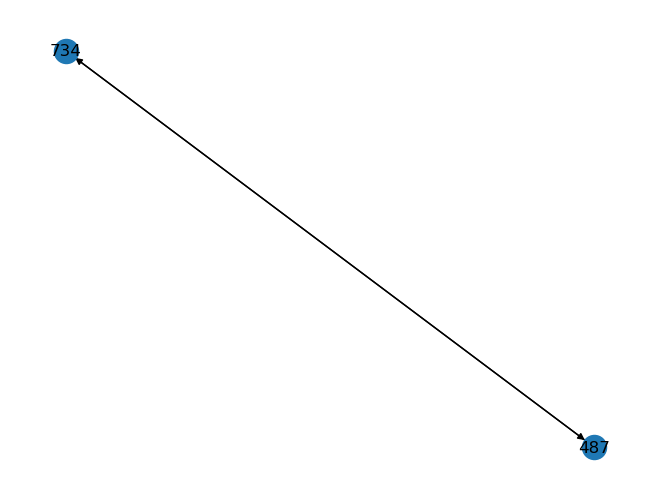

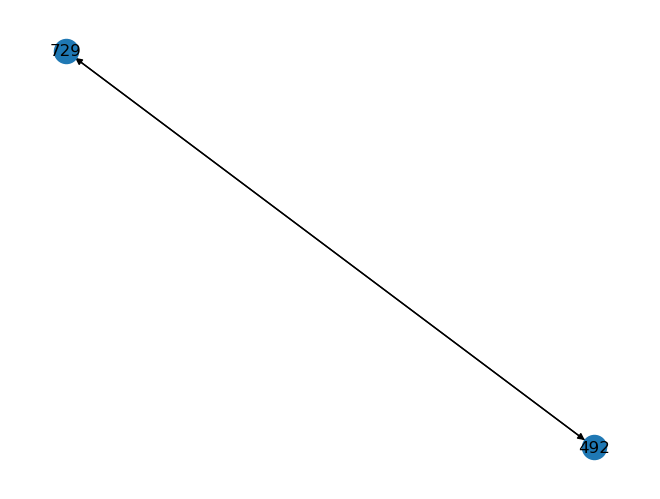

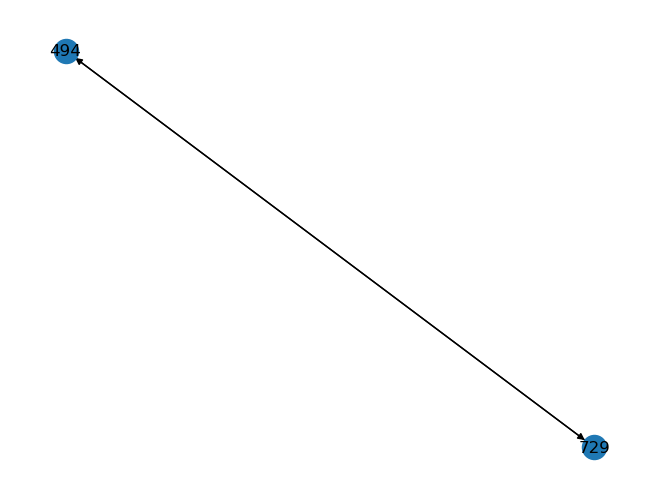

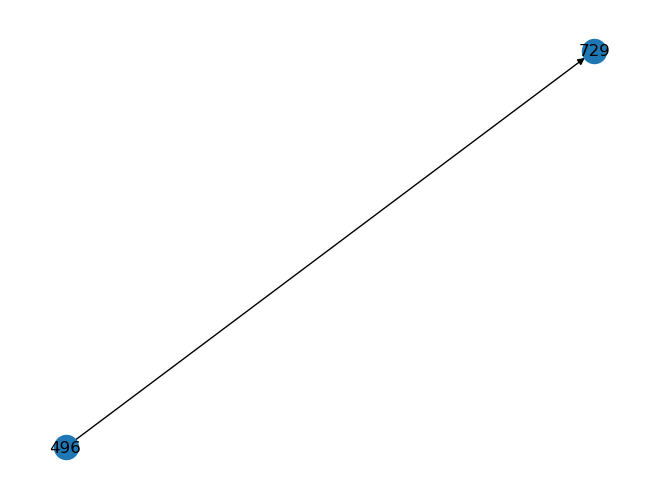

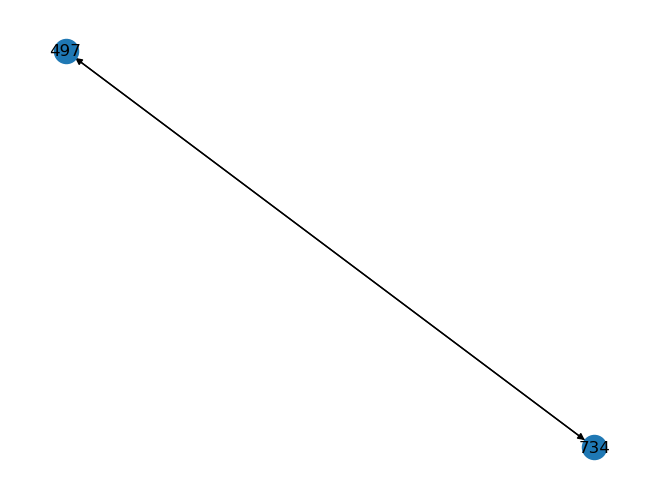

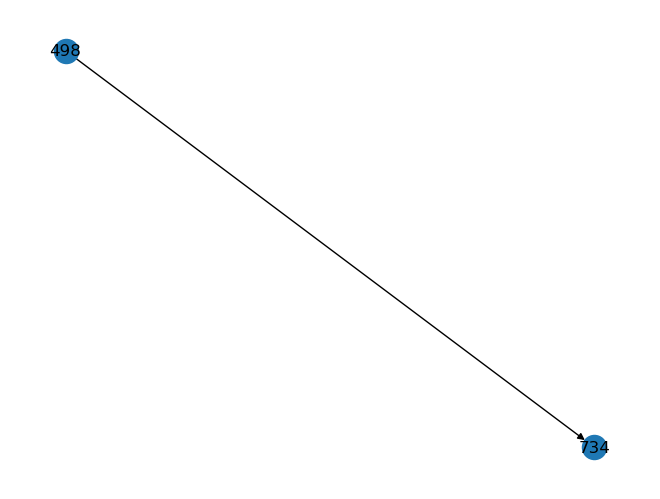

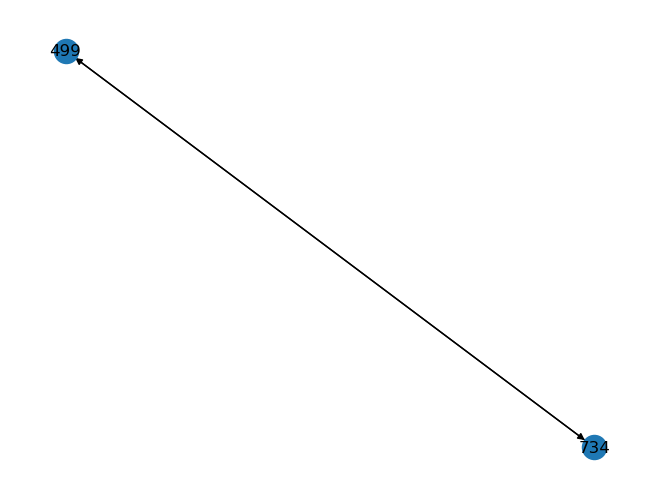

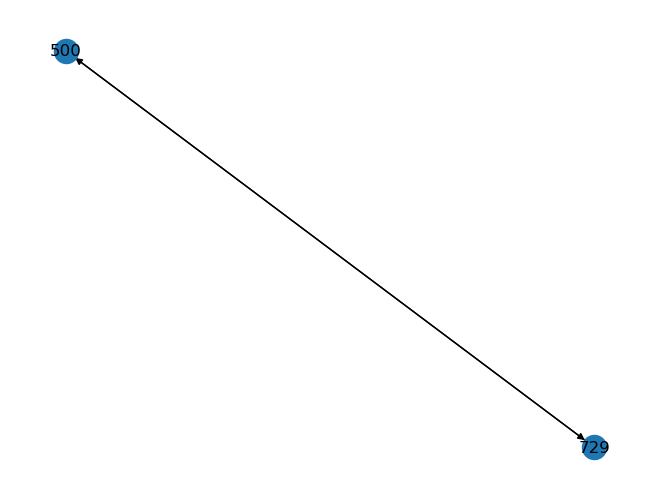

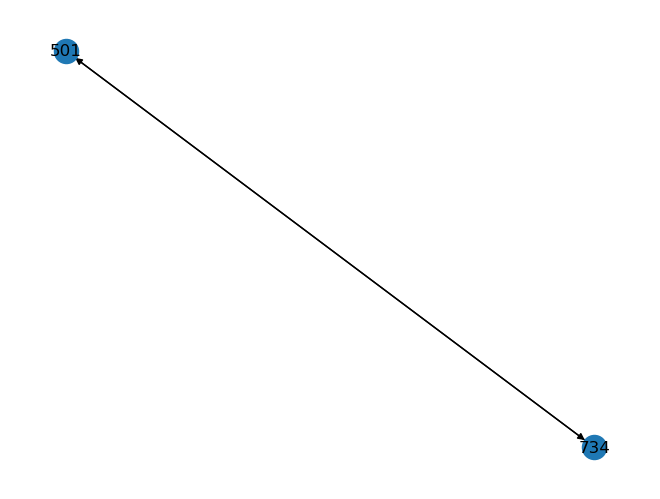

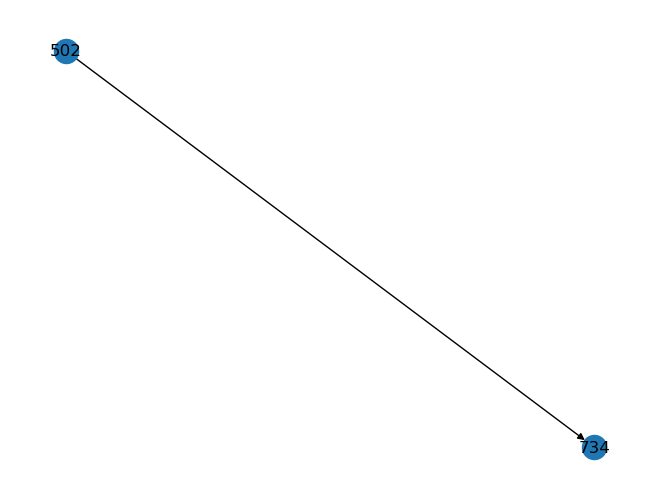

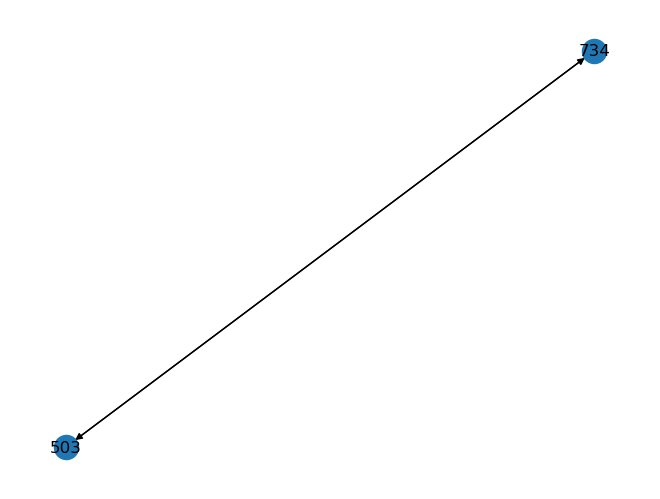

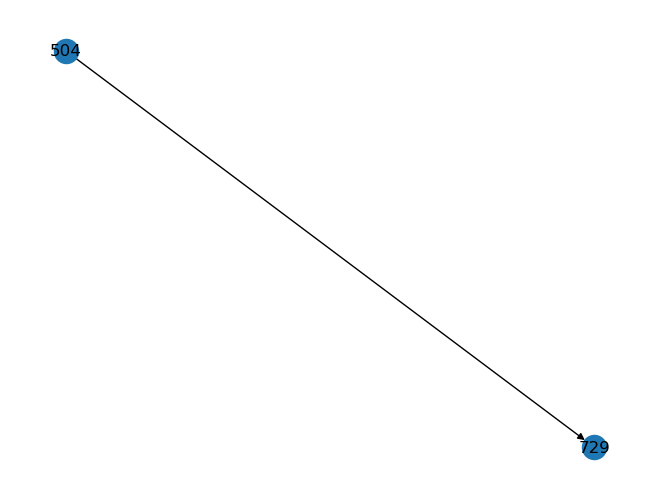

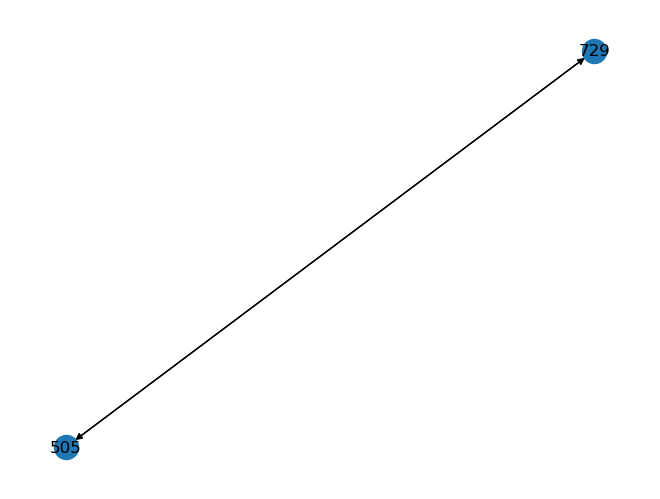

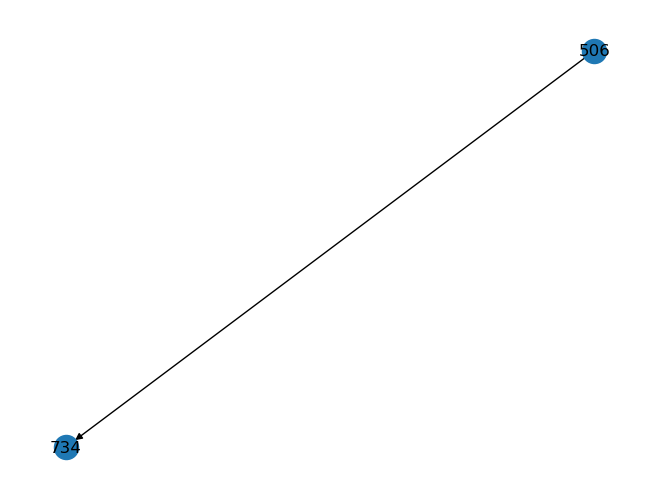

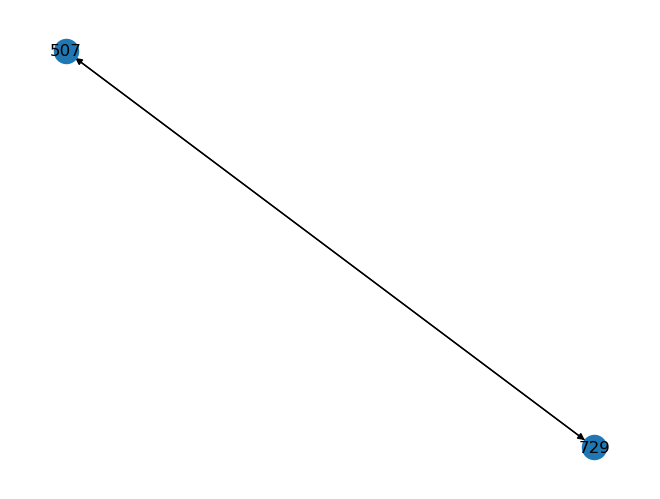

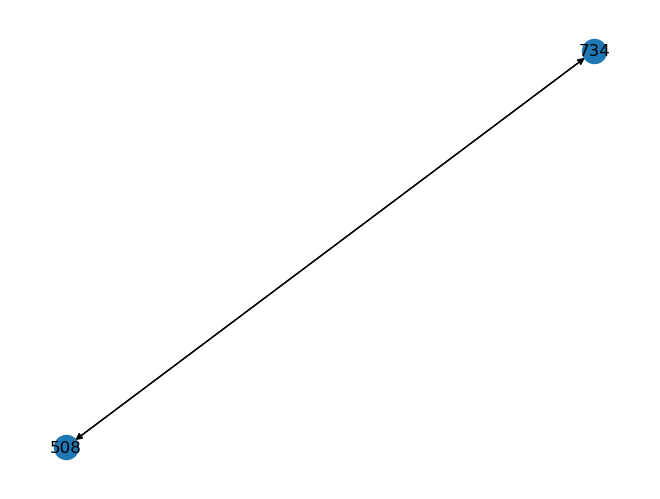

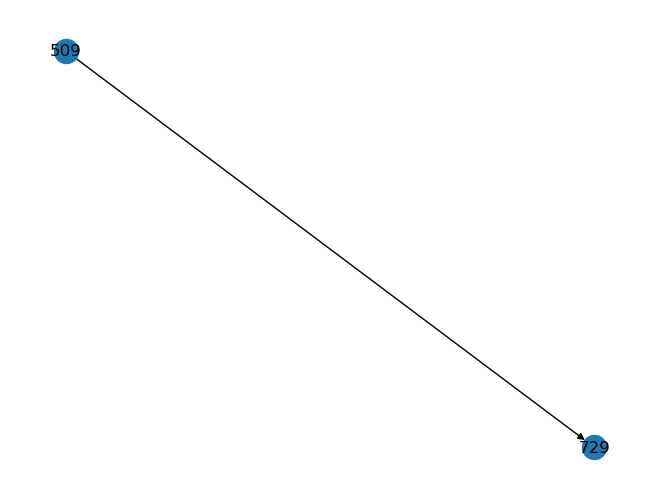

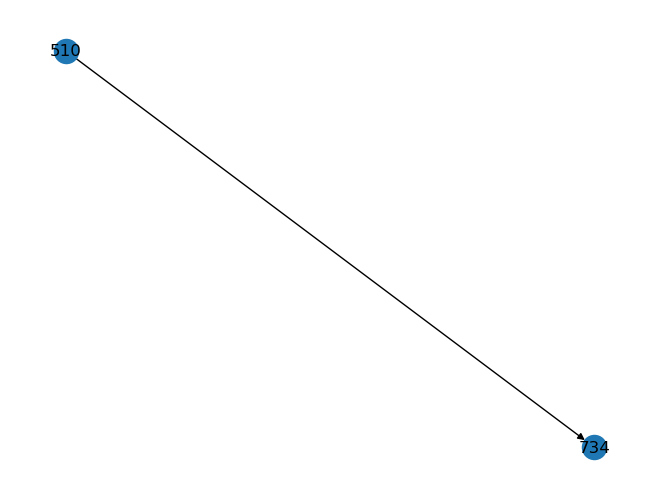

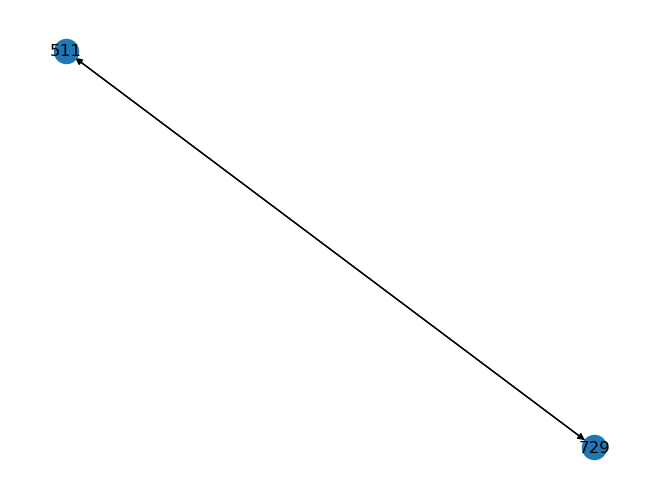

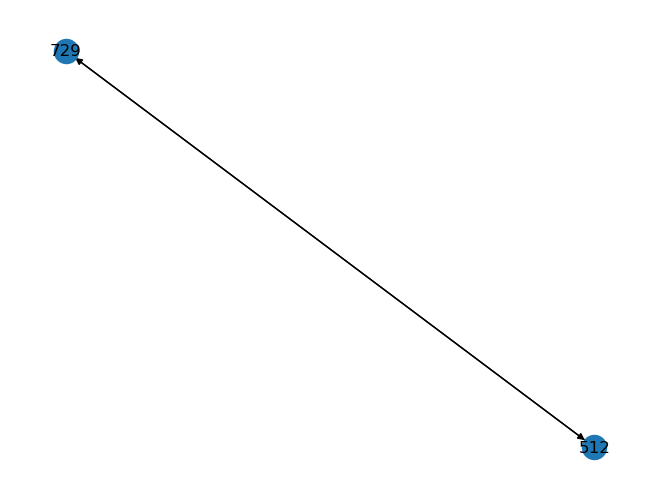

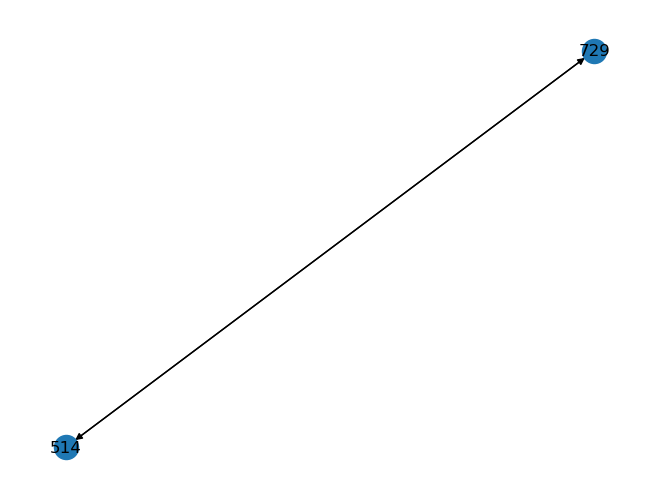

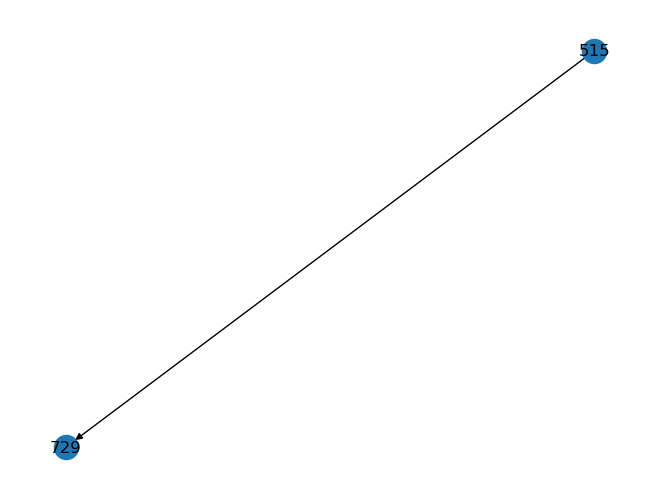

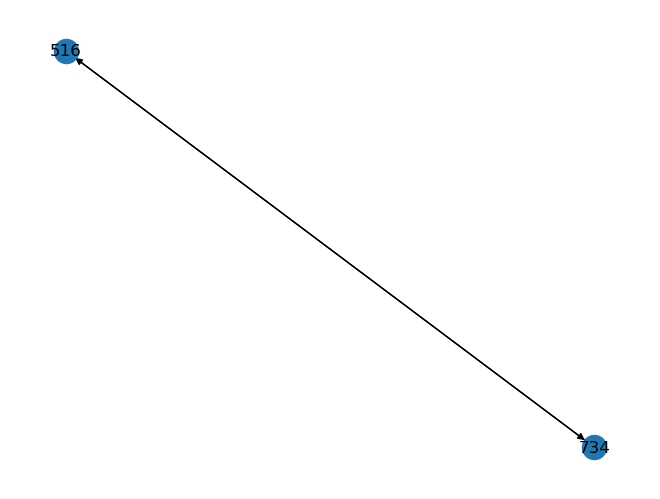

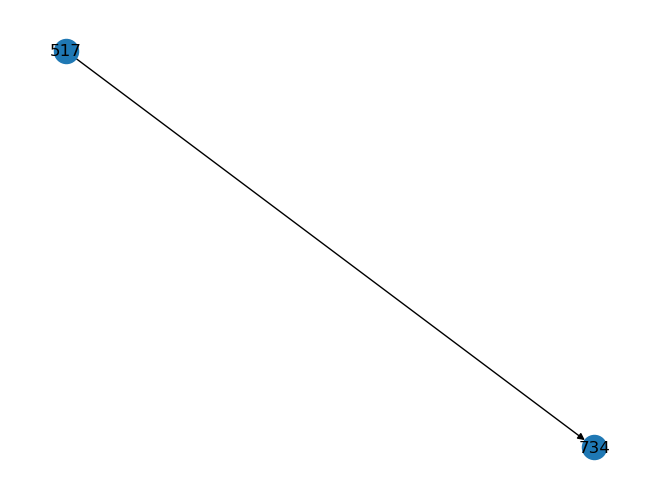

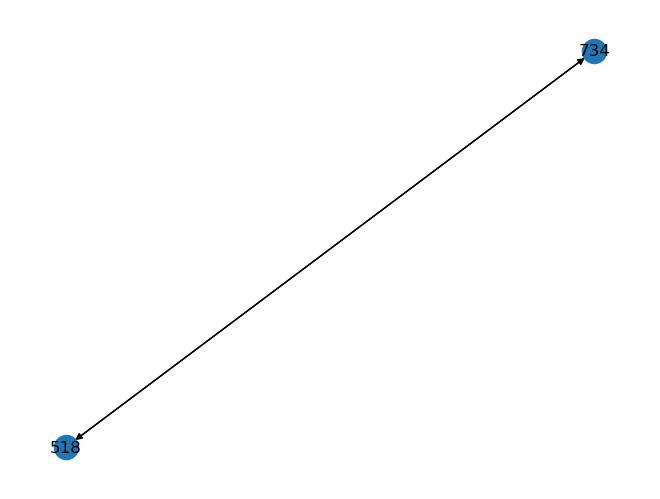

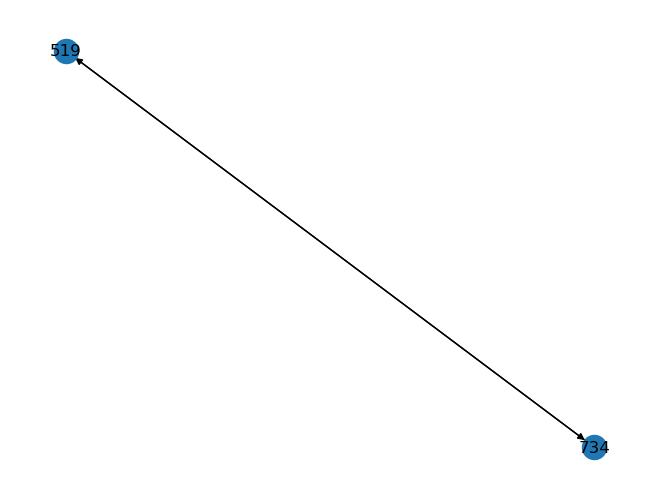

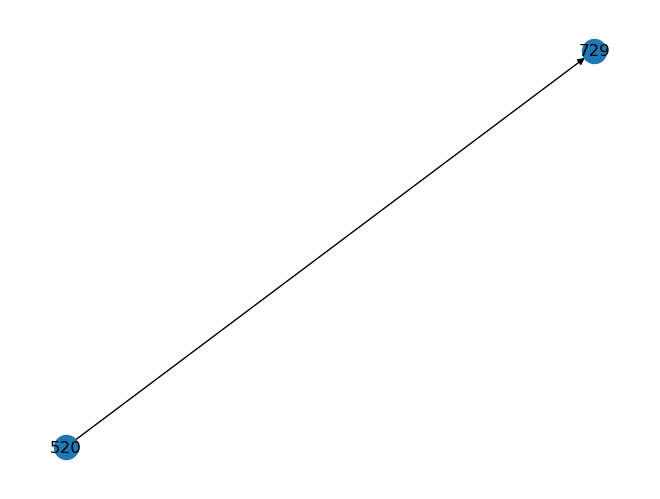

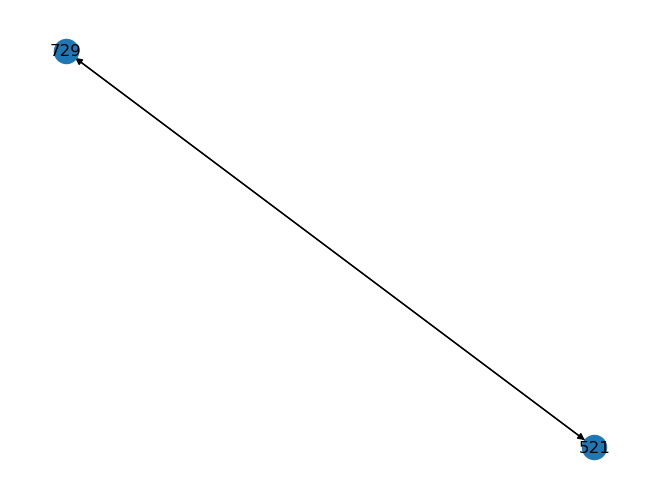

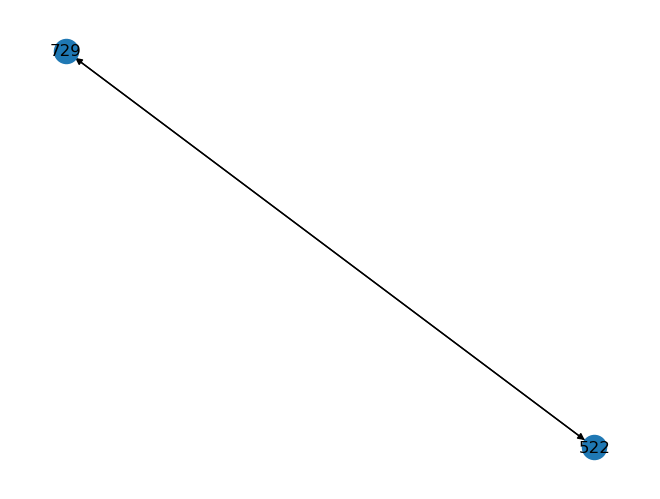

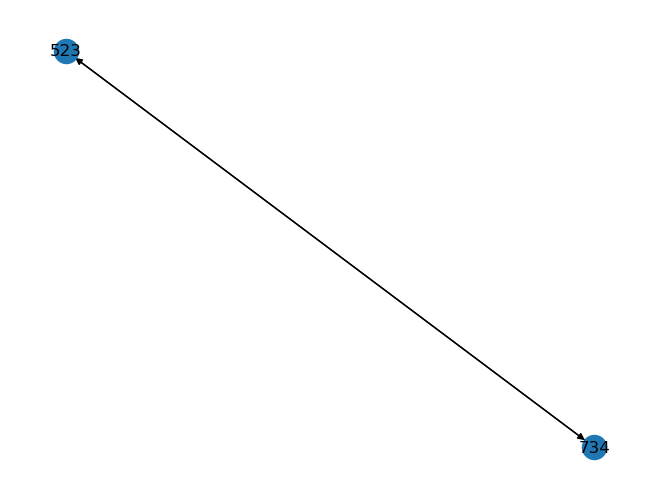

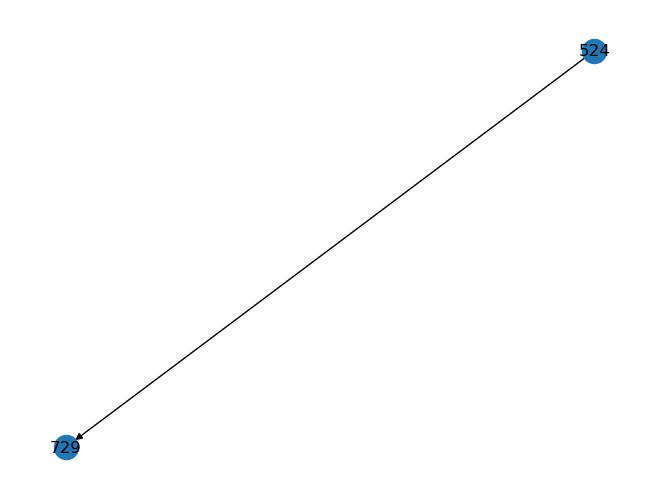

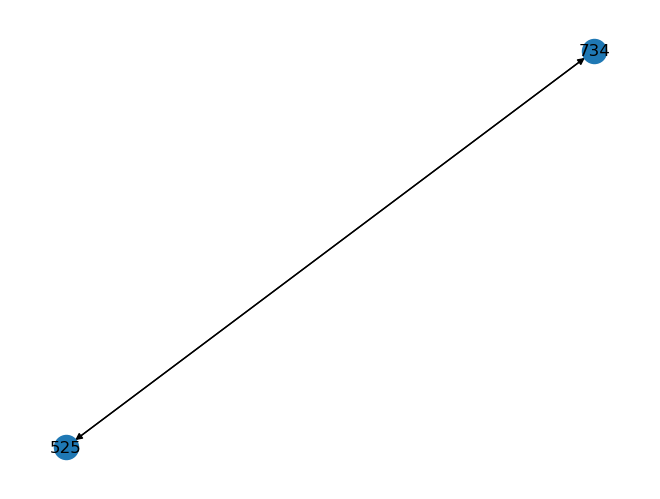

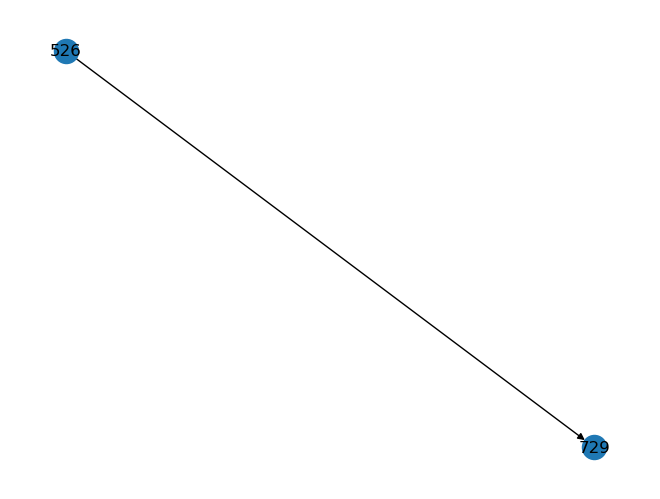

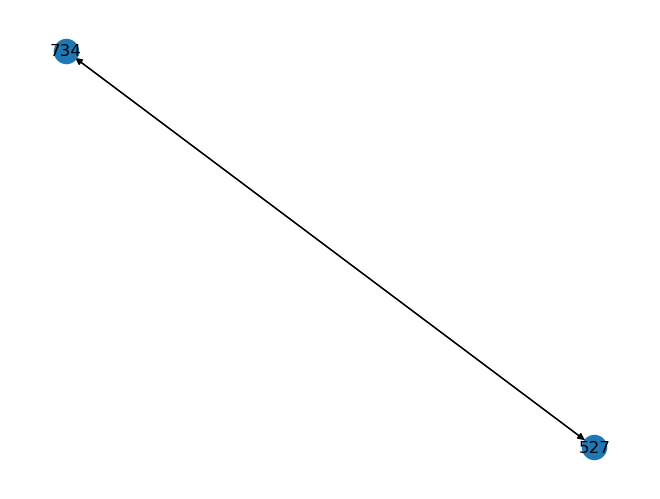

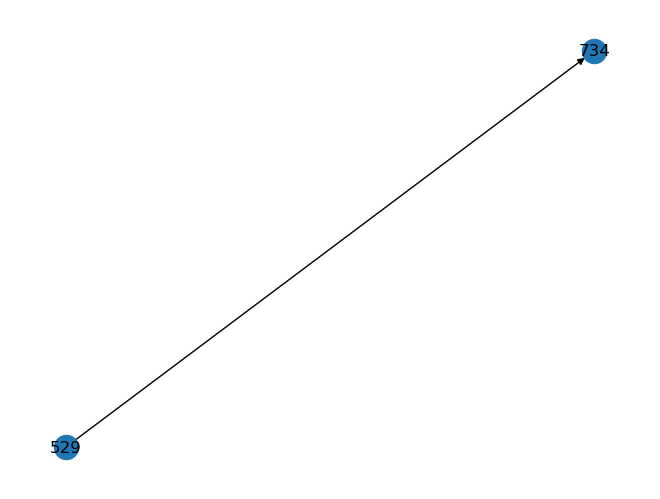

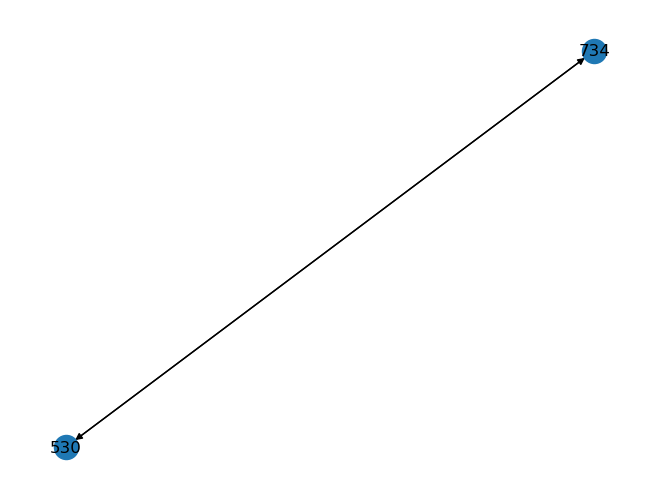

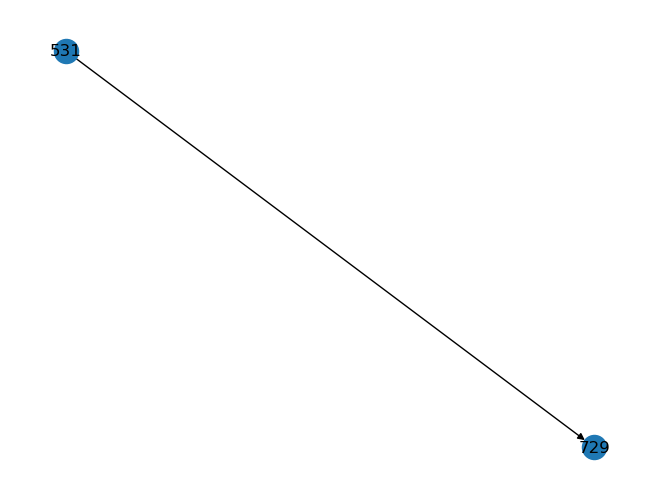

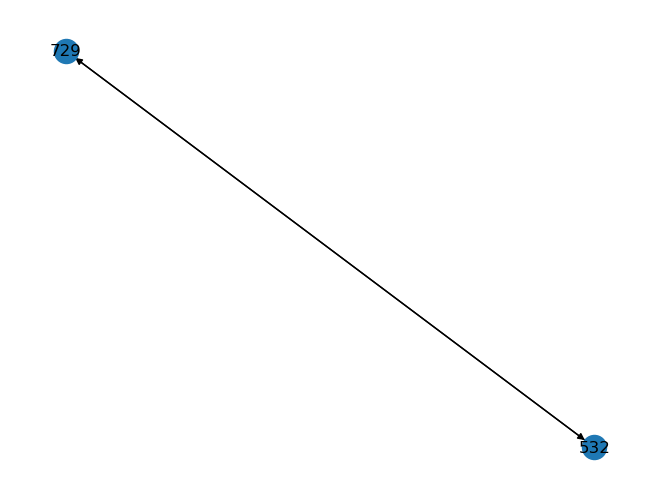

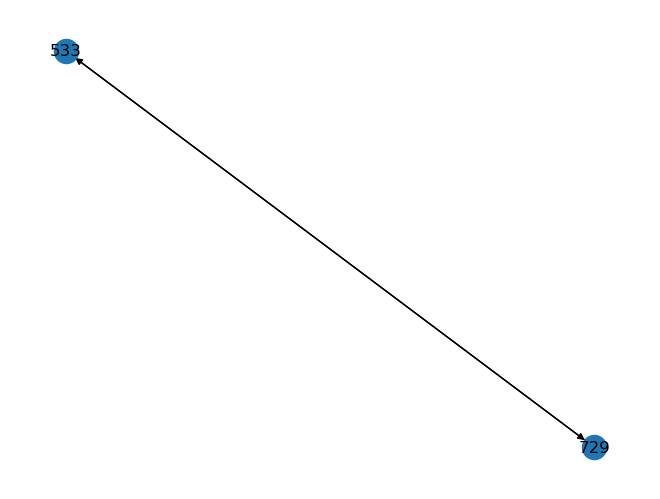

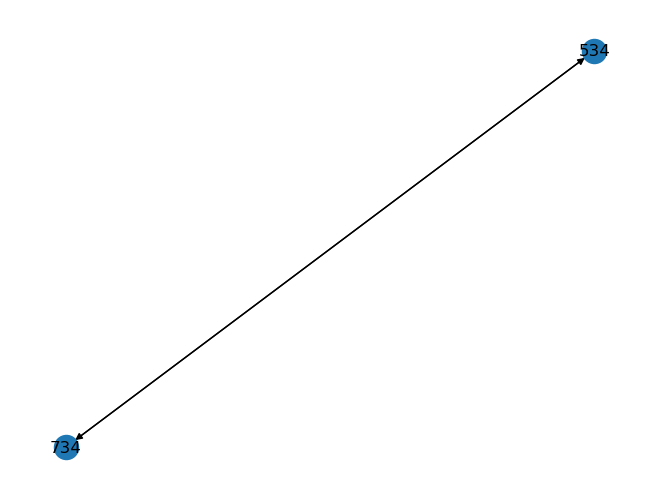

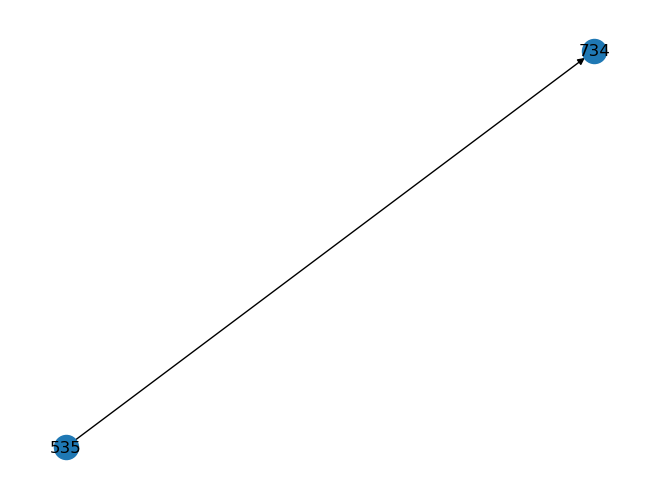

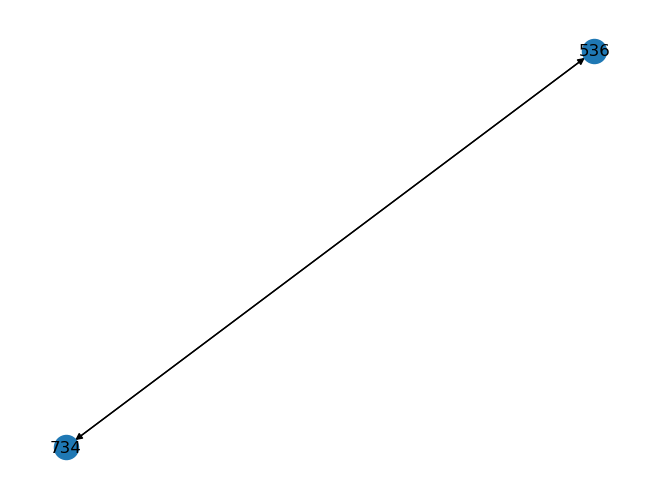

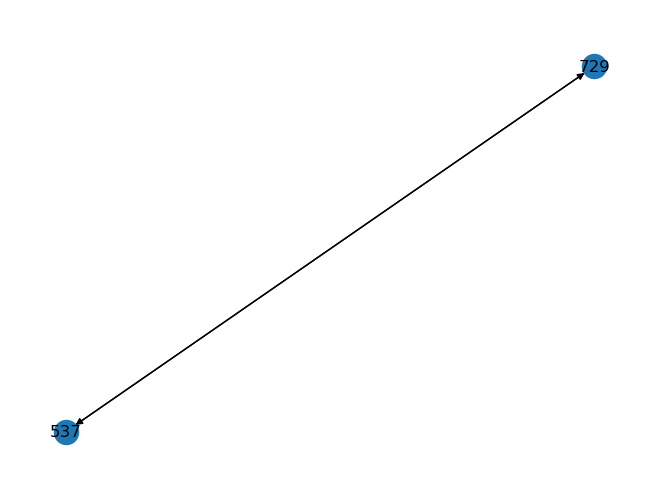

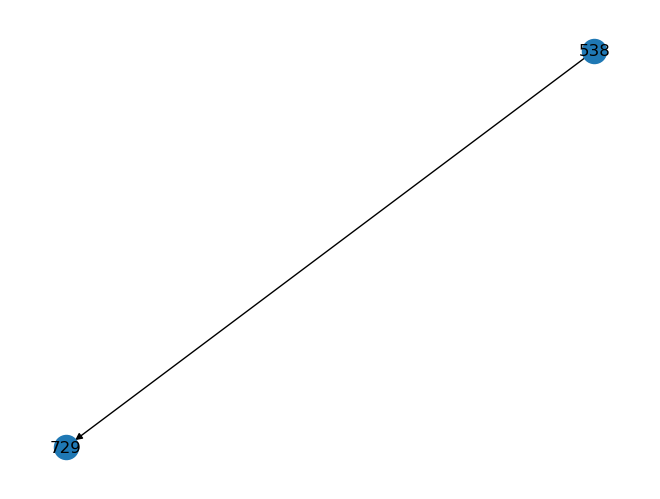

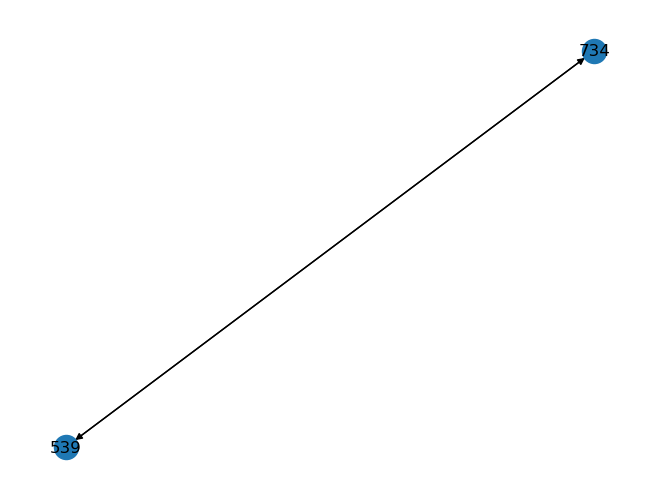

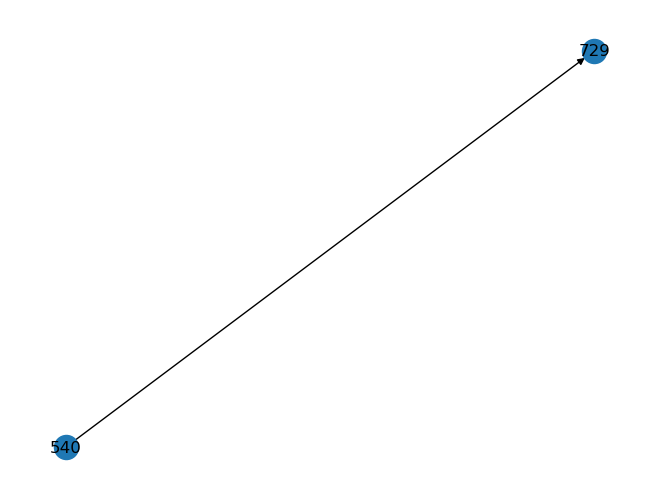

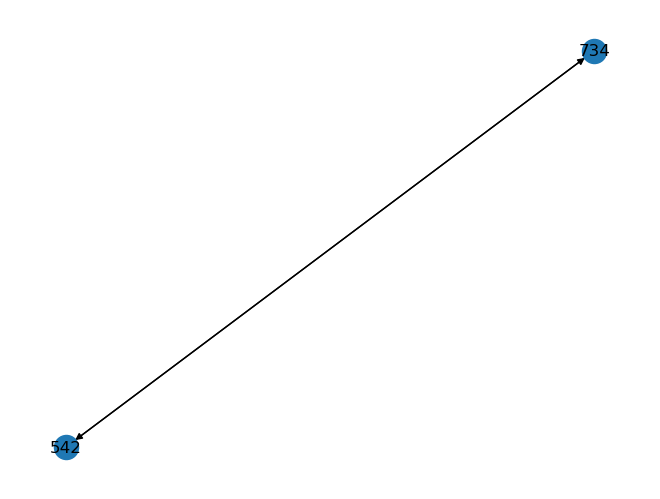

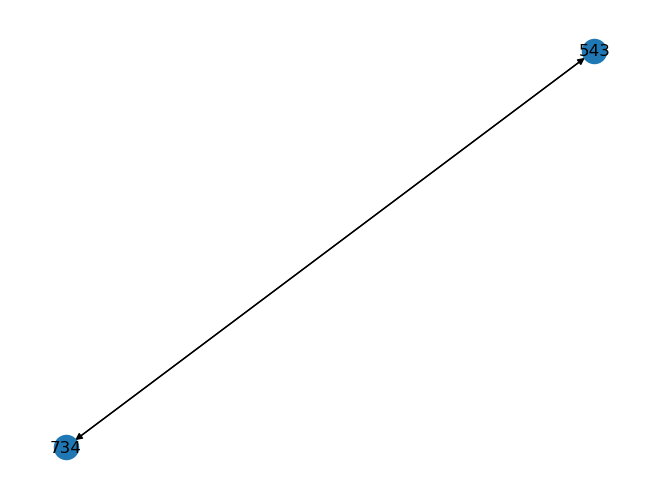

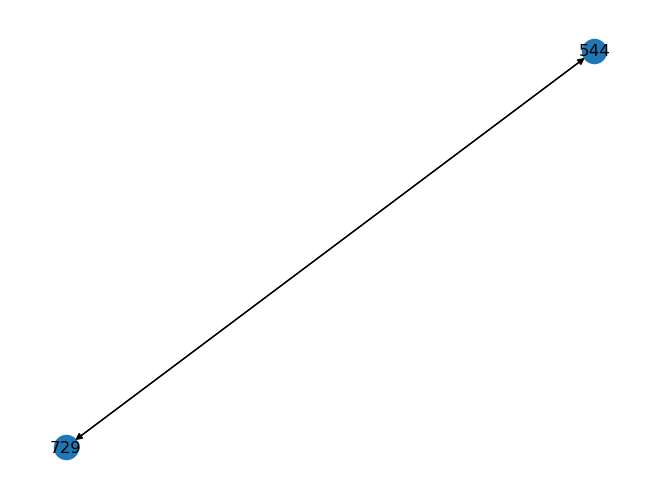

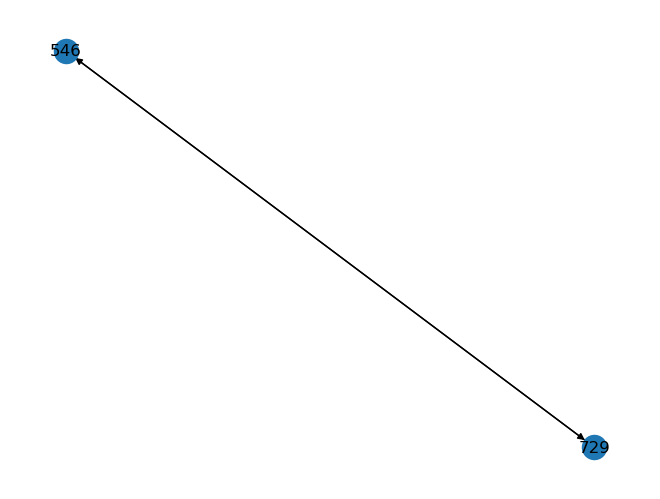

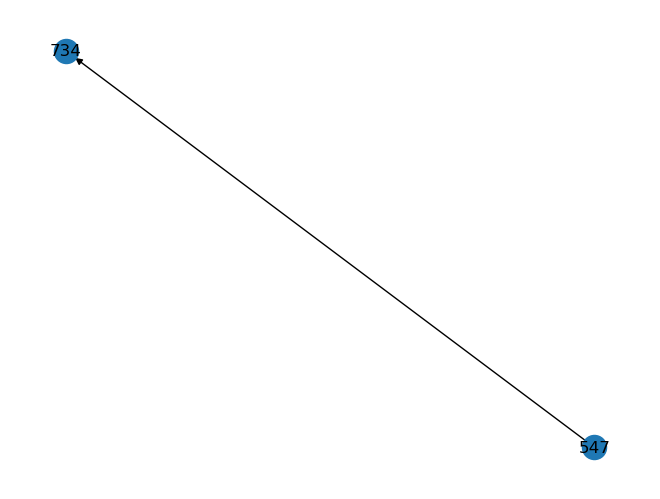

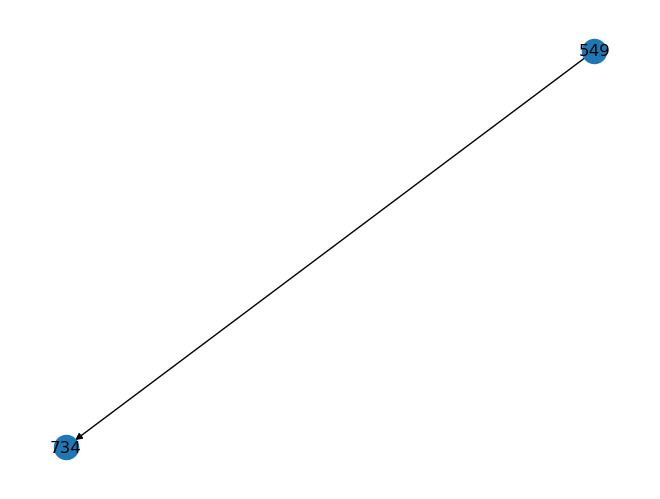

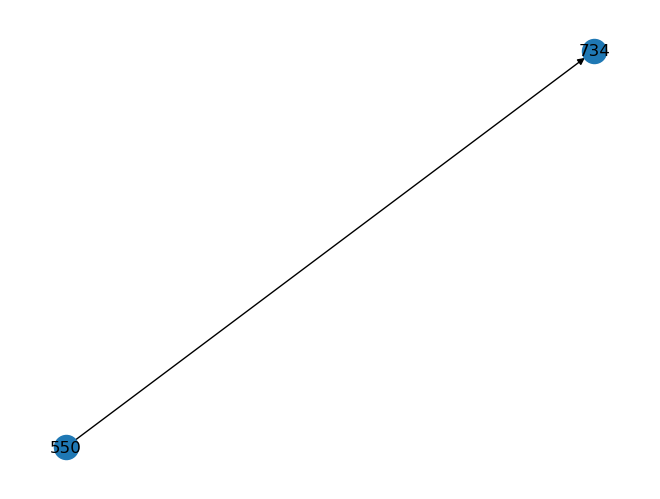

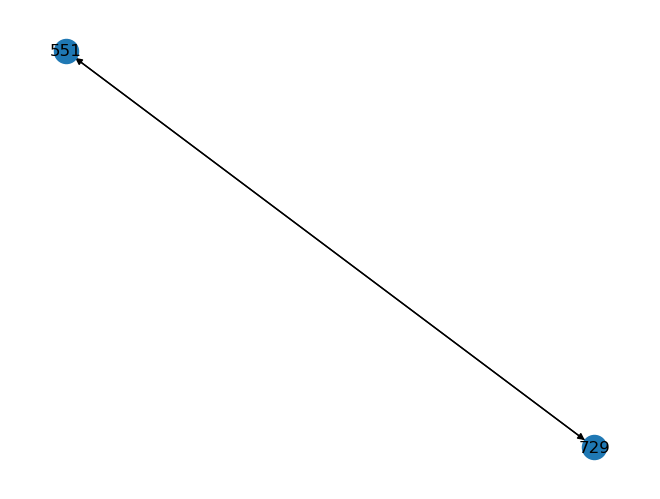

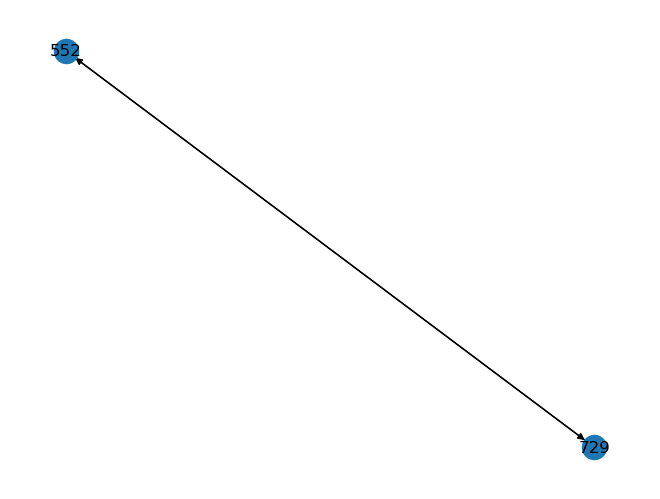

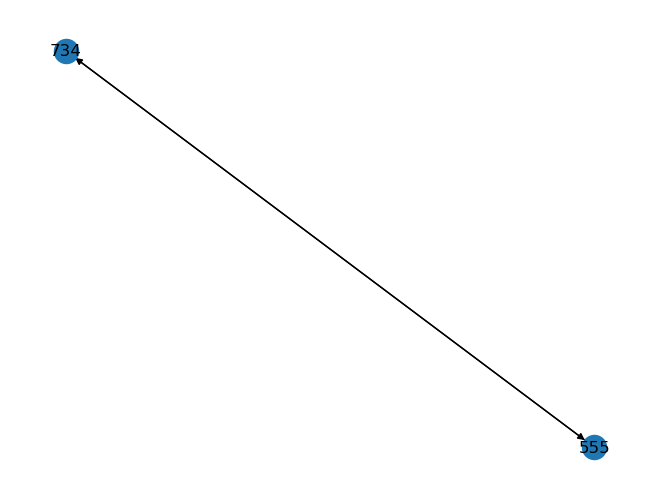

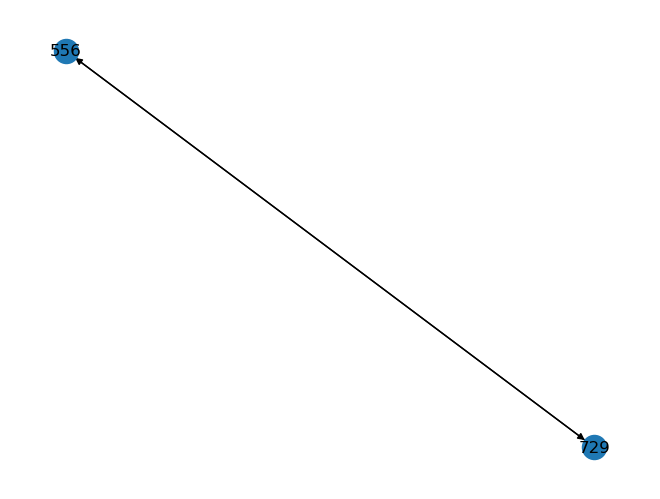

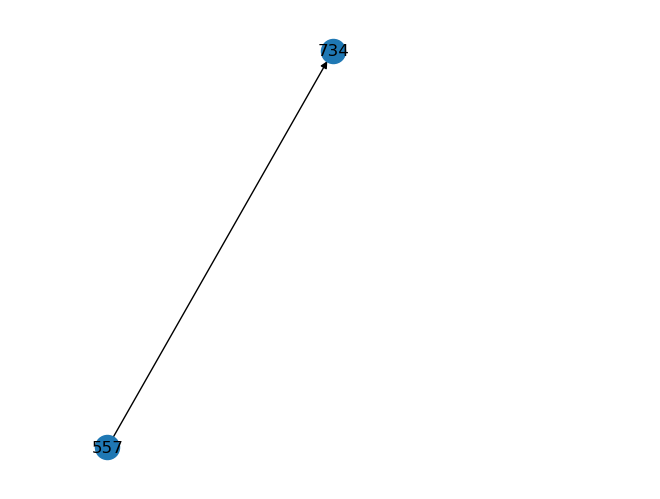

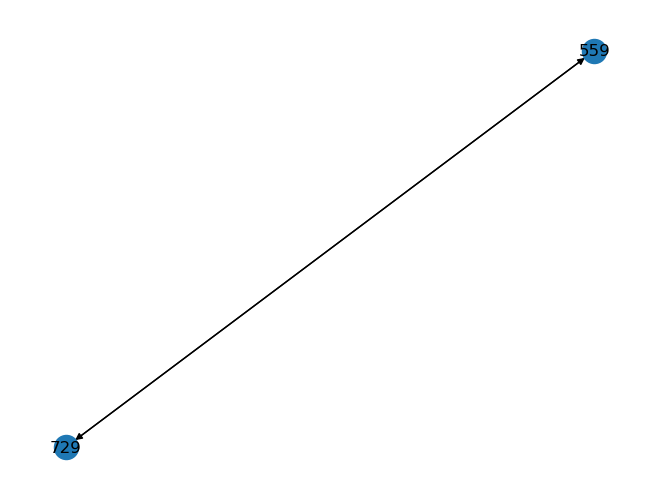

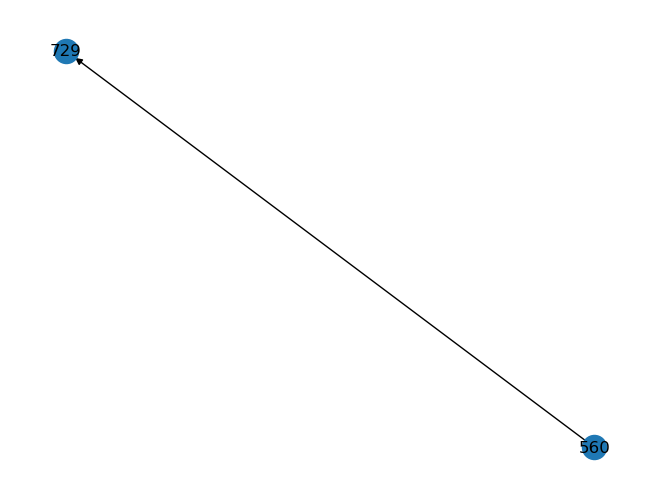

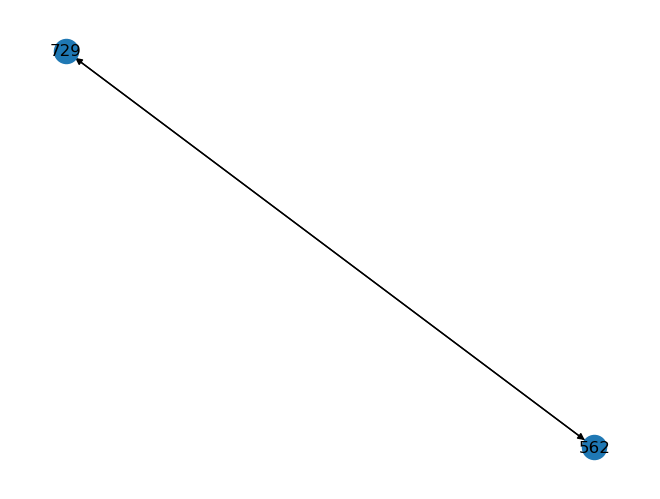

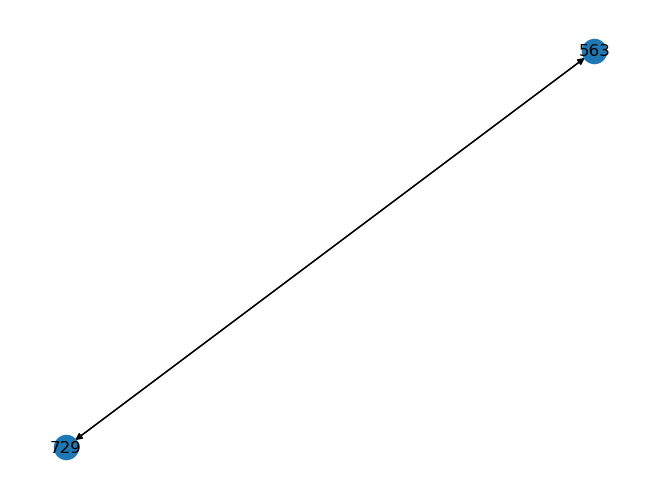

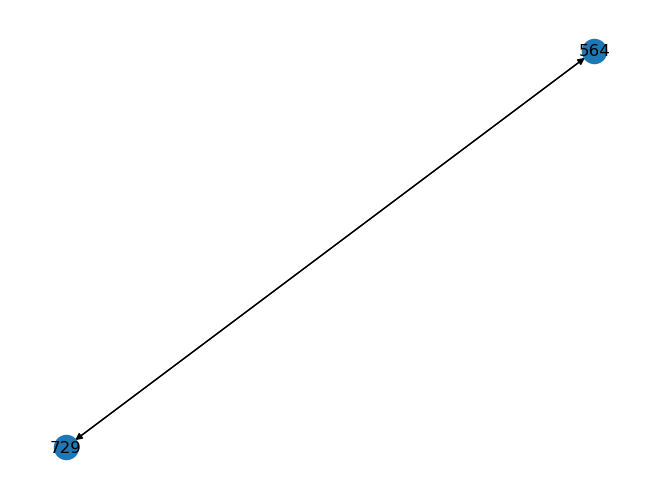

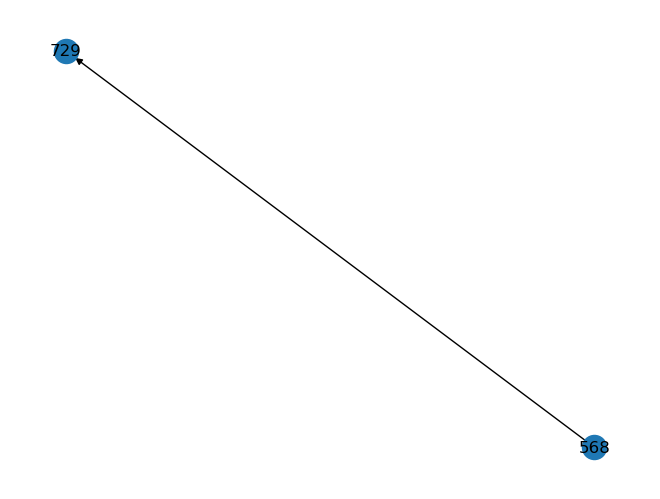

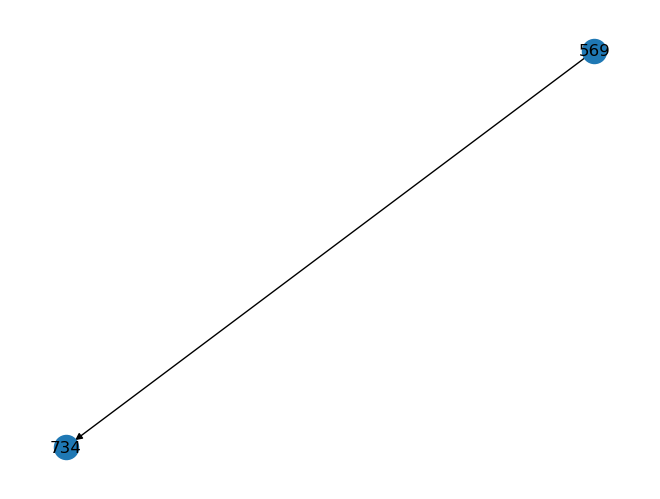

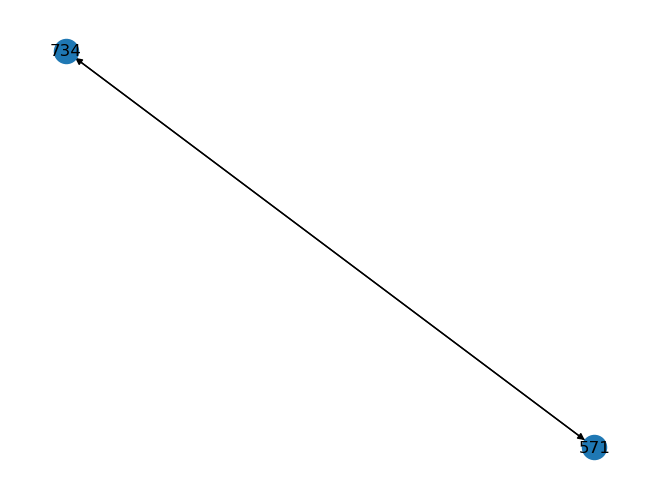

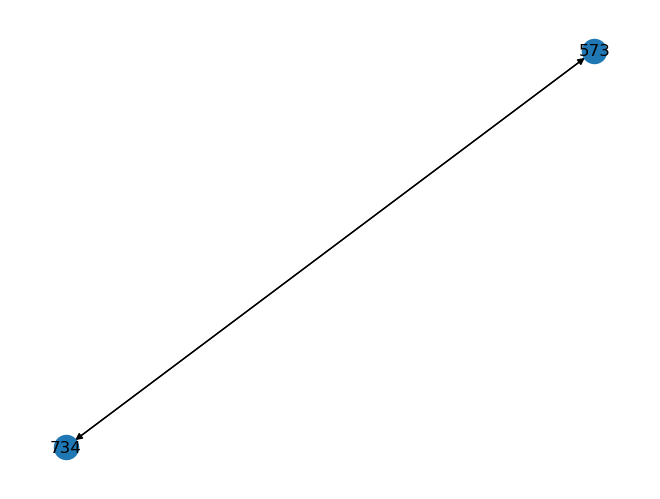

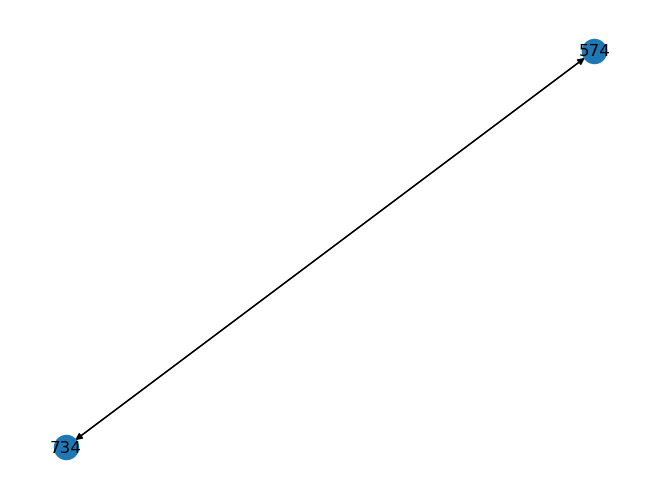

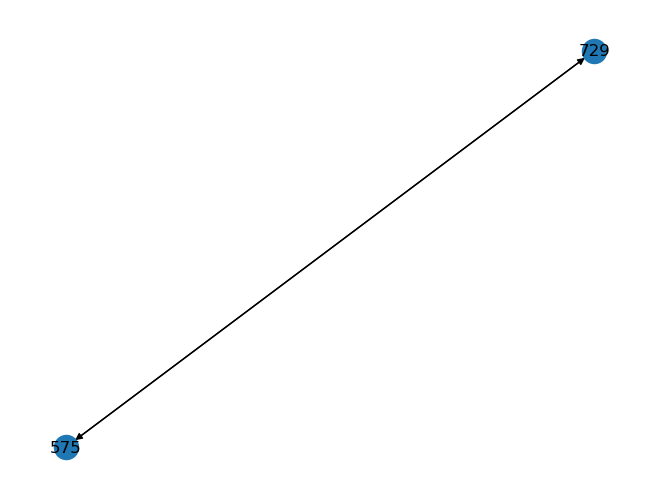

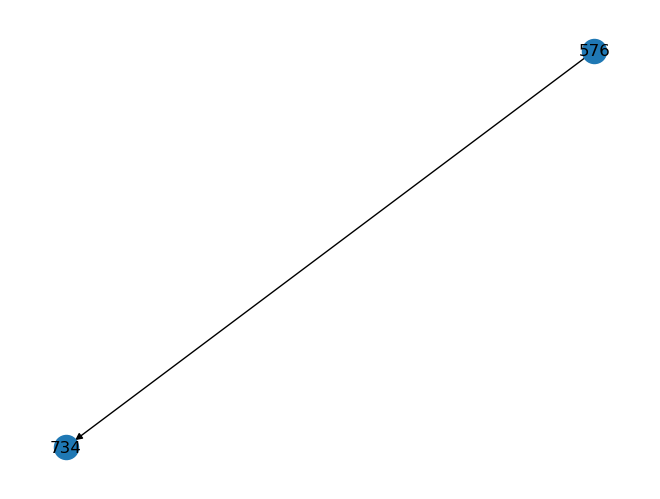

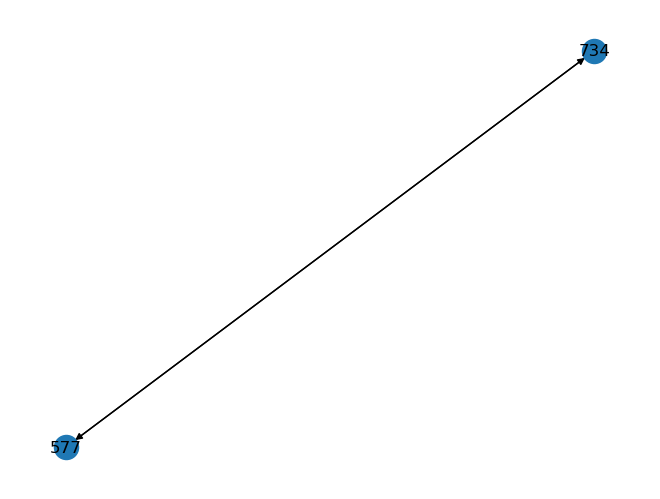

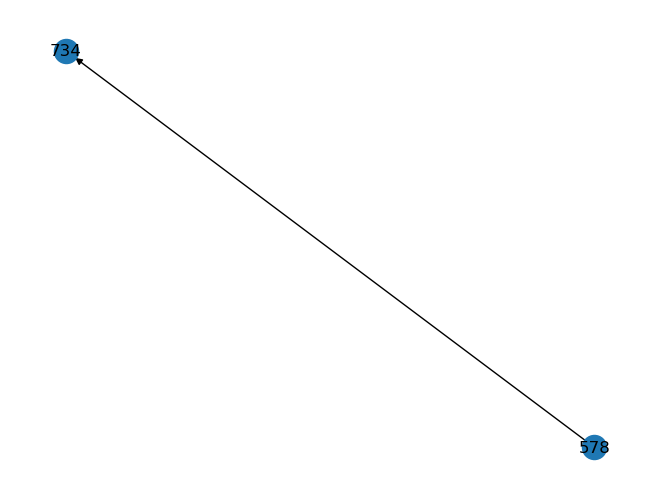

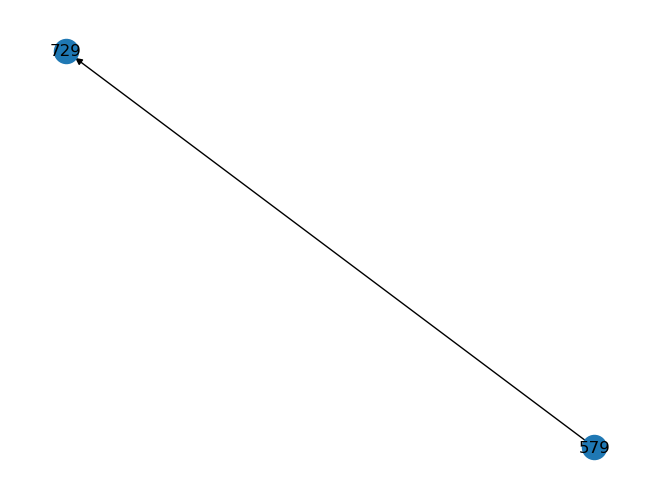

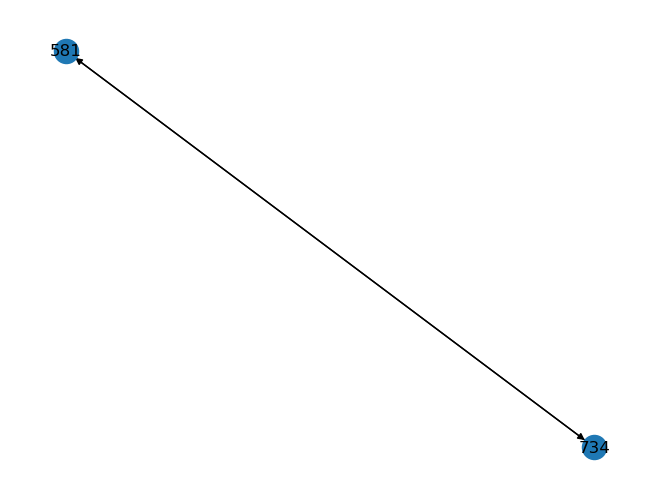

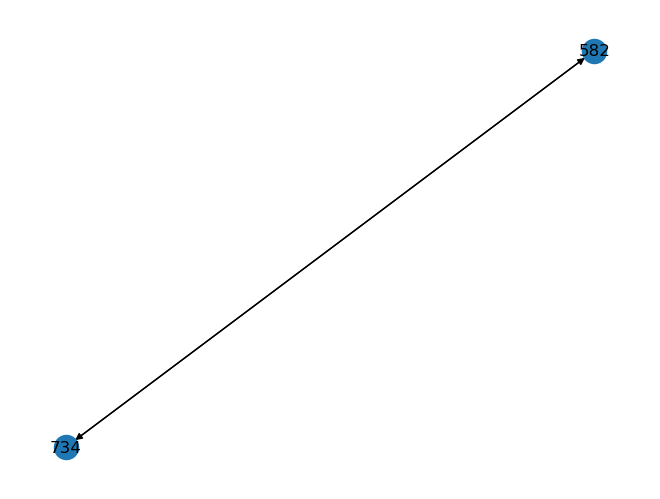

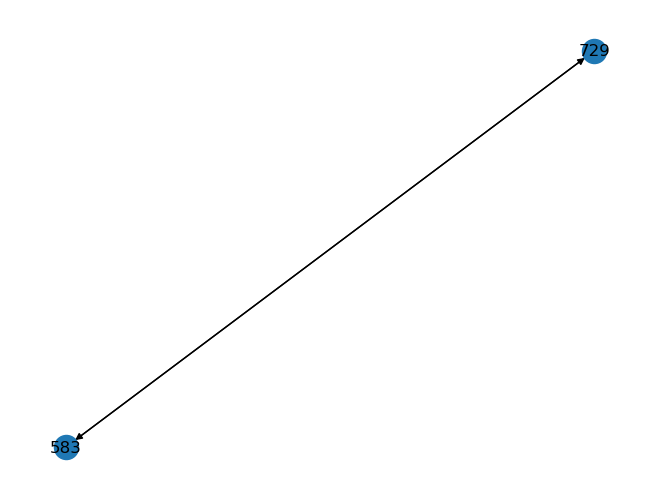

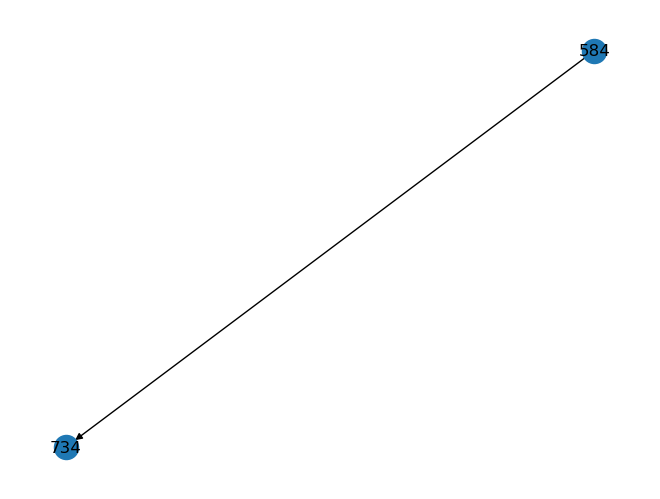

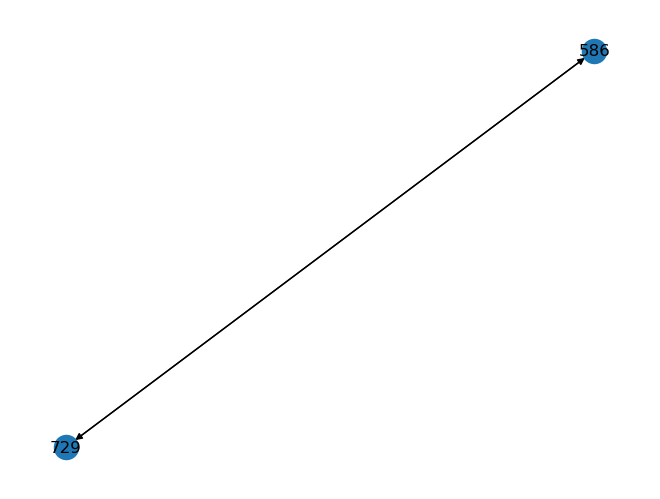

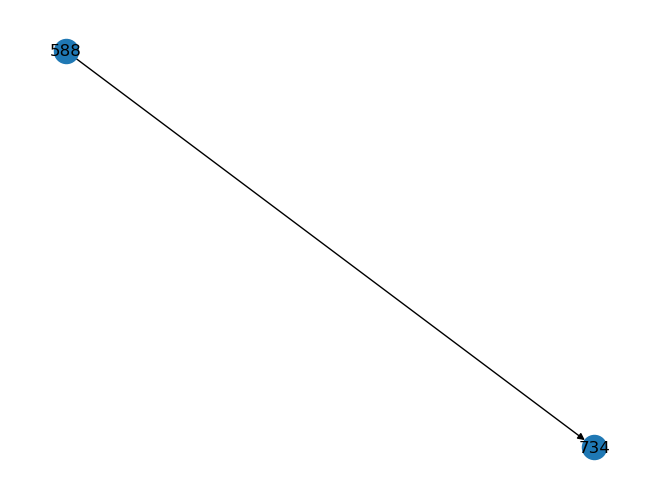

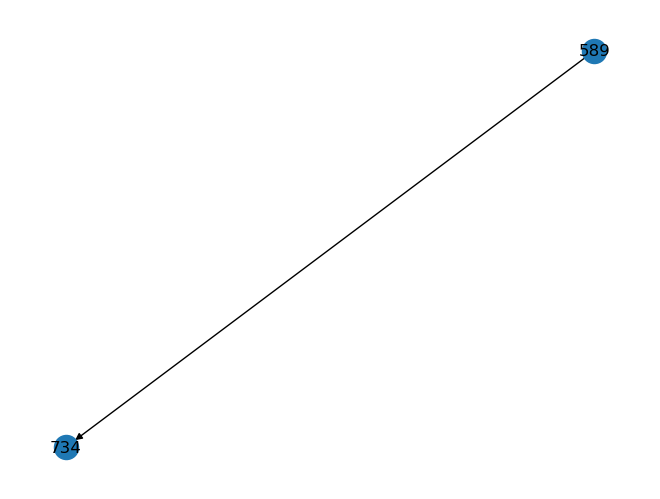

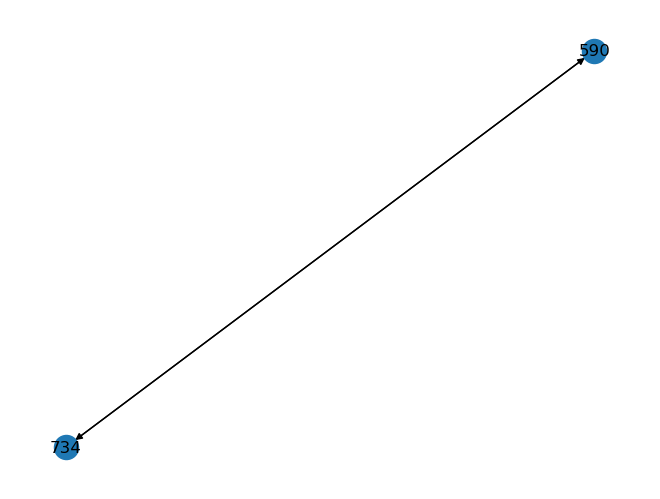

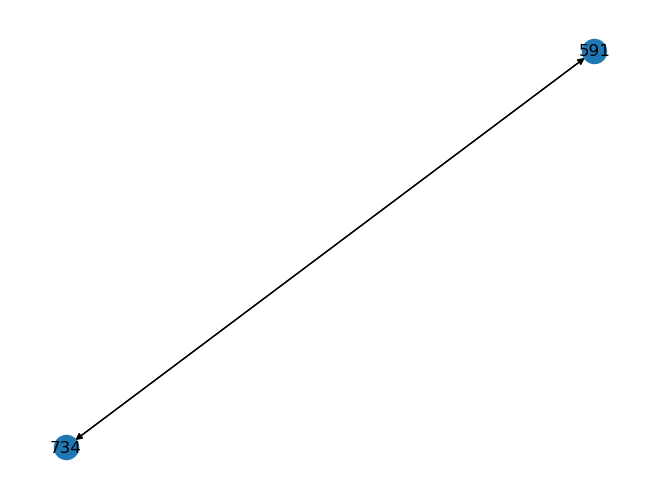

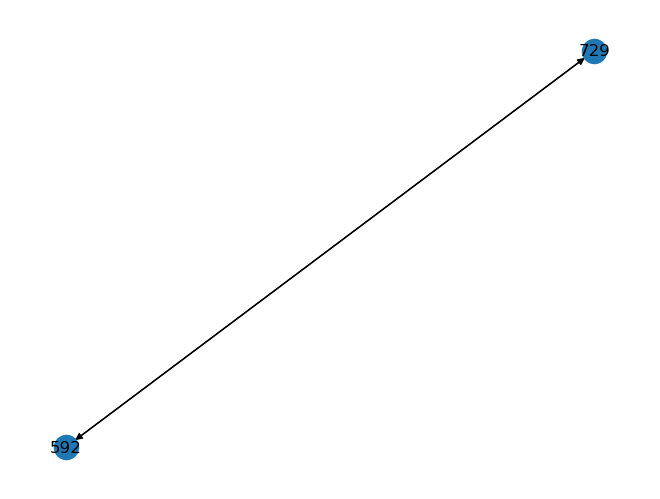

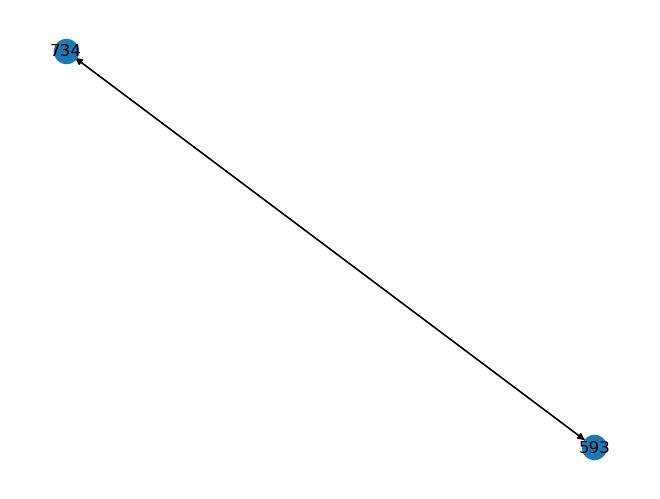

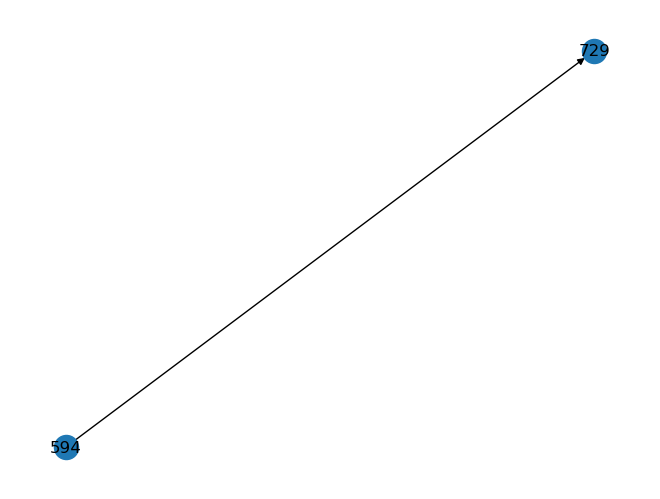

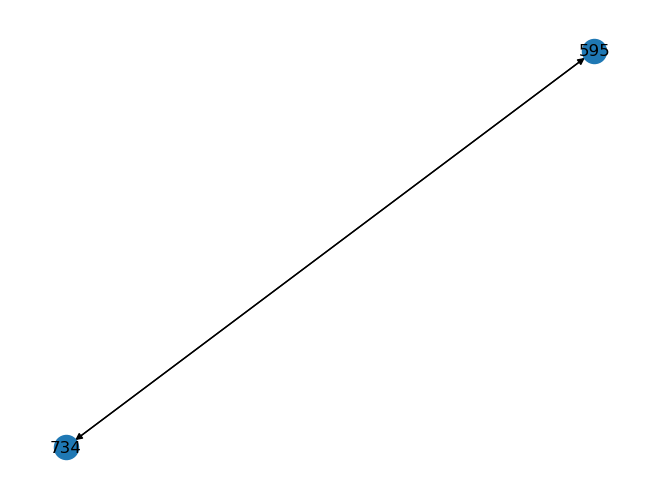

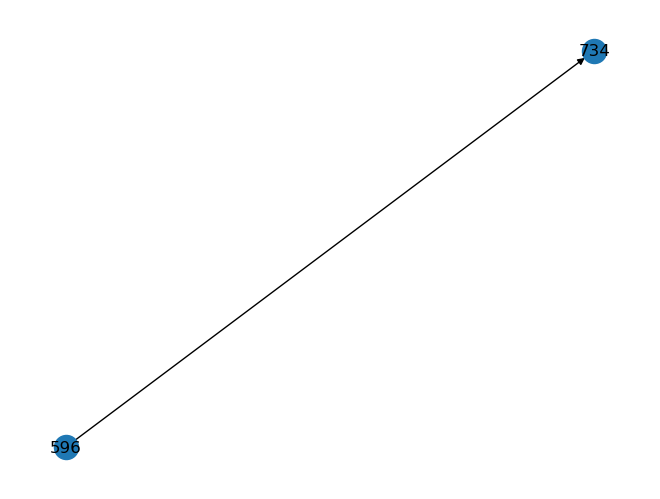

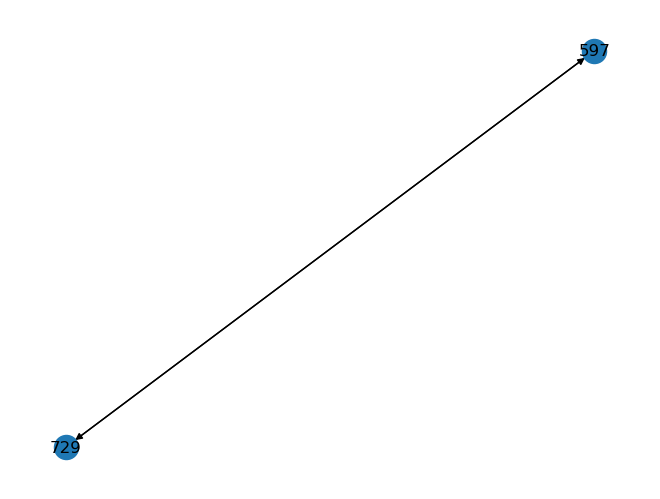

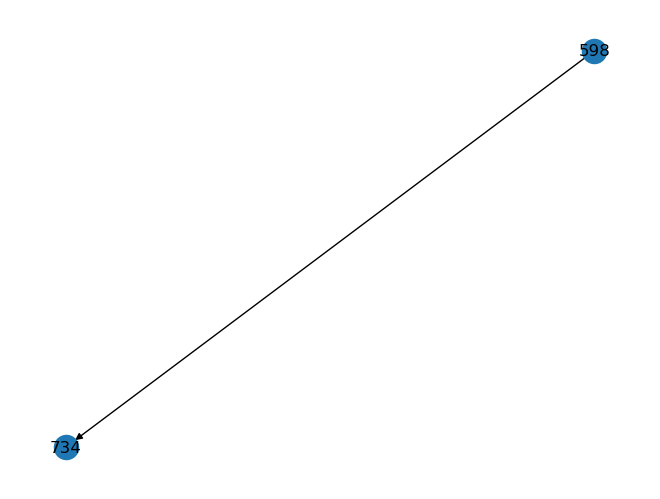

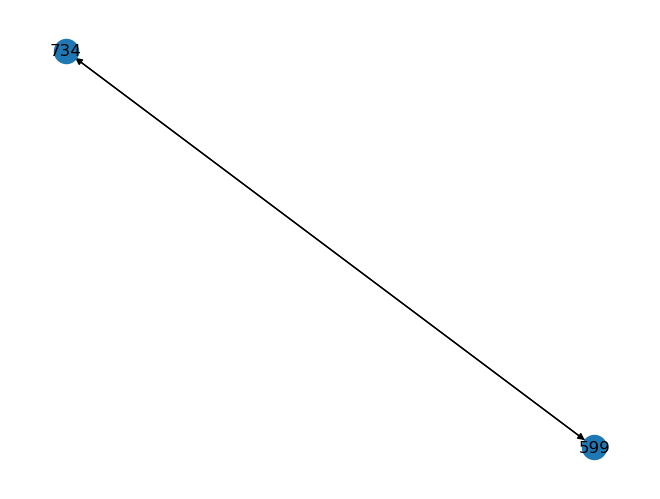

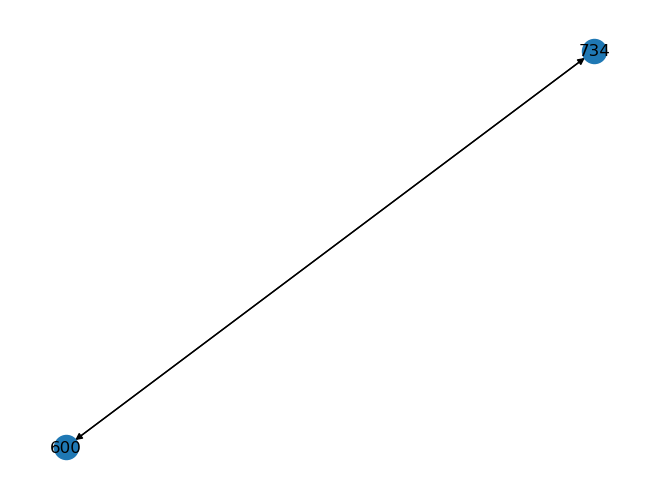

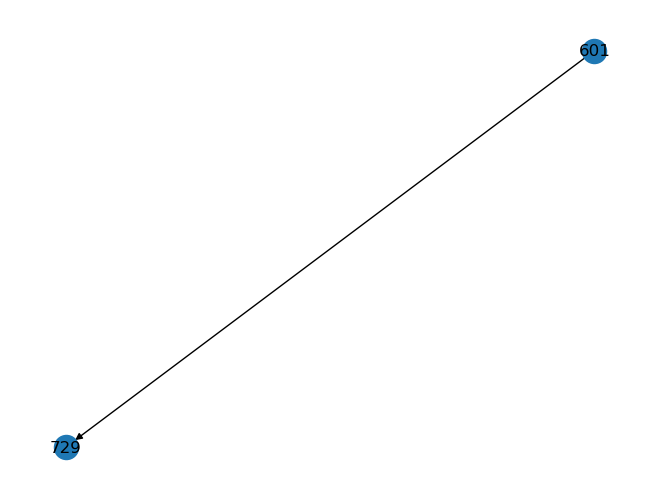

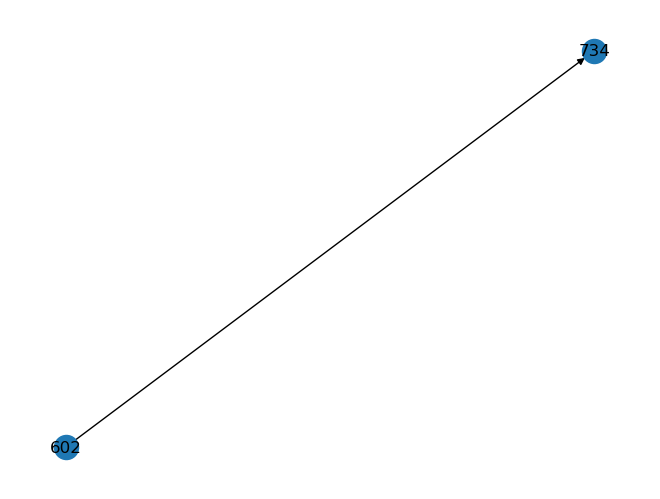

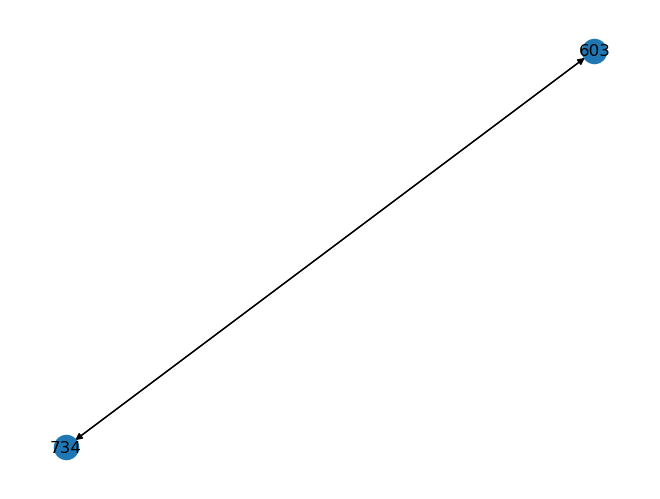

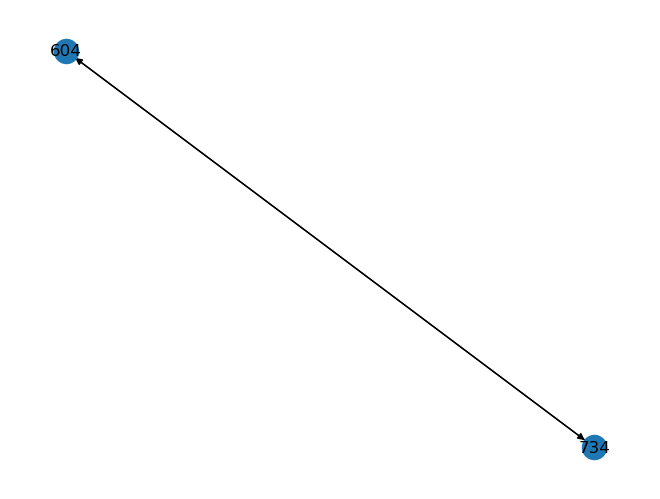

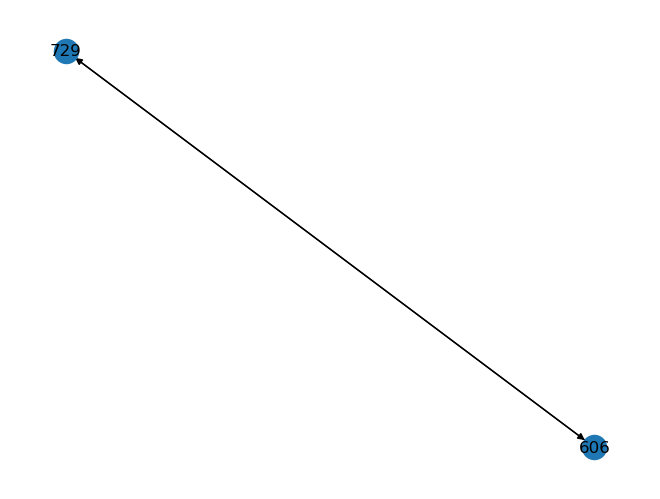

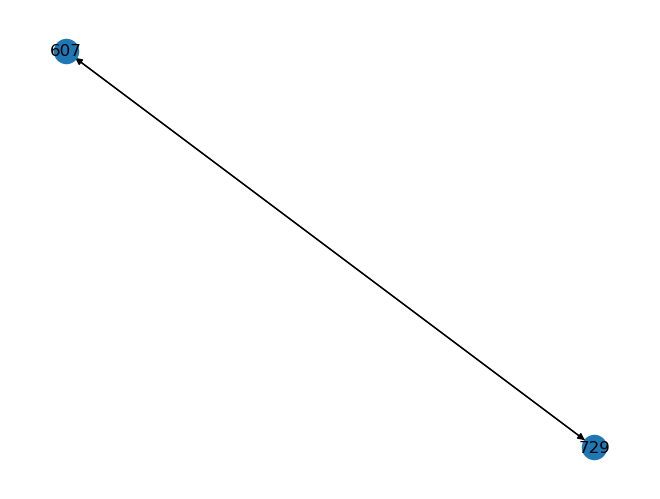

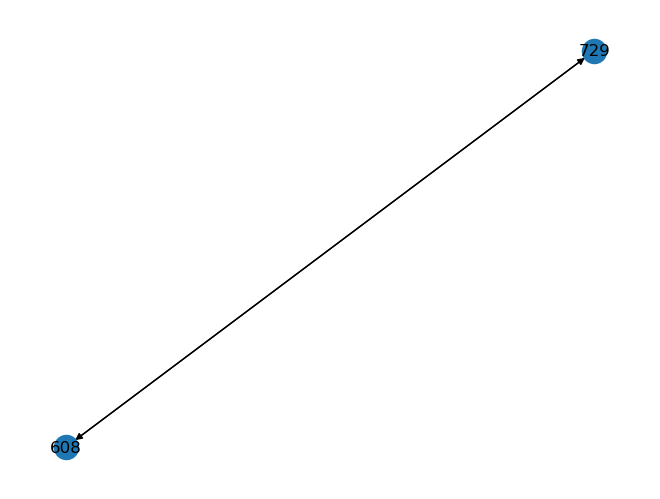

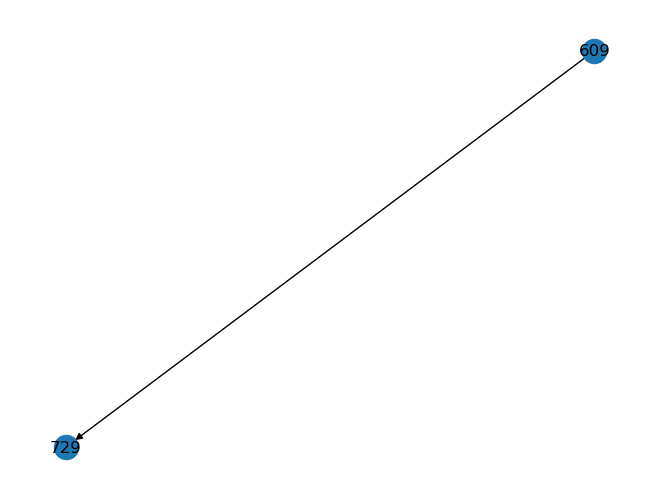

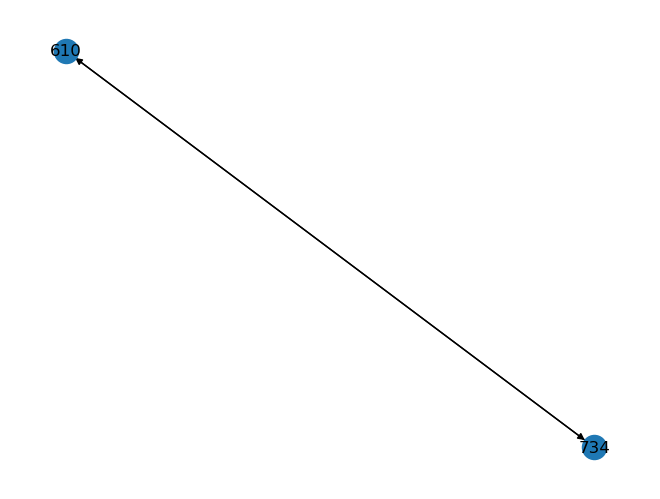

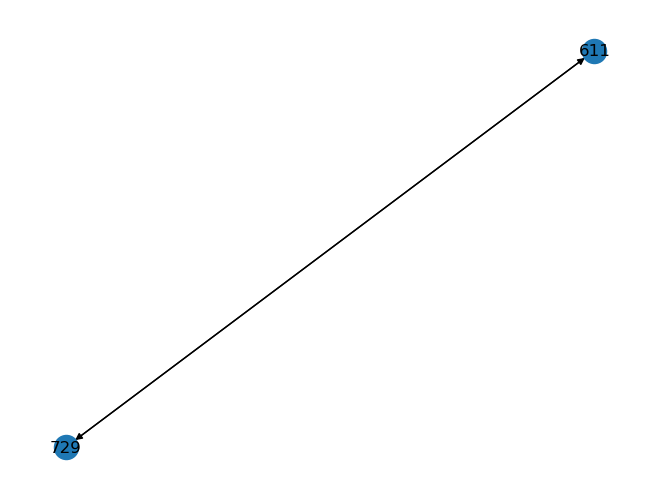

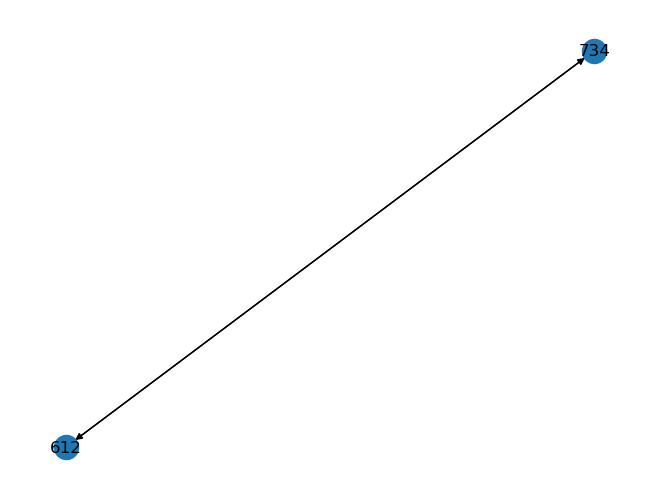

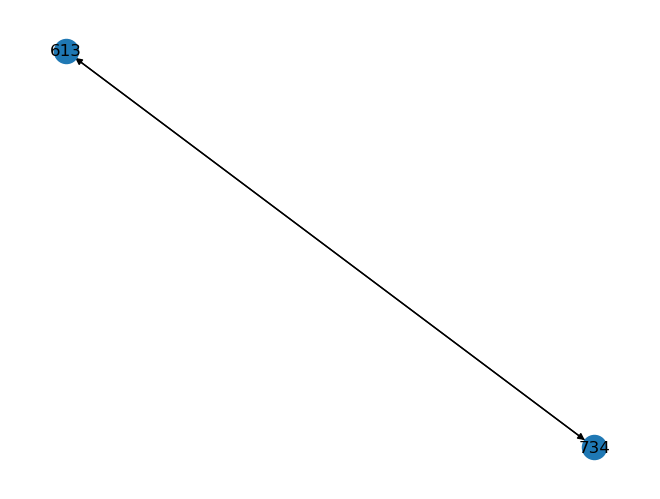

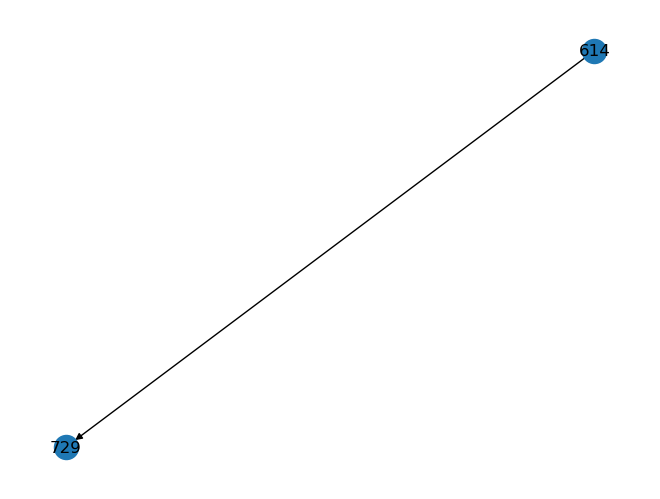

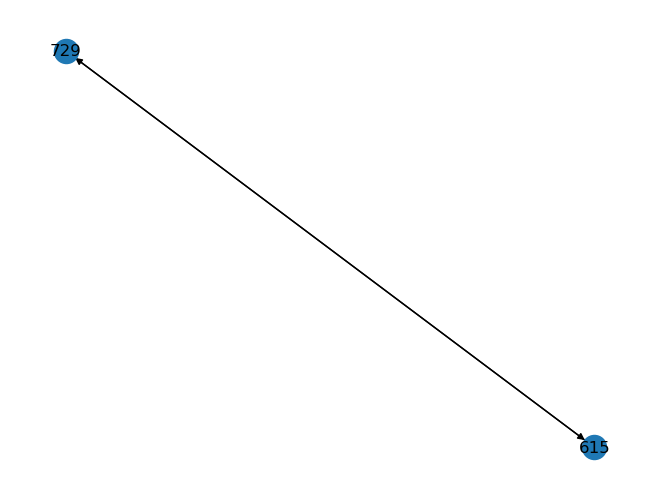

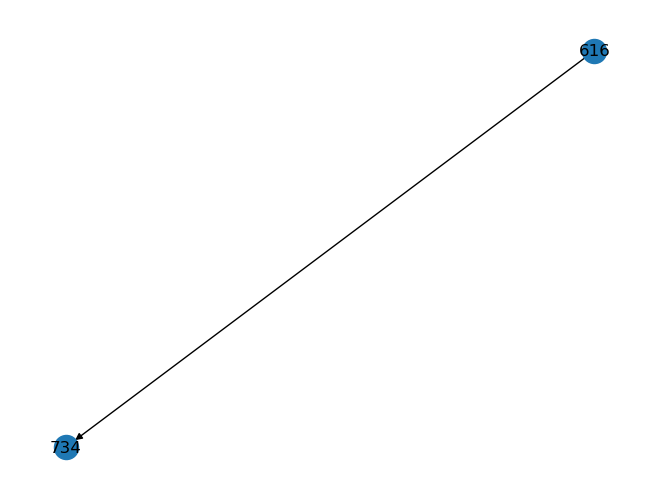

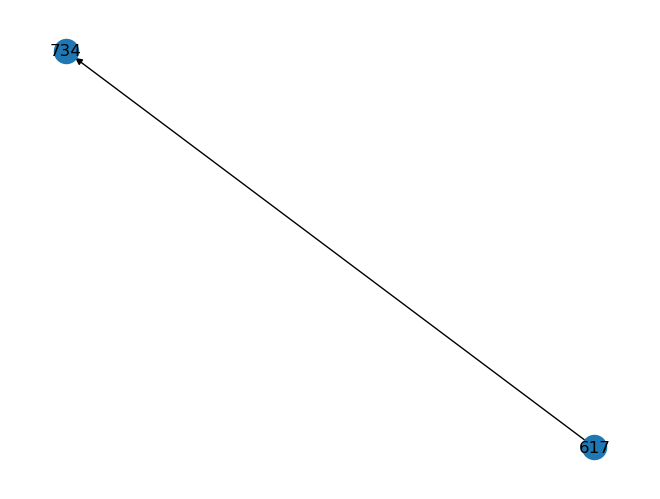

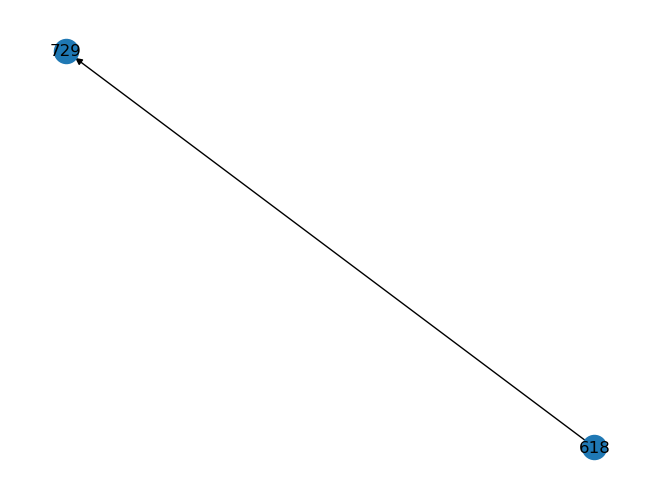

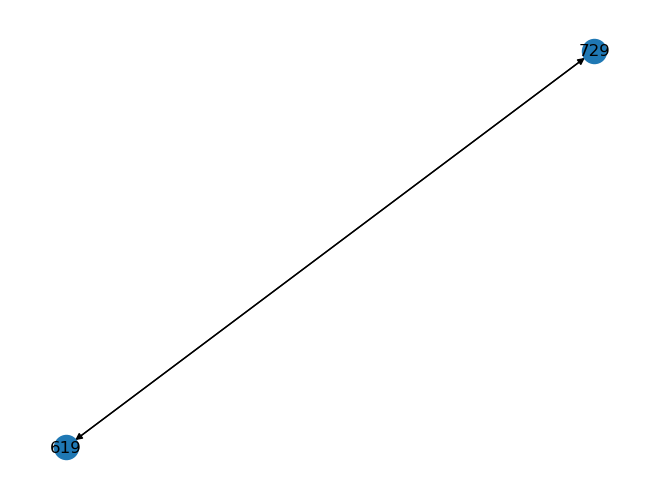

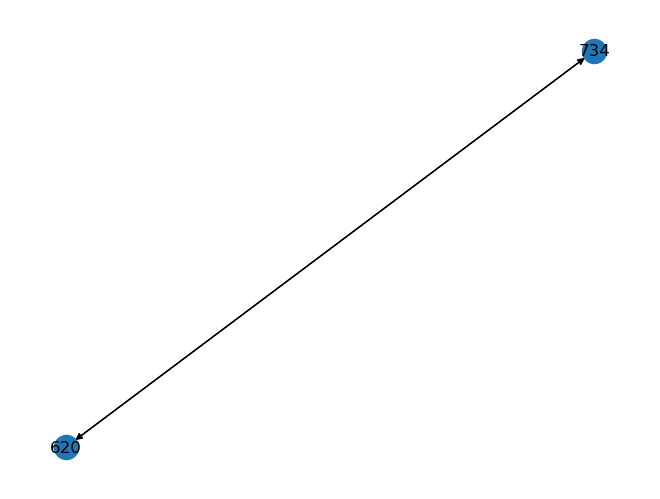

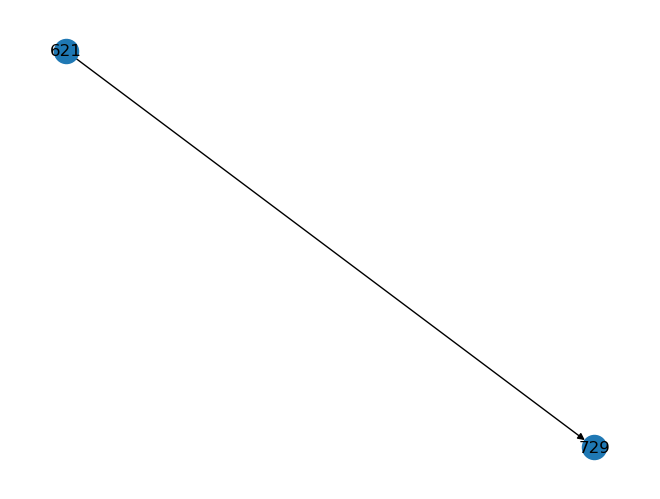

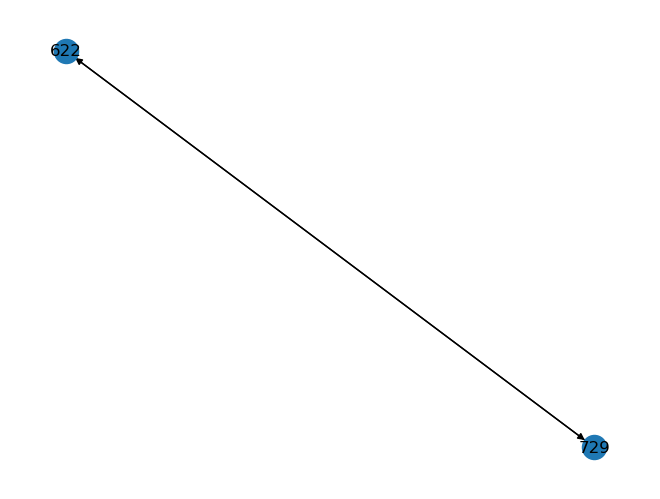

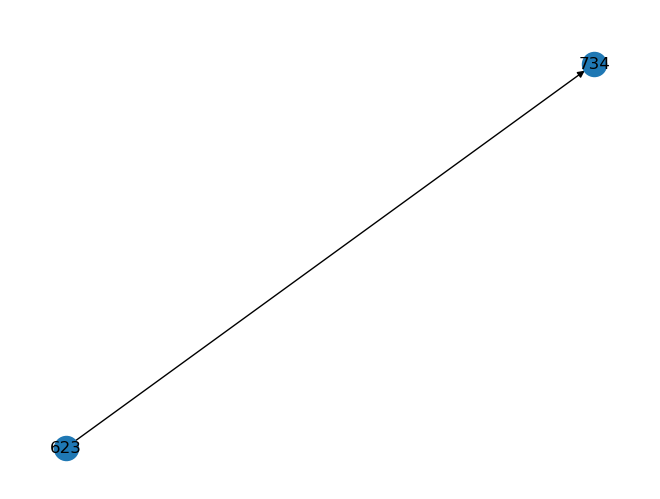

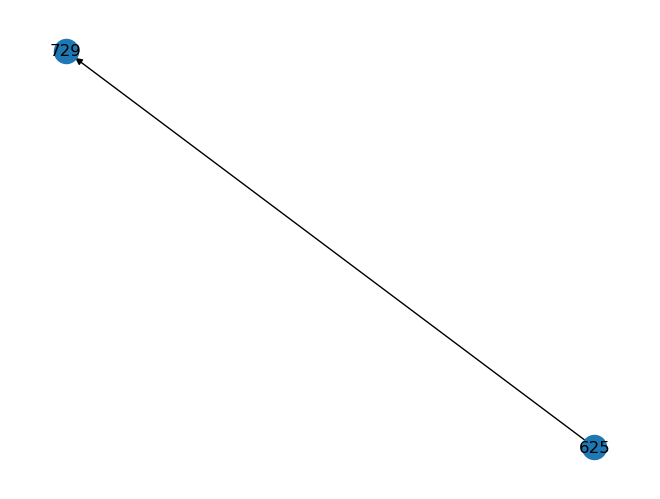

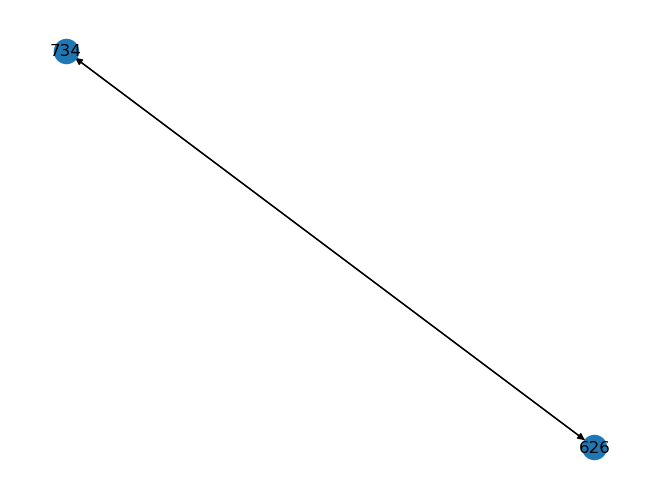

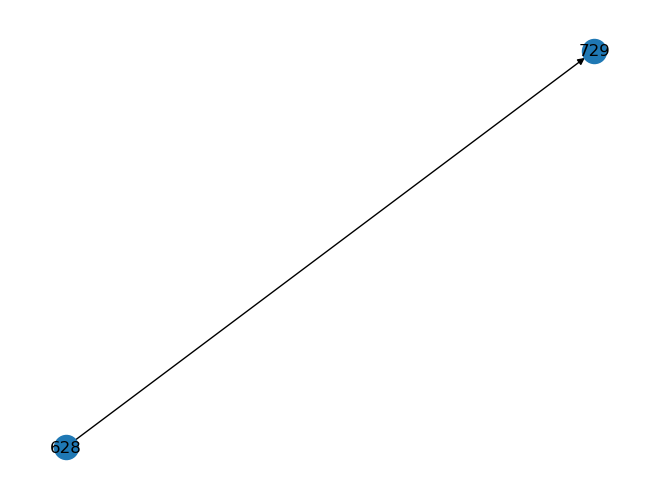

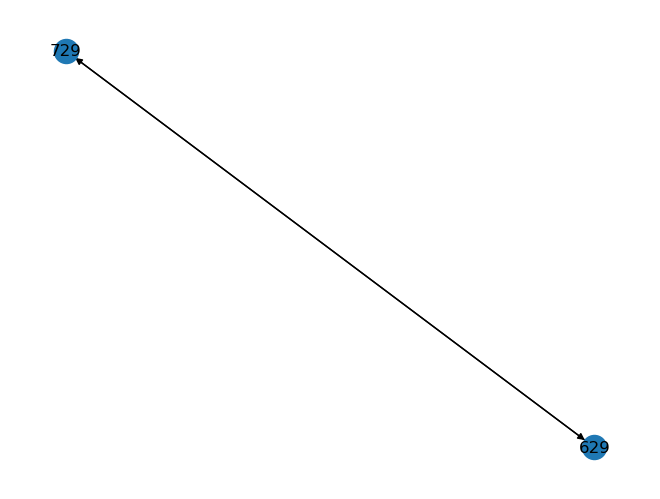

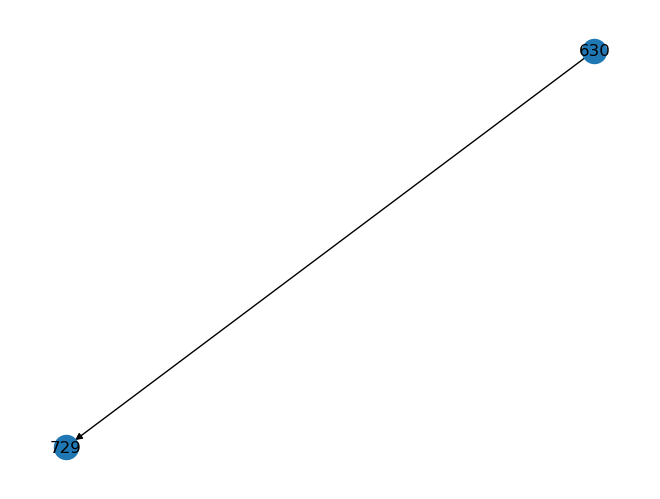

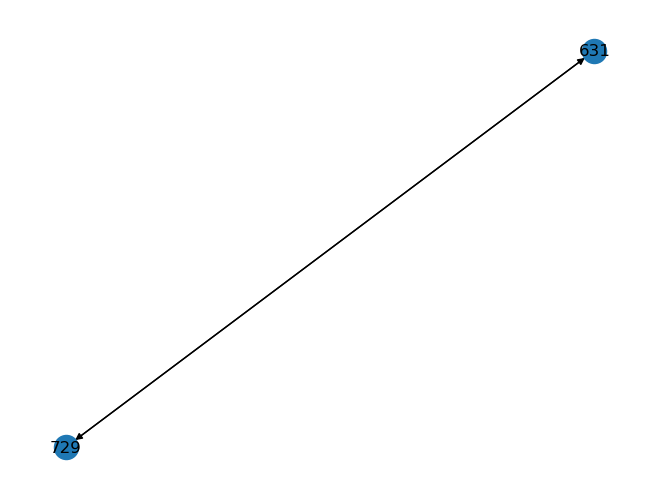

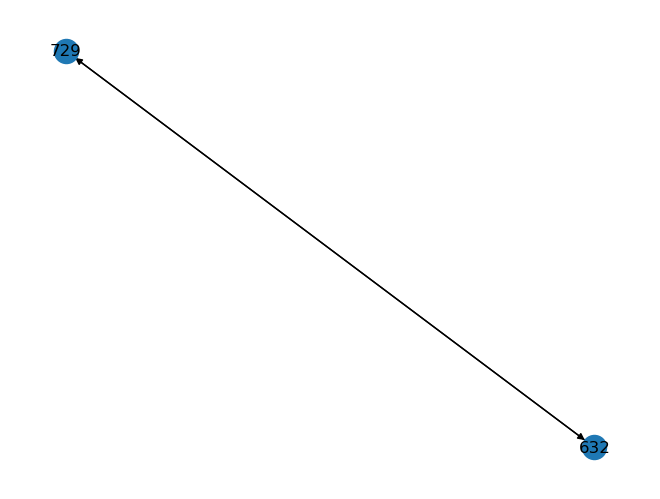

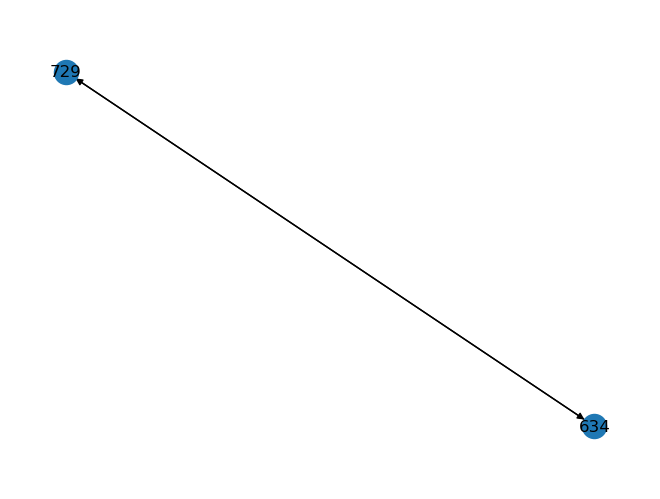

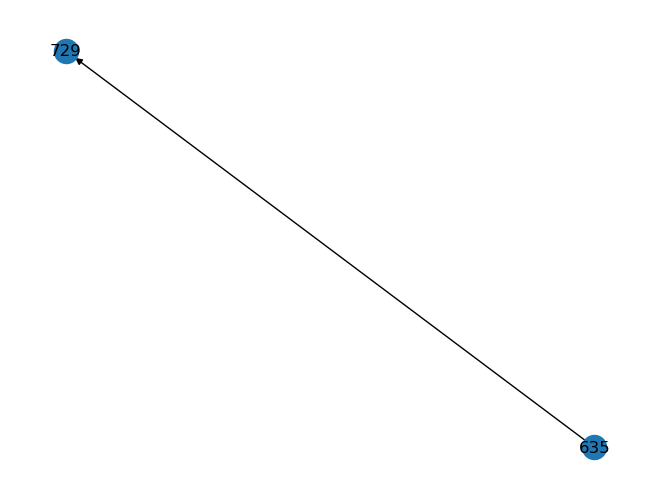

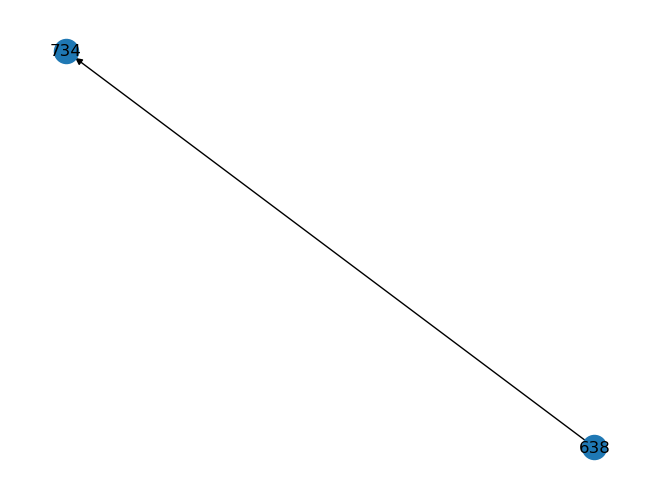

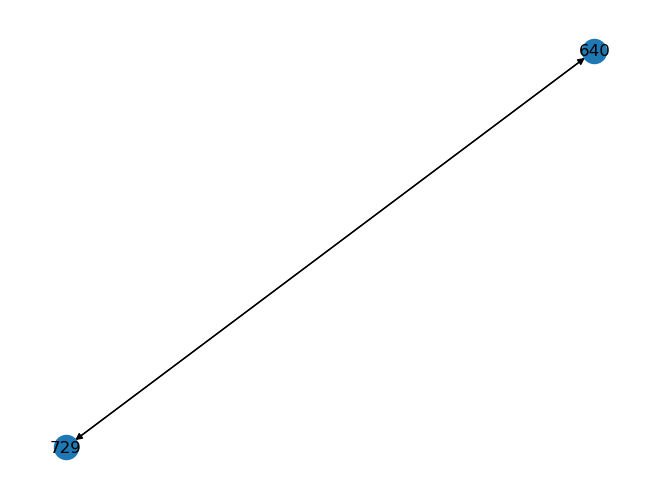

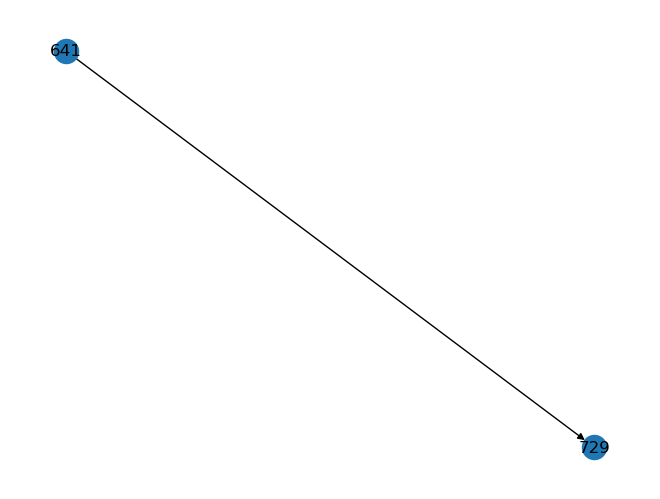

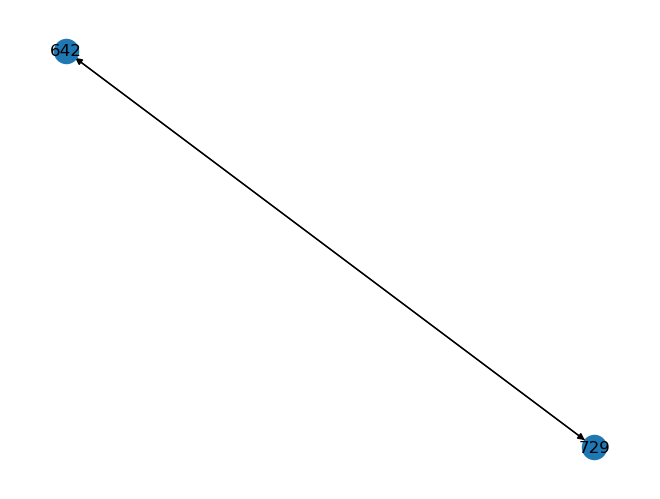

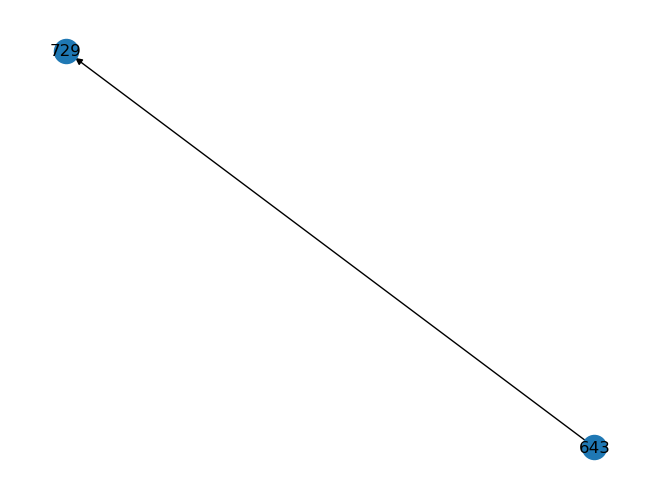

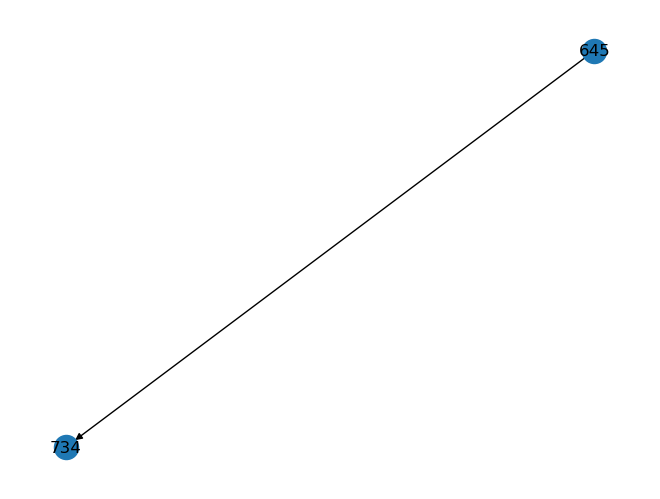

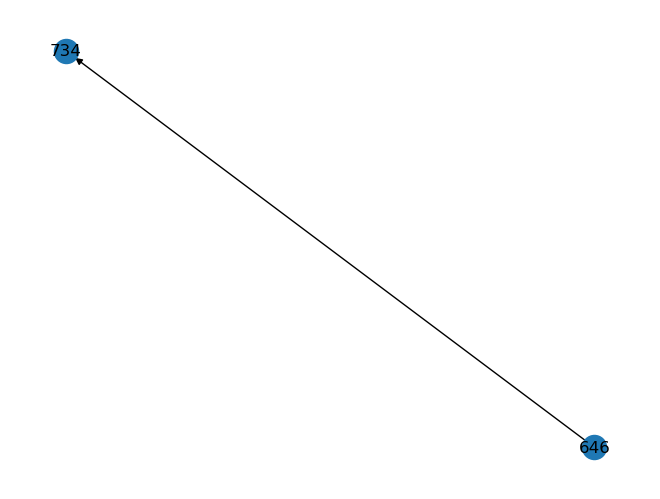

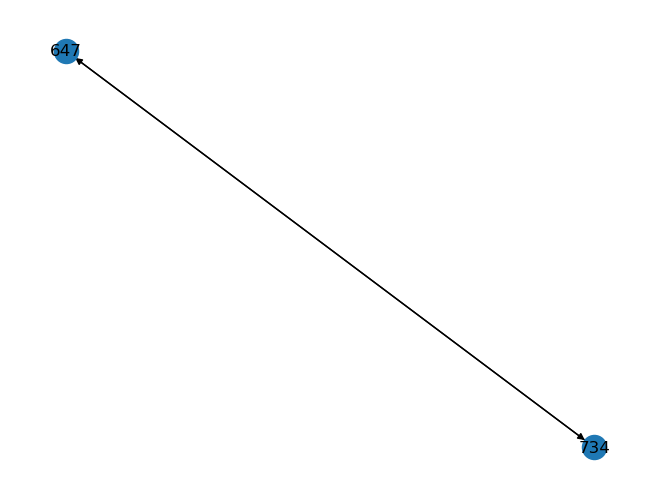

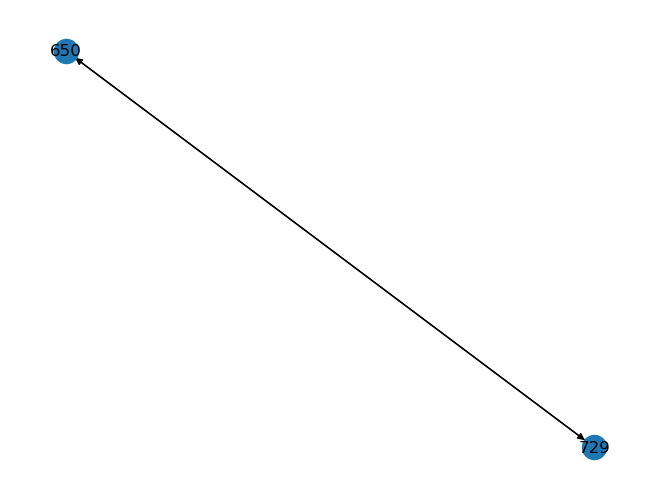

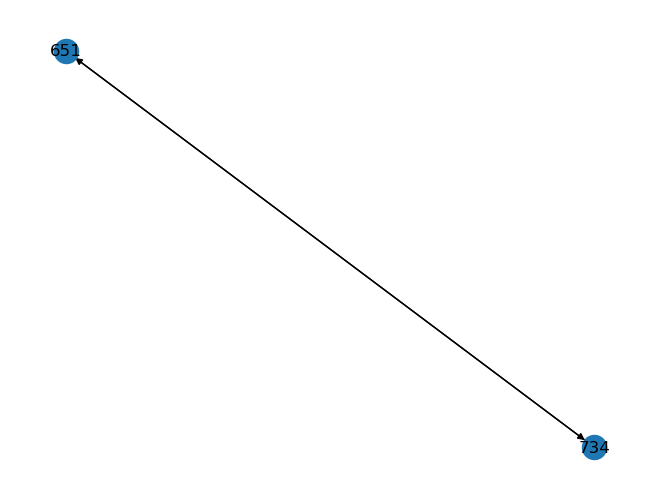

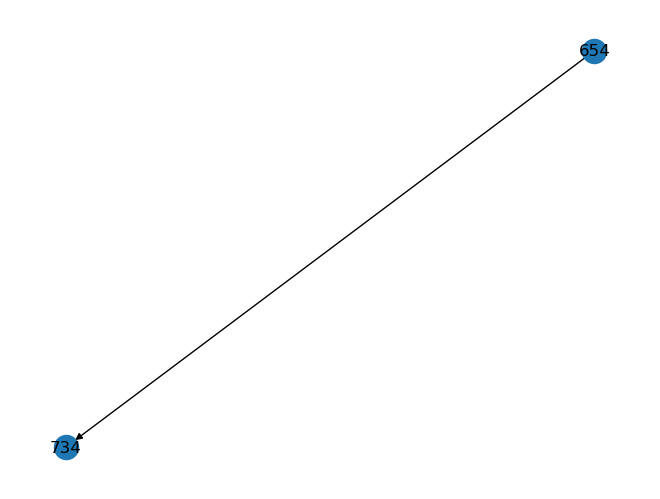

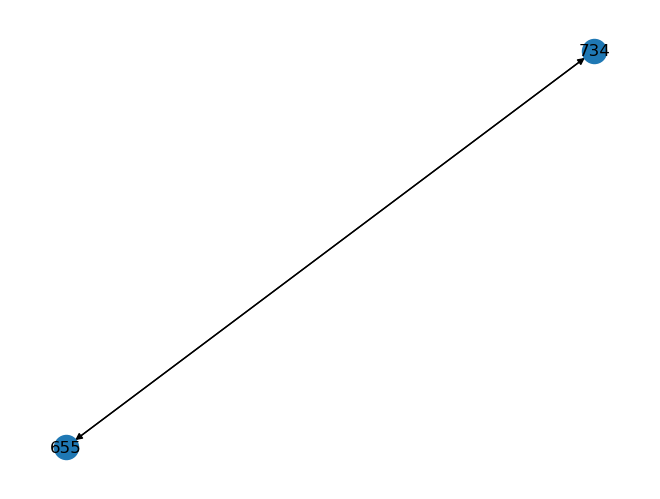

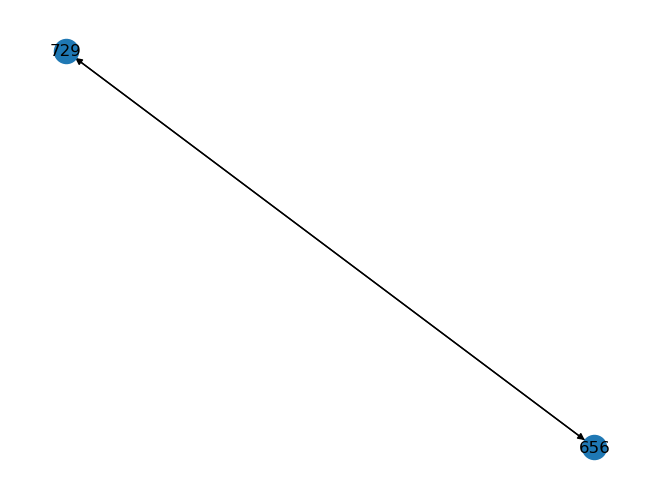

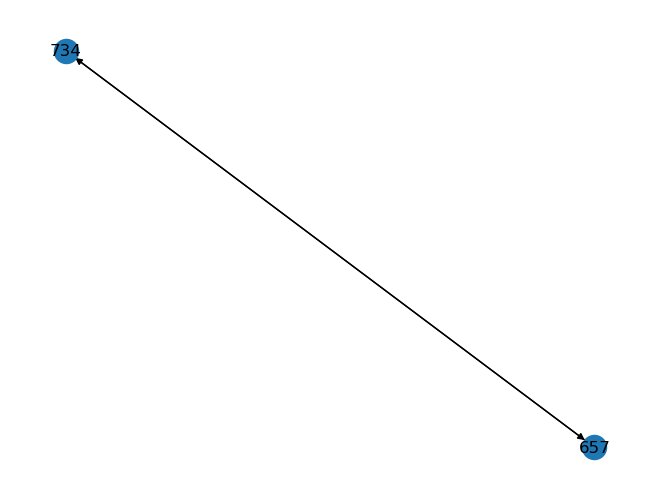

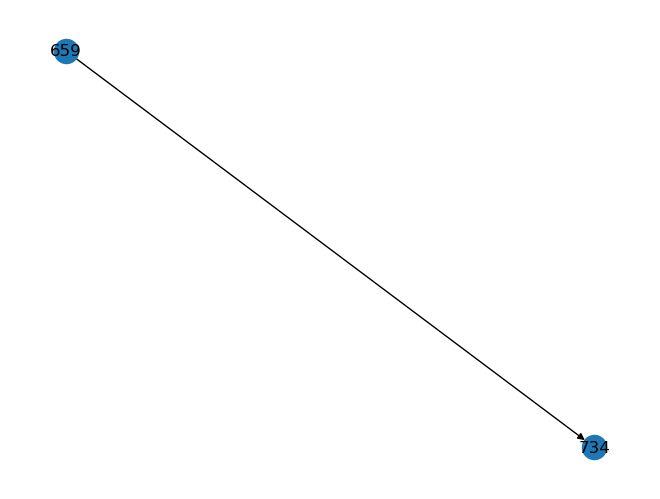

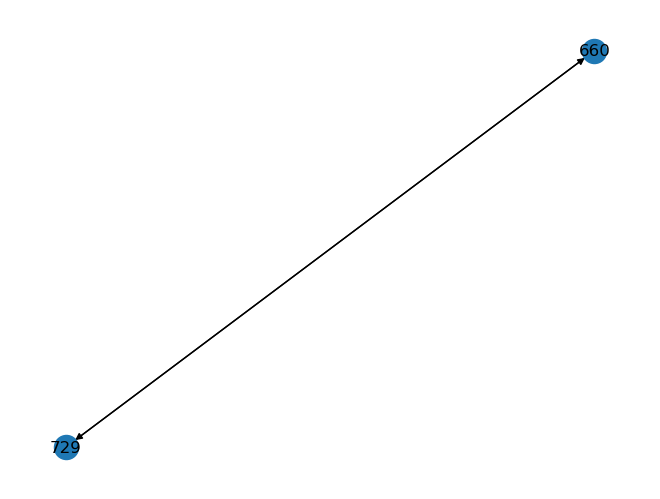

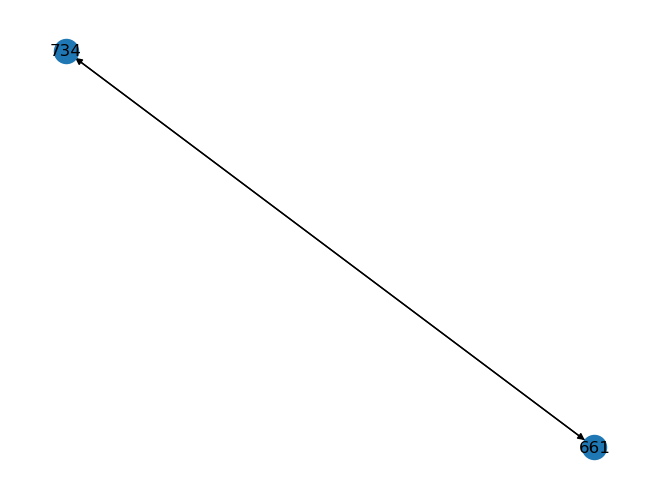

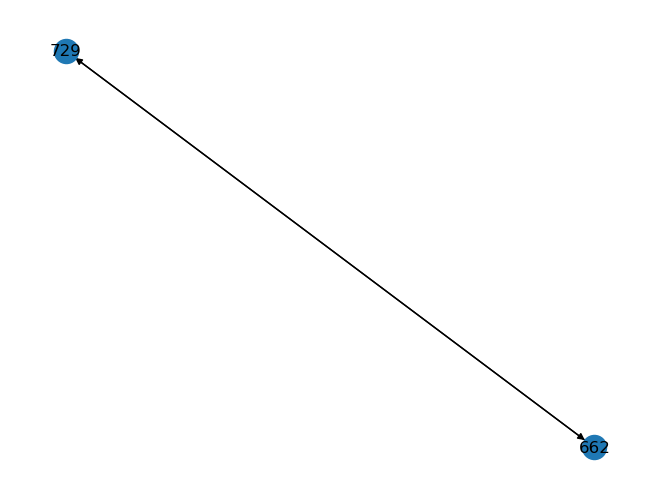

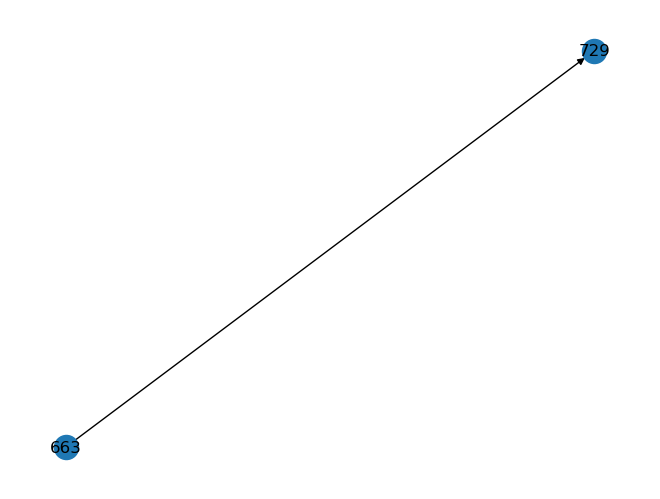

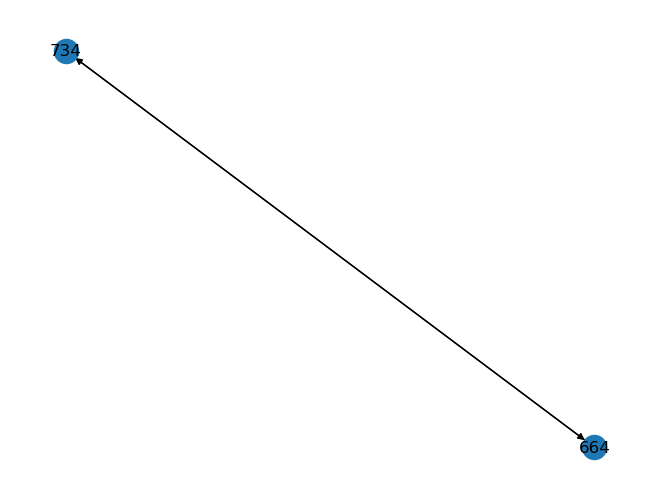

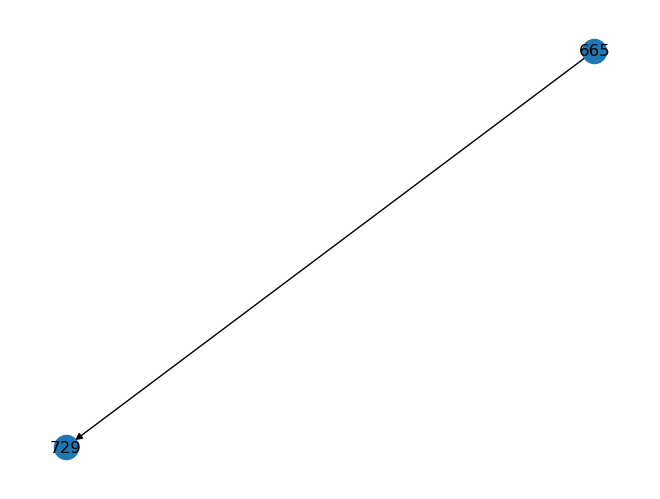

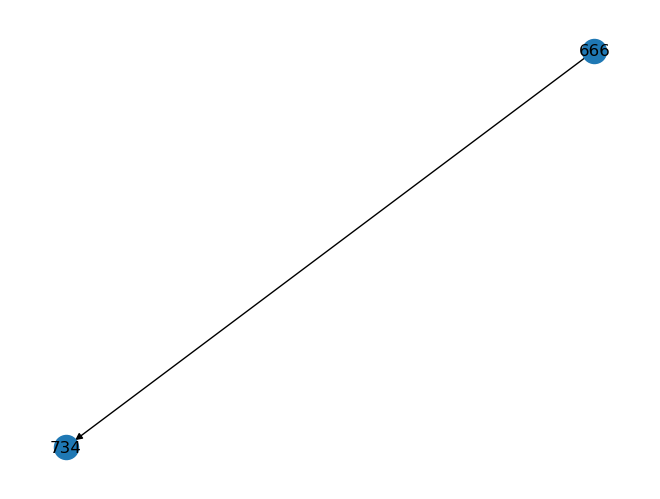

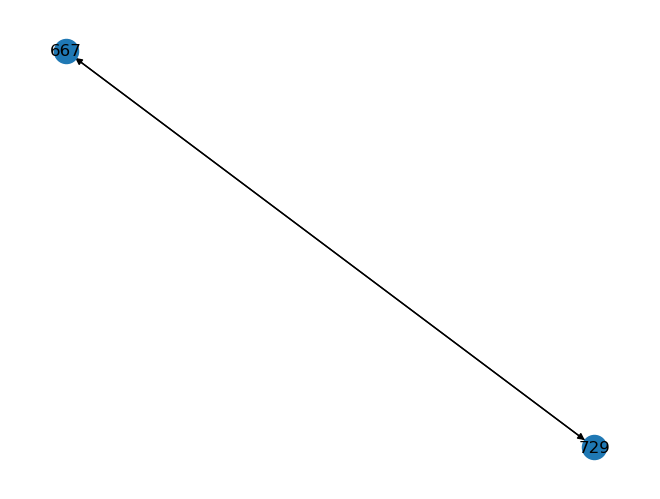

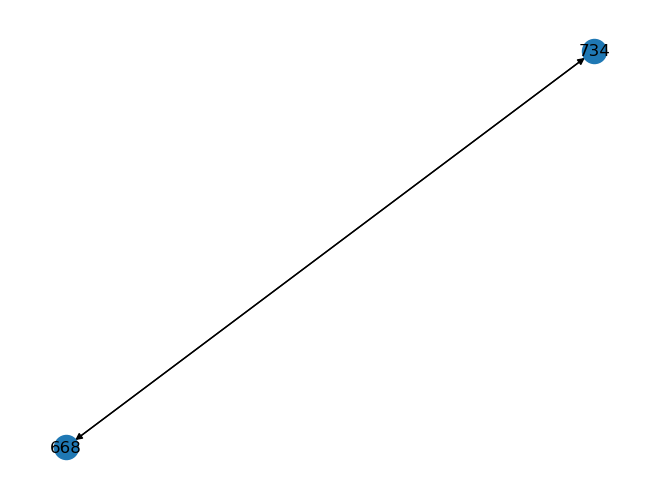

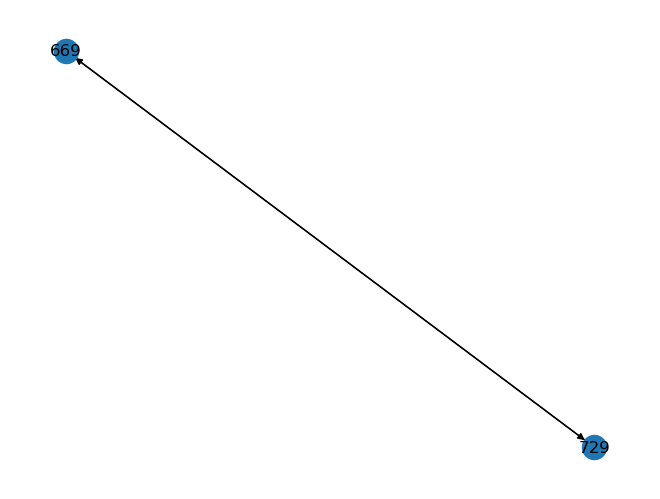

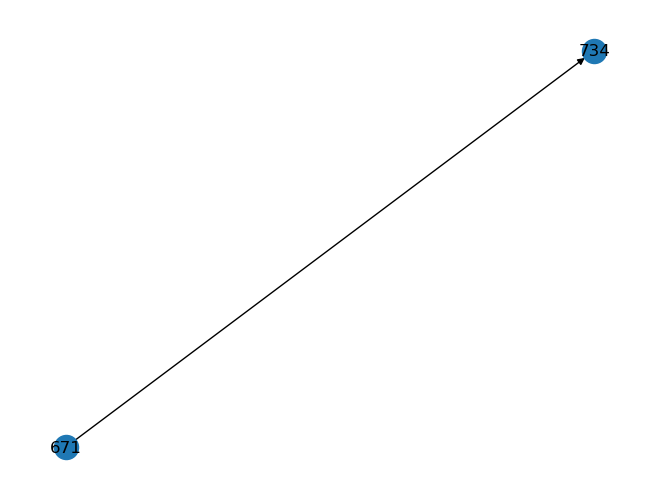

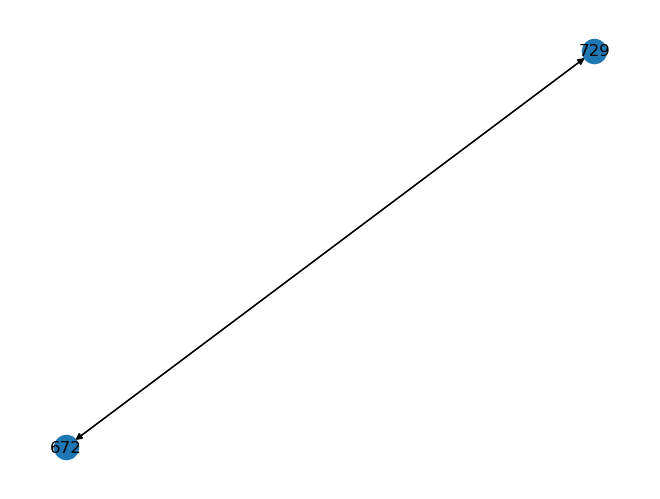

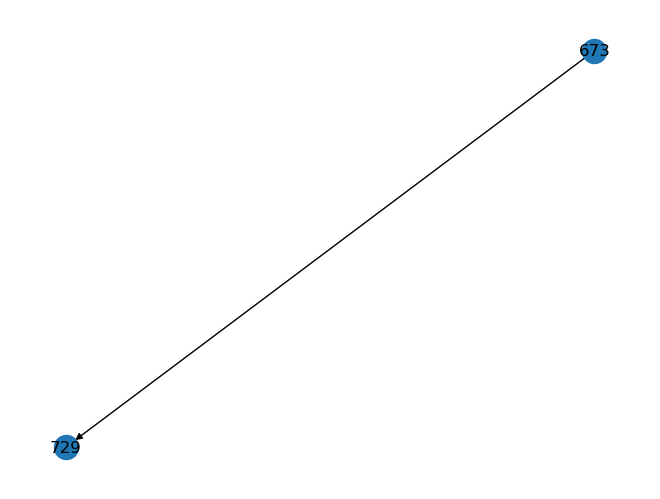

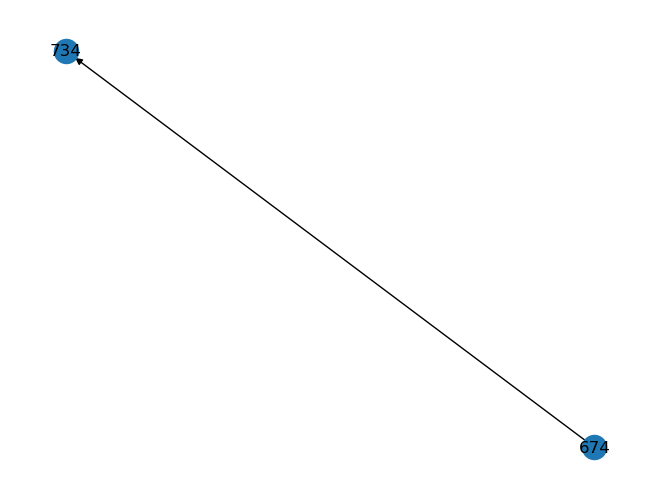

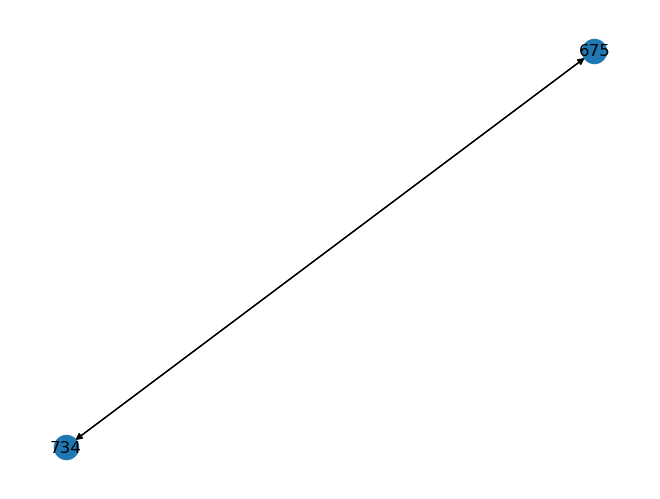

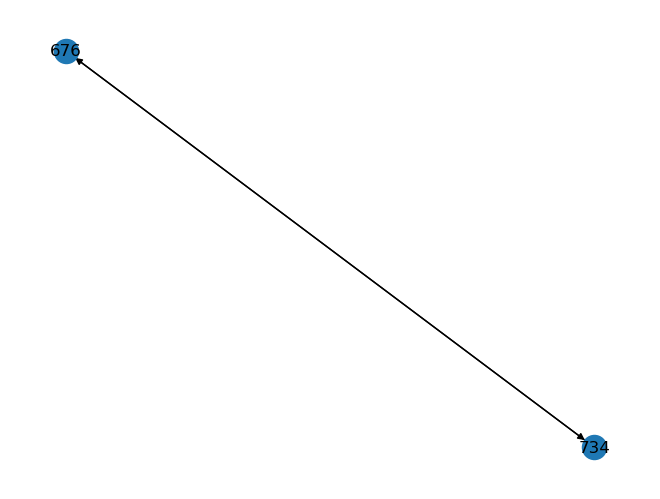

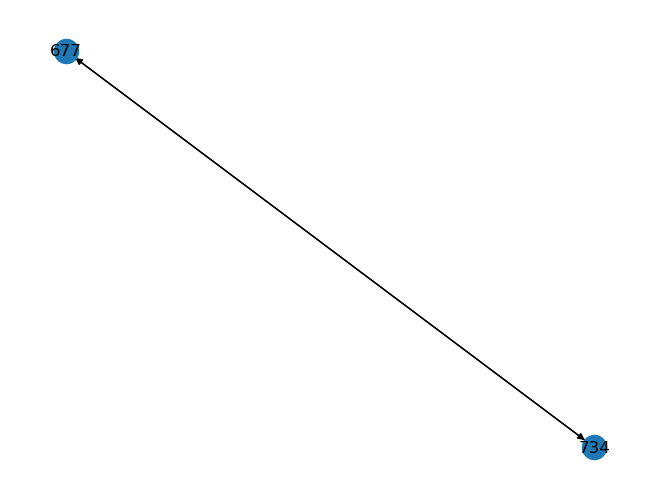

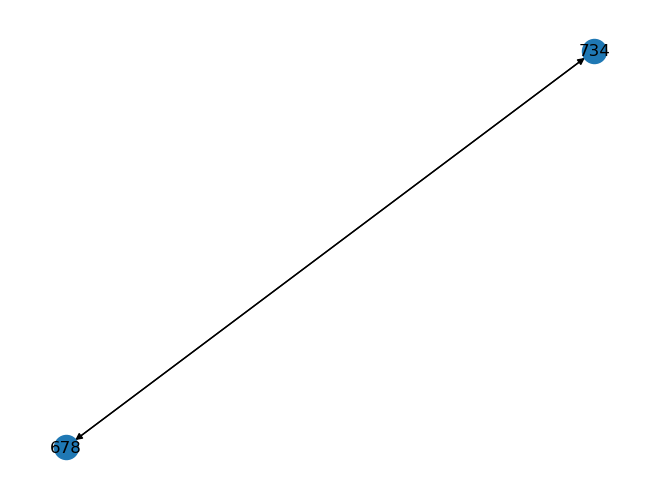

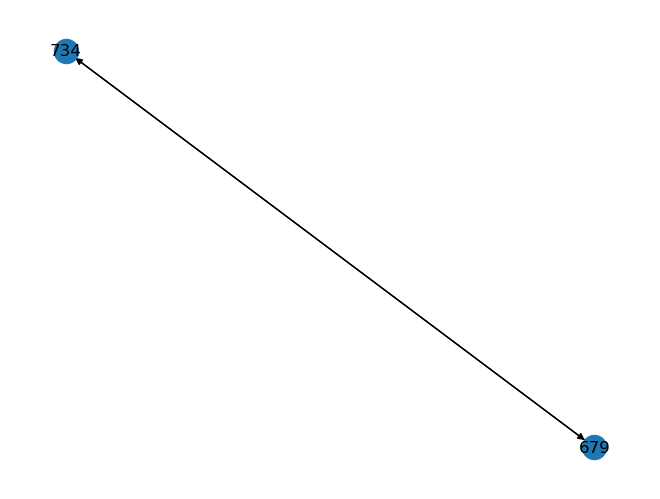

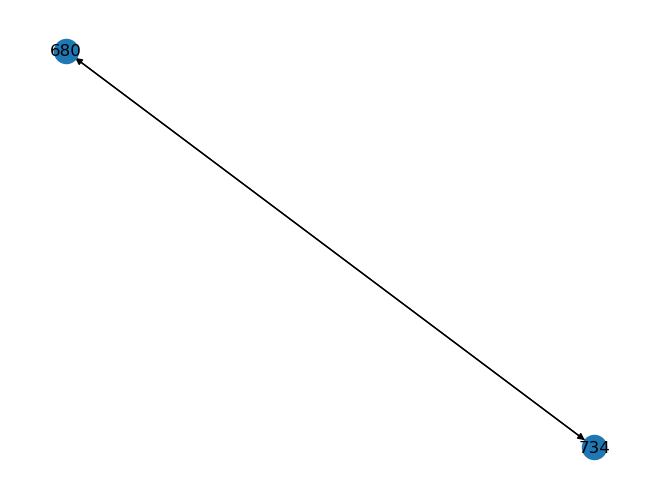

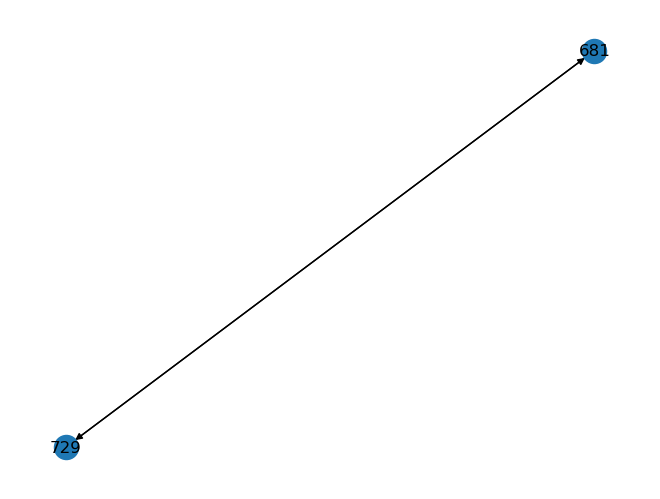

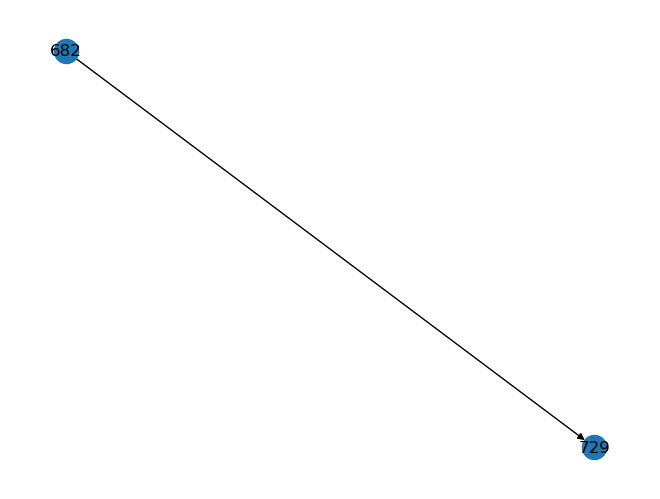

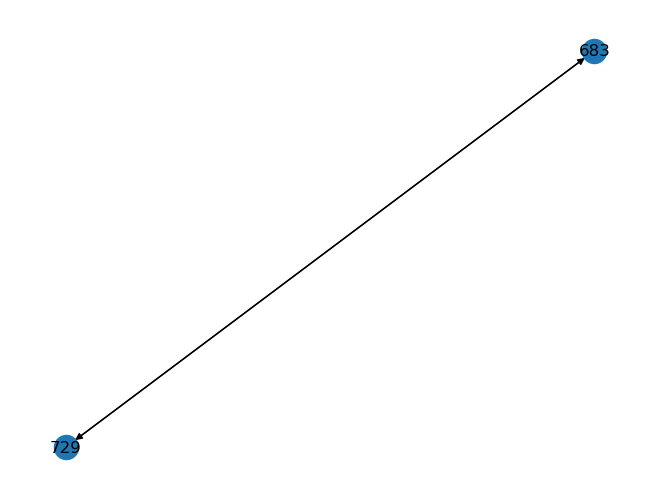

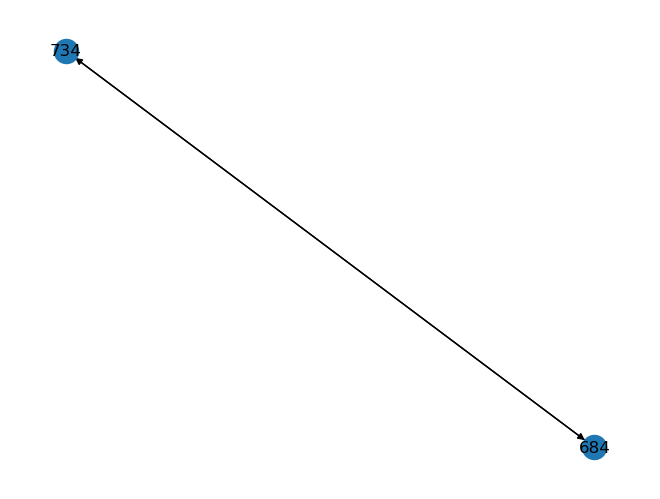

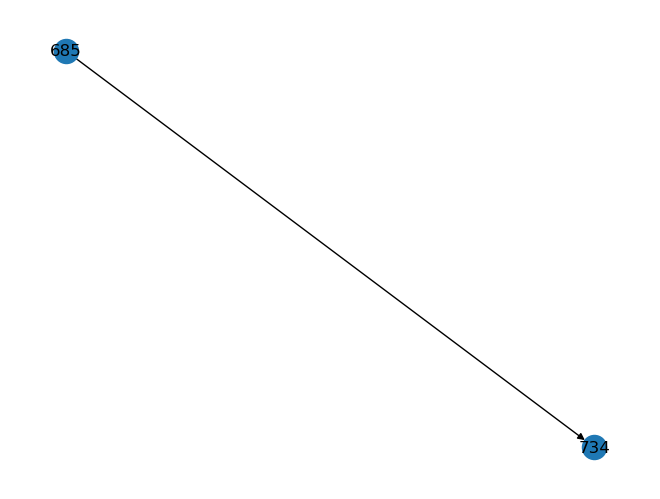

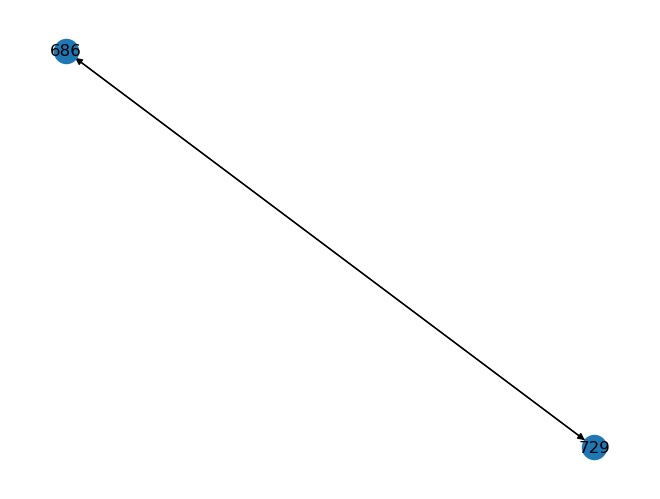

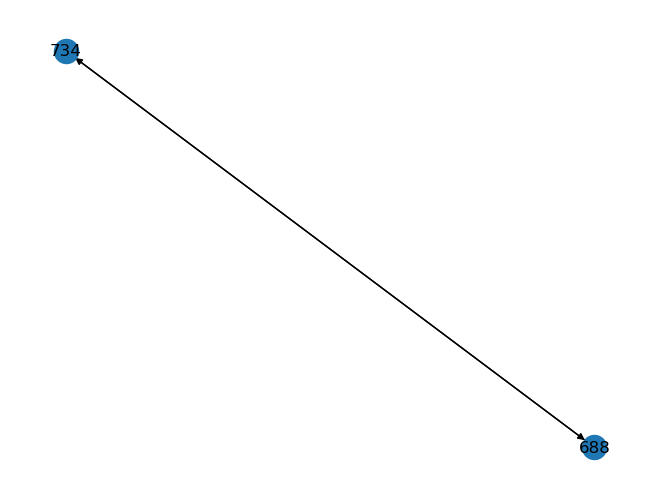

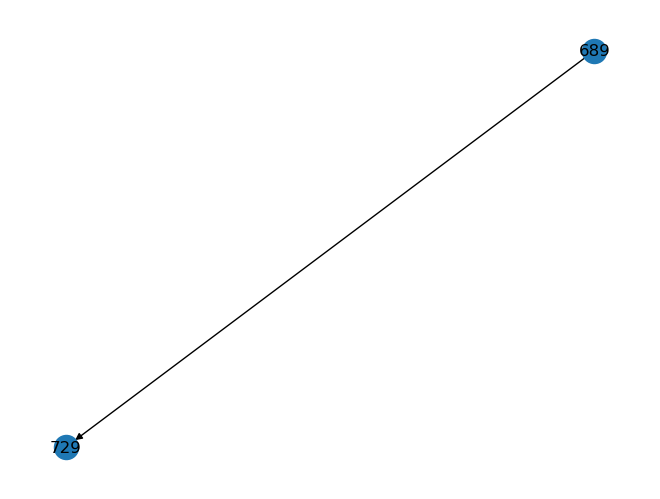

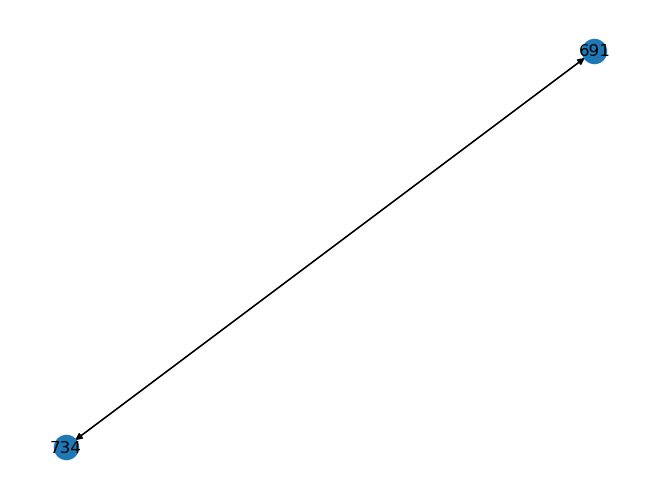

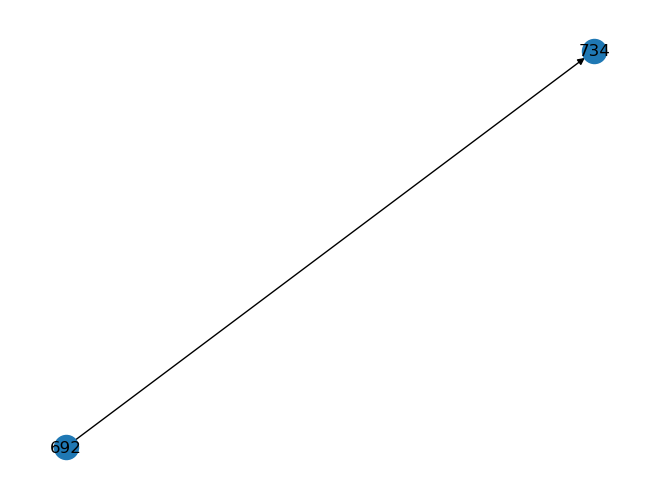

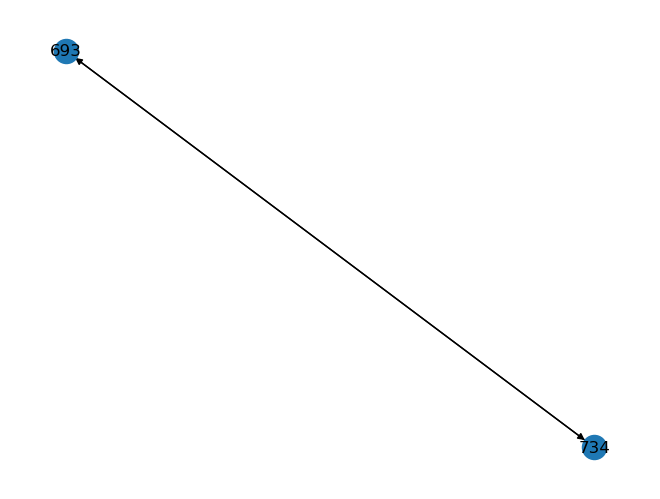

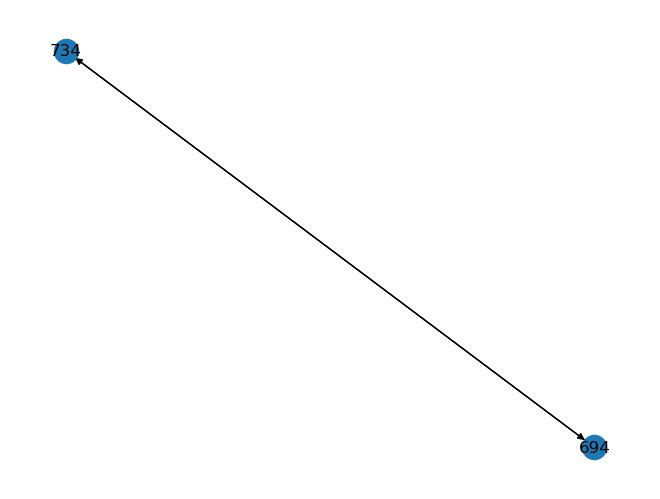

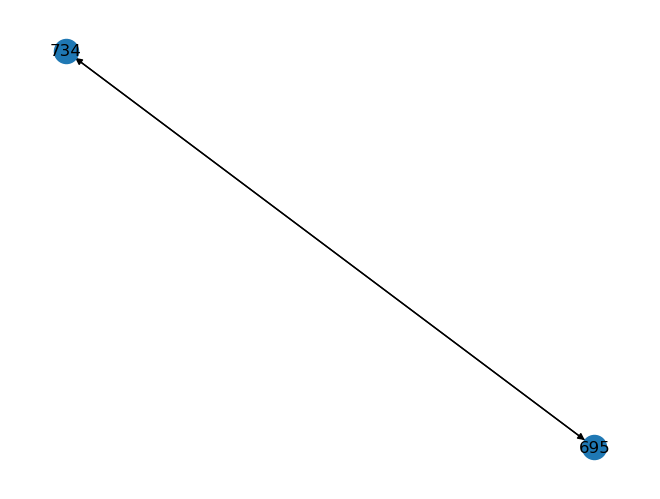

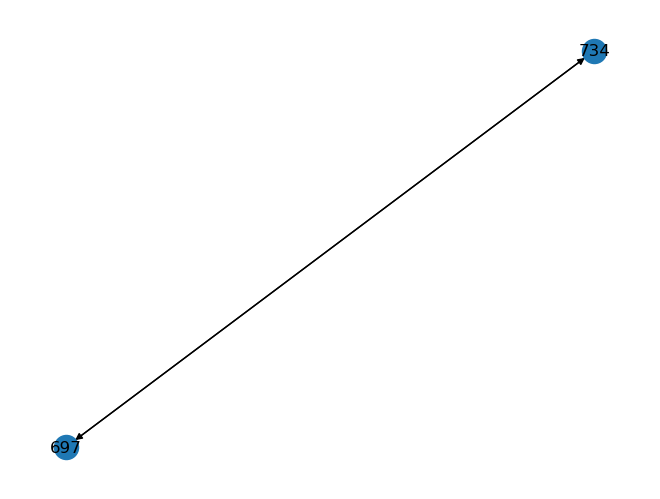

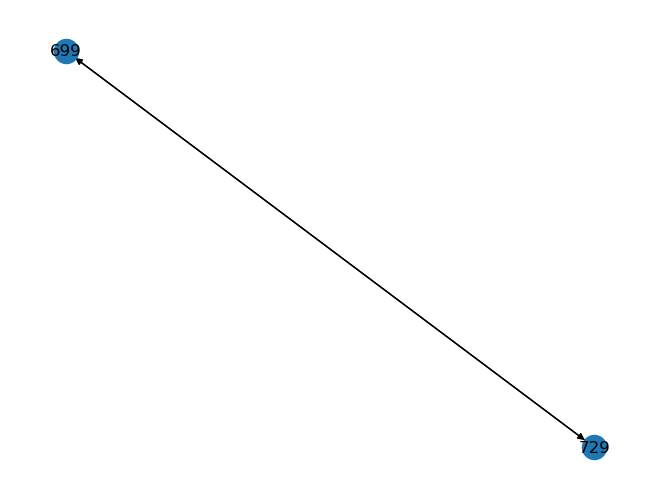

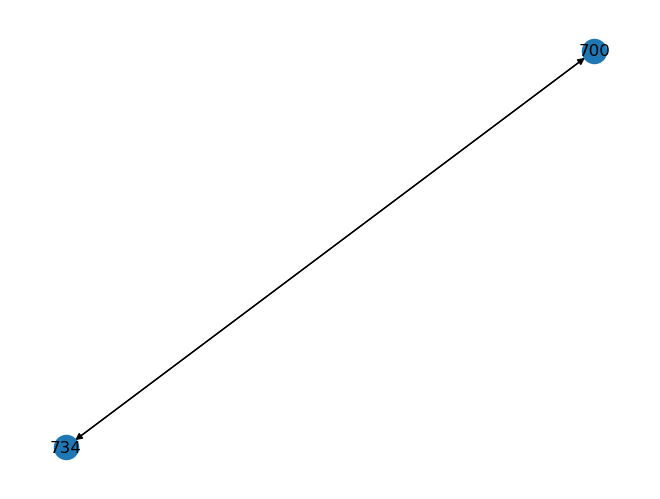

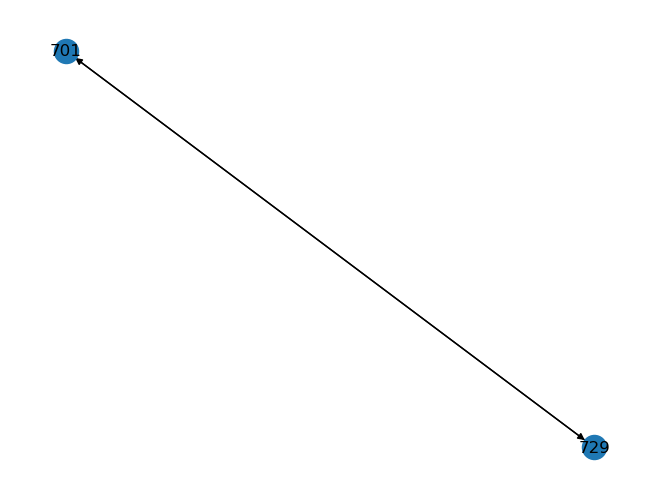

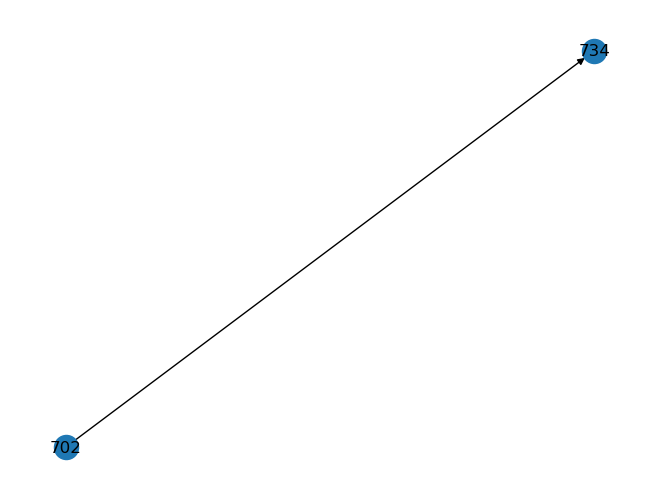

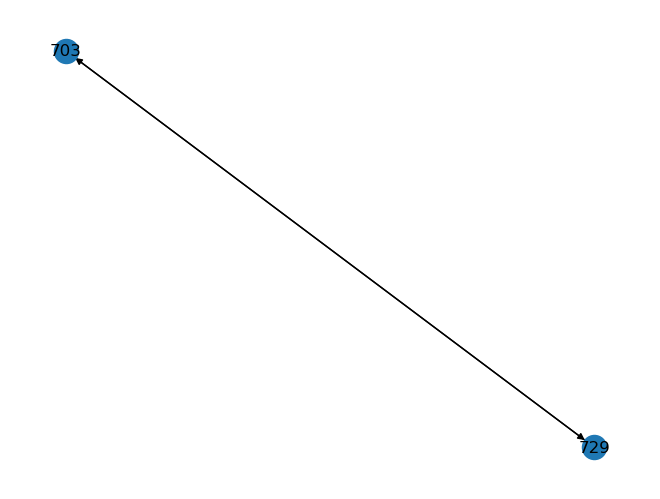

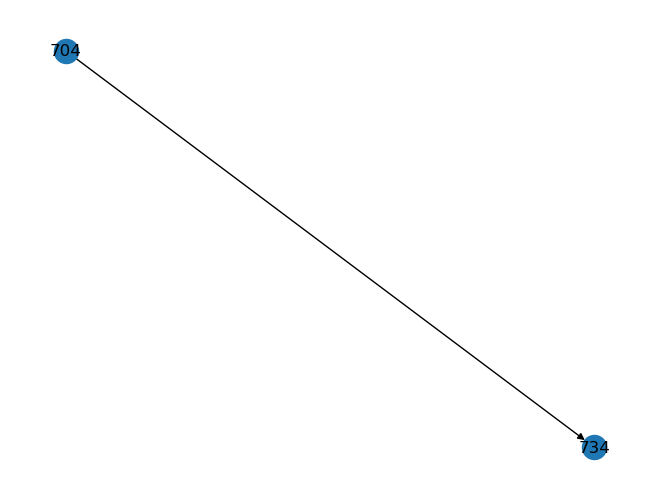

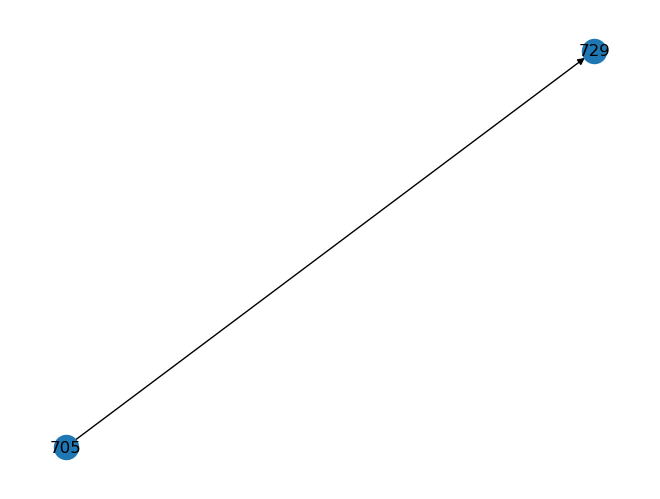

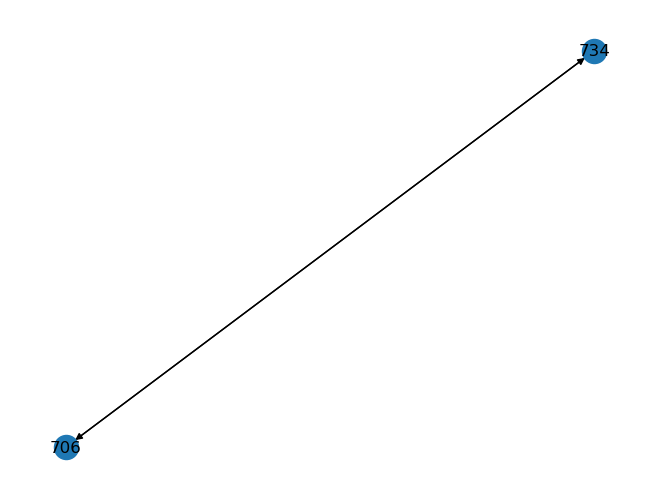

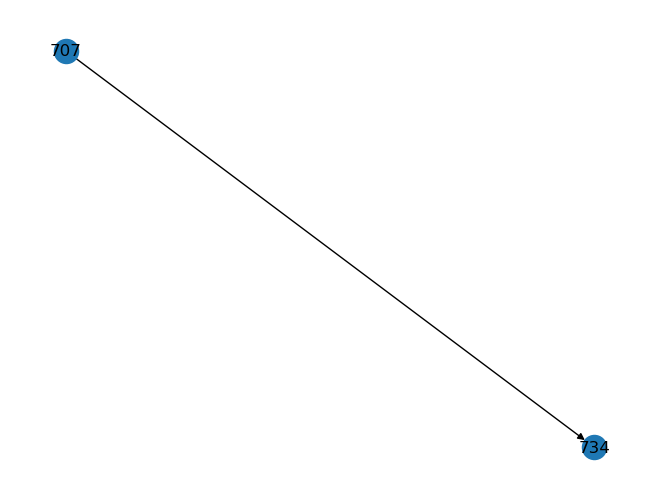

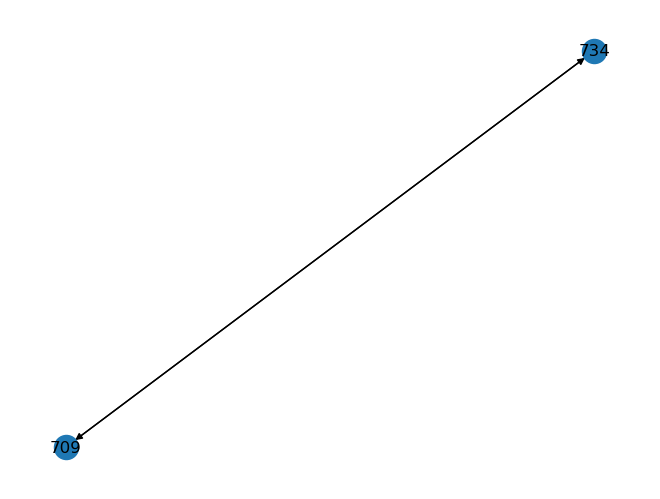

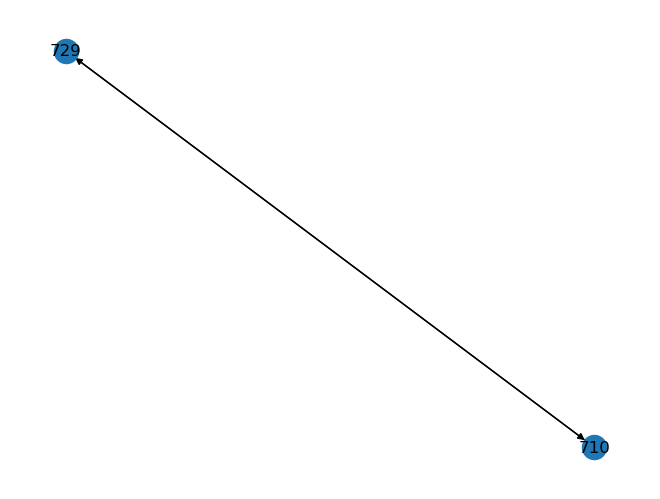

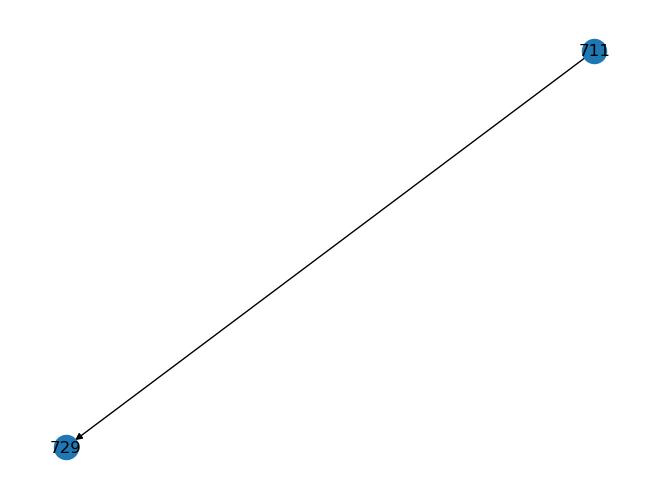

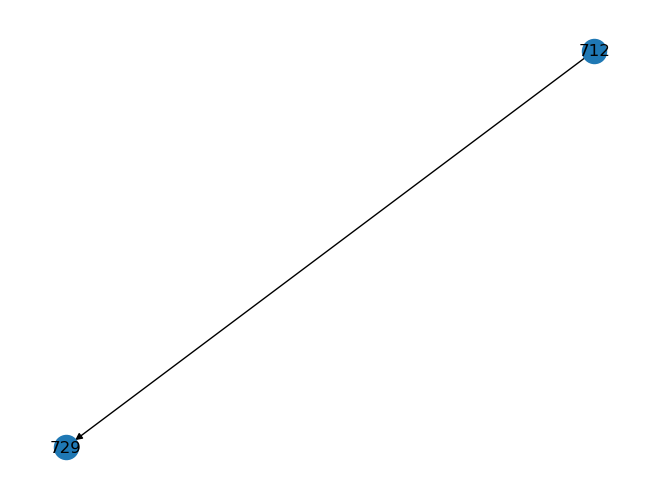

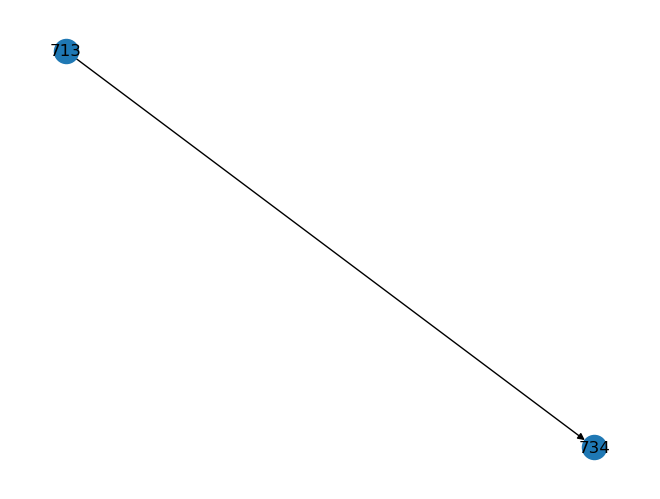

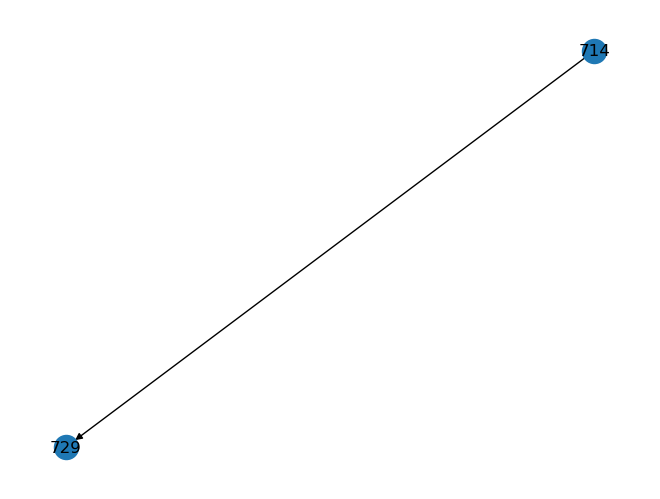

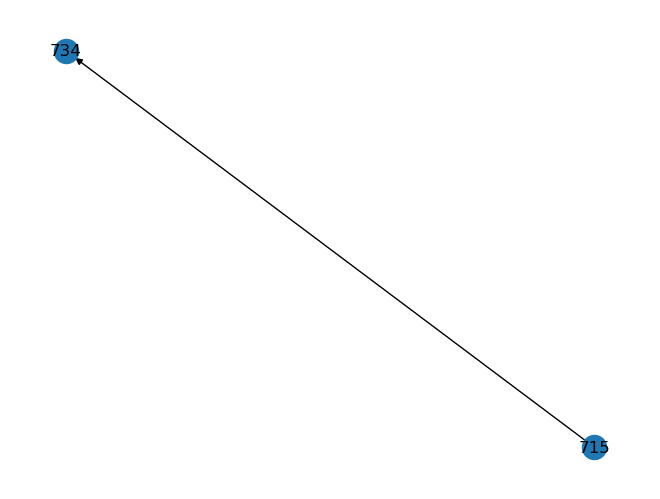

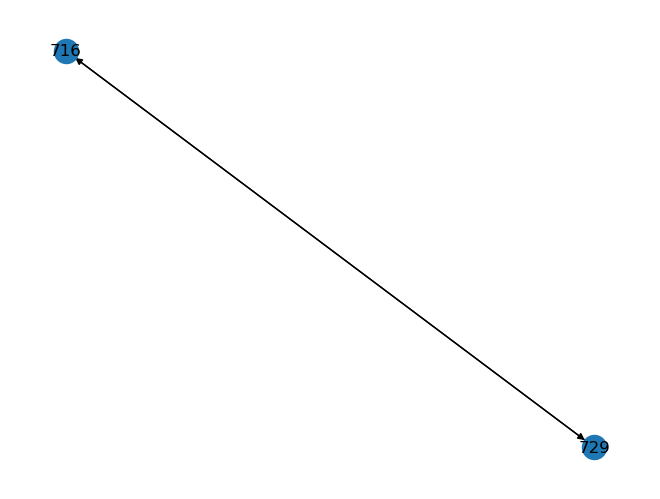

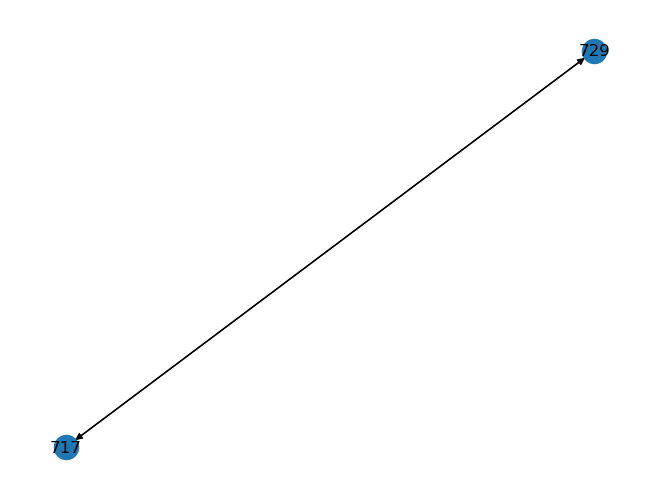

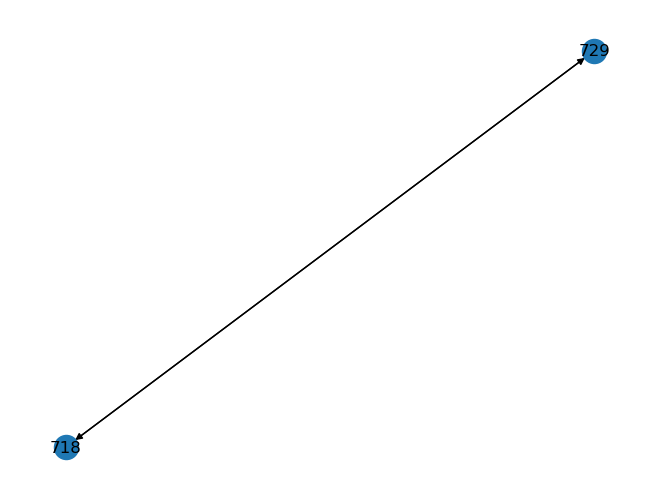

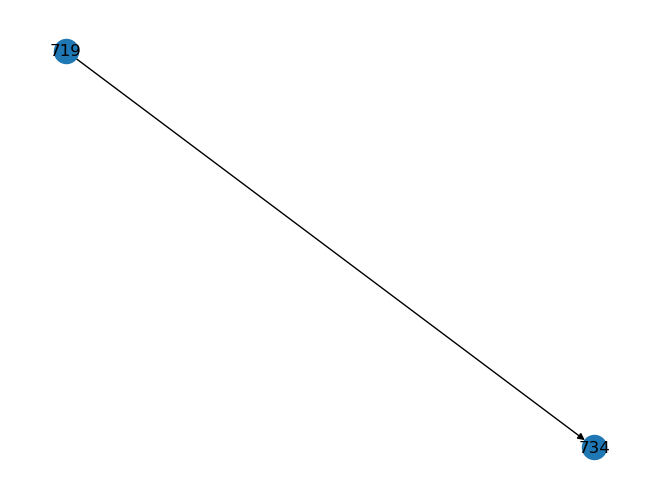

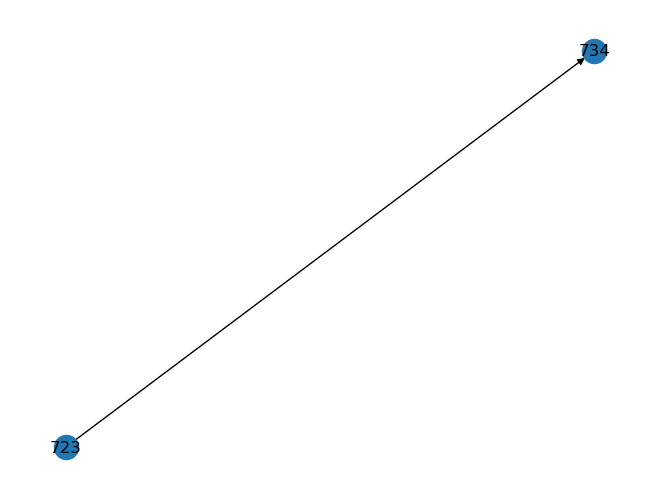

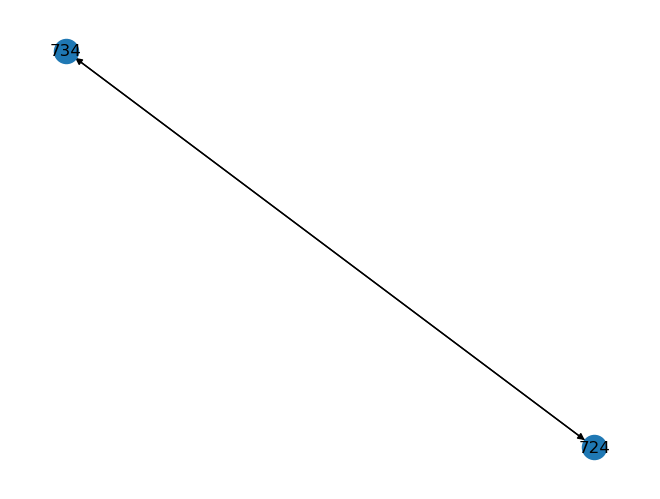

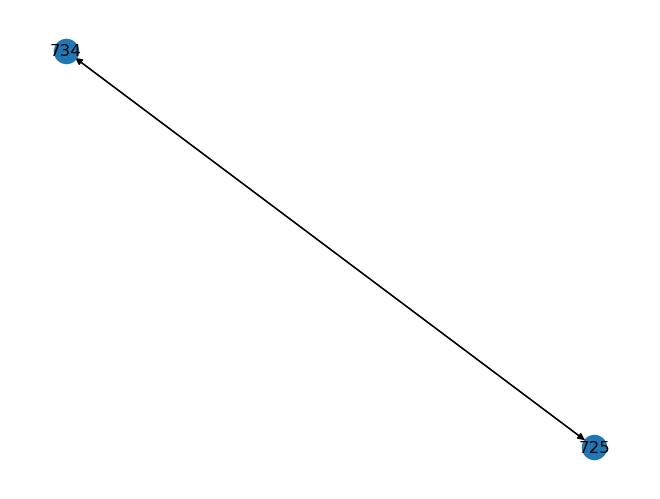

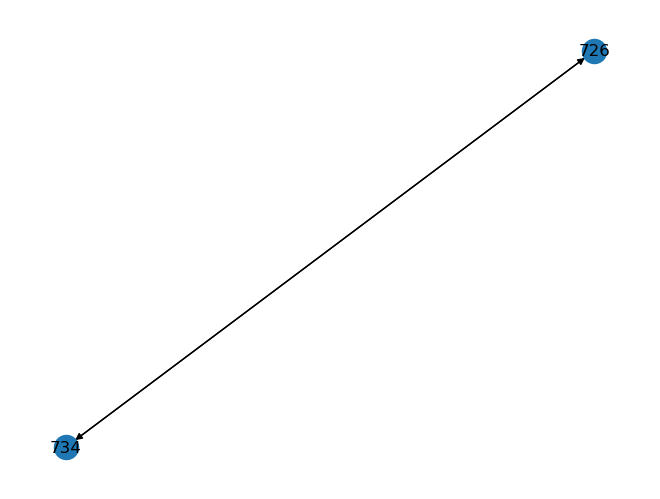

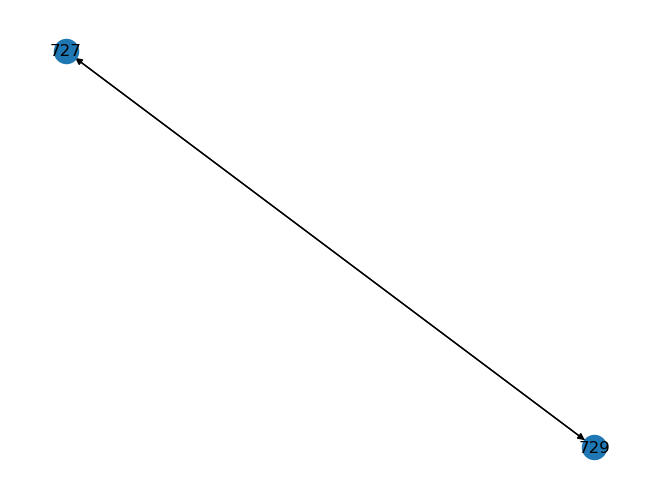

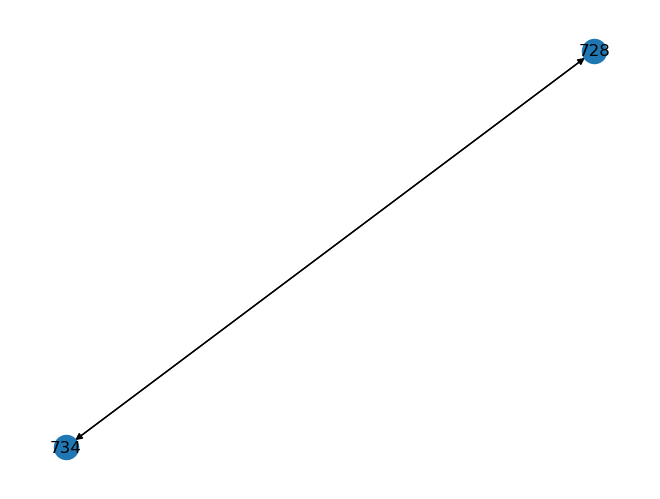

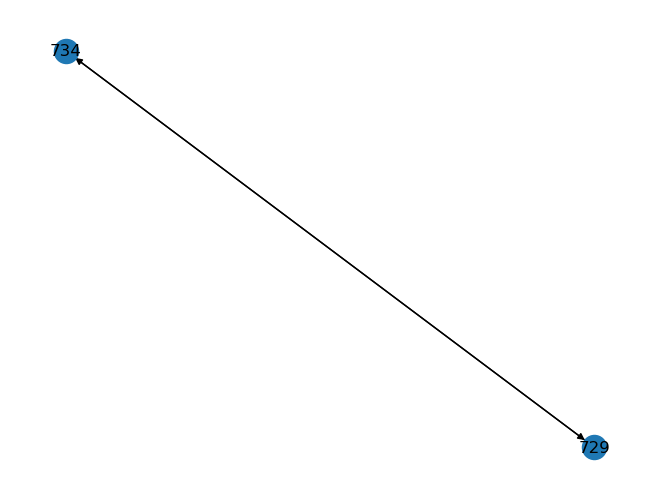

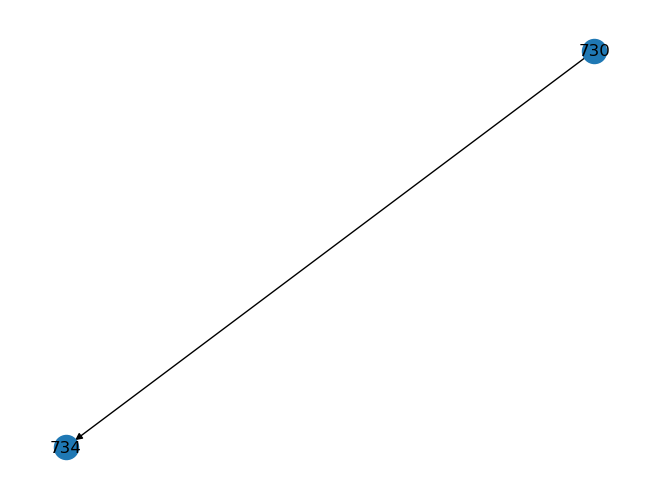

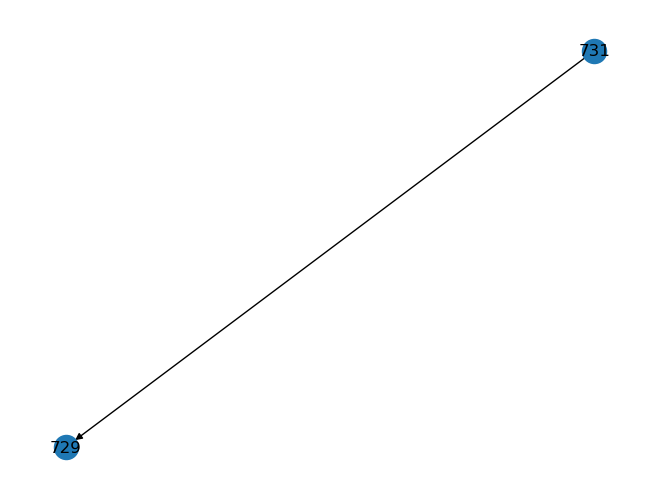

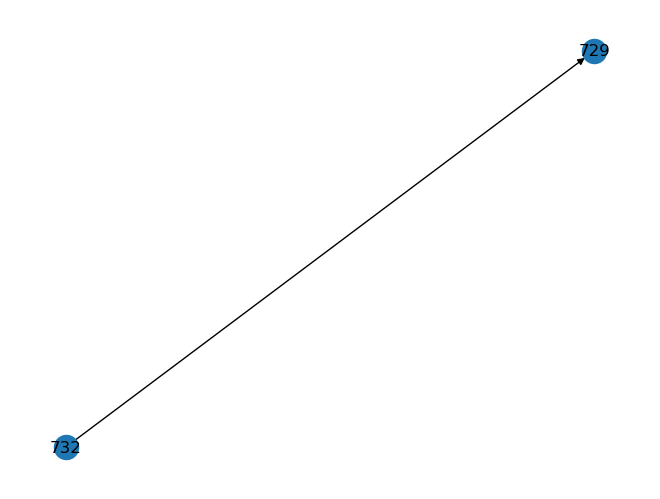

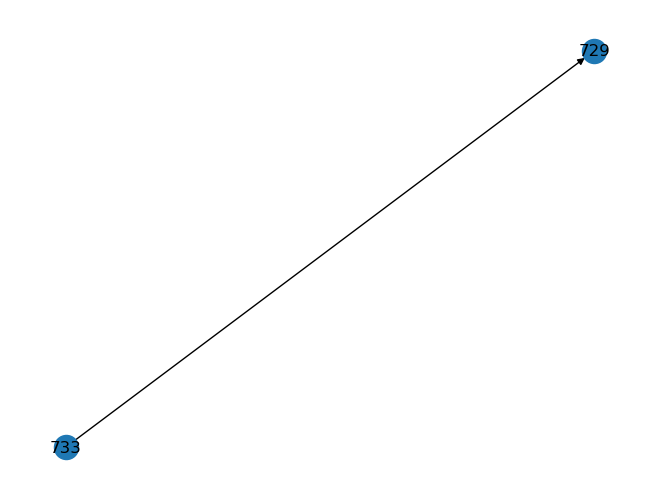

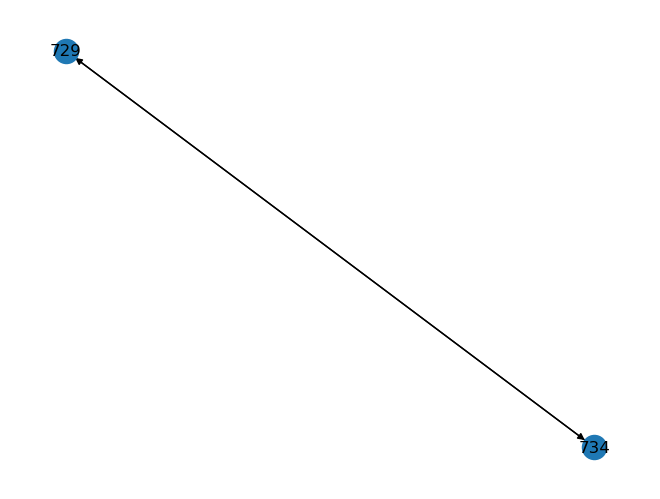

In [30]:
print("Objective:",m.objVal)

selected_edges = [e for e in G.edges if x[e].X > 0.5]

#print("selected_edges:", selected_edges)

print("length of selected_edges:", len(selected_edges))

for edge in selected_edges:
    induced_graph = nx.induced_subgraph(G, [edge[0], edge[1]])
    nx.draw(induced_graph, with_labels = True)
    plt.show()
    


In [31]:
for node in G.nodes:
    donors = G.nodes[node]['Donor']
    print("Node ", node, " has donors ", donors)

Node  0  has donors  ['AB', 'A']
Node  1  has donors  ['AB', 'A']
Node  2  has donors  ['AB', 'B']
Node  3  has donors  ['AB', 'B', 'A']
Node  4  has donors  ['AB']
Node  5  has donors  ['AB', 'A']
Node  6  has donors  ['AB', 'B', 'A']
Node  7  has donors  ['AB', 'A']
Node  8  has donors  ['AB', 'A']
Node  9  has donors  ['AB', 'B']
Node  10  has donors  ['AB', 'B']
Node  11  has donors  ['AB', 'B']
Node  12  has donors  ['AB']
Node  13  has donors  ['AB', 'A']
Node  14  has donors  ['AB', 'B', 'A']
Node  15  has donors  ['AB', 'B', 'A']
Node  16  has donors  ['AB']
Node  17  has donors  ['AB', 'B', 'A']
Node  18  has donors  ['AB', 'A', 'B']
Node  19  has donors  ['B']
Node  20  has donors  ['AB', 'A']
Node  21  has donors  ['AB', 'A']
Node  22  has donors  ['B']
Node  23  has donors  ['AB', 'A']
Node  24  has donors  ['AB', 'B', 'A']
Node  25  has donors  ['AB', 'B']
Node  26  has donors  ['A']
Node  27  has donors  ['B']
Node  28  has donors  ['AB', 'A']
Node  29  has donors  ['AB',